In [2]:

import numpy as np
import pandas as pd
# import gensim
import os
import csv
import nltk
# import openpyxl
import string
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

from bs4 import BeautifulSoup
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch import tensor
!pip install language_tool_python
import language_tool_python
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

tool = language_tool_python.LanguageTool('en-US')

import torch
import numpy as np
from nltk.tokenize import sent_tokenize  # We'll use NLTK to tokenize the essay into sentences
!pip install transformers
from transformers import BertTokenizer, BertModel  # Ensure you've imported these
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pchhl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
import torch.nn.functional as F

In [4]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel

In [5]:
!pip install scikit_learn
import sklearn


### BERT EMBEDDINGS USING INBUILT FUNCTION

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
!pip install transformers
from transformers import BertModel, BertTokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name).to(device)
tokenizer = BertTokenizer.from_pretrained(model_name)


### READING FILE

In [8]:
content=r"C:\Users\pchhl\Downloads\training_set_rel3.xls\training_set_rel3.xls"

df = pd.read_excel(content)
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FILE INFO

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [11]:
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

### ESSAY PREPROCESSING

In [12]:
string.punctuation
punct = string.punctuation
punct = punct.replace('.', '')
punct += '@'
'.' in punct

def get_lower(text):
    return text.lower()

def remove_punctuations(text):
    return ''.join([char for char in text if char not in punct])

def tokenize(text):
    # text = text.strip()
    return word_tokenize(text)

def remove_alpha_numeric(sentence):
    # return ' '.join(word for word in tokens if word.isalpha())
    words = sentence.split()
    alphabetic_words = [word for word in words if word.isalpha()]
    return ' '.join(alphabetic_words)

def remove_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_extra_gaps(text):
    return ' '.join(text.split())

def pipeline(text):
    text = get_lower(text)
    text = remove_punctuations(text)
    # tokens = tokenize(text)
    # text = remove_alpha_numeric(text)
    # text = remove_tags(text)
    text = remove_extra_gaps(text)
    return text

In [13]:
df['essay'] = df['essay'].apply(pipeline)

In [14]:
df['essay'][1]

'dear caps1 caps2 i believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. using computers can help us find coordibates locations and able ourselfs to millions of information. also computers will benefit us by helping with jobs as in planning a house plan and typing a num1 page report for one of our jobs in less than writing it. now lets go into the wonder world of technology. using a computer will help us in life by talking or making friends on line. many people have myspace facebooks aim these all benefit us by having conversations with one another. many people believe computers are bad but how can you make friends if you can never talk to them i am very fortunate for having a computer that can help with not only school work but my social life and how i make friends. computers help us with finding our locations coordibates and millions of information online. if we didnt go on the internet a lo

In [15]:
(df.domain1_score.value_counts())


3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      419
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
40.0     161
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
20.0     103
24.0      99
5.0       96
19.0      88
15.0      86
13.0      82
21.0      70
36.0      65
22.0      63
23.0      53
30.0      49
35.0      47
37.0      39
34.0      39
32.0      37
31.0      34
33.0      32
45.0      31
42.0      23
41.0      22
38.0      20
43.0      15
44.0      14
50.0      13
46.0      13
28.0      11
39.0       8
29.0       8
47.0       7
27.0       6
25.0       5
26.0       4
48.0       3
55.0       2
49.0       2
60.0       1
Name: domain1_score, dtype: int64

In [16]:
temp_df = df[df['domain1_score'] < 21]
temp_df.reset_index(drop=True, inplace=True)
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HISTOGRAM WITH NUMBER OF ARTICLES WITH GIVEN FREQUENCY OF SENTENCE LENGTH

In [17]:
ess = df['essay']
maxi = 0
d = {}
for e in ess:
  size = len(sent_tokenize(e))
  if size in d:
    d[size] += 1
  else:
    d[size] = 1



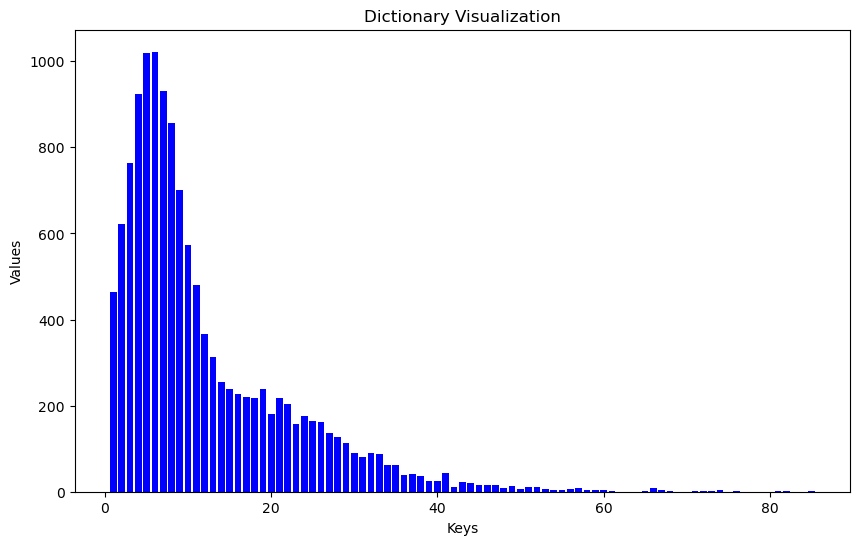

In [18]:
import matplotlib.pyplot as plt

keys = list(d.keys())
values = list(d.values())

plt.figure(figsize=(10, 6))

# Create bar chart
plt.bar(keys, values, color='blue')

# Add title and labels
plt.title('Dictionary Visualization')
plt.xlabel('Keys')
plt.ylabel('Values')

plt.show()

In [19]:
example_text = 'I will watch Memento tonight. Do you'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10,
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])
tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

tensor([[  101,  1045,  2097,  3422,  2033, 23065,  3892,  1012,  2079,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

### NORMALIZING EACH ESSAY SET VALUE BETWEEN 0 AND 1

In [20]:
# for essay_set in range(1, 9):
#     temp = temp_df[temp_df['essay_set'] == essay_set]
#     min_value = temp['domain1_score'].min()
#     max_value = temp['domain1_score'].max()
#     print(min_value, max_value)
#     temp_df['essay_set']['domain1_score']= (df['domain1_score'] - min_value) / (max_value - min_value)

for essay_set in range(1, 9):  # Change the range to cover all 8 essay sets
    temp = temp_df[temp_df['essay_set'] == essay_set]
    min_value = temp['domain1_score'].min()
    max_value = temp['domain1_score'].max()
    print(min_value, max_value)
    temp_df.loc[temp_df['essay_set'] == essay_set, 'normalized_score'] = (temp['domain1_score'] - min_value) / (max_value - min_value)

# print(temp_df)

2.0 12.0
1.0 6.0
0.0 3.0
0.0 3.0
0.0 4.0
0.0 4.0
2.0 20.0
10.0 20.0


C:\Users\pchhl\AppData\Local\Temp\ipykernel_2100\61580355.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[temp_df['essay_set'] == essay_set, 'normalized_score'] = (temp['domain1_score'] - min_value) / (max_value - min_value)


In [21]:
for essay_set in range(1, 9):
    temp = temp_df[temp_df['essay_set'] == essay_set]
    min_value = temp['normalized_score'].min()
    max_value = temp['normalized_score'].max()
    print(min_value, max_value)

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [22]:
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalized_score
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6


In [23]:
text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model(**inputs)


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### WORD EMBEDDINGS FROM PENULTIMATE LAYER OF BERT MODEL

In [25]:
class BertSentenceEmbedding(nn.Module):
    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(BertSentenceEmbedding, self).__init__()  # Call the super class's __init__ first

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
        self.model = BertModel.from_pretrained(pretrained_model_name, output_hidden_states=True)
        self.model.eval()

    def get_embedding(self, text):

        # Tokenize the essay into sentences
        sentences = sent_tokenize(text)

        # List to hold embeddings for each sentence
        sentence_embeddings = []

        for sentence in sentences:
            # I noticed you were using a "pipeline" function that was not defined in the given code
            processed_sentence = pipeline(sentence)
            inputs = self.tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                outputs = self.model(**inputs.to(self.device))

            # Use the penultimate layer's hidden states
            hidden_states = outputs.hidden_states[-2]

            # Compute the mean of all tokens embeddings for this sentence
            sentence_embedding = torch.mean(hidden_states, dim=1).squeeze().cpu().numpy()
            sentence_embeddings.append(sentence_embedding)

        return np.array(sentence_embeddings)  # Return embeddings for all sentences in the essay

# Assuming you've defined device somewhere above
bert_embedder = BertSentenceEmbedding().to(device)
essay = df['essay'][0]
embeddings = bert_embedder.get_embedding(essay)
print(embeddings.shape)  # It should print (number_of_sentences_in_essay, 768)


(10, 768)


In [26]:
type(embeddings)

numpy.ndarray

### COHERNCE MODEL

In [27]:
class CoherenceScore(nn.Module):
    def __init__(self):
        super(CoherenceScore, self).__init__()

        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 2
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        # for hs in self.fnn_hidden_size:
        #     layers.append(nn.Linear(in_features, hs))
        #     layers.append(nn.ReLU())
        #     layers.append(nn.Dropout(self.dropout_prob))
        #     in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        # print(packed_input.data.shape,"packed_input")
        packed_output, _ = self.lstm(packed_input)
        # print(packed_output.data.shape,"packed_out")
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)





### SEMANTIC MODEL

In [28]:
class SemanticScore(nn.Module):
    def __init__(self):
        super(SemanticScore, self).__init__()

        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 1
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        for hs in self.fnn_hidden_size:
            layers.append(nn.Linear(in_features, hs))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(self.dropout_prob))
            in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)

### PROMPT RELEVANT SCORE MODEL

In [29]:
class PromptScore(nn.Module):
    def __init__(self):
        super(PromptScore, self).__init__()
        self.bert_emb_dim = 768
        self.dropout_prob = 0.5
        self.lstm_hidden_size = 1024
        self.lstm_layers_num = 1
        self.fnn_hidden_size = []
        self.bidirectional = False

        self.lstm = nn.LSTM(self.bert_emb_dim,
                            self.lstm_hidden_size,
                            self.lstm_layers_num,
                            bidirectional=self.bidirectional,
                            batch_first=True)
        self.dropout = nn.Dropout(self.dropout_prob)

        in_features = self.lstm_hidden_size * 2 if self.bidirectional else self.lstm_hidden_size
        layers = []
        for hs in self.fnn_hidden_size:
            layers.append(nn.Linear(in_features, hs))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(self.dropout_prob))
            in_features = hs

        layers.append(nn.Linear(in_features, 400))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(self.dropout_prob))
        layers.append(nn.Linear(400, 1))
        layers.append(nn.Sigmoid())
        self.fnn = nn.Sequential(*layers)

    def forward(self, batch_doc_encodes, batch_doc_sent_nums):
        packed_input = pack_padded_sequence(batch_doc_encodes, batch_doc_sent_nums, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        logits = self.fnn(output[:, -1, :]) # Using the output of the last timestep
        return logits.squeeze(-1)


### PROMPTS CORRESPONDING TO EACH SET FROM 1 TO 8

In [30]:
prompts = [
    """More and more people use computers, but not everyone agrees that this benefits society.
    Those who support advances in technology believe that computers have a positive effect on people.
    They teach hand-eye coordination, give people the ability to learn about faraway places and people, and
    even allow people to talk online with other people. Others have different ideas. Some experts are concerned
    that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends.
    Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.
""" ,

    """Censorship in the Libraries
    All of us can think of a book that we hope none of our children or any other children have taken off the shelf. But if I have the right to remove that book from the shelf --
    that work I abhor -- then you also have exactly the same right and so does everyone else. And then we have no books left on the shelf for any of us." --Katherine Paterson, Author
    Write a persuasive essay to a newspaper reflecting your vies on censorship in libraries. Do you believe that certain materials, such as books, music, movies, magazines, etc.,
    should be removed from the shelves if they are found offensive? Support your position with convincing arguments from your own experience, observations, and/or reading.
""",

      """ROUGH ROAD AHEAD: Do Not Exceed Posted Speed Limit
    FORGET THAT OLD SAYING ABOUT NEVER taking candy from strangers. No, a better piece of advice for the solo cyclist would be, “Never accept travel advice from a collection of old-timers who haven’t left the confines of their porches since Carter was in office.” It’s not that a group of old guys doesn’t know the terrain. With age comes wisdom and all that, but the world is a fluid place. Things change.
    At a reservoir campground outside of Lodi, California, I enjoyed the serenity of an early-summer evening and some lively conversation with these old codgers. What I shouldn’t have done was let them have a peek at my map. Like a foolish youth, the next morning I followed their advice and launched out at first light along a “shortcut” that was to slice away hours from my ride to Yosemite National Park.
    They’d sounded so sure of themselves when pointing out landmarks and spouting off towns I would come to along this breezy jaunt. Things began well enough. I rode into the morning with strong legs and a smile on my face. About forty miles into the pedal, I arrived at the first “town.” This place might have been a thriving little spot at one time—say, before the last world war—but on that morning it fit the traditional definition of a ghost town. I chuckled, checked my water supply, and moved on. The sun was beginning to beat down, but I barely noticed it. The cool pines and rushing rivers of Yosemite had my name written all over them.
    Twenty miles up the road, I came to a fork of sorts. One ramshackle shed, several rusty pumps, and a corral that couldn’t hold in the
    lamest mule greeted me. This sight was troubling. I had been hitting my water bottles pretty regularly, and I was traveling through the high deserts of California in June.
    I got down on my hands and knees, working the handle of the rusted water pump with all my strength. A tarlike substance oozed out, followed by
    brackish water feeling somewhere in the neighborhood of two hundred degrees. I pumped that handle for several minutes, but the water
    wouldn’t cool down. It didn’t matter. When I tried a drop or two, it had the flavor of battery acid.
    The old guys had sworn the next town was only eighteen miles down the road. I could make that! I would conserve my water and go inward for an hour or so—a test of my inner spirit.
    Not two miles into this next section of the ride, I noticed the terrain changing. Flat road was replaced by short, rolling hills.
    After I had crested the first few of these, a large highway sign jumped out at me. It read: ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT.
    The speed limit was 55 mph. I was doing a water-depleting 12 mph. Sometimes life can feel so cruel.
    I toiled on. At some point, tumbleweeds crossed my path and a ridiculously large snake—it really did look like a diamondback—blocked the majority of the pavement in front of me.
    I eased past, trying to keep my balance in my dehydrated state.
    The water bottles contained only a few tantalizing sips. Wide rings of dried sweat circled my shirt, and the growing realization that I could drop from heatstroke on a gorgeous day in June simply because I listened to some gentlemen who hadn’t been off their porch in decades, caused me to laugh.
    It was a sad, hopeless laugh, mind you, but at least I still had the energy to feel sorry for myself. There was no one in sight, not a building, car, or structure of any kind. I began breaking the ride down into distances I could see on the horizon, telling myself that if I could make it that far, I’d be fi ne.
    Over one long, crippling hill, a building came into view. I wiped the sweat from my eyes to make sure it wasn’t a mirage, and tried not to get too excited. With what I believed was my last burst of energy, I maneuvered down the hill.
    In an ironic twist that should please all sadists reading this, the building—abandoned years earlier, by the looks of it—had been a Welch’s Grape Juice factory and bottling plant. A sandblasted picture of a young boy pouring a refreshing glass of juice into his mouth could still be seen.
    I hung my head.
    That smoky blues tune “Summertime” rattled around in the dry honeycombs of my deteriorating brain.
    I got back on the bike, but not before I gathered up a few pebbles and stuck them in my mouth. I’d read once that sucking on stones helps take your mind off thirst by allowing what spit you have left to circulate. With any luck I’d hit a bump and lodge one in my throat.
    It didn’t really matter. I was going to die and the birds would pick me clean, leaving only some expensive outdoor gear and a diary with the last entry in praise of old men, their wisdom, and their keen sense of direction. I made a mental note to change that paragraph if it looked like I was going to lose consciousness for the last time.
    Somehow, I climbed away from the abandoned factory of juices and dreams, slowly gaining elevation while losing hope. Then, as easily as rounding a bend, my troubles, thirst, and fear were all behind me.
    GARY AND WILBER’S FISH CAMP—IF YOU WANT BAIT FOR THE BIG ONES, WE’RE YOUR BEST BET!
    “And the only bet,” I remember thinking.
    As I stumbled into a rather modern bathroom and drank deeply from the sink, I had an overwhelming urge to seek out Gary and Wilber, kiss them, and buy some bait—any bait, even though I didn’t own a rod or reel.
    An old guy sitting in a chair under some shade nodded in my direction. Cool water dripped from my head as I slumped against the wall beside him.
    “Where you headed in such a hurry?”
    “Yosemite,” I whispered.
    “Know the best way to get there?”
    I watched him from the corner of my eye for a long moment. He was even older than the group I’d listened to in Lodi.
    “Yes, sir! I own a very good map.”
    And I promised myself right then that I’d always stick to it in the future.
    Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.
    """,

    """Read the last paragraph of the story.
    "When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again."
    Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.
    """,

    """My parents, originally from Cuba, arrived in the United States in 1956. After living for a year in a furnished one-room apartment, twenty-one-year-old Rawedia Maria and twenty-seven-year-old Narciso Rodriguez, Sr., could afford to move into a modest, three-room apartment I would soon call home.
    In 1961, I was born into this simple house, situated in a two-family, blond-brick building in the Ironbound section of Newark, New Jersey. Within its walls, my young parents created our traditional Cuban home, the very heart of which was the kitchen. My parents both shared cooking duties and unwittingly passed on to me their rich culinary skills and a love of cooking that is still with me today (and for which I am eternally grateful). Passionate Cuban music (which I adore to this day) filled the air, mixing with the aromas of the kitchen. Here, the innocence of childhood, the congregation of family and friends, and endless celebrations that encompassed both, formed the backdrop to life in our warm home.
    Growing up in this environment instilled in me a great sense that “family” had nothing to do with being a blood relative. Quite the contrary, our neighborhood was made up of mostly Spanish, Cuban, and Italian immigrants at a time when overt racism was the norm and segregation prevailed in the United States. In our neighborhood, despite customs elsewhere, all of these cultures came together in great solidarity and friendship. It was a close-knit community of honest, hardworking immigrants who extended a hand to people who, while not necessarily their own kind, were clearly in need.
    Our landlord and his daughter, Alegria (my babysitter and first friend), lived above us, and Alegria graced our kitchen table for meals more often than not. Also at the table were Sergio and Edelmira, my surrogate grandparents who lived in the basement apartment. (I would not know my “real” grandparents, Narciso the Elder and Consuelo, until 1970 when they were allowed to leave Cuba.) My aunts Bertha and Juanita and my cousins Arnold, Maria, and Rosemary also all lived nearby and regularly joined us at our table. Countless extended family members came and went — and there was often someone staying with us temporarily until they were able to get back on their feet. My parents always kept their arms and their door open to the many people we considered family, knowing that they would do the same for us.
    My mother and father had come to this country with such courage, without any knowledge of the language or the culture. They came selflessly, as many immigrants do, to give their children a better life, even though it meant leaving behind their families, friends, and careers in the country they loved. They struggled both personally and financially, braving the harsh northern winters while yearning for their native tropics and facing cultural hardships. The barriers to work were strong and high, and my parents both had to accept that they might not be able to find the kind of jobs they deserved. In Cuba, Narciso, Sr., had worked in a laboratory and Rawedia Maria had studied chemical engineering. In the United States, they had to start their lives over entirely, taking whatever work they could find. The faith that this struggle would lead them and their children to better times drove them to endure these hard times.
    I will always be grateful to my parents for their love and sacrifice. I’ve often told them that what they did was a much more courageous thing than I could have ever done. I’ve often told them of my admiration for their strength and perseverance, and I’ve thanked them repeatedly. But, in reality, there is no way to express my gratitude for the spirit of generosity impressed upon me at such an early age and the demonstration of how important family and friends are. These are two lessons that my parents did not just tell me. They showed me with their lives, and these teachings have been the basis of my life.
    It was in this simple house that my parents welcomed other refugees to celebrate their arrival to this country and where I celebrated my first birthdays. It was in the warmth of the kitchen in this humble house where a Cuban feast (albeit a frugal Cuban feast) always filled the air with not just scent and music but life and love. It was here where I learned the real definition of “family.” And for this, I will never forget that house or its gracious neighborhood or the many things I learned there about how to love. I will never forget how my parents turned this simple house into a home.
    Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir
""",

    """Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there.
    Support your answer with relevant and specific information from the excerpt.""",

    """Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.
      Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.
""",

    """We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.”
    Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part."""
]

In [31]:
temp_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,normalized_score
0,1,1,dear local newspaper i think effects computers...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
1,2,1,dear caps1 caps2 i believe that using computer...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7
2,3,1,dear caps1 caps2 caps3 more and more people us...,4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
3,4,1,dear local newspaper caps1 i have found that m...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
4,5,1,dear location1 i know having computers has a p...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6


### ADD PROMPTS TO DATAFRAME FOR EACH SET

In [32]:
prompt = list(prompts[sets - 1] for sets in temp_df['essay_set'])
custom_df = temp_df[['essay_id', 'essay_set', 'essay', 'normalized_score']]
custom_df['prompt'] = prompt
custom_df.reset_index(drop=True, inplace=True)

C:\Users\pchhl\AppData\Local\Temp\ipykernel_2100\3854521186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_df['prompt'] = prompt


In [33]:
# custom_df = read_asap_dataset(temp_df, prompts)

print(len(custom_df))

custom_df.head()

11981


,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,dear local newspaper i think effects computers...,0.6,"More and more people use computers, but not ev..."
1,2,1,dear caps1 caps2 i believe that using computer...,0.7,"More and more people use computers, but not ev..."
2,3,1,dear caps1 caps2 caps3 more and more people us...,0.5,"More and more people use computers, but not ev..."
3,4,1,dear local newspaper caps1 i have found that m...,0.8,"More and more people use computers, but not ev..."
4,5,1,dear location1 i know having computers has a p...,0.6,"More and more people use computers, but not ev..."


In [34]:
np.unique(np.array(custom_df['essay_set']))

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

### PREPROCESSING ESSAY i.e. ESSAYS ARE CONVERTED INTO WORD EMBEDDINGS BEFORE PASSING IT TO SOME MODEL

In [35]:
def preprocess_essay(essays):
    # print(essays)
    essay_embeddings = [torch.tensor(bert_embedder.get_embedding(essay)) for essay in essays]

    # Find the maximum number of sentences in all essays
    max_sentences = max(embed.shape[0] for embed in essay_embeddings)

    # Calculate the number of dimensions (features) in the embeddings
    num_features = essay_embeddings[0].shape[1]  # Assumes all embeddings have the same number of features

    # Pad the sentence embeddings to have the same number of sentences
    padded_embeddings = []
    for embed in essay_embeddings:
        padding = max_sentences - embed.shape[0]
        padded_embed = torch.cat((embed, torch.zeros(padding, num_features)), dim=0)
        padded_embeddings.append(padded_embed)

    embeddings_batch = torch.stack(padded_embeddings)  # batch * sentences * num_features
    lengths_batch = torch.tensor([max_sentences] * len(essays), dtype=torch.int64)

    return embeddings_batch, lengths_batch




### DATALOADER WITH INITIAL DATASET

In [61]:
class CustomDataset(Dataset):
    def __init__(self, essay_id, essay_set, essay, prompt, normalized_score):
        self.essay_id = essay_id
        self.essay_set = essay_set
        self.essay = essay
        self.prompt = prompt
        self.normalized_score = normalized_score

    def __len__(self):
        return len(self.essay_id)

    def __getitem__(self, idx):
        essay_id, essay_set, essay, prompt, normalized_score = self.essay_id.iloc[idx], self.essay_set.iloc[idx], self.essay.iloc[idx], self.prompt.iloc[idx], self.normalized_score.iloc[idx]
        return essay_id, essay_set, essay, prompt, normalized_score

# # Create a DataLoader
custom_dataset = CustomDataset(custom_df['essay_id'], custom_df['essay_set'], custom_df['essay'], custom_df['prompt'], custom_df['normalized_score'])
dataloader = DataLoader(custom_dataset, batch_size=8, shuffle=True)



In [37]:
custom_df.head()

,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,dear local newspaper i think effects computers...,0.6,"More and more people use computers, but not ev..."
1,2,1,dear caps1 caps2 i believe that using computer...,0.7,"More and more people use computers, but not ev..."
2,3,1,dear caps1 caps2 caps3 more and more people us...,0.5,"More and more people use computers, but not ev..."
3,4,1,dear local newspaper caps1 i have found that m...,0.8,"More and more people use computers, but not ev..."
4,5,1,dear location1 i know having computers has a p...,0.6,"More and more people use computers, but not ev..."


## SEMANTIC MODEL TRAINING

In [37]:
model_semantic=SemanticScore().to(device)
adam_optimizer=torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
criteria=torch.nn.MSELoss()

In [38]:
from tqdm import tqdm
optimizer=adam_optimizer
batch_size = 32
train_loss = []
totaltime=[]


for epoch in range(5):
    out_loss = 0

    num_samples_processed_1=0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):

        # if torch.cuda.is_available():
        #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
        # normalized_score = normalized_score.to(device)

        num_samples_processed_1 += essay_id.size(0)

        if num_samples_processed_1 >= 10000:
          break

        optimizer.zero_grad()

        essays, lengths_batch = preprocess_essay(essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(lengths_batch.dtype)
        # print(essays.dtype)
        out = model_semantic(essays, lengths_batch)


        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
        print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(dataloader)}], Batch Loss: {loss.item():.4f}")


    train_loss.append(out_loss/len(dataloader))

1it [00:00,  1.50it/s]

Epoch [1/5], Batch [1/11981], Batch Loss: 0.2390


2it [00:01,  1.53it/s]

Epoch [1/5], Batch [2/11981], Batch Loss: 0.0597


2it [00:01,  1.12it/s]


KeyboardInterrupt: 

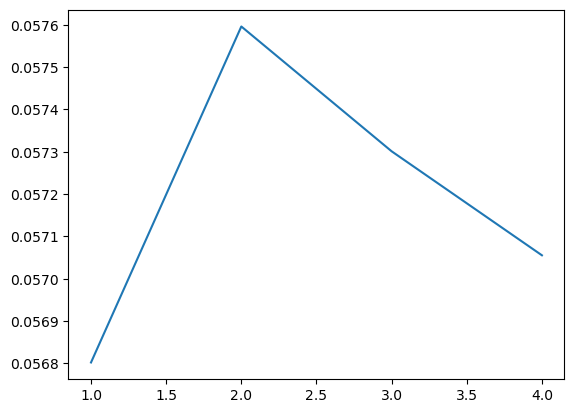

In [43]:
epochs=[1,2,3,4]
plt.plot(epochs,train_loss[:4])

In [44]:
custom_df.head()

,essay_id,essay_set,essay,normalized_score,prompt
0,1,1,"Dear local newspaper, I think effects computer...",0.6,"More and more people use computers, but not ev..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.7,"More and more people use computers, but not ev..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.5,"More and more people use computers, but not ev..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",0.8,"More and more people use computers, but not ev..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.6,"More and more people use computers, but not ev..."


### CREATING A NEW DATASET BY PERMUTING ESSAYS AND ASSIGNING ZERO GOLD SCORE TO PERMUTED ESSAYS

In [38]:
def permute_essay(essay):
    sentences = essay.split('. ')  # Splitting the essay into sentences using ". "
    random.shuffle(sentences)
    return '. '.join(sentences)

# Creating a new DataFrame for permuted essays
permuted_df = custom_df.copy()
permuted_df['essay'] = permuted_df['essay'].apply(permute_essay)
permuted_df['normalized_score'] = 0
permuted_df['essay_id'] = range(100000, 100000 + len(custom_df))

# Concatenating the original and permuted DataFrames
combined_df = pd.concat([custom_df, permuted_df]).reset_index(drop=True)

In [40]:
combined_df.tail()

,essay_id,essay_set,essay,normalized_score,prompt
23957,111976,8,laughter is good for every one.caps1 helps the...,0.0,We all understand the benefits of laughter. Fo...
23958,111977,8,for me i will trove to have fun. ther are goin...,0.0,We all understand the benefits of laughter. Fo...
23959,111978,8,i was raised with two brother that mean the wo...,0.0,We all understand the benefits of laughter. Fo...
23960,111979,8,its ture its good to laugh makes everyone a be...,0.0,We all understand the benefits of laughter. Fo...
23961,111980,8,i dont like computers,0.0,We all understand the benefits of laughter. Fo...


#### CREATING A DATALOADER FROM NEW DATASET

In [41]:

combined_dataset = CustomDataset(combined_df['essay_id'], combined_df['essay_set'], combined_df['essay'], combined_df['prompt'], combined_df['normalized_score'])

combined_dataloader = DataLoader(combined_dataset, batch_size=32, shuffle=True)

## COHERENCE MODEL TRAINING

In [45]:
model_coher=CoherenceScore().to(device)
adam_optimizer_coher=torch.optim.Adam(model_coher.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
criteria=torch.nn.MSELoss()

In [46]:
from tqdm import tqdm
optimizer=adam_optimizer_coher
batch_size = 32
train_loss_coher = []

for epoch in range(5):
    out_loss = 0
    num_samples_processed_2=0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(combined_dataloader)):

        # if torch.cuda.is_available():
        #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
        # normalized_score = normalized_score.to(device)

        
        num_samples_processed_2 += essay_id.size(0)

        if num_samples_processed_2 >= 10000:
          break

        optimizer.zero_grad()

        essays, lengths_batch = preprocess_essay(essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(lengths_batch.dtype)
        print(essays.dtype)
        out = model_coher(essays, lengths_batch)


        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
        print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(combined_dataloader)}], Batch Loss: {loss.item():.4f}")



    train_loss_coher.append(out_loss/len(combined_dataloader))

0it [00:00, ?it/s]

torch.float32


1it [00:28, 28.29s/it]

Epoch [1/5], Batch [1/749], Batch Loss: 0.1663
torch.float32


2it [00:53, 26.52s/it]

Epoch [1/5], Batch [2/749], Batch Loss: 0.1286
torch.float32


3it [01:13, 23.42s/it]

Epoch [1/5], Batch [3/749], Batch Loss: 0.1120
torch.float32


4it [01:32, 21.72s/it]

Epoch [1/5], Batch [4/749], Batch Loss: 0.1504
torch.float32


5it [01:56, 22.57s/it]

Epoch [1/5], Batch [5/749], Batch Loss: 0.2937
torch.float32


6it [02:16, 21.74s/it]

Epoch [1/5], Batch [6/749], Batch Loss: 0.1893
torch.float32


7it [02:39, 22.12s/it]

Epoch [1/5], Batch [7/749], Batch Loss: 0.1601
torch.float32


8it [02:55, 20.27s/it]

Epoch [1/5], Batch [8/749], Batch Loss: 0.1267
torch.float32


9it [03:16, 20.40s/it]

Epoch [1/5], Batch [9/749], Batch Loss: 0.1291
torch.float32


10it [03:41, 21.79s/it]

Epoch [1/5], Batch [10/749], Batch Loss: 0.1174
torch.float32


11it [04:03, 21.95s/it]

Epoch [1/5], Batch [11/749], Batch Loss: 0.1131
torch.float32


12it [04:24, 21.64s/it]

Epoch [1/5], Batch [12/749], Batch Loss: 0.1032
torch.float32


13it [04:47, 21.88s/it]

Epoch [1/5], Batch [13/749], Batch Loss: 0.1083
torch.float32


14it [05:14, 23.63s/it]

Epoch [1/5], Batch [14/749], Batch Loss: 0.1171
torch.float32


15it [05:34, 22.42s/it]

Epoch [1/5], Batch [15/749], Batch Loss: 0.1389
torch.float32


16it [05:56, 22.19s/it]

Epoch [1/5], Batch [16/749], Batch Loss: 0.1373
torch.float32


17it [06:18, 22.27s/it]

Epoch [1/5], Batch [17/749], Batch Loss: 0.1415
torch.float32


18it [06:35, 20.71s/it]

Epoch [1/5], Batch [18/749], Batch Loss: 0.1083
torch.float32


19it [06:56, 20.74s/it]

Epoch [1/5], Batch [19/749], Batch Loss: 0.1003
torch.float32


20it [07:19, 21.37s/it]

Epoch [1/5], Batch [20/749], Batch Loss: 0.0960
torch.float32


21it [07:38, 20.83s/it]

Epoch [1/5], Batch [21/749], Batch Loss: 0.1102
torch.float32


22it [07:58, 20.38s/it]

Epoch [1/5], Batch [22/749], Batch Loss: 0.1136
torch.float32


23it [08:21, 21.13s/it]

Epoch [1/5], Batch [23/749], Batch Loss: 0.1307
torch.float32


24it [08:44, 21.89s/it]

Epoch [1/5], Batch [24/749], Batch Loss: 0.1454
torch.float32


25it [09:06, 21.84s/it]

Epoch [1/5], Batch [25/749], Batch Loss: 0.1448
torch.float32


26it [09:34, 23.76s/it]

Epoch [1/5], Batch [26/749], Batch Loss: 0.1362
torch.float32


27it [09:59, 24.18s/it]

Epoch [1/5], Batch [27/749], Batch Loss: 0.1137
torch.float32


28it [10:24, 24.28s/it]

Epoch [1/5], Batch [28/749], Batch Loss: 0.1613
torch.float32


29it [10:48, 24.17s/it]

Epoch [1/5], Batch [29/749], Batch Loss: 0.1175
torch.float32


30it [11:12, 24.09s/it]

Epoch [1/5], Batch [30/749], Batch Loss: 0.1477
torch.float32


31it [11:37, 24.53s/it]

Epoch [1/5], Batch [31/749], Batch Loss: 0.1058
torch.float32


32it [12:01, 24.41s/it]

Epoch [1/5], Batch [32/749], Batch Loss: 0.1331
torch.float32


33it [12:23, 23.67s/it]

Epoch [1/5], Batch [33/749], Batch Loss: 0.1330
torch.float32


34it [12:44, 22.86s/it]

Epoch [1/5], Batch [34/749], Batch Loss: 0.1321
torch.float32


35it [13:08, 23.01s/it]

Epoch [1/5], Batch [35/749], Batch Loss: 0.1413
torch.float32


36it [13:35, 24.42s/it]

Epoch [1/5], Batch [36/749], Batch Loss: 0.1165
torch.float32


37it [14:00, 24.48s/it]

Epoch [1/5], Batch [37/749], Batch Loss: 0.1112
torch.float32


38it [14:20, 23.11s/it]

Epoch [1/5], Batch [38/749], Batch Loss: 0.1307
torch.float32


39it [14:43, 23.16s/it]

Epoch [1/5], Batch [39/749], Batch Loss: 0.1456
torch.float32


40it [15:02, 21.83s/it]

Epoch [1/5], Batch [40/749], Batch Loss: 0.1113
torch.float32


41it [15:16, 19.57s/it]

Epoch [1/5], Batch [41/749], Batch Loss: 0.0966
torch.float32


42it [15:41, 21.26s/it]

Epoch [1/5], Batch [42/749], Batch Loss: 0.0932
torch.float32


43it [16:05, 21.93s/it]

Epoch [1/5], Batch [43/749], Batch Loss: 0.1424
torch.float32


44it [16:27, 22.03s/it]

Epoch [1/5], Batch [44/749], Batch Loss: 0.1404
torch.float32


45it [16:55, 23.73s/it]

Epoch [1/5], Batch [45/749], Batch Loss: 0.1113
torch.float32


46it [17:16, 23.02s/it]

Epoch [1/5], Batch [46/749], Batch Loss: 0.1194
torch.float32


47it [17:32, 20.90s/it]

Epoch [1/5], Batch [47/749], Batch Loss: 0.1054
torch.float32


48it [17:54, 21.34s/it]

Epoch [1/5], Batch [48/749], Batch Loss: 0.1240
torch.float32


49it [18:19, 22.40s/it]

Epoch [1/5], Batch [49/749], Batch Loss: 0.1119
torch.float32


50it [18:42, 22.36s/it]

Epoch [1/5], Batch [50/749], Batch Loss: 0.1932
torch.float32


51it [19:03, 22.18s/it]

Epoch [1/5], Batch [51/749], Batch Loss: 0.1901
torch.float32


52it [19:30, 23.50s/it]

Epoch [1/5], Batch [52/749], Batch Loss: 0.1088
torch.float32


53it [19:55, 23.88s/it]

Epoch [1/5], Batch [53/749], Batch Loss: 0.1229
torch.float32


54it [20:24, 25.36s/it]

Epoch [1/5], Batch [54/749], Batch Loss: 0.1420
torch.float32


55it [20:47, 24.87s/it]

Epoch [1/5], Batch [55/749], Batch Loss: 0.1361
torch.float32


56it [21:10, 24.31s/it]

Epoch [1/5], Batch [56/749], Batch Loss: 0.1148
torch.float32


57it [21:34, 24.25s/it]

Epoch [1/5], Batch [57/749], Batch Loss: 0.1115
torch.float32


58it [21:59, 24.38s/it]

Epoch [1/5], Batch [58/749], Batch Loss: 0.1055
torch.float32


59it [22:19, 23.09s/it]

Epoch [1/5], Batch [59/749], Batch Loss: 0.1255
torch.float32


60it [22:43, 23.25s/it]

Epoch [1/5], Batch [60/749], Batch Loss: 0.1428
torch.float32


61it [23:02, 21.95s/it]

Epoch [1/5], Batch [61/749], Batch Loss: 0.0991
torch.float32


62it [23:23, 21.74s/it]

Epoch [1/5], Batch [62/749], Batch Loss: 0.1539
torch.float32


63it [23:42, 21.02s/it]

Epoch [1/5], Batch [63/749], Batch Loss: 0.1570
torch.float32


64it [24:05, 21.40s/it]

Epoch [1/5], Batch [64/749], Batch Loss: 0.1453
torch.float32


65it [24:23, 20.63s/it]

Epoch [1/5], Batch [65/749], Batch Loss: 0.1070
torch.float32


66it [24:46, 21.19s/it]

Epoch [1/5], Batch [66/749], Batch Loss: 0.0865
torch.float32


67it [25:02, 19.73s/it]

Epoch [1/5], Batch [67/749], Batch Loss: 0.0720
torch.float32


68it [25:26, 20.82s/it]

Epoch [1/5], Batch [68/749], Batch Loss: 0.1557
torch.float32


69it [25:51, 22.09s/it]

Epoch [1/5], Batch [69/749], Batch Loss: 0.0888
torch.float32


70it [26:17, 23.25s/it]

Epoch [1/5], Batch [70/749], Batch Loss: 0.1112
torch.float32


71it [26:38, 22.75s/it]

Epoch [1/5], Batch [71/749], Batch Loss: 0.1022
torch.float32


72it [27:05, 23.93s/it]

Epoch [1/5], Batch [72/749], Batch Loss: 0.1622
torch.float32


73it [27:31, 24.52s/it]

Epoch [1/5], Batch [73/749], Batch Loss: 0.0893
torch.float32


74it [27:57, 24.96s/it]

Epoch [1/5], Batch [74/749], Batch Loss: 0.0876
torch.float32


75it [28:17, 23.48s/it]

Epoch [1/5], Batch [75/749], Batch Loss: 0.1385
torch.float32


76it [28:47, 25.50s/it]

Epoch [1/5], Batch [76/749], Batch Loss: 0.1124
torch.float32


77it [29:09, 24.46s/it]

Epoch [1/5], Batch [77/749], Batch Loss: 0.1057
torch.float32


78it [29:34, 24.59s/it]

Epoch [1/5], Batch [78/749], Batch Loss: 0.0972
torch.float32


79it [29:58, 24.45s/it]

Epoch [1/5], Batch [79/749], Batch Loss: 0.1249
torch.float32


80it [30:26, 25.47s/it]

Epoch [1/5], Batch [80/749], Batch Loss: 0.1565
torch.float32


81it [30:47, 24.06s/it]

Epoch [1/5], Batch [81/749], Batch Loss: 0.1188
torch.float32


82it [31:18, 26.38s/it]

Epoch [1/5], Batch [82/749], Batch Loss: 0.1492
torch.float32


83it [31:44, 26.09s/it]

Epoch [1/5], Batch [83/749], Batch Loss: 0.1389
torch.float32


84it [32:05, 24.69s/it]

Epoch [1/5], Batch [84/749], Batch Loss: 0.1286
torch.float32


85it [32:30, 24.74s/it]

Epoch [1/5], Batch [85/749], Batch Loss: 0.1331
torch.float32


86it [32:56, 25.04s/it]

Epoch [1/5], Batch [86/749], Batch Loss: 0.1426
torch.float32


87it [33:18, 24.20s/it]

Epoch [1/5], Batch [87/749], Batch Loss: 0.1444
torch.float32


88it [33:46, 25.40s/it]

Epoch [1/5], Batch [88/749], Batch Loss: 0.1066
torch.float32


89it [34:10, 24.85s/it]

Epoch [1/5], Batch [89/749], Batch Loss: 0.1162
torch.float32


90it [34:33, 24.37s/it]

Epoch [1/5], Batch [90/749], Batch Loss: 0.1184
torch.float32


91it [35:02, 25.66s/it]

Epoch [1/5], Batch [91/749], Batch Loss: 0.1363
torch.float32


92it [35:30, 26.49s/it]

Epoch [1/5], Batch [92/749], Batch Loss: 0.1313
torch.float32


93it [35:51, 24.75s/it]

Epoch [1/5], Batch [93/749], Batch Loss: 0.0995
torch.float32


94it [36:07, 22.26s/it]

Epoch [1/5], Batch [94/749], Batch Loss: 0.0900
torch.float32


95it [36:30, 22.37s/it]

Epoch [1/5], Batch [95/749], Batch Loss: 0.0953
torch.float32


96it [36:53, 22.64s/it]

Epoch [1/5], Batch [96/749], Batch Loss: 0.1146
torch.float32


97it [37:16, 22.60s/it]

Epoch [1/5], Batch [97/749], Batch Loss: 0.1341
torch.float32


98it [37:40, 23.10s/it]

Epoch [1/5], Batch [98/749], Batch Loss: 0.1320
torch.float32


99it [38:00, 22.25s/it]

Epoch [1/5], Batch [99/749], Batch Loss: 0.0970
torch.float32


100it [38:24, 22.53s/it]

Epoch [1/5], Batch [100/749], Batch Loss: 0.0894
torch.float32


101it [38:43, 21.64s/it]

Epoch [1/5], Batch [101/749], Batch Loss: 0.1475
torch.float32


102it [39:03, 21.15s/it]

Epoch [1/5], Batch [102/749], Batch Loss: 0.1534
torch.float32


103it [39:23, 20.79s/it]

Epoch [1/5], Batch [103/749], Batch Loss: 0.1401
torch.float32


104it [39:43, 20.48s/it]

Epoch [1/5], Batch [104/749], Batch Loss: 0.1371
torch.float32


105it [40:06, 21.35s/it]

Epoch [1/5], Batch [105/749], Batch Loss: 0.1300
torch.float32


106it [40:29, 21.67s/it]

Epoch [1/5], Batch [106/749], Batch Loss: 0.1521
torch.float32


107it [40:42, 19.23s/it]

Epoch [1/5], Batch [107/749], Batch Loss: 0.1016
torch.float32


108it [41:08, 21.19s/it]

Epoch [1/5], Batch [108/749], Batch Loss: 0.1391
torch.float32


109it [41:24, 19.60s/it]

Epoch [1/5], Batch [109/749], Batch Loss: 0.1318
torch.float32


110it [41:39, 18.23s/it]

Epoch [1/5], Batch [110/749], Batch Loss: 0.1168
torch.float32


111it [42:01, 19.45s/it]

Epoch [1/5], Batch [111/749], Batch Loss: 0.1286
torch.float32


112it [42:23, 20.06s/it]

Epoch [1/5], Batch [112/749], Batch Loss: 0.0934
torch.float32


113it [42:44, 20.45s/it]

Epoch [1/5], Batch [113/749], Batch Loss: 0.1081
torch.float32


114it [43:04, 20.19s/it]

Epoch [1/5], Batch [114/749], Batch Loss: 0.1206
torch.float32


115it [43:27, 21.06s/it]

Epoch [1/5], Batch [115/749], Batch Loss: 0.1327
torch.float32


116it [43:54, 22.84s/it]

Epoch [1/5], Batch [116/749], Batch Loss: 0.1540
torch.float32


117it [44:11, 21.35s/it]

Epoch [1/5], Batch [117/749], Batch Loss: 0.1162
torch.float32


118it [44:32, 21.13s/it]

Epoch [1/5], Batch [118/749], Batch Loss: 0.1925
torch.float32


119it [44:55, 21.60s/it]

Epoch [1/5], Batch [119/749], Batch Loss: 0.1358
torch.float32


120it [45:09, 19.45s/it]

Epoch [1/5], Batch [120/749], Batch Loss: 0.1200
torch.float32


121it [45:26, 18.66s/it]

Epoch [1/5], Batch [121/749], Batch Loss: 0.1314
torch.float32


122it [45:45, 18.67s/it]

Epoch [1/5], Batch [122/749], Batch Loss: 0.1307
torch.float32


123it [46:05, 19.26s/it]

Epoch [1/5], Batch [123/749], Batch Loss: 0.1479
torch.float32


124it [46:25, 19.40s/it]

Epoch [1/5], Batch [124/749], Batch Loss: 0.1288
torch.float32


125it [46:49, 20.88s/it]

Epoch [1/5], Batch [125/749], Batch Loss: 0.1288
torch.float32


126it [47:16, 22.71s/it]

Epoch [1/5], Batch [126/749], Batch Loss: 0.1247
torch.float32


127it [47:36, 21.91s/it]

Epoch [1/5], Batch [127/749], Batch Loss: 0.0876
torch.float32


128it [48:02, 23.02s/it]

Epoch [1/5], Batch [128/749], Batch Loss: 0.1330
torch.float32


129it [48:28, 24.02s/it]

Epoch [1/5], Batch [129/749], Batch Loss: 0.1221
torch.float32


130it [48:51, 23.73s/it]

Epoch [1/5], Batch [130/749], Batch Loss: 0.1515
torch.float32


131it [49:16, 23.88s/it]

Epoch [1/5], Batch [131/749], Batch Loss: 0.1055
torch.float32


132it [49:32, 21.47s/it]

Epoch [1/5], Batch [132/749], Batch Loss: 0.1108
torch.float32


133it [49:48, 19.95s/it]

Epoch [1/5], Batch [133/749], Batch Loss: 0.1217
torch.float32


134it [50:07, 19.72s/it]

Epoch [1/5], Batch [134/749], Batch Loss: 0.1052
torch.float32


135it [50:31, 20.84s/it]

Epoch [1/5], Batch [135/749], Batch Loss: 0.1215
torch.float32


136it [50:54, 21.61s/it]

Epoch [1/5], Batch [136/749], Batch Loss: 0.1870
torch.float32


137it [51:14, 20.99s/it]

Epoch [1/5], Batch [137/749], Batch Loss: 0.0946
torch.float32


138it [51:37, 21.77s/it]

Epoch [1/5], Batch [138/749], Batch Loss: 0.1382
torch.float32


139it [51:54, 20.22s/it]

Epoch [1/5], Batch [139/749], Batch Loss: 0.0952
torch.float32


140it [52:16, 20.89s/it]

Epoch [1/5], Batch [140/749], Batch Loss: 0.1600
torch.float32


141it [52:35, 20.18s/it]

Epoch [1/5], Batch [141/749], Batch Loss: 0.1474
torch.float32


142it [52:56, 20.38s/it]

Epoch [1/5], Batch [142/749], Batch Loss: 0.0909
torch.float32


143it [53:16, 20.25s/it]

Epoch [1/5], Batch [143/749], Batch Loss: 0.1182
torch.float32


144it [53:39, 21.26s/it]

Epoch [1/5], Batch [144/749], Batch Loss: 0.1265
torch.float32


145it [53:59, 20.84s/it]

Epoch [1/5], Batch [145/749], Batch Loss: 0.1033
torch.float32


146it [54:19, 20.73s/it]

Epoch [1/5], Batch [146/749], Batch Loss: 0.1180
torch.float32


147it [54:42, 21.32s/it]

Epoch [1/5], Batch [147/749], Batch Loss: 0.1597
torch.float32


148it [55:06, 22.15s/it]

Epoch [1/5], Batch [148/749], Batch Loss: 0.1306
torch.float32


149it [55:21, 20.02s/it]

Epoch [1/5], Batch [149/749], Batch Loss: 0.0994
torch.float32


150it [55:40, 19.68s/it]

Epoch [1/5], Batch [150/749], Batch Loss: 0.1170
torch.float32


151it [56:06, 21.40s/it]

Epoch [1/5], Batch [151/749], Batch Loss: 0.1201
torch.float32


152it [56:24, 20.56s/it]

Epoch [1/5], Batch [152/749], Batch Loss: 0.1070
torch.float32


153it [56:41, 19.54s/it]

Epoch [1/5], Batch [153/749], Batch Loss: 0.1647
torch.float32


154it [57:07, 21.24s/it]

Epoch [1/5], Batch [154/749], Batch Loss: 0.0920
torch.float32


155it [57:31, 22.34s/it]

Epoch [1/5], Batch [155/749], Batch Loss: 0.1304
torch.float32


156it [57:55, 22.75s/it]

Epoch [1/5], Batch [156/749], Batch Loss: 0.1482
torch.float32


157it [58:15, 21.89s/it]

Epoch [1/5], Batch [157/749], Batch Loss: 0.1143
torch.float32


158it [58:41, 23.21s/it]

Epoch [1/5], Batch [158/749], Batch Loss: 0.1326
torch.float32


159it [58:59, 21.51s/it]

Epoch [1/5], Batch [159/749], Batch Loss: 0.1353
torch.float32


160it [59:17, 20.49s/it]

Epoch [1/5], Batch [160/749], Batch Loss: 0.1192
torch.float32


161it [59:36, 19.98s/it]

Epoch [1/5], Batch [161/749], Batch Loss: 0.0929
torch.float32


162it [59:54, 19.58s/it]

Epoch [1/5], Batch [162/749], Batch Loss: 0.1277
torch.float32


163it [1:00:20, 21.51s/it]

Epoch [1/5], Batch [163/749], Batch Loss: 0.1080
torch.float32


164it [1:00:39, 20.48s/it]

Epoch [1/5], Batch [164/749], Batch Loss: 0.1047
torch.float32


165it [1:00:58, 20.29s/it]

Epoch [1/5], Batch [165/749], Batch Loss: 0.0986
torch.float32


166it [1:01:17, 19.73s/it]

Epoch [1/5], Batch [166/749], Batch Loss: 0.1272
torch.float32


167it [1:01:35, 19.40s/it]

Epoch [1/5], Batch [167/749], Batch Loss: 0.1302
torch.float32


168it [1:01:59, 20.79s/it]

Epoch [1/5], Batch [168/749], Batch Loss: 0.1369
torch.float32


169it [1:02:22, 21.21s/it]

Epoch [1/5], Batch [169/749], Batch Loss: 0.1323
torch.float32


170it [1:02:43, 21.23s/it]

Epoch [1/5], Batch [170/749], Batch Loss: 0.1257
torch.float32


171it [1:03:11, 23.26s/it]

Epoch [1/5], Batch [171/749], Batch Loss: 0.1299
torch.float32


172it [1:03:31, 22.41s/it]

Epoch [1/5], Batch [172/749], Batch Loss: 0.1373
torch.float32


173it [1:03:51, 21.62s/it]

Epoch [1/5], Batch [173/749], Batch Loss: 0.1232
torch.float32


174it [1:04:12, 21.40s/it]

Epoch [1/5], Batch [174/749], Batch Loss: 0.1152
torch.float32


175it [1:04:39, 23.06s/it]

Epoch [1/5], Batch [175/749], Batch Loss: 0.1224
torch.float32


176it [1:04:59, 22.13s/it]

Epoch [1/5], Batch [176/749], Batch Loss: 0.1011
torch.float32


177it [1:05:21, 22.22s/it]

Epoch [1/5], Batch [177/749], Batch Loss: 0.1131
torch.float32


178it [1:05:39, 20.72s/it]

Epoch [1/5], Batch [178/749], Batch Loss: 0.1225
torch.float32


179it [1:06:00, 21.01s/it]

Epoch [1/5], Batch [179/749], Batch Loss: 0.1150
torch.float32


180it [1:06:22, 21.18s/it]

Epoch [1/5], Batch [180/749], Batch Loss: 0.1157
torch.float32


181it [1:06:44, 21.45s/it]

Epoch [1/5], Batch [181/749], Batch Loss: 0.1133
torch.float32


182it [1:07:03, 20.89s/it]

Epoch [1/5], Batch [182/749], Batch Loss: 0.0936
torch.float32


183it [1:07:27, 21.62s/it]

Epoch [1/5], Batch [183/749], Batch Loss: 0.1256
torch.float32


184it [1:07:48, 21.52s/it]

Epoch [1/5], Batch [184/749], Batch Loss: 0.1146
torch.float32


185it [1:08:05, 20.12s/it]

Epoch [1/5], Batch [185/749], Batch Loss: 0.1081
torch.float32


186it [1:08:30, 21.47s/it]

Epoch [1/5], Batch [186/749], Batch Loss: 0.1311
torch.float32


187it [1:08:53, 22.00s/it]

Epoch [1/5], Batch [187/749], Batch Loss: 0.1283
torch.float32


188it [1:09:12, 21.10s/it]

Epoch [1/5], Batch [188/749], Batch Loss: 0.1079
torch.float32


189it [1:09:32, 20.68s/it]

Epoch [1/5], Batch [189/749], Batch Loss: 0.1284
torch.float32


190it [1:09:52, 20.77s/it]

Epoch [1/5], Batch [190/749], Batch Loss: 0.0961
torch.float32


191it [1:10:16, 21.45s/it]

Epoch [1/5], Batch [191/749], Batch Loss: 0.1107
torch.float32


192it [1:10:37, 21.56s/it]

Epoch [1/5], Batch [192/749], Batch Loss: 0.1560
torch.float32


193it [1:10:51, 19.33s/it]

Epoch [1/5], Batch [193/749], Batch Loss: 0.1439
torch.float32


194it [1:11:13, 19.90s/it]

Epoch [1/5], Batch [194/749], Batch Loss: 0.1098
torch.float32


195it [1:11:34, 20.45s/it]

Epoch [1/5], Batch [195/749], Batch Loss: 0.1145
torch.float32


196it [1:11:55, 20.45s/it]

Epoch [1/5], Batch [196/749], Batch Loss: 0.1142
torch.float32


197it [1:12:22, 22.59s/it]

Epoch [1/5], Batch [197/749], Batch Loss: 0.1182
torch.float32


198it [1:12:45, 22.59s/it]

Epoch [1/5], Batch [198/749], Batch Loss: 0.0897
torch.float32


199it [1:13:06, 21.97s/it]

Epoch [1/5], Batch [199/749], Batch Loss: 0.1251
torch.float32


200it [1:13:27, 21.67s/it]

Epoch [1/5], Batch [200/749], Batch Loss: 0.1523
torch.float32


201it [1:13:48, 21.58s/it]

Epoch [1/5], Batch [201/749], Batch Loss: 0.1103
torch.float32


202it [1:14:07, 20.89s/it]

Epoch [1/5], Batch [202/749], Batch Loss: 0.1452
torch.float32


203it [1:14:30, 21.40s/it]

Epoch [1/5], Batch [203/749], Batch Loss: 0.1052
torch.float32


204it [1:14:52, 21.55s/it]

Epoch [1/5], Batch [204/749], Batch Loss: 0.0901
torch.float32


205it [1:15:19, 23.21s/it]

Epoch [1/5], Batch [205/749], Batch Loss: 0.1070
torch.float32


206it [1:15:37, 21.62s/it]

Epoch [1/5], Batch [206/749], Batch Loss: 0.0961
torch.float32


207it [1:15:55, 20.71s/it]

Epoch [1/5], Batch [207/749], Batch Loss: 0.0989
torch.float32


208it [1:16:18, 21.33s/it]

Epoch [1/5], Batch [208/749], Batch Loss: 0.1034
torch.float32


209it [1:16:41, 21.92s/it]

Epoch [1/5], Batch [209/749], Batch Loss: 0.0855
torch.float32


210it [1:16:57, 20.03s/it]

Epoch [1/5], Batch [210/749], Batch Loss: 0.0673
torch.float32


211it [1:17:19, 20.51s/it]

Epoch [1/5], Batch [211/749], Batch Loss: 0.1520
torch.float32


212it [1:17:39, 20.42s/it]

Epoch [1/5], Batch [212/749], Batch Loss: 0.1162
torch.float32


213it [1:17:59, 20.32s/it]

Epoch [1/5], Batch [213/749], Batch Loss: 0.1190
torch.float32


214it [1:18:19, 20.38s/it]

Epoch [1/5], Batch [214/749], Batch Loss: 0.1652
torch.float32


215it [1:18:42, 21.12s/it]

Epoch [1/5], Batch [215/749], Batch Loss: 0.1563
torch.float32


216it [1:19:03, 20.98s/it]

Epoch [1/5], Batch [216/749], Batch Loss: 0.1877
torch.float32


217it [1:19:26, 21.71s/it]

Epoch [1/5], Batch [217/749], Batch Loss: 0.0968
torch.float32


218it [1:19:53, 23.08s/it]

Epoch [1/5], Batch [218/749], Batch Loss: 0.1122
torch.float32


219it [1:20:12, 22.05s/it]

Epoch [1/5], Batch [219/749], Batch Loss: 0.1293
torch.float32


220it [1:20:32, 21.46s/it]

Epoch [1/5], Batch [220/749], Batch Loss: 0.1631
torch.float32


221it [1:20:49, 20.17s/it]

Epoch [1/5], Batch [221/749], Batch Loss: 0.0767
torch.float32


222it [1:21:09, 19.85s/it]

Epoch [1/5], Batch [222/749], Batch Loss: 0.1162
torch.float32


223it [1:21:32, 20.88s/it]

Epoch [1/5], Batch [223/749], Batch Loss: 0.1231
torch.float32


224it [1:21:55, 21.48s/it]

Epoch [1/5], Batch [224/749], Batch Loss: 0.1350
torch.float32


225it [1:22:22, 23.21s/it]

Epoch [1/5], Batch [225/749], Batch Loss: 0.1236
torch.float32


226it [1:22:47, 23.85s/it]

Epoch [1/5], Batch [226/749], Batch Loss: 0.1463
torch.float32


227it [1:23:14, 24.63s/it]

Epoch [1/5], Batch [227/749], Batch Loss: 0.1279
torch.float32


228it [1:23:32, 22.65s/it]

Epoch [1/5], Batch [228/749], Batch Loss: 0.1184
torch.float32


229it [1:23:56, 22.98s/it]

Epoch [1/5], Batch [229/749], Batch Loss: 0.1060
torch.float32


230it [1:24:14, 21.75s/it]

Epoch [1/5], Batch [230/749], Batch Loss: 0.1165
torch.float32


231it [1:24:41, 23.20s/it]

Epoch [1/5], Batch [231/749], Batch Loss: 0.1290
torch.float32


232it [1:25:09, 24.69s/it]

Epoch [1/5], Batch [232/749], Batch Loss: 0.1262
torch.float32


233it [1:25:25, 22.11s/it]

Epoch [1/5], Batch [233/749], Batch Loss: 0.1792
torch.float32


234it [1:25:48, 22.37s/it]

Epoch [1/5], Batch [234/749], Batch Loss: 0.1126
torch.float32


235it [1:26:09, 21.75s/it]

Epoch [1/5], Batch [235/749], Batch Loss: 0.1143
torch.float32


236it [1:26:36, 23.50s/it]

Epoch [1/5], Batch [236/749], Batch Loss: 0.1336
torch.float32


237it [1:26:59, 23.27s/it]

Epoch [1/5], Batch [237/749], Batch Loss: 0.1304
torch.float32


238it [1:27:23, 23.40s/it]

Epoch [1/5], Batch [238/749], Batch Loss: 0.1484
torch.float32


239it [1:27:43, 22.50s/it]

Epoch [1/5], Batch [239/749], Batch Loss: 0.1146
torch.float32


240it [1:28:06, 22.63s/it]

Epoch [1/5], Batch [240/749], Batch Loss: 0.1518
torch.float32


241it [1:28:27, 22.31s/it]

Epoch [1/5], Batch [241/749], Batch Loss: 0.0995
torch.float32


242it [1:28:50, 22.33s/it]

Epoch [1/5], Batch [242/749], Batch Loss: 0.1142
torch.float32


243it [1:29:20, 24.61s/it]

Epoch [1/5], Batch [243/749], Batch Loss: 0.1019
torch.float32


244it [1:29:45, 24.82s/it]

Epoch [1/5], Batch [244/749], Batch Loss: 0.1276
torch.float32


245it [1:30:05, 23.25s/it]

Epoch [1/5], Batch [245/749], Batch Loss: 0.1596
torch.float32


246it [1:30:27, 23.03s/it]

Epoch [1/5], Batch [246/749], Batch Loss: 0.1261
torch.float32


247it [1:30:44, 21.05s/it]

Epoch [1/5], Batch [247/749], Batch Loss: 0.1138
torch.float32


248it [1:31:01, 20.04s/it]

Epoch [1/5], Batch [248/749], Batch Loss: 0.0972
torch.float32


249it [1:31:27, 21.72s/it]

Epoch [1/5], Batch [249/749], Batch Loss: 0.1492
torch.float32


250it [1:31:45, 20.52s/it]

Epoch [1/5], Batch [250/749], Batch Loss: 0.1189
torch.float32


251it [1:32:08, 21.43s/it]

Epoch [1/5], Batch [251/749], Batch Loss: 0.1196
torch.float32


252it [1:32:31, 21.73s/it]

Epoch [1/5], Batch [252/749], Batch Loss: 0.0774
torch.float32


253it [1:32:56, 22.84s/it]

Epoch [1/5], Batch [253/749], Batch Loss: 0.1521
torch.float32


254it [1:33:14, 21.33s/it]

Epoch [1/5], Batch [254/749], Batch Loss: 0.1458
torch.float32


255it [1:33:36, 21.46s/it]

Epoch [1/5], Batch [255/749], Batch Loss: 0.1431
torch.float32


256it [1:33:55, 20.75s/it]

Epoch [1/5], Batch [256/749], Batch Loss: 0.1134
torch.float32


257it [1:34:16, 20.77s/it]

Epoch [1/5], Batch [257/749], Batch Loss: 0.1101
torch.float32


258it [1:34:38, 21.41s/it]

Epoch [1/5], Batch [258/749], Batch Loss: 0.0744
torch.float32


259it [1:35:00, 21.33s/it]

Epoch [1/5], Batch [259/749], Batch Loss: 0.1182
torch.float32


260it [1:35:26, 22.75s/it]

Epoch [1/5], Batch [260/749], Batch Loss: 0.1071
torch.float32


261it [1:35:48, 22.56s/it]

Epoch [1/5], Batch [261/749], Batch Loss: 0.1264
torch.float32


262it [1:36:17, 24.58s/it]

Epoch [1/5], Batch [262/749], Batch Loss: 0.1538
torch.float32


263it [1:36:39, 23.68s/it]

Epoch [1/5], Batch [263/749], Batch Loss: 0.1071
torch.float32


264it [1:37:02, 23.50s/it]

Epoch [1/5], Batch [264/749], Batch Loss: 0.1678
torch.float32


265it [1:37:20, 21.82s/it]

Epoch [1/5], Batch [265/749], Batch Loss: 0.1081
torch.float32


266it [1:37:44, 22.63s/it]

Epoch [1/5], Batch [266/749], Batch Loss: 0.1612
torch.float32


267it [1:38:10, 23.47s/it]

Epoch [1/5], Batch [267/749], Batch Loss: 0.0898
torch.float32


268it [1:38:35, 23.92s/it]

Epoch [1/5], Batch [268/749], Batch Loss: 0.1069
torch.float32


269it [1:39:00, 24.22s/it]

Epoch [1/5], Batch [269/749], Batch Loss: 0.1085
torch.float32


270it [1:39:19, 22.66s/it]

Epoch [1/5], Batch [270/749], Batch Loss: 0.1369
torch.float32


271it [1:39:39, 21.92s/it]

Epoch [1/5], Batch [271/749], Batch Loss: 0.1222
torch.float32


272it [1:39:54, 19.83s/it]

Epoch [1/5], Batch [272/749], Batch Loss: 0.0951
torch.float32


273it [1:40:16, 20.65s/it]

Epoch [1/5], Batch [273/749], Batch Loss: 0.1093
torch.float32


274it [1:40:41, 21.75s/it]

Epoch [1/5], Batch [274/749], Batch Loss: 0.1287
torch.float32


275it [1:40:58, 20.53s/it]

Epoch [1/5], Batch [275/749], Batch Loss: 0.1173
torch.float32


276it [1:41:18, 20.19s/it]

Epoch [1/5], Batch [276/749], Batch Loss: 0.1138
torch.float32


277it [1:41:36, 19.70s/it]

Epoch [1/5], Batch [277/749], Batch Loss: 0.1201
torch.float32


278it [1:42:00, 20.97s/it]

Epoch [1/5], Batch [278/749], Batch Loss: 0.0897
torch.float32


279it [1:42:23, 21.69s/it]

Epoch [1/5], Batch [279/749], Batch Loss: 0.1075
torch.float32


280it [1:42:41, 20.51s/it]

Epoch [1/5], Batch [280/749], Batch Loss: 0.0887
torch.float32


281it [1:43:05, 21.42s/it]

Epoch [1/5], Batch [281/749], Batch Loss: 0.1162
torch.float32


282it [1:43:28, 21.85s/it]

Epoch [1/5], Batch [282/749], Batch Loss: 0.1225
torch.float32


283it [1:43:51, 22.18s/it]

Epoch [1/5], Batch [283/749], Batch Loss: 0.1452
torch.float32


284it [1:44:18, 23.73s/it]

Epoch [1/5], Batch [284/749], Batch Loss: 0.1327
torch.float32


285it [1:44:35, 21.80s/it]

Epoch [1/5], Batch [285/749], Batch Loss: 0.0935
torch.float32


286it [1:45:01, 23.02s/it]

Epoch [1/5], Batch [286/749], Batch Loss: 0.1233
torch.float32


287it [1:45:21, 22.04s/it]

Epoch [1/5], Batch [287/749], Batch Loss: 0.1114
torch.float32


288it [1:45:39, 20.93s/it]

Epoch [1/5], Batch [288/749], Batch Loss: 0.1294
torch.float32


289it [1:45:59, 20.50s/it]

Epoch [1/5], Batch [289/749], Batch Loss: 0.1719
torch.float32


290it [1:46:23, 21.62s/it]

Epoch [1/5], Batch [290/749], Batch Loss: 0.1013
torch.float32


291it [1:46:49, 23.01s/it]

Epoch [1/5], Batch [291/749], Batch Loss: 0.1125
torch.float32


292it [1:47:08, 21.84s/it]

Epoch [1/5], Batch [292/749], Batch Loss: 0.1297
torch.float32


293it [1:47:28, 21.24s/it]

Epoch [1/5], Batch [293/749], Batch Loss: 0.1253
torch.float32


294it [1:47:53, 22.21s/it]

Epoch [1/5], Batch [294/749], Batch Loss: 0.1300
torch.float32


295it [1:48:08, 20.24s/it]

Epoch [1/5], Batch [295/749], Batch Loss: 0.1293
torch.float32


296it [1:48:34, 21.87s/it]

Epoch [1/5], Batch [296/749], Batch Loss: 0.1062
torch.float32


297it [1:48:58, 22.49s/it]

Epoch [1/5], Batch [297/749], Batch Loss: 0.1381
torch.float32


298it [1:49:17, 21.41s/it]

Epoch [1/5], Batch [298/749], Batch Loss: 0.1170
torch.float32


299it [1:49:34, 20.14s/it]

Epoch [1/5], Batch [299/749], Batch Loss: 0.1314
torch.float32


300it [1:49:56, 20.61s/it]

Epoch [1/5], Batch [300/749], Batch Loss: 0.1104
torch.float32


301it [1:50:11, 19.18s/it]

Epoch [1/5], Batch [301/749], Batch Loss: 0.1249
torch.float32


302it [1:50:34, 20.09s/it]

Epoch [1/5], Batch [302/749], Batch Loss: 0.0940
torch.float32


303it [1:50:52, 19.57s/it]

Epoch [1/5], Batch [303/749], Batch Loss: 0.1390
torch.float32


304it [1:51:10, 19.02s/it]

Epoch [1/5], Batch [304/749], Batch Loss: 0.0962
torch.float32


305it [1:51:31, 19.76s/it]

Epoch [1/5], Batch [305/749], Batch Loss: 0.1253
torch.float32


306it [1:51:50, 19.57s/it]

Epoch [1/5], Batch [306/749], Batch Loss: 0.1027
torch.float32


307it [1:52:11, 19.74s/it]

Epoch [1/5], Batch [307/749], Batch Loss: 0.1068
torch.float32


308it [1:52:34, 20.78s/it]

Epoch [1/5], Batch [308/749], Batch Loss: 0.0827
torch.float32


309it [1:52:56, 21.21s/it]

Epoch [1/5], Batch [309/749], Batch Loss: 0.1292
torch.float32


310it [1:53:16, 20.90s/it]

Epoch [1/5], Batch [310/749], Batch Loss: 0.1823
torch.float32


311it [1:53:40, 21.77s/it]

Epoch [1/5], Batch [311/749], Batch Loss: 0.0916
torch.float32


312it [1:54:05, 21.94s/it]


Epoch [1/5], Batch [312/749], Batch Loss: 0.1459


0it [00:00, ?it/s]

torch.float32


1it [00:25, 25.82s/it]

Epoch [2/5], Batch [1/749], Batch Loss: 0.0897
torch.float32


2it [00:46, 22.91s/it]

Epoch [2/5], Batch [2/749], Batch Loss: 0.1038
torch.float32


3it [01:09, 22.76s/it]

Epoch [2/5], Batch [3/749], Batch Loss: 0.0956
torch.float32


4it [01:32, 22.75s/it]

Epoch [2/5], Batch [4/749], Batch Loss: 0.1128
torch.float32


5it [01:55, 22.87s/it]

Epoch [2/5], Batch [5/749], Batch Loss: 0.1366
torch.float32


6it [02:12, 20.97s/it]

Epoch [2/5], Batch [6/749], Batch Loss: 0.1263
torch.float32


7it [02:29, 19.72s/it]

Epoch [2/5], Batch [7/749], Batch Loss: 0.1269
torch.float32


8it [02:47, 19.14s/it]

Epoch [2/5], Batch [8/749], Batch Loss: 0.0814
torch.float32


9it [03:04, 18.36s/it]

Epoch [2/5], Batch [9/749], Batch Loss: 0.0994
torch.float32


10it [03:23, 18.58s/it]

Epoch [2/5], Batch [10/749], Batch Loss: 0.1345
torch.float32


11it [03:39, 17.87s/it]

Epoch [2/5], Batch [11/749], Batch Loss: 0.1263
torch.float32


12it [03:58, 18.38s/it]

Epoch [2/5], Batch [12/749], Batch Loss: 0.1152
torch.float32


13it [04:22, 19.94s/it]

Epoch [2/5], Batch [13/749], Batch Loss: 0.1094
torch.float32


14it [04:40, 19.30s/it]

Epoch [2/5], Batch [14/749], Batch Loss: 0.1281
torch.float32


15it [05:02, 20.08s/it]

Epoch [2/5], Batch [15/749], Batch Loss: 0.1031
torch.float32


16it [05:24, 20.80s/it]

Epoch [2/5], Batch [16/749], Batch Loss: 0.1150
torch.float32


17it [05:47, 21.49s/it]

Epoch [2/5], Batch [17/749], Batch Loss: 0.1188
torch.float32


18it [06:07, 20.99s/it]

Epoch [2/5], Batch [18/749], Batch Loss: 0.1428
torch.float32


19it [06:29, 21.20s/it]

Epoch [2/5], Batch [19/749], Batch Loss: 0.1465
torch.float32


20it [06:50, 21.32s/it]

Epoch [2/5], Batch [20/749], Batch Loss: 0.1242
torch.float32


21it [07:11, 21.12s/it]

Epoch [2/5], Batch [21/749], Batch Loss: 0.1259
torch.float32


22it [07:32, 21.00s/it]

Epoch [2/5], Batch [22/749], Batch Loss: 0.1254
torch.float32


23it [07:50, 20.14s/it]

Epoch [2/5], Batch [23/749], Batch Loss: 0.1126
torch.float32


24it [08:15, 21.56s/it]

Epoch [2/5], Batch [24/749], Batch Loss: 0.1205
torch.float32


25it [08:37, 21.73s/it]

Epoch [2/5], Batch [25/749], Batch Loss: 0.1234
torch.float32


26it [08:56, 20.90s/it]

Epoch [2/5], Batch [26/749], Batch Loss: 0.1076
torch.float32


27it [09:16, 20.76s/it]

Epoch [2/5], Batch [27/749], Batch Loss: 0.0835
torch.float32


28it [09:36, 20.31s/it]

Epoch [2/5], Batch [28/749], Batch Loss: 0.0818
torch.float32


29it [10:00, 21.58s/it]

Epoch [2/5], Batch [29/749], Batch Loss: 0.1436
torch.float32


30it [10:19, 20.76s/it]

Epoch [2/5], Batch [30/749], Batch Loss: 0.1694
torch.float32


31it [10:39, 20.60s/it]

Epoch [2/5], Batch [31/749], Batch Loss: 0.1653
torch.float32


32it [11:01, 20.86s/it]

Epoch [2/5], Batch [32/749], Batch Loss: 0.1752
torch.float32


33it [11:22, 21.01s/it]

Epoch [2/5], Batch [33/749], Batch Loss: 0.1453
torch.float32


34it [11:40, 20.04s/it]

Epoch [2/5], Batch [34/749], Batch Loss: 0.1305
torch.float32


35it [12:07, 22.07s/it]

Epoch [2/5], Batch [35/749], Batch Loss: 0.1016
torch.float32


36it [12:25, 21.03s/it]

Epoch [2/5], Batch [36/749], Batch Loss: 0.0842
torch.float32


37it [12:47, 21.29s/it]

Epoch [2/5], Batch [37/749], Batch Loss: 0.1340
torch.float32


38it [13:08, 21.29s/it]

Epoch [2/5], Batch [38/749], Batch Loss: 0.1289
torch.float32


39it [13:33, 22.37s/it]

Epoch [2/5], Batch [39/749], Batch Loss: 0.1183
torch.float32


40it [13:53, 21.51s/it]

Epoch [2/5], Batch [40/749], Batch Loss: 0.1214
torch.float32


41it [14:12, 20.72s/it]

Epoch [2/5], Batch [41/749], Batch Loss: 0.1197
torch.float32


42it [14:34, 21.17s/it]

Epoch [2/5], Batch [42/749], Batch Loss: 0.1119
torch.float32


43it [14:56, 21.46s/it]

Epoch [2/5], Batch [43/749], Batch Loss: 0.1159
torch.float32


44it [15:18, 21.60s/it]

Epoch [2/5], Batch [44/749], Batch Loss: 0.1196
torch.float32


45it [15:36, 20.43s/it]

Epoch [2/5], Batch [45/749], Batch Loss: 0.1133
torch.float32


46it [16:01, 21.91s/it]

Epoch [2/5], Batch [46/749], Batch Loss: 0.1267
torch.float32


47it [16:20, 21.18s/it]

Epoch [2/5], Batch [47/749], Batch Loss: 0.1003
torch.float32


48it [16:39, 20.36s/it]

Epoch [2/5], Batch [48/749], Batch Loss: 0.1324
torch.float32


49it [16:58, 20.03s/it]

Epoch [2/5], Batch [49/749], Batch Loss: 0.1170
torch.float32


50it [17:21, 20.89s/it]

Epoch [2/5], Batch [50/749], Batch Loss: 0.1308
torch.float32


51it [17:41, 20.55s/it]

Epoch [2/5], Batch [51/749], Batch Loss: 0.1471
torch.float32


52it [18:02, 20.67s/it]

Epoch [2/5], Batch [52/749], Batch Loss: 0.1049
torch.float32


53it [18:24, 21.22s/it]

Epoch [2/5], Batch [53/749], Batch Loss: 0.1542
torch.float32


54it [18:49, 22.32s/it]

Epoch [2/5], Batch [54/749], Batch Loss: 0.1416
torch.float32


55it [19:08, 21.42s/it]

Epoch [2/5], Batch [55/749], Batch Loss: 0.1152
torch.float32


56it [19:31, 21.62s/it]

Epoch [2/5], Batch [56/749], Batch Loss: 0.1475
torch.float32


57it [19:57, 22.99s/it]

Epoch [2/5], Batch [57/749], Batch Loss: 0.1074
torch.float32


58it [20:18, 22.34s/it]

Epoch [2/5], Batch [58/749], Batch Loss: 0.1225
torch.float32


59it [20:40, 22.33s/it]

Epoch [2/5], Batch [59/749], Batch Loss: 0.1020
torch.float32


60it [21:06, 23.49s/it]

Epoch [2/5], Batch [60/749], Batch Loss: 0.1149
torch.float32


61it [21:23, 21.66s/it]

Epoch [2/5], Batch [61/749], Batch Loss: 0.1178
torch.float32


62it [21:41, 20.54s/it]

Epoch [2/5], Batch [62/749], Batch Loss: 0.1147
torch.float32


63it [22:02, 20.43s/it]

Epoch [2/5], Batch [63/749], Batch Loss: 0.1097
torch.float32


64it [22:19, 19.68s/it]

Epoch [2/5], Batch [64/749], Batch Loss: 0.1151
torch.float32


65it [22:41, 20.29s/it]

Epoch [2/5], Batch [65/749], Batch Loss: 0.1051
torch.float32


66it [23:04, 20.93s/it]

Epoch [2/5], Batch [66/749], Batch Loss: 0.1190
torch.float32


67it [23:28, 21.94s/it]

Epoch [2/5], Batch [67/749], Batch Loss: 0.1156
torch.float32


68it [23:50, 22.04s/it]

Epoch [2/5], Batch [68/749], Batch Loss: 0.3347
torch.float32


69it [24:13, 22.26s/it]

Epoch [2/5], Batch [69/749], Batch Loss: 0.1406
torch.float32


70it [24:37, 22.68s/it]

Epoch [2/5], Batch [70/749], Batch Loss: 0.3037
torch.float32


71it [25:00, 22.89s/it]

Epoch [2/5], Batch [71/749], Batch Loss: 0.2352
torch.float32


72it [25:18, 21.51s/it]

Epoch [2/5], Batch [72/749], Batch Loss: 0.3025
torch.float32


73it [25:40, 21.44s/it]

Epoch [2/5], Batch [73/749], Batch Loss: 0.2319
torch.float32


74it [26:04, 22.48s/it]

Epoch [2/5], Batch [74/749], Batch Loss: 0.1881
torch.float32


75it [26:28, 22.90s/it]

Epoch [2/5], Batch [75/749], Batch Loss: 0.1995
torch.float32


76it [26:43, 20.49s/it]

Epoch [2/5], Batch [76/749], Batch Loss: 0.1956
torch.float32


77it [27:11, 22.56s/it]

Epoch [2/5], Batch [77/749], Batch Loss: 0.1443
torch.float32


78it [27:30, 21.74s/it]

Epoch [2/5], Batch [78/749], Batch Loss: 0.1571
torch.float32


79it [27:49, 20.74s/it]

Epoch [2/5], Batch [79/749], Batch Loss: 0.1721
torch.float32


80it [28:06, 19.57s/it]

Epoch [2/5], Batch [80/749], Batch Loss: 0.3639
torch.float32


81it [28:27, 20.11s/it]

Epoch [2/5], Batch [81/749], Batch Loss: 0.1863
torch.float32


82it [28:50, 20.90s/it]

Epoch [2/5], Batch [82/749], Batch Loss: 0.3429
torch.float32


83it [29:11, 21.00s/it]

Epoch [2/5], Batch [83/749], Batch Loss: 0.2047
torch.float32


84it [29:34, 21.69s/it]

Epoch [2/5], Batch [84/749], Batch Loss: 0.2655
torch.float32


85it [30:00, 22.86s/it]

Epoch [2/5], Batch [85/749], Batch Loss: 0.2830
torch.float32


86it [30:22, 22.73s/it]

Epoch [2/5], Batch [86/749], Batch Loss: 0.1109
torch.float32


87it [30:43, 21.98s/it]

Epoch [2/5], Batch [87/749], Batch Loss: 0.1525
torch.float32


88it [31:08, 22.97s/it]

Epoch [2/5], Batch [88/749], Batch Loss: 0.1581
torch.float32


89it [31:28, 22.14s/it]

Epoch [2/5], Batch [89/749], Batch Loss: 0.1423
torch.float32


90it [31:57, 24.31s/it]

Epoch [2/5], Batch [90/749], Batch Loss: 0.1314
torch.float32


91it [32:22, 24.26s/it]

Epoch [2/5], Batch [91/749], Batch Loss: 0.2272
torch.float32


92it [32:49, 25.08s/it]

Epoch [2/5], Batch [92/749], Batch Loss: 0.1675
torch.float32


93it [33:14, 25.14s/it]

Epoch [2/5], Batch [93/749], Batch Loss: 0.1837
torch.float32


94it [33:34, 23.62s/it]

Epoch [2/5], Batch [94/749], Batch Loss: 0.1794
torch.float32


95it [33:53, 22.19s/it]

Epoch [2/5], Batch [95/749], Batch Loss: 0.1136
torch.float32


96it [34:16, 22.64s/it]

Epoch [2/5], Batch [96/749], Batch Loss: 0.1705
torch.float32


97it [34:41, 23.20s/it]

Epoch [2/5], Batch [97/749], Batch Loss: 0.2175
torch.float32


98it [35:07, 23.93s/it]

Epoch [2/5], Batch [98/749], Batch Loss: 0.1423
torch.float32


99it [35:35, 25.23s/it]

Epoch [2/5], Batch [99/749], Batch Loss: 0.1716
torch.float32


100it [35:54, 23.45s/it]

Epoch [2/5], Batch [100/749], Batch Loss: 0.1872
torch.float32


101it [36:14, 22.42s/it]

Epoch [2/5], Batch [101/749], Batch Loss: 0.2309
torch.float32


102it [36:35, 21.97s/it]

Epoch [2/5], Batch [102/749], Batch Loss: 0.1985
torch.float32


103it [37:00, 22.73s/it]

Epoch [2/5], Batch [103/749], Batch Loss: 0.2144
torch.float32


104it [37:26, 23.90s/it]

Epoch [2/5], Batch [104/749], Batch Loss: 0.2603
torch.float32


105it [37:48, 23.13s/it]

Epoch [2/5], Batch [105/749], Batch Loss: 0.2622
torch.float32


106it [38:10, 22.93s/it]

Epoch [2/5], Batch [106/749], Batch Loss: 0.2417
torch.float32


107it [38:29, 21.62s/it]

Epoch [2/5], Batch [107/749], Batch Loss: 0.2285
torch.float32


108it [38:53, 22.53s/it]

Epoch [2/5], Batch [108/749], Batch Loss: 0.1690
torch.float32


109it [39:13, 21.69s/it]

Epoch [2/5], Batch [109/749], Batch Loss: 0.2498
torch.float32


110it [39:33, 21.18s/it]

Epoch [2/5], Batch [110/749], Batch Loss: 0.2055
torch.float32


111it [39:55, 21.34s/it]

Epoch [2/5], Batch [111/749], Batch Loss: 0.2770
torch.float32


112it [40:13, 20.41s/it]

Epoch [2/5], Batch [112/749], Batch Loss: 0.2395
torch.float32


113it [40:34, 20.75s/it]

Epoch [2/5], Batch [113/749], Batch Loss: 0.2580
torch.float32


114it [40:54, 20.36s/it]

Epoch [2/5], Batch [114/749], Batch Loss: 0.2004
torch.float32


115it [41:23, 23.03s/it]

Epoch [2/5], Batch [115/749], Batch Loss: 0.2357
torch.float32


116it [41:42, 21.90s/it]

Epoch [2/5], Batch [116/749], Batch Loss: 0.2645
torch.float32


117it [42:02, 21.19s/it]

Epoch [2/5], Batch [117/749], Batch Loss: 0.2567
torch.float32


118it [42:25, 21.70s/it]

Epoch [2/5], Batch [118/749], Batch Loss: 0.1782
torch.float32


119it [42:47, 21.84s/it]

Epoch [2/5], Batch [119/749], Batch Loss: 0.1548
torch.float32


120it [43:08, 21.73s/it]

Epoch [2/5], Batch [120/749], Batch Loss: 0.1459
torch.float32


121it [43:30, 21.54s/it]

Epoch [2/5], Batch [121/749], Batch Loss: 0.2326
torch.float32


122it [43:47, 20.40s/it]

Epoch [2/5], Batch [122/749], Batch Loss: 0.1076
torch.float32


123it [44:01, 18.26s/it]

Epoch [2/5], Batch [123/749], Batch Loss: 0.1687
torch.float32


124it [44:25, 20.17s/it]

Epoch [2/5], Batch [124/749], Batch Loss: 0.2755
torch.float32


125it [44:43, 19.53s/it]

Epoch [2/5], Batch [125/749], Batch Loss: 0.2154
torch.float32


126it [45:01, 19.06s/it]

Epoch [2/5], Batch [126/749], Batch Loss: 0.1923
torch.float32


127it [45:25, 20.53s/it]

Epoch [2/5], Batch [127/749], Batch Loss: 0.1661
torch.float32


128it [45:54, 23.04s/it]

Epoch [2/5], Batch [128/749], Batch Loss: 0.1657
torch.float32


129it [46:11, 21.25s/it]

Epoch [2/5], Batch [129/749], Batch Loss: 0.1803
torch.float32


130it [46:31, 20.78s/it]

Epoch [2/5], Batch [130/749], Batch Loss: 0.1064
torch.float32


131it [46:50, 20.17s/it]

Epoch [2/5], Batch [131/749], Batch Loss: 0.2727
torch.float32


132it [47:13, 21.12s/it]

Epoch [2/5], Batch [132/749], Batch Loss: 0.2556
torch.float32


133it [47:36, 21.80s/it]

Epoch [2/5], Batch [133/749], Batch Loss: 0.2825
torch.float32


134it [48:02, 22.99s/it]

Epoch [2/5], Batch [134/749], Batch Loss: 0.2734
torch.float32


135it [48:25, 23.06s/it]

Epoch [2/5], Batch [135/749], Batch Loss: 0.2493
torch.float32


136it [48:50, 23.44s/it]

Epoch [2/5], Batch [136/749], Batch Loss: 0.2886
torch.float32


137it [49:12, 23.09s/it]

Epoch [2/5], Batch [137/749], Batch Loss: 0.2535
torch.float32


138it [49:31, 21.77s/it]

Epoch [2/5], Batch [138/749], Batch Loss: 0.2964
torch.float32


139it [49:50, 20.94s/it]

Epoch [2/5], Batch [139/749], Batch Loss: 0.3004
torch.float32


140it [50:12, 21.35s/it]

Epoch [2/5], Batch [140/749], Batch Loss: 0.1445
torch.float32


141it [50:32, 20.95s/it]

Epoch [2/5], Batch [141/749], Batch Loss: 0.1583
torch.float32


142it [50:54, 21.40s/it]

Epoch [2/5], Batch [142/749], Batch Loss: 0.2921
torch.float32


143it [51:19, 22.23s/it]

Epoch [2/5], Batch [143/749], Batch Loss: 0.1989
torch.float32


144it [51:44, 23.22s/it]

Epoch [2/5], Batch [144/749], Batch Loss: 0.2202
torch.float32


145it [52:06, 22.91s/it]

Epoch [2/5], Batch [145/749], Batch Loss: 0.1604
torch.float32


146it [52:29, 22.76s/it]

Epoch [2/5], Batch [146/749], Batch Loss: 0.3299
torch.float32


147it [52:53, 23.20s/it]

Epoch [2/5], Batch [147/749], Batch Loss: 0.1059
torch.float32


148it [53:12, 21.89s/it]

Epoch [2/5], Batch [148/749], Batch Loss: 0.3068
torch.float32


149it [53:31, 21.12s/it]

Epoch [2/5], Batch [149/749], Batch Loss: 0.1943
torch.float32


150it [53:52, 21.03s/it]

Epoch [2/5], Batch [150/749], Batch Loss: 0.2388
torch.float32


151it [54:16, 22.10s/it]

Epoch [2/5], Batch [151/749], Batch Loss: 0.1435
torch.float32


152it [54:36, 21.47s/it]

Epoch [2/5], Batch [152/749], Batch Loss: 0.2092
torch.float32


153it [55:02, 22.66s/it]

Epoch [2/5], Batch [153/749], Batch Loss: 0.2103
torch.float32


154it [55:20, 21.28s/it]

Epoch [2/5], Batch [154/749], Batch Loss: 0.1250
torch.float32


155it [55:41, 21.19s/it]

Epoch [2/5], Batch [155/749], Batch Loss: 0.3134
torch.float32


156it [56:00, 20.67s/it]

Epoch [2/5], Batch [156/749], Batch Loss: 0.1425
torch.float32


157it [56:25, 21.70s/it]

Epoch [2/5], Batch [157/749], Batch Loss: 0.2115
torch.float32


158it [56:50, 22.78s/it]

Epoch [2/5], Batch [158/749], Batch Loss: 0.1681
torch.float32


159it [57:15, 23.40s/it]

Epoch [2/5], Batch [159/749], Batch Loss: 0.2439
torch.float32


160it [57:34, 22.03s/it]

Epoch [2/5], Batch [160/749], Batch Loss: 0.1870
torch.float32


161it [57:56, 22.03s/it]

Epoch [2/5], Batch [161/749], Batch Loss: 0.1439
torch.float32


162it [58:19, 22.51s/it]

Epoch [2/5], Batch [162/749], Batch Loss: 0.2232
torch.float32


163it [58:38, 21.36s/it]

Epoch [2/5], Batch [163/749], Batch Loss: 0.2279
torch.float32


164it [59:02, 22.06s/it]

Epoch [2/5], Batch [164/749], Batch Loss: 0.2491
torch.float32


165it [59:24, 22.04s/it]

Epoch [2/5], Batch [165/749], Batch Loss: 0.2113
torch.float32


166it [59:47, 22.50s/it]

Epoch [2/5], Batch [166/749], Batch Loss: 0.2839
torch.float32


167it [1:00:04, 20.92s/it]

Epoch [2/5], Batch [167/749], Batch Loss: 0.1118
torch.float32


168it [1:00:24, 20.46s/it]

Epoch [2/5], Batch [168/749], Batch Loss: 0.1894
torch.float32


169it [1:00:45, 20.68s/it]

Epoch [2/5], Batch [169/749], Batch Loss: 0.1776
torch.float32


170it [1:01:09, 21.63s/it]

Epoch [2/5], Batch [170/749], Batch Loss: 0.2008
torch.float32


171it [1:01:30, 21.49s/it]

Epoch [2/5], Batch [171/749], Batch Loss: 0.2312
torch.float32


172it [1:01:50, 21.22s/it]

Epoch [2/5], Batch [172/749], Batch Loss: 0.1656
torch.float32


173it [1:02:15, 22.11s/it]

Epoch [2/5], Batch [173/749], Batch Loss: 0.2907
torch.float32


174it [1:02:38, 22.42s/it]

Epoch [2/5], Batch [174/749], Batch Loss: 0.1859
torch.float32


175it [1:03:00, 22.37s/it]

Epoch [2/5], Batch [175/749], Batch Loss: 0.2149
torch.float32


176it [1:03:22, 22.14s/it]

Epoch [2/5], Batch [176/749], Batch Loss: 0.1342
torch.float32


177it [1:03:43, 21.98s/it]

Epoch [2/5], Batch [177/749], Batch Loss: 0.1966
torch.float32


178it [1:04:07, 22.54s/it]

Epoch [2/5], Batch [178/749], Batch Loss: 0.1950
torch.float32


179it [1:04:29, 22.20s/it]

Epoch [2/5], Batch [179/749], Batch Loss: 0.0986
torch.float32


180it [1:04:49, 21.82s/it]

Epoch [2/5], Batch [180/749], Batch Loss: 0.2467
torch.float32


181it [1:05:10, 21.58s/it]

Epoch [2/5], Batch [181/749], Batch Loss: 0.2272
torch.float32


182it [1:05:30, 20.98s/it]

Epoch [2/5], Batch [182/749], Batch Loss: 0.2084
torch.float32


183it [1:05:51, 21.01s/it]

Epoch [2/5], Batch [183/749], Batch Loss: 0.2045
torch.float32


184it [1:06:16, 22.26s/it]

Epoch [2/5], Batch [184/749], Batch Loss: 0.2177
torch.float32


185it [1:06:40, 22.63s/it]

Epoch [2/5], Batch [185/749], Batch Loss: 0.2229
torch.float32


186it [1:07:03, 22.76s/it]

Epoch [2/5], Batch [186/749], Batch Loss: 0.2326
torch.float32


187it [1:07:26, 22.98s/it]

Epoch [2/5], Batch [187/749], Batch Loss: 0.2229
torch.float32


188it [1:07:50, 23.12s/it]

Epoch [2/5], Batch [188/749], Batch Loss: 0.2316
torch.float32


189it [1:08:15, 23.69s/it]

Epoch [2/5], Batch [189/749], Batch Loss: 0.1790
torch.float32


190it [1:08:36, 22.92s/it]

Epoch [2/5], Batch [190/749], Batch Loss: 0.2386
torch.float32


191it [1:08:59, 22.89s/it]

Epoch [2/5], Batch [191/749], Batch Loss: 0.2511
torch.float32


192it [1:09:17, 21.60s/it]

Epoch [2/5], Batch [192/749], Batch Loss: 0.1679
torch.float32


193it [1:09:44, 23.12s/it]

Epoch [2/5], Batch [193/749], Batch Loss: 0.2094
torch.float32


194it [1:10:12, 24.56s/it]

Epoch [2/5], Batch [194/749], Batch Loss: 0.2225
torch.float32


195it [1:10:36, 24.50s/it]

Epoch [2/5], Batch [195/749], Batch Loss: 0.2632
torch.float32


196it [1:10:58, 23.74s/it]

Epoch [2/5], Batch [196/749], Batch Loss: 0.1992
torch.float32


197it [1:11:22, 23.71s/it]

Epoch [2/5], Batch [197/749], Batch Loss: 0.2138
torch.float32


198it [1:11:41, 22.36s/it]

Epoch [2/5], Batch [198/749], Batch Loss: 0.2296
torch.float32


199it [1:12:03, 22.08s/it]

Epoch [2/5], Batch [199/749], Batch Loss: 0.1612
torch.float32


200it [1:12:22, 21.41s/it]

Epoch [2/5], Batch [200/749], Batch Loss: 0.1511
torch.float32


201it [1:12:42, 20.86s/it]

Epoch [2/5], Batch [201/749], Batch Loss: 0.1687
torch.float32


202it [1:13:07, 21.98s/it]

Epoch [2/5], Batch [202/749], Batch Loss: 0.2085
torch.float32


203it [1:13:32, 22.95s/it]

Epoch [2/5], Batch [203/749], Batch Loss: 0.1784
torch.float32


204it [1:13:57, 23.56s/it]

Epoch [2/5], Batch [204/749], Batch Loss: 0.2976
torch.float32


205it [1:14:15, 22.06s/it]

Epoch [2/5], Batch [205/749], Batch Loss: 0.1953
torch.float32


206it [1:14:37, 22.00s/it]

Epoch [2/5], Batch [206/749], Batch Loss: 0.1731
torch.float32


207it [1:14:59, 22.04s/it]

Epoch [2/5], Batch [207/749], Batch Loss: 0.2228
torch.float32


208it [1:15:22, 22.34s/it]

Epoch [2/5], Batch [208/749], Batch Loss: 0.1835
torch.float32


209it [1:15:48, 23.36s/it]

Epoch [2/5], Batch [209/749], Batch Loss: 0.2545
torch.float32


210it [1:16:11, 23.21s/it]

Epoch [2/5], Batch [210/749], Batch Loss: 0.1902
torch.float32


211it [1:16:29, 21.62s/it]

Epoch [2/5], Batch [211/749], Batch Loss: 0.2499
torch.float32


212it [1:16:55, 22.84s/it]

Epoch [2/5], Batch [212/749], Batch Loss: 0.2586
torch.float32


213it [1:17:16, 22.39s/it]

Epoch [2/5], Batch [213/749], Batch Loss: 0.2001
torch.float32


214it [1:17:32, 20.56s/it]

Epoch [2/5], Batch [214/749], Batch Loss: 0.1996
torch.float32


215it [1:17:56, 21.47s/it]

Epoch [2/5], Batch [215/749], Batch Loss: 0.1917
torch.float32


216it [1:18:13, 20.29s/it]

Epoch [2/5], Batch [216/749], Batch Loss: 0.1774
torch.float32


217it [1:18:38, 21.47s/it]

Epoch [2/5], Batch [217/749], Batch Loss: 0.2336
torch.float32


218it [1:19:04, 22.99s/it]

Epoch [2/5], Batch [218/749], Batch Loss: 0.1944
torch.float32


219it [1:19:25, 22.27s/it]

Epoch [2/5], Batch [219/749], Batch Loss: 0.2023
torch.float32


220it [1:19:55, 24.82s/it]

Epoch [2/5], Batch [220/749], Batch Loss: 0.2052
torch.float32


221it [1:20:17, 23.91s/it]

Epoch [2/5], Batch [221/749], Batch Loss: 0.2226
torch.float32


222it [1:20:37, 22.74s/it]

Epoch [2/5], Batch [222/749], Batch Loss: 0.2259
torch.float32


223it [1:20:58, 22.07s/it]

Epoch [2/5], Batch [223/749], Batch Loss: 0.2525
torch.float32


224it [1:21:19, 21.94s/it]

Epoch [2/5], Batch [224/749], Batch Loss: 0.2097
torch.float32


225it [1:21:42, 22.13s/it]

Epoch [2/5], Batch [225/749], Batch Loss: 0.1635
torch.float32


226it [1:21:57, 19.94s/it]

Epoch [2/5], Batch [226/749], Batch Loss: 0.1657
torch.float32


227it [1:22:16, 19.69s/it]

Epoch [2/5], Batch [227/749], Batch Loss: 0.1888
torch.float32


228it [1:22:38, 20.56s/it]

Epoch [2/5], Batch [228/749], Batch Loss: 0.2016
torch.float32


229it [1:23:02, 21.31s/it]

Epoch [2/5], Batch [229/749], Batch Loss: 0.2439
torch.float32


230it [1:23:22, 20.92s/it]

Epoch [2/5], Batch [230/749], Batch Loss: 0.1197
torch.float32


231it [1:23:46, 21.85s/it]

Epoch [2/5], Batch [231/749], Batch Loss: 0.2492
torch.float32


232it [1:24:03, 20.48s/it]

Epoch [2/5], Batch [232/749], Batch Loss: 0.1591
torch.float32


233it [1:24:23, 20.27s/it]

Epoch [2/5], Batch [233/749], Batch Loss: 0.2608
torch.float32


234it [1:24:45, 20.99s/it]

Epoch [2/5], Batch [234/749], Batch Loss: 0.1557
torch.float32


235it [1:25:07, 21.23s/it]

Epoch [2/5], Batch [235/749], Batch Loss: 0.2011
torch.float32


236it [1:25:27, 20.74s/it]

Epoch [2/5], Batch [236/749], Batch Loss: 0.1156
torch.float32


237it [1:25:47, 20.75s/it]

Epoch [2/5], Batch [237/749], Batch Loss: 0.2352
torch.float32


238it [1:26:14, 22.54s/it]

Epoch [2/5], Batch [238/749], Batch Loss: 0.2834
torch.float32


239it [1:26:33, 21.46s/it]

Epoch [2/5], Batch [239/749], Batch Loss: 0.2879
torch.float32


240it [1:26:56, 21.91s/it]

Epoch [2/5], Batch [240/749], Batch Loss: 0.1711
torch.float32


241it [1:27:15, 20.97s/it]

Epoch [2/5], Batch [241/749], Batch Loss: 0.2335
torch.float32


242it [1:27:36, 20.88s/it]

Epoch [2/5], Batch [242/749], Batch Loss: 0.2277
torch.float32


243it [1:27:59, 21.73s/it]

Epoch [2/5], Batch [243/749], Batch Loss: 0.1479
torch.float32


244it [1:28:24, 22.75s/it]

Epoch [2/5], Batch [244/749], Batch Loss: 0.2009
torch.float32


245it [1:28:48, 22.91s/it]

Epoch [2/5], Batch [245/749], Batch Loss: 0.3376
torch.float32


246it [1:29:10, 22.84s/it]

Epoch [2/5], Batch [246/749], Batch Loss: 0.1941
torch.float32


247it [1:29:35, 23.34s/it]

Epoch [2/5], Batch [247/749], Batch Loss: 0.3202
torch.float32


248it [1:29:58, 23.20s/it]

Epoch [2/5], Batch [248/749], Batch Loss: 0.1321
torch.float32


249it [1:30:18, 22.23s/it]

Epoch [2/5], Batch [249/749], Batch Loss: 0.2313
torch.float32


250it [1:30:37, 21.29s/it]

Epoch [2/5], Batch [250/749], Batch Loss: 0.2256
torch.float32


251it [1:30:57, 21.02s/it]

Epoch [2/5], Batch [251/749], Batch Loss: 0.1274
torch.float32


252it [1:31:18, 20.94s/it]

Epoch [2/5], Batch [252/749], Batch Loss: 0.2197
torch.float32


253it [1:31:41, 21.46s/it]

Epoch [2/5], Batch [253/749], Batch Loss: 0.2015
torch.float32


254it [1:32:05, 22.26s/it]

Epoch [2/5], Batch [254/749], Batch Loss: 0.1339
torch.float32


255it [1:32:28, 22.51s/it]

Epoch [2/5], Batch [255/749], Batch Loss: 0.2753
torch.float32


256it [1:32:46, 21.19s/it]

Epoch [2/5], Batch [256/749], Batch Loss: 0.1893
torch.float32


257it [1:33:10, 21.92s/it]

Epoch [2/5], Batch [257/749], Batch Loss: 0.1908
torch.float32


258it [1:33:35, 23.04s/it]

Epoch [2/5], Batch [258/749], Batch Loss: 0.2158
torch.float32


259it [1:33:58, 23.01s/it]

Epoch [2/5], Batch [259/749], Batch Loss: 0.1674
torch.float32


260it [1:34:15, 21.09s/it]

Epoch [2/5], Batch [260/749], Batch Loss: 0.2016
torch.float32


261it [1:34:35, 20.81s/it]

Epoch [2/5], Batch [261/749], Batch Loss: 0.2222
torch.float32


262it [1:34:58, 21.54s/it]

Epoch [2/5], Batch [262/749], Batch Loss: 0.1418
torch.float32


263it [1:35:18, 21.05s/it]

Epoch [2/5], Batch [263/749], Batch Loss: 0.1807
torch.float32


264it [1:35:40, 21.37s/it]

Epoch [2/5], Batch [264/749], Batch Loss: 0.2332
torch.float32


265it [1:36:01, 21.11s/it]

Epoch [2/5], Batch [265/749], Batch Loss: 0.2361
torch.float32


266it [1:36:20, 20.55s/it]

Epoch [2/5], Batch [266/749], Batch Loss: 0.2250
torch.float32


267it [1:36:45, 21.88s/it]

Epoch [2/5], Batch [267/749], Batch Loss: 0.1517
torch.float32


268it [1:37:03, 20.84s/it]

Epoch [2/5], Batch [268/749], Batch Loss: 0.2730
torch.float32


269it [1:37:25, 20.98s/it]

Epoch [2/5], Batch [269/749], Batch Loss: 0.2166
torch.float32


270it [1:37:43, 20.17s/it]

Epoch [2/5], Batch [270/749], Batch Loss: 0.1927
torch.float32


271it [1:38:05, 20.72s/it]

Epoch [2/5], Batch [271/749], Batch Loss: 0.1257
torch.float32


272it [1:38:23, 20.06s/it]

Epoch [2/5], Batch [272/749], Batch Loss: 0.1697
torch.float32


273it [1:38:40, 19.11s/it]

Epoch [2/5], Batch [273/749], Batch Loss: 0.1464
torch.float32


274it [1:38:59, 19.00s/it]

Epoch [2/5], Batch [274/749], Batch Loss: 0.2479
torch.float32


275it [1:39:26, 21.33s/it]

Epoch [2/5], Batch [275/749], Batch Loss: 0.1741
torch.float32


276it [1:39:47, 21.27s/it]

Epoch [2/5], Batch [276/749], Batch Loss: 0.2525
torch.float32


277it [1:40:10, 21.79s/it]

Epoch [2/5], Batch [277/749], Batch Loss: 0.2648
torch.float32


278it [1:40:32, 21.72s/it]

Epoch [2/5], Batch [278/749], Batch Loss: 0.2481
torch.float32


279it [1:40:51, 21.00s/it]

Epoch [2/5], Batch [279/749], Batch Loss: 0.2181
torch.float32


280it [1:41:15, 21.93s/it]

Epoch [2/5], Batch [280/749], Batch Loss: 0.2047
torch.float32


281it [1:41:35, 21.34s/it]

Epoch [2/5], Batch [281/749], Batch Loss: 0.1735
torch.float32


282it [1:41:54, 20.69s/it]

Epoch [2/5], Batch [282/749], Batch Loss: 0.2617
torch.float32


283it [1:42:14, 20.50s/it]

Epoch [2/5], Batch [283/749], Batch Loss: 0.2490
torch.float32


284it [1:42:36, 21.02s/it]

Epoch [2/5], Batch [284/749], Batch Loss: 0.2549
torch.float32


285it [1:43:02, 22.46s/it]

Epoch [2/5], Batch [285/749], Batch Loss: 0.1300
torch.float32


286it [1:43:22, 21.54s/it]

Epoch [2/5], Batch [286/749], Batch Loss: 0.1444
torch.float32


287it [1:43:42, 21.17s/it]

Epoch [2/5], Batch [287/749], Batch Loss: 0.1856
torch.float32


288it [1:44:07, 22.30s/it]

Epoch [2/5], Batch [288/749], Batch Loss: 0.2471
torch.float32


289it [1:44:31, 22.76s/it]

Epoch [2/5], Batch [289/749], Batch Loss: 0.2484
torch.float32


290it [1:44:51, 22.01s/it]

Epoch [2/5], Batch [290/749], Batch Loss: 0.1743
torch.float32


291it [1:45:12, 21.68s/it]

Epoch [2/5], Batch [291/749], Batch Loss: 0.1613
torch.float32


292it [1:45:38, 23.12s/it]

Epoch [2/5], Batch [292/749], Batch Loss: 0.2900
torch.float32


293it [1:45:59, 22.52s/it]

Epoch [2/5], Batch [293/749], Batch Loss: 0.1150
torch.float32


294it [1:46:23, 22.94s/it]

Epoch [2/5], Batch [294/749], Batch Loss: 0.2413
torch.float32


295it [1:46:44, 22.16s/it]

Epoch [2/5], Batch [295/749], Batch Loss: 0.1835
torch.float32


296it [1:47:00, 20.52s/it]

Epoch [2/5], Batch [296/749], Batch Loss: 0.2420
torch.float32


297it [1:47:26, 22.02s/it]

Epoch [2/5], Batch [297/749], Batch Loss: 0.2069
torch.float32


298it [1:47:47, 21.86s/it]

Epoch [2/5], Batch [298/749], Batch Loss: 0.2210
torch.float32


299it [1:48:08, 21.47s/it]

Epoch [2/5], Batch [299/749], Batch Loss: 0.1963
torch.float32


300it [1:48:29, 21.42s/it]

Epoch [2/5], Batch [300/749], Batch Loss: 0.2172
torch.float32


301it [1:48:52, 21.70s/it]

Epoch [2/5], Batch [301/749], Batch Loss: 0.2513
torch.float32


302it [1:49:12, 21.38s/it]

Epoch [2/5], Batch [302/749], Batch Loss: 0.2786
torch.float32


303it [1:49:39, 22.85s/it]

Epoch [2/5], Batch [303/749], Batch Loss: 0.2435
torch.float32


304it [1:50:03, 23.27s/it]

Epoch [2/5], Batch [304/749], Batch Loss: 0.2765
torch.float32


305it [1:50:26, 23.38s/it]

Epoch [2/5], Batch [305/749], Batch Loss: 0.2746
torch.float32


306it [1:50:48, 22.90s/it]

Epoch [2/5], Batch [306/749], Batch Loss: 0.1988
torch.float32


307it [1:51:07, 21.63s/it]

Epoch [2/5], Batch [307/749], Batch Loss: 0.2163
torch.float32


308it [1:51:23, 20.11s/it]

Epoch [2/5], Batch [308/749], Batch Loss: 0.2029
torch.float32


309it [1:51:44, 20.23s/it]

Epoch [2/5], Batch [309/749], Batch Loss: 0.2465
torch.float32


310it [1:52:04, 20.06s/it]

Epoch [2/5], Batch [310/749], Batch Loss: 0.2117
torch.float32


311it [1:52:27, 20.92s/it]

Epoch [2/5], Batch [311/749], Batch Loss: 0.1882
torch.float32


312it [1:52:48, 21.70s/it]


Epoch [2/5], Batch [312/749], Batch Loss: 0.1270


0it [00:00, ?it/s]

torch.float32


1it [00:18, 18.77s/it]

Epoch [3/5], Batch [1/749], Batch Loss: 0.1769
torch.float32


2it [00:42, 21.93s/it]

Epoch [3/5], Batch [2/749], Batch Loss: 0.2202
torch.float32


3it [01:04, 21.69s/it]

Epoch [3/5], Batch [3/749], Batch Loss: 0.2380
torch.float32


4it [01:26, 21.76s/it]

Epoch [3/5], Batch [4/749], Batch Loss: 0.2359
torch.float32


5it [01:46, 21.34s/it]

Epoch [3/5], Batch [5/749], Batch Loss: 0.1909
torch.float32


6it [02:06, 20.73s/it]

Epoch [3/5], Batch [6/749], Batch Loss: 0.1575
torch.float32


7it [02:26, 20.39s/it]

Epoch [3/5], Batch [7/749], Batch Loss: 0.3212
torch.float32


8it [02:42, 19.24s/it]

Epoch [3/5], Batch [8/749], Batch Loss: 0.1834
torch.float32


9it [03:06, 20.56s/it]

Epoch [3/5], Batch [9/749], Batch Loss: 0.1744
torch.float32


10it [03:34, 22.80s/it]

Epoch [3/5], Batch [10/749], Batch Loss: 0.1317
torch.float32


11it [03:58, 23.39s/it]

Epoch [3/5], Batch [11/749], Batch Loss: 0.1801
torch.float32


12it [04:21, 23.18s/it]

Epoch [3/5], Batch [12/749], Batch Loss: 0.2372
torch.float32


13it [04:39, 21.75s/it]

Epoch [3/5], Batch [13/749], Batch Loss: 0.2053
torch.float32


14it [05:00, 21.38s/it]

Epoch [3/5], Batch [14/749], Batch Loss: 0.2707
torch.float32


15it [05:23, 21.82s/it]

Epoch [3/5], Batch [15/749], Batch Loss: 0.3102
torch.float32


16it [05:43, 21.28s/it]

Epoch [3/5], Batch [16/749], Batch Loss: 0.2251
torch.float32


17it [06:04, 21.15s/it]

Epoch [3/5], Batch [17/749], Batch Loss: 0.1179
torch.float32


18it [06:23, 20.73s/it]

Epoch [3/5], Batch [18/749], Batch Loss: 0.2773
torch.float32


19it [06:49, 22.07s/it]

Epoch [3/5], Batch [19/749], Batch Loss: 0.2178
torch.float32


20it [07:17, 23.81s/it]

Epoch [3/5], Batch [20/749], Batch Loss: 0.1878
torch.float32


21it [07:39, 23.33s/it]

Epoch [3/5], Batch [21/749], Batch Loss: 0.1675
torch.float32


22it [08:04, 23.86s/it]

Epoch [3/5], Batch [22/749], Batch Loss: 0.2016
torch.float32


23it [08:25, 23.16s/it]

Epoch [3/5], Batch [23/749], Batch Loss: 0.1459
torch.float32


24it [08:45, 22.17s/it]

Epoch [3/5], Batch [24/749], Batch Loss: 0.2022
torch.float32


25it [09:02, 20.56s/it]

Epoch [3/5], Batch [25/749], Batch Loss: 0.0868
torch.float32


26it [09:19, 19.40s/it]

Epoch [3/5], Batch [26/749], Batch Loss: 0.2490
torch.float32


27it [09:41, 20.25s/it]

Epoch [3/5], Batch [27/749], Batch Loss: 0.2871
torch.float32


28it [09:59, 19.58s/it]

Epoch [3/5], Batch [28/749], Batch Loss: 0.2313
torch.float32


29it [10:18, 19.34s/it]

Epoch [3/5], Batch [29/749], Batch Loss: 0.1500
torch.float32


30it [10:43, 21.09s/it]

Epoch [3/5], Batch [30/749], Batch Loss: 0.3012
torch.float32


31it [11:05, 21.26s/it]

Epoch [3/5], Batch [31/749], Batch Loss: 0.1779
torch.float32


32it [11:29, 22.15s/it]

Epoch [3/5], Batch [32/749], Batch Loss: 0.1791
torch.float32


33it [11:49, 21.69s/it]

Epoch [3/5], Batch [33/749], Batch Loss: 0.1121
torch.float32


34it [12:10, 21.50s/it]

Epoch [3/5], Batch [34/749], Batch Loss: 0.2366
torch.float32


35it [12:30, 20.91s/it]

Epoch [3/5], Batch [35/749], Batch Loss: 0.2675
torch.float32


36it [12:47, 19.67s/it]

Epoch [3/5], Batch [36/749], Batch Loss: 0.1976
torch.float32


37it [13:11, 21.11s/it]

Epoch [3/5], Batch [37/749], Batch Loss: 0.1256
torch.float32


38it [13:34, 21.61s/it]

Epoch [3/5], Batch [38/749], Batch Loss: 0.3205
torch.float32


39it [13:56, 21.65s/it]

Epoch [3/5], Batch [39/749], Batch Loss: 0.1173
torch.float32


40it [14:16, 21.33s/it]

Epoch [3/5], Batch [40/749], Batch Loss: 0.2598
torch.float32


41it [14:37, 21.09s/it]

Epoch [3/5], Batch [41/749], Batch Loss: 0.1491
torch.float32


42it [15:01, 22.13s/it]

Epoch [3/5], Batch [42/749], Batch Loss: 0.2125
torch.float32


43it [15:21, 21.34s/it]

Epoch [3/5], Batch [43/749], Batch Loss: 0.3028
torch.float32


44it [15:44, 21.83s/it]

Epoch [3/5], Batch [44/749], Batch Loss: 0.2202
torch.float32


45it [16:12, 23.78s/it]

Epoch [3/5], Batch [45/749], Batch Loss: 0.1954
torch.float32


46it [16:31, 22.29s/it]

Epoch [3/5], Batch [46/749], Batch Loss: 0.2443
torch.float32


47it [16:48, 20.56s/it]

Epoch [3/5], Batch [47/749], Batch Loss: 0.2674
torch.float32


48it [17:09, 20.79s/it]

Epoch [3/5], Batch [48/749], Batch Loss: 0.2219
torch.float32


49it [17:28, 20.24s/it]

Epoch [3/5], Batch [49/749], Batch Loss: 0.1880
torch.float32


50it [17:50, 20.86s/it]

Epoch [3/5], Batch [50/749], Batch Loss: 0.2338
torch.float32


51it [18:10, 20.64s/it]

Epoch [3/5], Batch [51/749], Batch Loss: 0.2671
torch.float32


52it [18:32, 20.84s/it]

Epoch [3/5], Batch [52/749], Batch Loss: 0.2029
torch.float32


53it [18:51, 20.28s/it]

Epoch [3/5], Batch [53/749], Batch Loss: 0.1834
torch.float32


54it [19:17, 22.18s/it]

Epoch [3/5], Batch [54/749], Batch Loss: 0.2326
torch.float32


55it [19:34, 20.59s/it]

Epoch [3/5], Batch [55/749], Batch Loss: 0.1356
torch.float32


56it [19:59, 22.02s/it]

Epoch [3/5], Batch [56/749], Batch Loss: 0.1384
torch.float32


57it [20:26, 23.27s/it]

Epoch [3/5], Batch [57/749], Batch Loss: 0.2018
torch.float32


58it [20:47, 22.83s/it]

Epoch [3/5], Batch [58/749], Batch Loss: 0.2627
torch.float32


59it [21:08, 22.29s/it]

Epoch [3/5], Batch [59/749], Batch Loss: 0.1555
torch.float32


60it [21:28, 21.36s/it]

Epoch [3/5], Batch [60/749], Batch Loss: 0.1942
torch.float32


61it [21:48, 21.12s/it]

Epoch [3/5], Batch [61/749], Batch Loss: 0.2214
torch.float32


62it [22:09, 21.05s/it]

Epoch [3/5], Batch [62/749], Batch Loss: 0.2071
torch.float32


63it [22:30, 20.90s/it]

Epoch [3/5], Batch [63/749], Batch Loss: 0.2787
torch.float32


64it [22:56, 22.42s/it]

Epoch [3/5], Batch [64/749], Batch Loss: 0.1939
torch.float32


65it [23:13, 21.02s/it]

Epoch [3/5], Batch [65/749], Batch Loss: 0.1716
torch.float32


66it [23:33, 20.69s/it]

Epoch [3/5], Batch [66/749], Batch Loss: 0.2052
torch.float32


67it [24:00, 22.45s/it]

Epoch [3/5], Batch [67/749], Batch Loss: 0.2333
torch.float32


68it [24:23, 22.69s/it]

Epoch [3/5], Batch [68/749], Batch Loss: 0.3154
torch.float32


69it [24:43, 21.99s/it]

Epoch [3/5], Batch [69/749], Batch Loss: 0.1346
torch.float32


70it [25:07, 22.52s/it]

Epoch [3/5], Batch [70/749], Batch Loss: 0.1441
torch.float32


71it [25:31, 22.91s/it]

Epoch [3/5], Batch [71/749], Batch Loss: 0.2389
torch.float32


72it [25:51, 22.11s/it]

Epoch [3/5], Batch [72/749], Batch Loss: 0.1234
torch.float32


73it [26:26, 25.84s/it]

Epoch [3/5], Batch [73/749], Batch Loss: 0.3202
torch.float32


74it [26:44, 23.48s/it]

Epoch [3/5], Batch [74/749], Batch Loss: 0.2021
torch.float32


75it [27:04, 22.54s/it]

Epoch [3/5], Batch [75/749], Batch Loss: 0.2028
torch.float32


76it [27:30, 23.54s/it]

Epoch [3/5], Batch [76/749], Batch Loss: 0.3084
torch.float32


77it [27:52, 23.05s/it]

Epoch [3/5], Batch [77/749], Batch Loss: 0.2040
torch.float32


78it [28:10, 21.59s/it]

Epoch [3/5], Batch [78/749], Batch Loss: 0.2347
torch.float32


79it [28:31, 21.26s/it]

Epoch [3/5], Batch [79/749], Batch Loss: 0.2095
torch.float32


80it [28:49, 20.45s/it]

Epoch [3/5], Batch [80/749], Batch Loss: 0.2989
torch.float32


81it [29:16, 22.47s/it]

Epoch [3/5], Batch [81/749], Batch Loss: 0.2359
torch.float32


82it [29:35, 21.46s/it]

Epoch [3/5], Batch [82/749], Batch Loss: 0.1994
torch.float32


83it [30:00, 22.53s/it]

Epoch [3/5], Batch [83/749], Batch Loss: 0.2063
torch.float32


84it [30:23, 22.60s/it]

Epoch [3/5], Batch [84/749], Batch Loss: 0.2936
torch.float32


85it [30:47, 23.10s/it]

Epoch [3/5], Batch [85/749], Batch Loss: 0.2851
torch.float32


86it [31:12, 23.40s/it]

Epoch [3/5], Batch [86/749], Batch Loss: 0.2834
torch.float32


87it [31:38, 24.34s/it]

Epoch [3/5], Batch [87/749], Batch Loss: 0.2076
torch.float32


88it [31:58, 23.15s/it]

Epoch [3/5], Batch [88/749], Batch Loss: 0.2936
torch.float32


89it [32:22, 23.16s/it]

Epoch [3/5], Batch [89/749], Batch Loss: 0.2126
torch.float32


90it [32:47, 23.93s/it]

Epoch [3/5], Batch [90/749], Batch Loss: 0.2271
torch.float32


91it [33:13, 24.38s/it]

Epoch [3/5], Batch [91/749], Batch Loss: 0.1905
torch.float32


92it [33:34, 23.46s/it]

Epoch [3/5], Batch [92/749], Batch Loss: 0.1339
torch.float32


93it [33:57, 23.31s/it]

Epoch [3/5], Batch [93/749], Batch Loss: 0.2148
torch.float32


94it [34:16, 22.09s/it]

Epoch [3/5], Batch [94/749], Batch Loss: 0.2637
torch.float32


95it [34:36, 21.29s/it]

Epoch [3/5], Batch [95/749], Batch Loss: 0.1984
torch.float32


96it [34:55, 20.76s/it]

Epoch [3/5], Batch [96/749], Batch Loss: 0.1947
torch.float32


97it [35:15, 20.34s/it]

Epoch [3/5], Batch [97/749], Batch Loss: 0.2485
torch.float32


98it [35:40, 21.97s/it]

Epoch [3/5], Batch [98/749], Batch Loss: 0.1743
torch.float32


99it [35:57, 20.24s/it]

Epoch [3/5], Batch [99/749], Batch Loss: 0.2533
torch.float32


100it [36:22, 21.68s/it]

Epoch [3/5], Batch [100/749], Batch Loss: 0.1964
torch.float32


101it [36:41, 21.10s/it]

Epoch [3/5], Batch [101/749], Batch Loss: 0.2181
torch.float32


102it [37:03, 21.18s/it]

Epoch [3/5], Batch [102/749], Batch Loss: 0.2431
torch.float32


103it [37:26, 21.92s/it]

Epoch [3/5], Batch [103/749], Batch Loss: 0.3182
torch.float32


104it [37:49, 22.06s/it]

Epoch [3/5], Batch [104/749], Batch Loss: 0.1993
torch.float32


105it [38:11, 22.13s/it]

Epoch [3/5], Batch [105/749], Batch Loss: 0.1425
torch.float32


106it [38:34, 22.24s/it]

Epoch [3/5], Batch [106/749], Batch Loss: 0.2335
torch.float32


107it [39:03, 24.49s/it]

Epoch [3/5], Batch [107/749], Batch Loss: 0.1887
torch.float32


108it [39:22, 22.74s/it]

Epoch [3/5], Batch [108/749], Batch Loss: 0.1543
torch.float32


109it [39:46, 23.11s/it]

Epoch [3/5], Batch [109/749], Batch Loss: 0.2250
torch.float32


110it [40:04, 21.59s/it]

Epoch [3/5], Batch [110/749], Batch Loss: 0.2006
torch.float32


111it [40:21, 20.28s/it]

Epoch [3/5], Batch [111/749], Batch Loss: 0.1888
torch.float32


112it [40:38, 19.30s/it]

Epoch [3/5], Batch [112/749], Batch Loss: 0.2908
torch.float32


113it [41:00, 20.15s/it]

Epoch [3/5], Batch [113/749], Batch Loss: 0.2233
torch.float32


114it [41:24, 21.25s/it]

Epoch [3/5], Batch [114/749], Batch Loss: 0.1978
torch.float32


115it [41:45, 20.96s/it]

Epoch [3/5], Batch [115/749], Batch Loss: 0.1876
torch.float32


116it [42:03, 20.29s/it]

Epoch [3/5], Batch [116/749], Batch Loss: 0.2215
torch.float32


117it [42:23, 20.01s/it]

Epoch [3/5], Batch [117/749], Batch Loss: 0.1453
torch.float32


118it [42:43, 20.06s/it]

Epoch [3/5], Batch [118/749], Batch Loss: 0.1505
torch.float32


119it [43:02, 19.90s/it]

Epoch [3/5], Batch [119/749], Batch Loss: 0.1775
torch.float32


120it [43:24, 20.58s/it]

Epoch [3/5], Batch [120/749], Batch Loss: 0.1739
torch.float32


121it [43:45, 20.59s/it]

Epoch [3/5], Batch [121/749], Batch Loss: 0.3530
torch.float32


122it [44:03, 19.92s/it]

Epoch [3/5], Batch [122/749], Batch Loss: 0.1922
torch.float32


123it [44:30, 21.96s/it]

Epoch [3/5], Batch [123/749], Batch Loss: 0.1769
torch.float32


124it [44:53, 22.36s/it]

Epoch [3/5], Batch [124/749], Batch Loss: 0.3513
torch.float32


125it [45:15, 22.11s/it]

Epoch [3/5], Batch [125/749], Batch Loss: 0.2274
torch.float32


126it [45:37, 22.18s/it]

Epoch [3/5], Batch [126/749], Batch Loss: 0.2122
torch.float32


127it [46:00, 22.29s/it]

Epoch [3/5], Batch [127/749], Batch Loss: 0.1909
torch.float32


128it [46:24, 22.70s/it]

Epoch [3/5], Batch [128/749], Batch Loss: 0.3536
torch.float32


129it [46:42, 21.30s/it]

Epoch [3/5], Batch [129/749], Batch Loss: 0.2164
torch.float32


130it [47:03, 21.41s/it]

Epoch [3/5], Batch [130/749], Batch Loss: 0.2270
torch.float32


131it [47:24, 21.35s/it]

Epoch [3/5], Batch [131/749], Batch Loss: 0.2093
torch.float32


132it [47:50, 22.76s/it]

Epoch [3/5], Batch [132/749], Batch Loss: 0.2030
torch.float32


133it [48:12, 22.25s/it]

Epoch [3/5], Batch [133/749], Batch Loss: 0.1983
torch.float32


134it [48:40, 24.11s/it]

Epoch [3/5], Batch [134/749], Batch Loss: 0.1895
torch.float32


135it [49:00, 22.84s/it]

Epoch [3/5], Batch [135/749], Batch Loss: 0.2713
torch.float32


136it [49:24, 23.11s/it]

Epoch [3/5], Batch [136/749], Batch Loss: 0.1794
torch.float32


137it [49:43, 21.89s/it]

Epoch [3/5], Batch [137/749], Batch Loss: 0.2848
torch.float32


138it [50:04, 21.87s/it]

Epoch [3/5], Batch [138/749], Batch Loss: 0.1909
torch.float32


139it [50:26, 21.73s/it]

Epoch [3/5], Batch [139/749], Batch Loss: 0.1801
torch.float32


140it [50:49, 22.15s/it]

Epoch [3/5], Batch [140/749], Batch Loss: 0.3471
torch.float32


141it [51:14, 23.12s/it]

Epoch [3/5], Batch [141/749], Batch Loss: 0.2149
torch.float32


142it [51:36, 22.58s/it]

Epoch [3/5], Batch [142/749], Batch Loss: 0.2432
torch.float32


143it [51:56, 21.82s/it]

Epoch [3/5], Batch [143/749], Batch Loss: 0.1746
torch.float32


144it [52:17, 21.69s/it]

Epoch [3/5], Batch [144/749], Batch Loss: 0.2579
torch.float32


145it [52:35, 20.69s/it]

Epoch [3/5], Batch [145/749], Batch Loss: 0.1445
torch.float32


146it [53:00, 21.85s/it]

Epoch [3/5], Batch [146/749], Batch Loss: 0.1824
torch.float32


147it [53:24, 22.54s/it]

Epoch [3/5], Batch [147/749], Batch Loss: 0.1011
torch.float32


148it [53:48, 23.01s/it]

Epoch [3/5], Batch [148/749], Batch Loss: 0.2058
torch.float32


149it [54:13, 23.45s/it]

Epoch [3/5], Batch [149/749], Batch Loss: 0.2120
torch.float32


150it [54:35, 23.14s/it]

Epoch [3/5], Batch [150/749], Batch Loss: 0.1795
torch.float32


151it [54:55, 22.00s/it]

Epoch [3/5], Batch [151/749], Batch Loss: 0.2197
torch.float32


152it [55:17, 21.99s/it]

Epoch [3/5], Batch [152/749], Batch Loss: 0.1980
torch.float32


153it [55:37, 21.56s/it]

Epoch [3/5], Batch [153/749], Batch Loss: 0.1881
torch.float32


154it [55:57, 20.99s/it]

Epoch [3/5], Batch [154/749], Batch Loss: 0.1160
torch.float32


155it [56:16, 20.35s/it]

Epoch [3/5], Batch [155/749], Batch Loss: 0.2306
torch.float32


156it [56:38, 20.83s/it]

Epoch [3/5], Batch [156/749], Batch Loss: 0.2524
torch.float32


157it [57:01, 21.67s/it]

Epoch [3/5], Batch [157/749], Batch Loss: 0.1918
torch.float32


158it [57:23, 21.68s/it]

Epoch [3/5], Batch [158/749], Batch Loss: 0.2505
torch.float32


159it [57:42, 21.01s/it]

Epoch [3/5], Batch [159/749], Batch Loss: 0.2150
torch.float32


160it [58:04, 21.08s/it]

Epoch [3/5], Batch [160/749], Batch Loss: 0.2190
torch.float32


161it [58:30, 22.56s/it]

Epoch [3/5], Batch [161/749], Batch Loss: 0.2180
torch.float32


162it [58:49, 21.73s/it]

Epoch [3/5], Batch [162/749], Batch Loss: 0.2534
torch.float32


163it [59:17, 23.59s/it]

Epoch [3/5], Batch [163/749], Batch Loss: 0.1773
torch.float32


164it [59:39, 23.13s/it]

Epoch [3/5], Batch [164/749], Batch Loss: 0.1717
torch.float32


165it [59:59, 22.15s/it]

Epoch [3/5], Batch [165/749], Batch Loss: 0.1849
torch.float32


166it [1:00:25, 23.34s/it]

Epoch [3/5], Batch [166/749], Batch Loss: 0.2053
torch.float32


167it [1:00:44, 21.95s/it]

Epoch [3/5], Batch [167/749], Batch Loss: 0.2237
torch.float32


168it [1:01:06, 21.94s/it]

Epoch [3/5], Batch [168/749], Batch Loss: 0.3739
torch.float32


169it [1:01:27, 21.70s/it]

Epoch [3/5], Batch [169/749], Batch Loss: 0.2212
torch.float32


170it [1:01:45, 20.48s/it]

Epoch [3/5], Batch [170/749], Batch Loss: 0.2122
torch.float32


171it [1:02:05, 20.39s/it]

Epoch [3/5], Batch [171/749], Batch Loss: 0.1828
torch.float32


172it [1:02:26, 20.63s/it]

Epoch [3/5], Batch [172/749], Batch Loss: 0.2196
torch.float32


173it [1:02:50, 21.57s/it]

Epoch [3/5], Batch [173/749], Batch Loss: 0.1855
torch.float32


174it [1:03:16, 22.83s/it]

Epoch [3/5], Batch [174/749], Batch Loss: 0.3200
torch.float32


175it [1:03:37, 22.54s/it]

Epoch [3/5], Batch [175/749], Batch Loss: 0.1822
torch.float32


176it [1:03:55, 21.05s/it]

Epoch [3/5], Batch [176/749], Batch Loss: 0.2005
torch.float32


177it [1:04:18, 21.47s/it]

Epoch [3/5], Batch [177/749], Batch Loss: 0.2444
torch.float32


178it [1:04:34, 19.84s/it]

Epoch [3/5], Batch [178/749], Batch Loss: 0.3125
torch.float32


179it [1:04:53, 19.81s/it]

Epoch [3/5], Batch [179/749], Batch Loss: 0.1889
torch.float32


180it [1:05:16, 20.77s/it]

Epoch [3/5], Batch [180/749], Batch Loss: 0.2611
torch.float32


181it [1:05:35, 20.13s/it]

Epoch [3/5], Batch [181/749], Batch Loss: 0.2278
torch.float32


182it [1:05:58, 21.11s/it]

Epoch [3/5], Batch [182/749], Batch Loss: 0.2742
torch.float32


183it [1:06:19, 20.87s/it]

Epoch [3/5], Batch [183/749], Batch Loss: 0.2144
torch.float32


184it [1:06:44, 22.27s/it]

Epoch [3/5], Batch [184/749], Batch Loss: 0.2001
torch.float32


185it [1:07:06, 22.14s/it]

Epoch [3/5], Batch [185/749], Batch Loss: 0.2169
torch.float32


186it [1:07:33, 23.74s/it]

Epoch [3/5], Batch [186/749], Batch Loss: 0.2243
torch.float32


187it [1:07:55, 23.14s/it]

Epoch [3/5], Batch [187/749], Batch Loss: 0.2050
torch.float32


188it [1:08:18, 22.96s/it]

Epoch [3/5], Batch [188/749], Batch Loss: 0.3073
torch.float32


189it [1:08:42, 23.26s/it]

Epoch [3/5], Batch [189/749], Batch Loss: 0.1896
torch.float32


190it [1:08:59, 21.55s/it]

Epoch [3/5], Batch [190/749], Batch Loss: 0.2546
torch.float32


191it [1:09:20, 21.33s/it]

Epoch [3/5], Batch [191/749], Batch Loss: 0.2414
torch.float32


192it [1:09:39, 20.56s/it]

Epoch [3/5], Batch [192/749], Batch Loss: 0.2715
torch.float32


193it [1:10:03, 21.50s/it]

Epoch [3/5], Batch [193/749], Batch Loss: 0.1804
torch.float32


194it [1:10:24, 21.57s/it]

Epoch [3/5], Batch [194/749], Batch Loss: 0.2960
torch.float32


195it [1:10:44, 21.09s/it]

Epoch [3/5], Batch [195/749], Batch Loss: 0.1918
torch.float32


196it [1:11:10, 22.53s/it]

Epoch [3/5], Batch [196/749], Batch Loss: 0.2269
torch.float32


197it [1:11:29, 21.43s/it]

Epoch [3/5], Batch [197/749], Batch Loss: 0.1127
torch.float32


198it [1:11:52, 22.03s/it]

Epoch [3/5], Batch [198/749], Batch Loss: 0.2580
torch.float32


199it [1:12:18, 23.04s/it]

Epoch [3/5], Batch [199/749], Batch Loss: 0.2096
torch.float32


200it [1:12:35, 21.31s/it]

Epoch [3/5], Batch [200/749], Batch Loss: 0.2501
torch.float32


201it [1:13:00, 22.38s/it]

Epoch [3/5], Batch [201/749], Batch Loss: 0.2054
torch.float32


202it [1:13:18, 21.14s/it]

Epoch [3/5], Batch [202/749], Batch Loss: 0.2090
torch.float32


203it [1:13:36, 20.08s/it]

Epoch [3/5], Batch [203/749], Batch Loss: 0.1957
torch.float32


204it [1:13:54, 19.37s/it]

Epoch [3/5], Batch [204/749], Batch Loss: 0.2334
torch.float32


205it [1:14:14, 19.83s/it]

Epoch [3/5], Batch [205/749], Batch Loss: 0.1880
torch.float32


206it [1:14:31, 18.85s/it]

Epoch [3/5], Batch [206/749], Batch Loss: 0.1880
torch.float32


207it [1:14:52, 19.47s/it]

Epoch [3/5], Batch [207/749], Batch Loss: 0.1568
torch.float32


208it [1:15:17, 21.22s/it]

Epoch [3/5], Batch [208/749], Batch Loss: 0.2108
torch.float32


209it [1:15:37, 20.87s/it]

Epoch [3/5], Batch [209/749], Batch Loss: 0.2433
torch.float32


210it [1:16:01, 21.77s/it]

Epoch [3/5], Batch [210/749], Batch Loss: 0.1404
torch.float32


211it [1:16:23, 21.88s/it]

Epoch [3/5], Batch [211/749], Batch Loss: 0.1089
torch.float32


212it [1:16:49, 22.95s/it]

Epoch [3/5], Batch [212/749], Batch Loss: 0.2012
torch.float32


213it [1:17:11, 22.63s/it]

Epoch [3/5], Batch [213/749], Batch Loss: 0.2069
torch.float32


214it [1:17:28, 20.92s/it]

Epoch [3/5], Batch [214/749], Batch Loss: 0.1648
torch.float32


215it [1:17:50, 21.38s/it]

Epoch [3/5], Batch [215/749], Batch Loss: 0.2921
torch.float32


216it [1:18:10, 20.86s/it]

Epoch [3/5], Batch [216/749], Batch Loss: 0.3048
torch.float32


217it [1:18:28, 20.03s/it]

Epoch [3/5], Batch [217/749], Batch Loss: 0.2264
torch.float32


218it [1:18:49, 20.31s/it]

Epoch [3/5], Batch [218/749], Batch Loss: 0.1780
torch.float32


219it [1:19:09, 20.28s/it]

Epoch [3/5], Batch [219/749], Batch Loss: 0.1952
torch.float32


220it [1:19:36, 22.25s/it]

Epoch [3/5], Batch [220/749], Batch Loss: 0.1223
torch.float32


221it [1:19:55, 21.32s/it]

Epoch [3/5], Batch [221/749], Batch Loss: 0.1317
torch.float32


222it [1:20:18, 21.95s/it]

Epoch [3/5], Batch [222/749], Batch Loss: 0.2708
torch.float32


223it [1:20:39, 21.62s/it]

Epoch [3/5], Batch [223/749], Batch Loss: 0.2080
torch.float32


224it [1:21:01, 21.62s/it]

Epoch [3/5], Batch [224/749], Batch Loss: 0.1840
torch.float32


225it [1:21:20, 20.87s/it]

Epoch [3/5], Batch [225/749], Batch Loss: 0.1928
torch.float32


226it [1:21:42, 21.28s/it]

Epoch [3/5], Batch [226/749], Batch Loss: 0.1870
torch.float32


227it [1:22:04, 21.52s/it]

Epoch [3/5], Batch [227/749], Batch Loss: 0.2326
torch.float32


228it [1:22:24, 20.95s/it]

Epoch [3/5], Batch [228/749], Batch Loss: 0.3097
torch.float32


229it [1:22:47, 21.51s/it]

Epoch [3/5], Batch [229/749], Batch Loss: 0.2895
torch.float32


230it [1:23:06, 20.98s/it]

Epoch [3/5], Batch [230/749], Batch Loss: 0.2891
torch.float32


231it [1:23:28, 21.02s/it]

Epoch [3/5], Batch [231/749], Batch Loss: 0.2215
torch.float32


232it [1:23:48, 20.79s/it]

Epoch [3/5], Batch [232/749], Batch Loss: 0.2438
torch.float32


233it [1:24:14, 22.54s/it]

Epoch [3/5], Batch [233/749], Batch Loss: 0.2624
torch.float32


234it [1:24:34, 21.57s/it]

Epoch [3/5], Batch [234/749], Batch Loss: 0.1643
torch.float32


235it [1:24:52, 20.52s/it]

Epoch [3/5], Batch [235/749], Batch Loss: 0.2202
torch.float32


236it [1:25:14, 20.92s/it]

Epoch [3/5], Batch [236/749], Batch Loss: 0.1910
torch.float32


237it [1:25:32, 20.19s/it]

Epoch [3/5], Batch [237/749], Batch Loss: 0.2010
torch.float32


238it [1:25:58, 21.96s/it]

Epoch [3/5], Batch [238/749], Batch Loss: 0.2284
torch.float32


239it [1:26:23, 22.68s/it]

Epoch [3/5], Batch [239/749], Batch Loss: 0.1757
torch.float32


240it [1:26:43, 22.14s/it]

Epoch [3/5], Batch [240/749], Batch Loss: 0.2882
torch.float32


241it [1:27:02, 21.15s/it]

Epoch [3/5], Batch [241/749], Batch Loss: 0.2435
torch.float32


242it [1:27:27, 22.17s/it]

Epoch [3/5], Batch [242/749], Batch Loss: 0.2201
torch.float32


243it [1:27:49, 22.20s/it]

Epoch [3/5], Batch [243/749], Batch Loss: 0.2793
torch.float32


244it [1:28:09, 21.42s/it]

Epoch [3/5], Batch [244/749], Batch Loss: 0.1374
torch.float32


245it [1:28:32, 21.89s/it]

Epoch [3/5], Batch [245/749], Batch Loss: 0.1778
torch.float32


246it [1:28:47, 19.93s/it]

Epoch [3/5], Batch [246/749], Batch Loss: 0.2504
torch.float32


247it [1:29:09, 20.49s/it]

Epoch [3/5], Batch [247/749], Batch Loss: 0.2269
torch.float32


248it [1:29:30, 20.58s/it]

Epoch [3/5], Batch [248/749], Batch Loss: 0.1325
torch.float32


249it [1:29:51, 20.94s/it]

Epoch [3/5], Batch [249/749], Batch Loss: 0.2296
torch.float32


250it [1:30:13, 21.18s/it]

Epoch [3/5], Batch [250/749], Batch Loss: 0.2108
torch.float32


251it [1:30:36, 21.77s/it]

Epoch [3/5], Batch [251/749], Batch Loss: 0.2182
torch.float32


252it [1:30:57, 21.37s/it]

Epoch [3/5], Batch [252/749], Batch Loss: 0.1426
torch.float32


253it [1:31:15, 20.43s/it]

Epoch [3/5], Batch [253/749], Batch Loss: 0.2083
torch.float32


254it [1:31:43, 22.58s/it]

Epoch [3/5], Batch [254/749], Batch Loss: 0.1804
torch.float32


255it [1:32:05, 22.64s/it]

Epoch [3/5], Batch [255/749], Batch Loss: 0.1434
torch.float32


256it [1:32:26, 22.02s/it]

Epoch [3/5], Batch [256/749], Batch Loss: 0.1856
torch.float32


257it [1:32:46, 21.42s/it]

Epoch [3/5], Batch [257/749], Batch Loss: 0.2333
torch.float32


258it [1:33:11, 22.61s/it]

Epoch [3/5], Batch [258/749], Batch Loss: 0.2333
torch.float32


259it [1:33:31, 21.59s/it]

Epoch [3/5], Batch [259/749], Batch Loss: 0.1697
torch.float32


260it [1:33:49, 20.55s/it]

Epoch [3/5], Batch [260/749], Batch Loss: 0.1184
torch.float32


261it [1:34:08, 20.28s/it]

Epoch [3/5], Batch [261/749], Batch Loss: 0.1829
torch.float32


262it [1:34:28, 20.22s/it]

Epoch [3/5], Batch [262/749], Batch Loss: 0.1848
torch.float32


263it [1:34:56, 22.31s/it]

Epoch [3/5], Batch [263/749], Batch Loss: 0.2026
torch.float32


264it [1:35:19, 22.74s/it]

Epoch [3/5], Batch [264/749], Batch Loss: 0.2122
torch.float32


265it [1:35:39, 21.83s/it]

Epoch [3/5], Batch [265/749], Batch Loss: 0.2089
torch.float32


266it [1:36:02, 22.04s/it]

Epoch [3/5], Batch [266/749], Batch Loss: 0.3637
torch.float32


267it [1:36:20, 20.87s/it]

Epoch [3/5], Batch [267/749], Batch Loss: 0.1855
torch.float32


268it [1:36:43, 21.67s/it]

Epoch [3/5], Batch [268/749], Batch Loss: 0.1968
torch.float32


269it [1:37:01, 20.39s/it]

Epoch [3/5], Batch [269/749], Batch Loss: 0.1878
torch.float32


270it [1:37:18, 19.32s/it]

Epoch [3/5], Batch [270/749], Batch Loss: 0.1992
torch.float32


271it [1:37:37, 19.36s/it]

Epoch [3/5], Batch [271/749], Batch Loss: 0.2056
torch.float32


272it [1:37:59, 20.16s/it]

Epoch [3/5], Batch [272/749], Batch Loss: 0.1505
torch.float32


273it [1:38:23, 21.29s/it]

Epoch [3/5], Batch [273/749], Batch Loss: 0.1947
torch.float32


274it [1:38:47, 22.25s/it]

Epoch [3/5], Batch [274/749], Batch Loss: 0.1985
torch.float32


275it [1:39:11, 22.67s/it]

Epoch [3/5], Batch [275/749], Batch Loss: 0.2018
torch.float32


276it [1:39:29, 21.28s/it]

Epoch [3/5], Batch [276/749], Batch Loss: 0.2291
torch.float32


277it [1:39:53, 22.06s/it]

Epoch [3/5], Batch [277/749], Batch Loss: 0.2149
torch.float32


278it [1:40:18, 22.99s/it]

Epoch [3/5], Batch [278/749], Batch Loss: 0.2140
torch.float32


279it [1:40:44, 23.81s/it]

Epoch [3/5], Batch [279/749], Batch Loss: 0.0746
torch.float32


280it [1:41:07, 23.59s/it]

Epoch [3/5], Batch [280/749], Batch Loss: 0.1776
torch.float32


281it [1:41:26, 22.25s/it]

Epoch [3/5], Batch [281/749], Batch Loss: 0.2114
torch.float32


282it [1:41:49, 22.33s/it]

Epoch [3/5], Batch [282/749], Batch Loss: 0.1421
torch.float32


283it [1:42:17, 24.13s/it]

Epoch [3/5], Batch [283/749], Batch Loss: 0.2185
torch.float32


284it [1:42:42, 24.40s/it]

Epoch [3/5], Batch [284/749], Batch Loss: 0.1758
torch.float32


285it [1:43:06, 24.28s/it]

Epoch [3/5], Batch [285/749], Batch Loss: 0.2436
torch.float32


286it [1:43:29, 23.97s/it]

Epoch [3/5], Batch [286/749], Batch Loss: 0.2182
torch.float32


287it [1:43:53, 23.91s/it]

Epoch [3/5], Batch [287/749], Batch Loss: 0.1879
torch.float32


288it [1:44:14, 23.00s/it]

Epoch [3/5], Batch [288/749], Batch Loss: 0.1386
torch.float32


289it [1:44:30, 21.09s/it]

Epoch [3/5], Batch [289/749], Batch Loss: 0.2560
torch.float32


290it [1:44:54, 21.93s/it]

Epoch [3/5], Batch [290/749], Batch Loss: 0.1512
torch.float32


291it [1:45:12, 20.66s/it]

Epoch [3/5], Batch [291/749], Batch Loss: 0.2234
torch.float32


292it [1:45:31, 20.23s/it]

Epoch [3/5], Batch [292/749], Batch Loss: 0.2226
torch.float32


293it [1:45:51, 19.99s/it]

Epoch [3/5], Batch [293/749], Batch Loss: 0.2097
torch.float32


294it [1:46:14, 21.08s/it]

Epoch [3/5], Batch [294/749], Batch Loss: 0.1970
torch.float32


295it [1:46:37, 21.50s/it]

Epoch [3/5], Batch [295/749], Batch Loss: 0.2386
torch.float32


296it [1:46:57, 20.98s/it]

Epoch [3/5], Batch [296/749], Batch Loss: 0.2669
torch.float32


297it [1:47:12, 19.35s/it]

Epoch [3/5], Batch [297/749], Batch Loss: 0.1658
torch.float32


298it [1:47:35, 20.56s/it]

Epoch [3/5], Batch [298/749], Batch Loss: 0.2559
torch.float32


299it [1:47:54, 20.00s/it]

Epoch [3/5], Batch [299/749], Batch Loss: 0.2073
torch.float32


300it [1:48:18, 21.13s/it]

Epoch [3/5], Batch [300/749], Batch Loss: 0.2339
torch.float32


301it [1:48:42, 22.11s/it]

Epoch [3/5], Batch [301/749], Batch Loss: 0.1941
torch.float32


302it [1:49:11, 23.92s/it]

Epoch [3/5], Batch [302/749], Batch Loss: 0.2162
torch.float32


303it [1:49:30, 22.45s/it]

Epoch [3/5], Batch [303/749], Batch Loss: 0.1813
torch.float32


304it [1:49:51, 22.14s/it]

Epoch [3/5], Batch [304/749], Batch Loss: 0.2317
torch.float32


305it [1:50:11, 21.58s/it]

Epoch [3/5], Batch [305/749], Batch Loss: 0.2858
torch.float32


306it [1:50:38, 23.02s/it]

Epoch [3/5], Batch [306/749], Batch Loss: 0.1157
torch.float32


307it [1:50:57, 22.03s/it]

Epoch [3/5], Batch [307/749], Batch Loss: 0.2377
torch.float32


308it [1:51:20, 22.36s/it]

Epoch [3/5], Batch [308/749], Batch Loss: 0.2640
torch.float32


309it [1:51:43, 22.40s/it]

Epoch [3/5], Batch [309/749], Batch Loss: 0.2309
torch.float32


310it [1:52:01, 21.10s/it]

Epoch [3/5], Batch [310/749], Batch Loss: 0.1423
torch.float32


311it [1:52:25, 21.99s/it]

Epoch [3/5], Batch [311/749], Batch Loss: 0.1373
torch.float32


312it [1:52:48, 21.69s/it]


Epoch [3/5], Batch [312/749], Batch Loss: 0.2853


0it [00:00, ?it/s]

torch.float32


1it [00:19, 19.02s/it]

Epoch [4/5], Batch [1/749], Batch Loss: 0.1822
torch.float32


2it [00:37, 18.91s/it]

Epoch [4/5], Batch [2/749], Batch Loss: 0.1343
torch.float32


3it [00:57, 19.24s/it]

Epoch [4/5], Batch [3/749], Batch Loss: 0.1965
torch.float32


4it [01:14, 18.42s/it]

Epoch [4/5], Batch [4/749], Batch Loss: 0.1680
torch.float32


5it [01:37, 19.88s/it]

Epoch [4/5], Batch [5/749], Batch Loss: 0.2091
torch.float32


6it [01:52, 18.27s/it]

Epoch [4/5], Batch [6/749], Batch Loss: 0.1627
torch.float32


7it [02:16, 20.22s/it]

Epoch [4/5], Batch [7/749], Batch Loss: 0.2289
torch.float32


8it [02:38, 20.64s/it]

Epoch [4/5], Batch [8/749], Batch Loss: 0.2080
torch.float32


9it [03:01, 21.42s/it]

Epoch [4/5], Batch [9/749], Batch Loss: 0.2139
torch.float32


10it [03:21, 21.24s/it]

Epoch [4/5], Batch [10/749], Batch Loss: 0.2120
torch.float32


11it [03:46, 22.25s/it]

Epoch [4/5], Batch [11/749], Batch Loss: 0.2166
torch.float32


12it [04:07, 21.85s/it]

Epoch [4/5], Batch [12/749], Batch Loss: 0.1042
torch.float32


13it [04:29, 21.87s/it]

Epoch [4/5], Batch [13/749], Batch Loss: 0.2269
torch.float32


14it [05:01, 24.97s/it]

Epoch [4/5], Batch [14/749], Batch Loss: 0.2230
torch.float32


15it [05:22, 23.68s/it]

Epoch [4/5], Batch [15/749], Batch Loss: 0.1189
torch.float32


16it [05:44, 23.17s/it]

Epoch [4/5], Batch [16/749], Batch Loss: 0.2252
torch.float32


17it [06:05, 22.56s/it]

Epoch [4/5], Batch [17/749], Batch Loss: 0.2150
torch.float32


18it [06:28, 22.65s/it]

Epoch [4/5], Batch [18/749], Batch Loss: 0.1550
torch.float32


19it [06:45, 21.16s/it]

Epoch [4/5], Batch [19/749], Batch Loss: 0.2296
torch.float32


20it [07:09, 21.87s/it]

Epoch [4/5], Batch [20/749], Batch Loss: 0.1954
torch.float32


21it [07:38, 24.08s/it]

Epoch [4/5], Batch [21/749], Batch Loss: 0.2404
torch.float32


22it [08:00, 23.27s/it]

Epoch [4/5], Batch [22/749], Batch Loss: 0.3174
torch.float32


23it [08:21, 22.69s/it]

Epoch [4/5], Batch [23/749], Batch Loss: 0.2307
torch.float32


24it [08:49, 24.47s/it]

Epoch [4/5], Batch [24/749], Batch Loss: 0.1922
torch.float32


25it [09:14, 24.37s/it]

Epoch [4/5], Batch [25/749], Batch Loss: 0.2462
torch.float32


26it [09:30, 21.85s/it]

Epoch [4/5], Batch [26/749], Batch Loss: 0.2020
torch.float32


27it [09:49, 20.99s/it]

Epoch [4/5], Batch [27/749], Batch Loss: 0.2364
torch.float32


28it [10:08, 20.65s/it]

Epoch [4/5], Batch [28/749], Batch Loss: 0.2046
torch.float32


29it [10:30, 20.92s/it]

Epoch [4/5], Batch [29/749], Batch Loss: 0.2803
torch.float32


30it [10:55, 22.08s/it]

Epoch [4/5], Batch [30/749], Batch Loss: 0.2405
torch.float32


31it [11:13, 21.01s/it]

Epoch [4/5], Batch [31/749], Batch Loss: 0.1618
torch.float32


32it [11:33, 20.57s/it]

Epoch [4/5], Batch [32/749], Batch Loss: 0.1008
torch.float32


33it [11:49, 19.31s/it]

Epoch [4/5], Batch [33/749], Batch Loss: 0.2290
torch.float32


34it [12:09, 19.45s/it]

Epoch [4/5], Batch [34/749], Batch Loss: 0.1845
torch.float32


35it [12:33, 20.84s/it]

Epoch [4/5], Batch [35/749], Batch Loss: 0.2617
torch.float32


36it [12:52, 20.13s/it]

Epoch [4/5], Batch [36/749], Batch Loss: 0.2425
torch.float32


37it [13:18, 22.06s/it]

Epoch [4/5], Batch [37/749], Batch Loss: 0.2966
torch.float32


38it [13:38, 21.37s/it]

Epoch [4/5], Batch [38/749], Batch Loss: 0.1976
torch.float32


39it [13:57, 20.75s/it]

Epoch [4/5], Batch [39/749], Batch Loss: 0.1661
torch.float32


40it [14:19, 21.04s/it]

Epoch [4/5], Batch [40/749], Batch Loss: 0.2542
torch.float32


41it [14:40, 21.03s/it]

Epoch [4/5], Batch [41/749], Batch Loss: 0.2350
torch.float32


42it [15:02, 21.21s/it]

Epoch [4/5], Batch [42/749], Batch Loss: 0.1735
torch.float32


43it [15:23, 21.19s/it]

Epoch [4/5], Batch [43/749], Batch Loss: 0.2233
torch.float32


44it [15:42, 20.58s/it]

Epoch [4/5], Batch [44/749], Batch Loss: 0.1635
torch.float32


45it [16:05, 21.22s/it]

Epoch [4/5], Batch [45/749], Batch Loss: 0.2951
torch.float32


46it [16:23, 20.29s/it]

Epoch [4/5], Batch [46/749], Batch Loss: 0.1994
torch.float32


47it [16:44, 20.62s/it]

Epoch [4/5], Batch [47/749], Batch Loss: 0.2291
torch.float32


48it [17:08, 21.59s/it]

Epoch [4/5], Batch [48/749], Batch Loss: 0.2477
torch.float32


49it [17:34, 22.82s/it]

Epoch [4/5], Batch [49/749], Batch Loss: 0.1538
torch.float32


50it [17:51, 21.20s/it]

Epoch [4/5], Batch [50/749], Batch Loss: 0.2471
torch.float32


51it [18:14, 21.78s/it]

Epoch [4/5], Batch [51/749], Batch Loss: 0.1731
torch.float32


52it [18:36, 21.68s/it]

Epoch [4/5], Batch [52/749], Batch Loss: 0.1245
torch.float32


53it [19:00, 22.49s/it]

Epoch [4/5], Batch [53/749], Batch Loss: 0.1227
torch.float32


54it [19:21, 21.99s/it]

Epoch [4/5], Batch [54/749], Batch Loss: 0.2154
torch.float32


55it [19:42, 21.80s/it]

Epoch [4/5], Batch [55/749], Batch Loss: 0.1309
torch.float32


56it [20:01, 20.94s/it]

Epoch [4/5], Batch [56/749], Batch Loss: 0.1625
torch.float32


57it [20:26, 22.16s/it]

Epoch [4/5], Batch [57/749], Batch Loss: 0.1621
torch.float32


58it [20:52, 23.16s/it]

Epoch [4/5], Batch [58/749], Batch Loss: 0.1290
torch.float32


59it [21:11, 22.10s/it]

Epoch [4/5], Batch [59/749], Batch Loss: 0.2440
torch.float32


60it [21:32, 21.60s/it]

Epoch [4/5], Batch [60/749], Batch Loss: 0.2510
torch.float32


61it [21:59, 23.37s/it]

Epoch [4/5], Batch [61/749], Batch Loss: 0.2297
torch.float32


62it [22:21, 23.05s/it]

Epoch [4/5], Batch [62/749], Batch Loss: 0.1368
torch.float32


63it [22:40, 21.80s/it]

Epoch [4/5], Batch [63/749], Batch Loss: 0.1184
torch.float32


64it [23:01, 21.53s/it]

Epoch [4/5], Batch [64/749], Batch Loss: 0.2189
torch.float32


65it [23:25, 22.06s/it]

Epoch [4/5], Batch [65/749], Batch Loss: 0.2418
torch.float32


66it [23:46, 21.75s/it]

Epoch [4/5], Batch [66/749], Batch Loss: 0.2091
torch.float32


67it [24:08, 21.86s/it]

Epoch [4/5], Batch [67/749], Batch Loss: 0.1815
torch.float32


68it [24:27, 21.09s/it]

Epoch [4/5], Batch [68/749], Batch Loss: 0.1210
torch.float32


69it [24:51, 21.87s/it]

Epoch [4/5], Batch [69/749], Batch Loss: 0.2060
torch.float32


70it [25:17, 23.22s/it]

Epoch [4/5], Batch [70/749], Batch Loss: 0.2530
torch.float32


71it [25:39, 22.73s/it]

Epoch [4/5], Batch [71/749], Batch Loss: 0.1508
torch.float32


72it [26:00, 22.24s/it]

Epoch [4/5], Batch [72/749], Batch Loss: 0.3104
torch.float32


73it [26:27, 23.62s/it]

Epoch [4/5], Batch [73/749], Batch Loss: 0.3230
torch.float32


74it [26:48, 23.06s/it]

Epoch [4/5], Batch [74/749], Batch Loss: 0.2335
torch.float32


75it [27:13, 23.58s/it]

Epoch [4/5], Batch [75/749], Batch Loss: 0.2156
torch.float32


76it [27:34, 22.76s/it]

Epoch [4/5], Batch [76/749], Batch Loss: 0.1885
torch.float32


77it [27:55, 22.26s/it]

Epoch [4/5], Batch [77/749], Batch Loss: 0.1860
torch.float32


78it [28:20, 23.01s/it]

Epoch [4/5], Batch [78/749], Batch Loss: 0.1435
torch.float32


79it [28:46, 23.89s/it]

Epoch [4/5], Batch [79/749], Batch Loss: 0.1759
torch.float32


80it [29:07, 23.01s/it]

Epoch [4/5], Batch [80/749], Batch Loss: 0.1629
torch.float32


81it [29:26, 21.91s/it]

Epoch [4/5], Batch [81/749], Batch Loss: 0.2022
torch.float32


82it [29:47, 21.66s/it]

Epoch [4/5], Batch [82/749], Batch Loss: 0.1169
torch.float32


83it [30:01, 19.45s/it]

Epoch [4/5], Batch [83/749], Batch Loss: 0.2032
torch.float32


84it [30:23, 20.14s/it]

Epoch [4/5], Batch [84/749], Batch Loss: 0.2574
torch.float32


85it [30:44, 20.43s/it]

Epoch [4/5], Batch [85/749], Batch Loss: 0.2029
torch.float32


86it [31:10, 21.96s/it]

Epoch [4/5], Batch [86/749], Batch Loss: 0.1688
torch.float32


87it [31:32, 22.08s/it]

Epoch [4/5], Batch [87/749], Batch Loss: 0.2700
torch.float32


88it [31:50, 20.92s/it]

Epoch [4/5], Batch [88/749], Batch Loss: 0.1536
torch.float32


89it [32:13, 21.44s/it]

Epoch [4/5], Batch [89/749], Batch Loss: 0.2048
torch.float32


90it [32:35, 21.48s/it]

Epoch [4/5], Batch [90/749], Batch Loss: 0.1727
torch.float32


91it [32:56, 21.33s/it]

Epoch [4/5], Batch [91/749], Batch Loss: 0.2414
torch.float32


92it [33:20, 22.40s/it]

Epoch [4/5], Batch [92/749], Batch Loss: 0.2772
torch.float32


93it [33:44, 22.71s/it]

Epoch [4/5], Batch [93/749], Batch Loss: 0.0973
torch.float32


94it [34:05, 22.09s/it]

Epoch [4/5], Batch [94/749], Batch Loss: 0.1889
torch.float32


95it [34:28, 22.59s/it]

Epoch [4/5], Batch [95/749], Batch Loss: 0.2539
torch.float32


96it [34:53, 23.09s/it]

Epoch [4/5], Batch [96/749], Batch Loss: 0.1712
torch.float32


97it [35:10, 21.50s/it]

Epoch [4/5], Batch [97/749], Batch Loss: 0.2578
torch.float32


98it [35:28, 20.49s/it]

Epoch [4/5], Batch [98/749], Batch Loss: 0.1950
torch.float32


99it [35:53, 21.71s/it]

Epoch [4/5], Batch [99/749], Batch Loss: 0.2658
torch.float32


100it [36:09, 20.06s/it]

Epoch [4/5], Batch [100/749], Batch Loss: 0.2341
torch.float32


101it [36:34, 21.41s/it]

Epoch [4/5], Batch [101/749], Batch Loss: 0.2095
torch.float32


102it [36:54, 21.04s/it]

Epoch [4/5], Batch [102/749], Batch Loss: 0.1837
torch.float32


103it [37:12, 20.09s/it]

Epoch [4/5], Batch [103/749], Batch Loss: 0.2238
torch.float32


104it [37:40, 22.39s/it]

Epoch [4/5], Batch [104/749], Batch Loss: 0.3279
torch.float32


105it [38:01, 22.16s/it]

Epoch [4/5], Batch [105/749], Batch Loss: 0.2109
torch.float32


106it [38:23, 22.05s/it]

Epoch [4/5], Batch [106/749], Batch Loss: 0.2709
torch.float32


107it [38:47, 22.61s/it]

Epoch [4/5], Batch [107/749], Batch Loss: 0.2084
torch.float32


108it [39:11, 23.17s/it]

Epoch [4/5], Batch [108/749], Batch Loss: 0.2513
torch.float32


109it [39:32, 22.51s/it]

Epoch [4/5], Batch [109/749], Batch Loss: 0.1567
torch.float32


110it [39:49, 20.75s/it]

Epoch [4/5], Batch [110/749], Batch Loss: 0.1483
torch.float32


111it [40:11, 21.11s/it]

Epoch [4/5], Batch [111/749], Batch Loss: 0.2164
torch.float32


112it [40:30, 20.51s/it]

Epoch [4/5], Batch [112/749], Batch Loss: 0.2618
torch.float32


113it [40:53, 21.16s/it]

Epoch [4/5], Batch [113/749], Batch Loss: 0.1833
torch.float32


114it [41:13, 20.85s/it]

Epoch [4/5], Batch [114/749], Batch Loss: 0.1666
torch.float32


115it [41:34, 20.88s/it]

Epoch [4/5], Batch [115/749], Batch Loss: 0.1868
torch.float32


116it [41:50, 19.43s/it]

Epoch [4/5], Batch [116/749], Batch Loss: 0.2933
torch.float32


117it [42:12, 20.10s/it]

Epoch [4/5], Batch [117/749], Batch Loss: 0.2204
torch.float32


118it [42:34, 20.86s/it]

Epoch [4/5], Batch [118/749], Batch Loss: 0.1518
torch.float32


119it [42:55, 20.70s/it]

Epoch [4/5], Batch [119/749], Batch Loss: 0.2163
torch.float32


120it [43:18, 21.49s/it]

Epoch [4/5], Batch [120/749], Batch Loss: 0.2429
torch.float32


121it [43:39, 21.27s/it]

Epoch [4/5], Batch [121/749], Batch Loss: 0.2343
torch.float32


122it [43:57, 20.48s/it]

Epoch [4/5], Batch [122/749], Batch Loss: 0.1961
torch.float32


123it [44:20, 21.05s/it]

Epoch [4/5], Batch [123/749], Batch Loss: 0.1969
torch.float32


124it [44:46, 22.54s/it]

Epoch [4/5], Batch [124/749], Batch Loss: 0.1537
torch.float32


125it [45:05, 21.53s/it]

Epoch [4/5], Batch [125/749], Batch Loss: 0.2483
torch.float32


126it [45:24, 20.77s/it]

Epoch [4/5], Batch [126/749], Batch Loss: 0.1829
torch.float32


127it [45:47, 21.40s/it]

Epoch [4/5], Batch [127/749], Batch Loss: 0.1993
torch.float32


128it [46:12, 22.50s/it]

Epoch [4/5], Batch [128/749], Batch Loss: 0.2384
torch.float32


129it [46:33, 22.04s/it]

Epoch [4/5], Batch [129/749], Batch Loss: 0.2406
torch.float32


130it [46:49, 20.43s/it]

Epoch [4/5], Batch [130/749], Batch Loss: 0.1936
torch.float32


131it [47:09, 20.13s/it]

Epoch [4/5], Batch [131/749], Batch Loss: 0.1920
torch.float32


132it [47:28, 19.98s/it]

Epoch [4/5], Batch [132/749], Batch Loss: 0.1983
torch.float32


133it [47:51, 20.76s/it]

Epoch [4/5], Batch [133/749], Batch Loss: 0.1625
torch.float32


134it [48:14, 21.34s/it]

Epoch [4/5], Batch [134/749], Batch Loss: 0.2411
torch.float32


135it [48:34, 21.02s/it]

Epoch [4/5], Batch [135/749], Batch Loss: 0.2621
torch.float32


136it [48:57, 21.65s/it]

Epoch [4/5], Batch [136/749], Batch Loss: 0.2793
torch.float32


137it [49:18, 21.38s/it]

Epoch [4/5], Batch [137/749], Batch Loss: 0.1992
torch.float32


138it [49:45, 23.05s/it]

Epoch [4/5], Batch [138/749], Batch Loss: 0.2905
torch.float32


139it [50:07, 22.71s/it]

Epoch [4/5], Batch [139/749], Batch Loss: 0.2358
torch.float32


140it [50:27, 22.09s/it]

Epoch [4/5], Batch [140/749], Batch Loss: 0.2424
torch.float32


141it [50:50, 22.28s/it]

Epoch [4/5], Batch [141/749], Batch Loss: 0.2184
torch.float32


142it [51:20, 24.67s/it]

Epoch [4/5], Batch [142/749], Batch Loss: 0.3107
torch.float32


143it [51:46, 25.02s/it]

Epoch [4/5], Batch [143/749], Batch Loss: 0.3002
torch.float32


144it [52:08, 23.99s/it]

Epoch [4/5], Batch [144/749], Batch Loss: 0.1706
torch.float32


145it [52:33, 24.31s/it]

Epoch [4/5], Batch [145/749], Batch Loss: 0.1608
torch.float32


146it [52:56, 24.08s/it]

Epoch [4/5], Batch [146/749], Batch Loss: 0.2142
torch.float32


147it [53:14, 22.07s/it]

Epoch [4/5], Batch [147/749], Batch Loss: 0.1271
torch.float32


148it [53:37, 22.56s/it]

Epoch [4/5], Batch [148/749], Batch Loss: 0.2128
torch.float32


149it [53:59, 22.14s/it]

Epoch [4/5], Batch [149/749], Batch Loss: 0.1675
torch.float32


150it [54:26, 23.78s/it]

Epoch [4/5], Batch [150/749], Batch Loss: 0.1775
torch.float32


151it [54:48, 23.12s/it]

Epoch [4/5], Batch [151/749], Batch Loss: 0.2151
torch.float32


152it [55:12, 23.46s/it]

Epoch [4/5], Batch [152/749], Batch Loss: 0.2243
torch.float32


153it [55:38, 24.34s/it]

Epoch [4/5], Batch [153/749], Batch Loss: 0.1626
torch.float32


154it [55:57, 22.64s/it]

Epoch [4/5], Batch [154/749], Batch Loss: 0.1741
torch.float32


155it [56:16, 21.53s/it]

Epoch [4/5], Batch [155/749], Batch Loss: 0.2194
torch.float32


156it [56:37, 21.23s/it]

Epoch [4/5], Batch [156/749], Batch Loss: 0.2300
torch.float32


157it [56:57, 20.91s/it]

Epoch [4/5], Batch [157/749], Batch Loss: 0.1922
torch.float32


158it [57:23, 22.49s/it]

Epoch [4/5], Batch [158/749], Batch Loss: 0.2821
torch.float32


159it [57:50, 23.95s/it]

Epoch [4/5], Batch [159/749], Batch Loss: 0.2202
torch.float32


160it [58:11, 23.01s/it]

Epoch [4/5], Batch [160/749], Batch Loss: 0.1962
torch.float32


161it [58:34, 22.98s/it]

Epoch [4/5], Batch [161/749], Batch Loss: 0.1653
torch.float32


162it [58:55, 22.29s/it]

Epoch [4/5], Batch [162/749], Batch Loss: 0.1850
torch.float32


163it [59:19, 22.85s/it]

Epoch [4/5], Batch [163/749], Batch Loss: 0.2548
torch.float32


164it [59:39, 21.90s/it]

Epoch [4/5], Batch [164/749], Batch Loss: 0.1694
torch.float32


165it [59:57, 20.75s/it]

Epoch [4/5], Batch [165/749], Batch Loss: 0.2017
torch.float32


166it [1:00:17, 20.51s/it]

Epoch [4/5], Batch [166/749], Batch Loss: 0.2762
torch.float32


167it [1:00:37, 20.47s/it]

Epoch [4/5], Batch [167/749], Batch Loss: 0.2125
torch.float32


168it [1:00:59, 21.06s/it]

Epoch [4/5], Batch [168/749], Batch Loss: 0.2823
torch.float32


169it [1:01:17, 19.94s/it]

Epoch [4/5], Batch [169/749], Batch Loss: 0.1495
torch.float32


170it [1:01:36, 19.84s/it]

Epoch [4/5], Batch [170/749], Batch Loss: 0.2571
torch.float32


171it [1:01:56, 19.86s/it]

Epoch [4/5], Batch [171/749], Batch Loss: 0.1568
torch.float32


172it [1:02:24, 22.22s/it]

Epoch [4/5], Batch [172/749], Batch Loss: 0.1737
torch.float32


173it [1:02:52, 23.95s/it]

Epoch [4/5], Batch [173/749], Batch Loss: 0.2159
torch.float32


174it [1:03:12, 22.89s/it]

Epoch [4/5], Batch [174/749], Batch Loss: 0.2655
torch.float32


175it [1:03:36, 23.24s/it]

Epoch [4/5], Batch [175/749], Batch Loss: 0.1811
torch.float32


176it [1:04:00, 23.46s/it]

Epoch [4/5], Batch [176/749], Batch Loss: 0.1823
torch.float32


177it [1:04:21, 22.75s/it]

Epoch [4/5], Batch [177/749], Batch Loss: 0.1990
torch.float32


178it [1:04:47, 23.71s/it]

Epoch [4/5], Batch [178/749], Batch Loss: 0.2630
torch.float32


179it [1:05:10, 23.49s/it]

Epoch [4/5], Batch [179/749], Batch Loss: 0.1447
torch.float32


180it [1:05:34, 23.52s/it]

Epoch [4/5], Batch [180/749], Batch Loss: 0.2472
torch.float32


181it [1:05:58, 23.76s/it]

Epoch [4/5], Batch [181/749], Batch Loss: 0.1714
torch.float32


182it [1:06:14, 21.49s/it]

Epoch [4/5], Batch [182/749], Batch Loss: 0.2942
torch.float32


183it [1:06:37, 21.66s/it]

Epoch [4/5], Batch [183/749], Batch Loss: 0.1590
torch.float32


184it [1:07:00, 22.29s/it]

Epoch [4/5], Batch [184/749], Batch Loss: 0.2144
torch.float32


185it [1:07:22, 22.09s/it]

Epoch [4/5], Batch [185/749], Batch Loss: 0.2884
torch.float32


186it [1:07:48, 23.33s/it]

Epoch [4/5], Batch [186/749], Batch Loss: 0.2271
torch.float32


187it [1:08:07, 21.87s/it]

Epoch [4/5], Batch [187/749], Batch Loss: 0.2080
torch.float32


188it [1:08:26, 21.23s/it]

Epoch [4/5], Batch [188/749], Batch Loss: 0.0877
torch.float32


189it [1:08:51, 22.37s/it]

Epoch [4/5], Batch [189/749], Batch Loss: 0.2666
torch.float32


190it [1:09:15, 22.85s/it]

Epoch [4/5], Batch [190/749], Batch Loss: 0.1889
torch.float32


191it [1:09:35, 21.78s/it]

Epoch [4/5], Batch [191/749], Batch Loss: 0.1273
torch.float32


192it [1:10:01, 23.11s/it]

Epoch [4/5], Batch [192/749], Batch Loss: 0.1691
torch.float32


193it [1:10:23, 22.75s/it]

Epoch [4/5], Batch [193/749], Batch Loss: 0.1806
torch.float32


194it [1:10:45, 22.54s/it]

Epoch [4/5], Batch [194/749], Batch Loss: 0.1729
torch.float32


195it [1:11:07, 22.45s/it]

Epoch [4/5], Batch [195/749], Batch Loss: 0.1570
torch.float32


196it [1:11:35, 24.22s/it]

Epoch [4/5], Batch [196/749], Batch Loss: 0.2620
torch.float32


197it [1:12:02, 24.98s/it]

Epoch [4/5], Batch [197/749], Batch Loss: 0.1834
torch.float32


198it [1:12:25, 24.22s/it]

Epoch [4/5], Batch [198/749], Batch Loss: 0.1890
torch.float32


199it [1:12:48, 23.83s/it]

Epoch [4/5], Batch [199/749], Batch Loss: 0.1822
torch.float32


200it [1:13:08, 22.79s/it]

Epoch [4/5], Batch [200/749], Batch Loss: 0.2514
torch.float32


201it [1:13:28, 21.98s/it]

Epoch [4/5], Batch [201/749], Batch Loss: 0.2770
torch.float32


202it [1:13:53, 22.79s/it]

Epoch [4/5], Batch [202/749], Batch Loss: 0.1479
torch.float32


203it [1:14:15, 22.78s/it]

Epoch [4/5], Batch [203/749], Batch Loss: 0.2025
torch.float32


204it [1:14:40, 23.37s/it]

Epoch [4/5], Batch [204/749], Batch Loss: 0.2881
torch.float32


205it [1:15:02, 23.02s/it]

Epoch [4/5], Batch [205/749], Batch Loss: 0.3133
torch.float32


206it [1:15:21, 21.85s/it]

Epoch [4/5], Batch [206/749], Batch Loss: 0.1917
torch.float32


207it [1:15:45, 22.31s/it]

Epoch [4/5], Batch [207/749], Batch Loss: 0.2665
torch.float32


208it [1:16:04, 21.26s/it]

Epoch [4/5], Batch [208/749], Batch Loss: 0.2009
torch.float32


209it [1:16:26, 21.45s/it]

Epoch [4/5], Batch [209/749], Batch Loss: 0.1902
torch.float32


210it [1:16:46, 21.29s/it]

Epoch [4/5], Batch [210/749], Batch Loss: 0.2363
torch.float32


211it [1:17:04, 20.14s/it]

Epoch [4/5], Batch [211/749], Batch Loss: 0.1920
torch.float32


212it [1:17:27, 20.90s/it]

Epoch [4/5], Batch [212/749], Batch Loss: 0.2360
torch.float32


213it [1:17:45, 20.00s/it]

Epoch [4/5], Batch [213/749], Batch Loss: 0.2118
torch.float32


214it [1:18:04, 19.72s/it]

Epoch [4/5], Batch [214/749], Batch Loss: 0.1971
torch.float32


215it [1:18:28, 21.04s/it]

Epoch [4/5], Batch [215/749], Batch Loss: 0.2584
torch.float32


216it [1:18:50, 21.33s/it]

Epoch [4/5], Batch [216/749], Batch Loss: 0.2485
torch.float32


217it [1:19:10, 21.04s/it]

Epoch [4/5], Batch [217/749], Batch Loss: 0.1538
torch.float32


218it [1:19:27, 19.94s/it]

Epoch [4/5], Batch [218/749], Batch Loss: 0.2063
torch.float32


219it [1:19:48, 20.26s/it]

Epoch [4/5], Batch [219/749], Batch Loss: 0.2333
torch.float32


220it [1:20:07, 19.67s/it]

Epoch [4/5], Batch [220/749], Batch Loss: 0.2159
torch.float32


221it [1:20:33, 21.69s/it]

Epoch [4/5], Batch [221/749], Batch Loss: 0.2124
torch.float32


222it [1:20:53, 21.27s/it]

Epoch [4/5], Batch [222/749], Batch Loss: 0.1798
torch.float32


223it [1:21:16, 21.68s/it]

Epoch [4/5], Batch [223/749], Batch Loss: 0.2156
torch.float32


224it [1:21:34, 20.55s/it]

Epoch [4/5], Batch [224/749], Batch Loss: 0.1660
torch.float32


225it [1:21:56, 21.11s/it]

Epoch [4/5], Batch [225/749], Batch Loss: 0.0986
torch.float32


226it [1:22:17, 21.01s/it]

Epoch [4/5], Batch [226/749], Batch Loss: 0.1710
torch.float32


227it [1:22:36, 20.36s/it]

Epoch [4/5], Batch [227/749], Batch Loss: 0.2692
torch.float32


228it [1:22:56, 20.35s/it]

Epoch [4/5], Batch [228/749], Batch Loss: 0.1481
torch.float32


229it [1:23:21, 21.66s/it]

Epoch [4/5], Batch [229/749], Batch Loss: 0.1638
torch.float32


230it [1:23:41, 21.00s/it]

Epoch [4/5], Batch [230/749], Batch Loss: 0.1898
torch.float32


231it [1:24:07, 22.61s/it]

Epoch [4/5], Batch [231/749], Batch Loss: 0.2129
torch.float32


232it [1:24:29, 22.58s/it]

Epoch [4/5], Batch [232/749], Batch Loss: 0.1046
torch.float32


233it [1:24:58, 24.52s/it]

Epoch [4/5], Batch [233/749], Batch Loss: 0.1780
torch.float32


234it [1:25:19, 23.34s/it]

Epoch [4/5], Batch [234/749], Batch Loss: 0.2328
torch.float32


235it [1:25:46, 24.31s/it]

Epoch [4/5], Batch [235/749], Batch Loss: 0.1422
torch.float32


236it [1:26:07, 23.41s/it]

Epoch [4/5], Batch [236/749], Batch Loss: 0.1594
torch.float32


237it [1:26:30, 23.31s/it]

Epoch [4/5], Batch [237/749], Batch Loss: 0.2654
torch.float32


238it [1:26:55, 23.95s/it]

Epoch [4/5], Batch [238/749], Batch Loss: 0.2174
torch.float32


239it [1:27:18, 23.68s/it]

Epoch [4/5], Batch [239/749], Batch Loss: 0.2668
torch.float32


240it [1:27:38, 22.37s/it]

Epoch [4/5], Batch [240/749], Batch Loss: 0.1983
torch.float32


241it [1:27:59, 22.14s/it]

Epoch [4/5], Batch [241/749], Batch Loss: 0.2185
torch.float32


242it [1:28:23, 22.71s/it]

Epoch [4/5], Batch [242/749], Batch Loss: 0.1852
torch.float32


243it [1:28:49, 23.59s/it]

Epoch [4/5], Batch [243/749], Batch Loss: 0.1542
torch.float32


244it [1:29:10, 22.83s/it]

Epoch [4/5], Batch [244/749], Batch Loss: 0.2876
torch.float32


245it [1:29:32, 22.42s/it]

Epoch [4/5], Batch [245/749], Batch Loss: 0.2358
torch.float32


246it [1:29:53, 22.10s/it]

Epoch [4/5], Batch [246/749], Batch Loss: 0.1661
torch.float32


247it [1:30:15, 22.21s/it]

Epoch [4/5], Batch [247/749], Batch Loss: 0.1297
torch.float32


248it [1:30:35, 21.46s/it]

Epoch [4/5], Batch [248/749], Batch Loss: 0.2092
torch.float32


249it [1:30:59, 22.13s/it]

Epoch [4/5], Batch [249/749], Batch Loss: 0.2456
torch.float32


250it [1:31:20, 21.93s/it]

Epoch [4/5], Batch [250/749], Batch Loss: 0.2361
torch.float32


251it [1:31:43, 22.02s/it]

Epoch [4/5], Batch [251/749], Batch Loss: 0.2005
torch.float32


252it [1:32:05, 22.07s/it]

Epoch [4/5], Batch [252/749], Batch Loss: 0.2656
torch.float32


253it [1:32:30, 22.92s/it]

Epoch [4/5], Batch [253/749], Batch Loss: 0.2188
torch.float32


254it [1:32:51, 22.33s/it]

Epoch [4/5], Batch [254/749], Batch Loss: 0.2358
torch.float32


255it [1:33:19, 24.03s/it]

Epoch [4/5], Batch [255/749], Batch Loss: 0.1919
torch.float32


256it [1:33:39, 22.95s/it]

Epoch [4/5], Batch [256/749], Batch Loss: 0.2174
torch.float32


257it [1:33:58, 21.78s/it]

Epoch [4/5], Batch [257/749], Batch Loss: 0.2531
torch.float32


258it [1:34:21, 22.21s/it]

Epoch [4/5], Batch [258/749], Batch Loss: 0.2828
torch.float32


259it [1:34:46, 22.88s/it]

Epoch [4/5], Batch [259/749], Batch Loss: 0.2656
torch.float32


260it [1:35:08, 22.68s/it]

Epoch [4/5], Batch [260/749], Batch Loss: 0.2579
torch.float32


261it [1:35:31, 22.87s/it]

Epoch [4/5], Batch [261/749], Batch Loss: 0.2362
torch.float32


262it [1:35:51, 22.03s/it]

Epoch [4/5], Batch [262/749], Batch Loss: 0.2323
torch.float32


263it [1:36:09, 20.78s/it]

Epoch [4/5], Batch [263/749], Batch Loss: 0.1039
torch.float32


264it [1:36:28, 20.19s/it]

Epoch [4/5], Batch [264/749], Batch Loss: 0.1543
torch.float32


265it [1:36:42, 18.48s/it]

Epoch [4/5], Batch [265/749], Batch Loss: 0.2152
torch.float32


266it [1:37:03, 19.13s/it]

Epoch [4/5], Batch [266/749], Batch Loss: 0.2057
torch.float32


267it [1:37:25, 20.00s/it]

Epoch [4/5], Batch [267/749], Batch Loss: 0.2280
torch.float32


268it [1:37:50, 21.45s/it]

Epoch [4/5], Batch [268/749], Batch Loss: 0.1399
torch.float32


269it [1:38:15, 22.57s/it]

Epoch [4/5], Batch [269/749], Batch Loss: 0.2147
torch.float32


270it [1:38:34, 21.51s/it]

Epoch [4/5], Batch [270/749], Batch Loss: 0.1485
torch.float32


271it [1:38:55, 21.34s/it]

Epoch [4/5], Batch [271/749], Batch Loss: 0.2357
torch.float32


272it [1:39:17, 21.36s/it]

Epoch [4/5], Batch [272/749], Batch Loss: 0.3099
torch.float32


273it [1:39:35, 20.43s/it]

Epoch [4/5], Batch [273/749], Batch Loss: 0.2347
torch.float32


274it [1:39:58, 21.32s/it]

Epoch [4/5], Batch [274/749], Batch Loss: 0.2700
torch.float32


275it [1:40:21, 21.76s/it]

Epoch [4/5], Batch [275/749], Batch Loss: 0.2273
torch.float32


276it [1:40:40, 20.86s/it]

Epoch [4/5], Batch [276/749], Batch Loss: 0.2306
torch.float32


277it [1:40:58, 20.22s/it]

Epoch [4/5], Batch [277/749], Batch Loss: 0.1640
torch.float32


278it [1:41:22, 21.19s/it]

Epoch [4/5], Batch [278/749], Batch Loss: 0.2979
torch.float32


279it [1:41:42, 20.89s/it]

Epoch [4/5], Batch [279/749], Batch Loss: 0.1220
torch.float32


280it [1:42:05, 21.41s/it]

Epoch [4/5], Batch [280/749], Batch Loss: 0.2188
torch.float32


281it [1:42:30, 22.71s/it]

Epoch [4/5], Batch [281/749], Batch Loss: 0.3174
torch.float32


282it [1:42:51, 21.99s/it]

Epoch [4/5], Batch [282/749], Batch Loss: 0.1489
torch.float32


283it [1:43:14, 22.39s/it]

Epoch [4/5], Batch [283/749], Batch Loss: 0.2768
torch.float32


284it [1:43:36, 22.15s/it]

Epoch [4/5], Batch [284/749], Batch Loss: 0.2379
torch.float32


285it [1:44:00, 22.80s/it]

Epoch [4/5], Batch [285/749], Batch Loss: 0.2811
torch.float32


286it [1:44:19, 21.67s/it]

Epoch [4/5], Batch [286/749], Batch Loss: 0.1925
torch.float32


287it [1:44:42, 22.14s/it]

Epoch [4/5], Batch [287/749], Batch Loss: 0.2014
torch.float32


288it [1:44:58, 20.25s/it]

Epoch [4/5], Batch [288/749], Batch Loss: 0.2293
torch.float32


289it [1:45:23, 21.56s/it]

Epoch [4/5], Batch [289/749], Batch Loss: 0.1178
torch.float32


290it [1:45:47, 22.51s/it]

Epoch [4/5], Batch [290/749], Batch Loss: 0.2417
torch.float32


291it [1:46:08, 21.79s/it]

Epoch [4/5], Batch [291/749], Batch Loss: 0.1998
torch.float32


292it [1:46:33, 22.99s/it]

Epoch [4/5], Batch [292/749], Batch Loss: 0.2279
torch.float32


293it [1:46:52, 21.56s/it]

Epoch [4/5], Batch [293/749], Batch Loss: 0.0991
torch.float32


294it [1:47:15, 22.09s/it]

Epoch [4/5], Batch [294/749], Batch Loss: 0.2048
torch.float32


295it [1:47:38, 22.34s/it]

Epoch [4/5], Batch [295/749], Batch Loss: 0.1855
torch.float32


296it [1:48:02, 22.82s/it]

Epoch [4/5], Batch [296/749], Batch Loss: 0.2032
torch.float32


297it [1:48:30, 24.49s/it]

Epoch [4/5], Batch [297/749], Batch Loss: 0.1648
torch.float32


298it [1:48:51, 23.35s/it]

Epoch [4/5], Batch [298/749], Batch Loss: 0.2659
torch.float32


299it [1:49:16, 24.03s/it]

Epoch [4/5], Batch [299/749], Batch Loss: 0.2320
torch.float32


300it [1:49:37, 22.95s/it]

Epoch [4/5], Batch [300/749], Batch Loss: 0.3084
torch.float32


301it [1:49:57, 22.19s/it]

Epoch [4/5], Batch [301/749], Batch Loss: 0.1776
torch.float32


302it [1:50:14, 20.59s/it]

Epoch [4/5], Batch [302/749], Batch Loss: 0.1886
torch.float32


303it [1:50:39, 21.80s/it]

Epoch [4/5], Batch [303/749], Batch Loss: 0.2776
torch.float32


304it [1:51:04, 22.85s/it]

Epoch [4/5], Batch [304/749], Batch Loss: 0.2288
torch.float32


305it [1:51:25, 22.26s/it]

Epoch [4/5], Batch [305/749], Batch Loss: 0.2731
torch.float32


306it [1:51:48, 22.60s/it]

Epoch [4/5], Batch [306/749], Batch Loss: 0.2408
torch.float32


307it [1:52:09, 22.03s/it]

Epoch [4/5], Batch [307/749], Batch Loss: 0.2105
torch.float32


308it [1:52:26, 20.53s/it]

Epoch [4/5], Batch [308/749], Batch Loss: 0.2291
torch.float32


309it [1:52:41, 18.81s/it]

Epoch [4/5], Batch [309/749], Batch Loss: 0.1833
torch.float32


310it [1:53:03, 19.78s/it]

Epoch [4/5], Batch [310/749], Batch Loss: 0.1419
torch.float32


311it [1:53:21, 19.39s/it]

Epoch [4/5], Batch [311/749], Batch Loss: 0.1845
torch.float32


312it [1:53:42, 21.87s/it]


Epoch [4/5], Batch [312/749], Batch Loss: 0.1527


0it [00:00, ?it/s]

torch.float32


1it [00:16, 16.54s/it]

Epoch [5/5], Batch [1/749], Batch Loss: 0.3208
torch.float32


2it [00:36, 18.51s/it]

Epoch [5/5], Batch [2/749], Batch Loss: 0.1851
torch.float32


3it [00:53, 17.85s/it]

Epoch [5/5], Batch [3/749], Batch Loss: 0.0890
torch.float32


4it [01:16, 20.05s/it]

Epoch [5/5], Batch [4/749], Batch Loss: 0.2909
torch.float32


5it [01:41, 21.55s/it]

Epoch [5/5], Batch [5/749], Batch Loss: 0.2547
torch.float32


6it [02:02, 21.47s/it]

Epoch [5/5], Batch [6/749], Batch Loss: 0.3165
torch.float32


7it [02:28, 22.97s/it]

Epoch [5/5], Batch [7/749], Batch Loss: 0.2296
torch.float32


8it [02:51, 22.89s/it]

Epoch [5/5], Batch [8/749], Batch Loss: 0.2374
torch.float32


9it [03:12, 22.54s/it]

Epoch [5/5], Batch [9/749], Batch Loss: 0.2317
torch.float32


10it [03:35, 22.40s/it]

Epoch [5/5], Batch [10/749], Batch Loss: 0.1137
torch.float32


11it [03:56, 22.21s/it]

Epoch [5/5], Batch [11/749], Batch Loss: 0.2376
torch.float32


12it [04:19, 22.20s/it]

Epoch [5/5], Batch [12/749], Batch Loss: 0.2163
torch.float32


13it [04:43, 22.86s/it]

Epoch [5/5], Batch [13/749], Batch Loss: 0.2327
torch.float32


14it [05:01, 21.53s/it]

Epoch [5/5], Batch [14/749], Batch Loss: 0.2287
torch.float32


15it [05:26, 22.32s/it]

Epoch [5/5], Batch [15/749], Batch Loss: 0.2909
torch.float32


16it [05:46, 21.75s/it]

Epoch [5/5], Batch [16/749], Batch Loss: 0.1645
torch.float32


17it [06:07, 21.53s/it]

Epoch [5/5], Batch [17/749], Batch Loss: 0.1664
torch.float32


18it [06:29, 21.65s/it]

Epoch [5/5], Batch [18/749], Batch Loss: 0.2418
torch.float32


19it [06:54, 22.76s/it]

Epoch [5/5], Batch [19/749], Batch Loss: 0.1173
torch.float32


20it [07:17, 22.71s/it]

Epoch [5/5], Batch [20/749], Batch Loss: 0.2045
torch.float32


21it [07:37, 21.91s/it]

Epoch [5/5], Batch [21/749], Batch Loss: 0.2200
torch.float32


22it [07:57, 21.50s/it]

Epoch [5/5], Batch [22/749], Batch Loss: 0.1621
torch.float32


23it [08:16, 20.49s/it]

Epoch [5/5], Batch [23/749], Batch Loss: 0.1695
torch.float32


24it [08:35, 20.11s/it]

Epoch [5/5], Batch [24/749], Batch Loss: 0.1705
torch.float32


25it [08:59, 21.38s/it]

Epoch [5/5], Batch [25/749], Batch Loss: 0.2055
torch.float32


26it [09:16, 20.02s/it]

Epoch [5/5], Batch [26/749], Batch Loss: 0.1593
torch.float32


27it [09:39, 21.04s/it]

Epoch [5/5], Batch [27/749], Batch Loss: 0.1913
torch.float32


28it [09:56, 19.62s/it]

Epoch [5/5], Batch [28/749], Batch Loss: 0.1599
torch.float32


29it [10:20, 20.93s/it]

Epoch [5/5], Batch [29/749], Batch Loss: 0.2017
torch.float32


30it [10:41, 21.05s/it]

Epoch [5/5], Batch [30/749], Batch Loss: 0.2197
torch.float32


31it [11:04, 21.48s/it]

Epoch [5/5], Batch [31/749], Batch Loss: 0.2063
torch.float32


32it [11:25, 21.38s/it]

Epoch [5/5], Batch [32/749], Batch Loss: 0.1693
torch.float32


33it [11:43, 20.61s/it]

Epoch [5/5], Batch [33/749], Batch Loss: 0.1853
torch.float32


34it [12:10, 22.33s/it]

Epoch [5/5], Batch [34/749], Batch Loss: 0.2614
torch.float32


35it [12:32, 22.14s/it]

Epoch [5/5], Batch [35/749], Batch Loss: 0.2362
torch.float32


36it [12:51, 21.39s/it]

Epoch [5/5], Batch [36/749], Batch Loss: 0.2216
torch.float32


37it [13:16, 22.37s/it]

Epoch [5/5], Batch [37/749], Batch Loss: 0.2282
torch.float32


38it [13:41, 23.36s/it]

Epoch [5/5], Batch [38/749], Batch Loss: 0.3161
torch.float32


39it [14:04, 23.17s/it]

Epoch [5/5], Batch [39/749], Batch Loss: 0.1416
torch.float32


40it [14:22, 21.66s/it]

Epoch [5/5], Batch [40/749], Batch Loss: 0.2268
torch.float32


41it [14:41, 20.61s/it]

Epoch [5/5], Batch [41/749], Batch Loss: 0.3020
torch.float32


42it [15:04, 21.47s/it]

Epoch [5/5], Batch [42/749], Batch Loss: 0.1058
torch.float32


43it [15:28, 22.35s/it]

Epoch [5/5], Batch [43/749], Batch Loss: 0.1925
torch.float32


44it [15:55, 23.53s/it]

Epoch [5/5], Batch [44/749], Batch Loss: 0.2820
torch.float32


45it [16:17, 23.29s/it]

Epoch [5/5], Batch [45/749], Batch Loss: 0.1736
torch.float32


46it [16:39, 22.77s/it]

Epoch [5/5], Batch [46/749], Batch Loss: 0.1995
torch.float32


47it [17:02, 22.78s/it]

Epoch [5/5], Batch [47/749], Batch Loss: 0.1671
torch.float32


48it [17:24, 22.66s/it]

Epoch [5/5], Batch [48/749], Batch Loss: 0.1978
torch.float32


49it [17:43, 21.63s/it]

Epoch [5/5], Batch [49/749], Batch Loss: 0.1527
torch.float32


50it [18:05, 21.56s/it]

Epoch [5/5], Batch [50/749], Batch Loss: 0.2142
torch.float32


51it [18:35, 24.08s/it]

Epoch [5/5], Batch [51/749], Batch Loss: 0.2368
torch.float32


52it [18:57, 23.51s/it]

Epoch [5/5], Batch [52/749], Batch Loss: 0.2293
torch.float32


53it [19:19, 23.23s/it]

Epoch [5/5], Batch [53/749], Batch Loss: 0.1341
torch.float32


54it [19:42, 23.02s/it]

Epoch [5/5], Batch [54/749], Batch Loss: 0.1542
torch.float32


55it [20:01, 21.69s/it]

Epoch [5/5], Batch [55/749], Batch Loss: 0.1992
torch.float32


56it [20:23, 21.86s/it]

Epoch [5/5], Batch [56/749], Batch Loss: 0.1885
torch.float32


57it [20:43, 21.44s/it]

Epoch [5/5], Batch [57/749], Batch Loss: 0.1646
torch.float32


58it [21:15, 24.61s/it]

Epoch [5/5], Batch [58/749], Batch Loss: 0.2302
torch.float32


59it [21:36, 23.39s/it]

Epoch [5/5], Batch [59/749], Batch Loss: 0.2155
torch.float32


60it [21:58, 23.08s/it]

Epoch [5/5], Batch [60/749], Batch Loss: 0.2245
torch.float32


61it [22:20, 22.54s/it]

Epoch [5/5], Batch [61/749], Batch Loss: 0.1416
torch.float32


62it [22:45, 23.37s/it]

Epoch [5/5], Batch [62/749], Batch Loss: 0.1972
torch.float32


63it [23:02, 21.63s/it]

Epoch [5/5], Batch [63/749], Batch Loss: 0.2504
torch.float32


64it [23:23, 21.46s/it]

Epoch [5/5], Batch [64/749], Batch Loss: 0.2294
torch.float32


65it [23:45, 21.44s/it]

Epoch [5/5], Batch [65/749], Batch Loss: 0.2627
torch.float32


66it [24:07, 21.72s/it]

Epoch [5/5], Batch [66/749], Batch Loss: 0.1265
torch.float32


67it [24:30, 21.96s/it]

Epoch [5/5], Batch [67/749], Batch Loss: 0.2388
torch.float32


68it [24:49, 21.08s/it]

Epoch [5/5], Batch [68/749], Batch Loss: 0.1655
torch.float32


69it [25:11, 21.41s/it]

Epoch [5/5], Batch [69/749], Batch Loss: 0.2319
torch.float32


70it [25:41, 24.00s/it]

Epoch [5/5], Batch [70/749], Batch Loss: 0.1214
torch.float32


71it [26:06, 24.39s/it]

Epoch [5/5], Batch [71/749], Batch Loss: 0.2788
torch.float32


72it [26:36, 25.92s/it]

Epoch [5/5], Batch [72/749], Batch Loss: 0.2482
torch.float32


73it [26:55, 23.77s/it]

Epoch [5/5], Batch [73/749], Batch Loss: 0.2170
torch.float32


74it [27:20, 24.16s/it]

Epoch [5/5], Batch [74/749], Batch Loss: 0.2184
torch.float32


75it [27:38, 22.49s/it]

Epoch [5/5], Batch [75/749], Batch Loss: 0.1756
torch.float32


76it [28:04, 23.52s/it]

Epoch [5/5], Batch [76/749], Batch Loss: 0.2320
torch.float32


77it [28:27, 23.23s/it]

Epoch [5/5], Batch [77/749], Batch Loss: 0.2304
torch.float32


78it [28:52, 23.82s/it]

Epoch [5/5], Batch [78/749], Batch Loss: 0.2741
torch.float32


79it [29:13, 23.14s/it]

Epoch [5/5], Batch [79/749], Batch Loss: 0.2162
torch.float32


80it [29:37, 23.40s/it]

Epoch [5/5], Batch [80/749], Batch Loss: 0.2334
torch.float32


81it [29:56, 21.89s/it]

Epoch [5/5], Batch [81/749], Batch Loss: 0.1427
torch.float32


82it [30:19, 22.26s/it]

Epoch [5/5], Batch [82/749], Batch Loss: 0.2810
torch.float32


83it [30:44, 23.09s/it]

Epoch [5/5], Batch [83/749], Batch Loss: 0.1859
torch.float32


84it [31:01, 21.20s/it]

Epoch [5/5], Batch [84/749], Batch Loss: 0.1486
torch.float32


85it [31:27, 22.75s/it]

Epoch [5/5], Batch [85/749], Batch Loss: 0.2195
torch.float32


86it [31:54, 24.08s/it]

Epoch [5/5], Batch [86/749], Batch Loss: 0.2247
torch.float32


87it [32:13, 22.44s/it]

Epoch [5/5], Batch [87/749], Batch Loss: 0.2454
torch.float32


88it [32:29, 20.50s/it]

Epoch [5/5], Batch [88/749], Batch Loss: 0.2238
torch.float32


89it [32:52, 21.32s/it]

Epoch [5/5], Batch [89/749], Batch Loss: 0.2227
torch.float32


90it [33:13, 21.11s/it]

Epoch [5/5], Batch [90/749], Batch Loss: 0.1314
torch.float32


91it [33:30, 20.04s/it]

Epoch [5/5], Batch [91/749], Batch Loss: 0.2078
torch.float32


92it [33:51, 20.34s/it]

Epoch [5/5], Batch [92/749], Batch Loss: 0.2162
torch.float32


93it [34:17, 22.01s/it]

Epoch [5/5], Batch [93/749], Batch Loss: 0.1554
torch.float32


94it [34:36, 20.94s/it]

Epoch [5/5], Batch [94/749], Batch Loss: 0.1266
torch.float32


95it [35:01, 22.21s/it]

Epoch [5/5], Batch [95/749], Batch Loss: 0.2340
torch.float32


96it [35:21, 21.72s/it]

Epoch [5/5], Batch [96/749], Batch Loss: 0.3415
torch.float32


97it [35:41, 21.19s/it]

Epoch [5/5], Batch [97/749], Batch Loss: 0.2730
torch.float32


98it [36:08, 22.91s/it]

Epoch [5/5], Batch [98/749], Batch Loss: 0.2454
torch.float32


99it [36:27, 21.67s/it]

Epoch [5/5], Batch [99/749], Batch Loss: 0.1716
torch.float32


100it [36:45, 20.63s/it]

Epoch [5/5], Batch [100/749], Batch Loss: 0.1551
torch.float32


101it [37:10, 21.72s/it]

Epoch [5/5], Batch [101/749], Batch Loss: 0.2007
torch.float32


102it [37:35, 22.81s/it]

Epoch [5/5], Batch [102/749], Batch Loss: 0.2478
torch.float32


103it [37:56, 22.32s/it]

Epoch [5/5], Batch [103/749], Batch Loss: 0.1200
torch.float32


104it [38:21, 23.18s/it]

Epoch [5/5], Batch [104/749], Batch Loss: 0.1798
torch.float32


105it [38:43, 22.78s/it]

Epoch [5/5], Batch [105/749], Batch Loss: 0.1772
torch.float32


106it [39:03, 21.82s/it]

Epoch [5/5], Batch [106/749], Batch Loss: 0.1372
torch.float32


107it [39:26, 22.24s/it]

Epoch [5/5], Batch [107/749], Batch Loss: 0.1625
torch.float32


108it [39:45, 21.35s/it]

Epoch [5/5], Batch [108/749], Batch Loss: 0.3056
torch.float32


109it [40:05, 20.82s/it]

Epoch [5/5], Batch [109/749], Batch Loss: 0.0907
torch.float32


110it [40:29, 21.96s/it]

Epoch [5/5], Batch [110/749], Batch Loss: 0.1995
torch.float32


111it [40:52, 22.04s/it]

Epoch [5/5], Batch [111/749], Batch Loss: 0.2518
torch.float32


112it [41:16, 22.84s/it]

Epoch [5/5], Batch [112/749], Batch Loss: 0.1929
torch.float32


113it [41:37, 22.05s/it]

Epoch [5/5], Batch [113/749], Batch Loss: 0.2409
torch.float32


114it [41:54, 20.53s/it]

Epoch [5/5], Batch [114/749], Batch Loss: 0.1524
torch.float32


115it [42:20, 22.30s/it]

Epoch [5/5], Batch [115/749], Batch Loss: 0.1437
torch.float32


116it [42:42, 22.29s/it]

Epoch [5/5], Batch [116/749], Batch Loss: 0.1570
torch.float32


117it [43:05, 22.35s/it]

Epoch [5/5], Batch [117/749], Batch Loss: 0.1962
torch.float32


118it [43:25, 21.87s/it]

Epoch [5/5], Batch [118/749], Batch Loss: 0.1934
torch.float32


119it [43:47, 21.81s/it]

Epoch [5/5], Batch [119/749], Batch Loss: 0.2043
torch.float32


120it [44:14, 23.31s/it]

Epoch [5/5], Batch [120/749], Batch Loss: 0.3404
torch.float32


121it [44:37, 23.16s/it]

Epoch [5/5], Batch [121/749], Batch Loss: 0.1153
torch.float32


122it [44:56, 22.07s/it]

Epoch [5/5], Batch [122/749], Batch Loss: 0.2052
torch.float32


123it [45:18, 22.09s/it]

Epoch [5/5], Batch [123/749], Batch Loss: 0.2577
torch.float32


124it [45:40, 22.08s/it]

Epoch [5/5], Batch [124/749], Batch Loss: 0.2065
torch.float32


125it [46:06, 23.01s/it]

Epoch [5/5], Batch [125/749], Batch Loss: 0.2997
torch.float32


126it [46:29, 23.08s/it]

Epoch [5/5], Batch [126/749], Batch Loss: 0.2496
torch.float32


127it [46:55, 24.11s/it]

Epoch [5/5], Batch [127/749], Batch Loss: 0.1752
torch.float32


128it [47:16, 23.16s/it]

Epoch [5/5], Batch [128/749], Batch Loss: 0.2525
torch.float32


129it [47:37, 22.33s/it]

Epoch [5/5], Batch [129/749], Batch Loss: 0.1857
torch.float32


130it [47:56, 21.50s/it]

Epoch [5/5], Batch [130/749], Batch Loss: 0.2310
torch.float32


131it [48:24, 23.29s/it]

Epoch [5/5], Batch [131/749], Batch Loss: 0.2448
torch.float32


132it [48:47, 23.35s/it]

Epoch [5/5], Batch [132/749], Batch Loss: 0.1745
torch.float32


133it [49:11, 23.35s/it]

Epoch [5/5], Batch [133/749], Batch Loss: 0.2452
torch.float32


134it [49:32, 22.65s/it]

Epoch [5/5], Batch [134/749], Batch Loss: 0.2120
torch.float32


135it [49:50, 21.26s/it]

Epoch [5/5], Batch [135/749], Batch Loss: 0.3007
torch.float32


136it [50:21, 24.39s/it]

Epoch [5/5], Batch [136/749], Batch Loss: 0.2427
torch.float32


137it [50:41, 23.11s/it]

Epoch [5/5], Batch [137/749], Batch Loss: 0.2222
torch.float32


138it [51:07, 23.72s/it]

Epoch [5/5], Batch [138/749], Batch Loss: 0.1956
torch.float32


139it [51:31, 23.86s/it]

Epoch [5/5], Batch [139/749], Batch Loss: 0.3071
torch.float32


140it [51:55, 23.94s/it]

Epoch [5/5], Batch [140/749], Batch Loss: 0.2183
torch.float32


141it [52:12, 21.85s/it]

Epoch [5/5], Batch [141/749], Batch Loss: 0.1450
torch.float32


142it [52:28, 20.04s/it]

Epoch [5/5], Batch [142/749], Batch Loss: 0.2247
torch.float32


143it [52:48, 20.26s/it]

Epoch [5/5], Batch [143/749], Batch Loss: 0.2298
torch.float32


144it [53:10, 20.76s/it]

Epoch [5/5], Batch [144/749], Batch Loss: 0.2396
torch.float32


145it [53:35, 21.97s/it]

Epoch [5/5], Batch [145/749], Batch Loss: 0.1640
torch.float32


146it [53:59, 22.62s/it]

Epoch [5/5], Batch [146/749], Batch Loss: 0.2391
torch.float32


147it [54:22, 22.76s/it]

Epoch [5/5], Batch [147/749], Batch Loss: 0.1674
torch.float32


148it [54:50, 24.24s/it]

Epoch [5/5], Batch [148/749], Batch Loss: 0.1759
torch.float32


149it [55:13, 23.83s/it]

Epoch [5/5], Batch [149/749], Batch Loss: 0.2270
torch.float32


150it [55:43, 25.77s/it]

Epoch [5/5], Batch [150/749], Batch Loss: 0.2428
torch.float32


151it [56:09, 25.72s/it]

Epoch [5/5], Batch [151/749], Batch Loss: 0.1749
torch.float32


152it [56:33, 25.20s/it]

Epoch [5/5], Batch [152/749], Batch Loss: 0.3475
torch.float32


153it [56:57, 24.74s/it]

Epoch [5/5], Batch [153/749], Batch Loss: 0.1833
torch.float32


154it [57:17, 23.59s/it]

Epoch [5/5], Batch [154/749], Batch Loss: 0.2420
torch.float32


155it [57:49, 25.94s/it]

Epoch [5/5], Batch [155/749], Batch Loss: 0.1472
torch.float32


156it [58:14, 25.58s/it]

Epoch [5/5], Batch [156/749], Batch Loss: 0.1761
torch.float32


157it [58:38, 25.26s/it]

Epoch [5/5], Batch [157/749], Batch Loss: 0.1459
torch.float32


158it [58:58, 23.58s/it]

Epoch [5/5], Batch [158/749], Batch Loss: 0.1565
torch.float32


159it [59:18, 22.60s/it]

Epoch [5/5], Batch [159/749], Batch Loss: 0.1980
torch.float32


160it [59:41, 22.76s/it]

Epoch [5/5], Batch [160/749], Batch Loss: 0.2222
torch.float32


161it [1:00:05, 22.97s/it]

Epoch [5/5], Batch [161/749], Batch Loss: 0.2392
torch.float32


162it [1:00:24, 21.74s/it]

Epoch [5/5], Batch [162/749], Batch Loss: 0.2173
torch.float32


163it [1:00:44, 21.27s/it]

Epoch [5/5], Batch [163/749], Batch Loss: 0.2598
torch.float32


164it [1:01:04, 20.95s/it]

Epoch [5/5], Batch [164/749], Batch Loss: 0.2231
torch.float32


165it [1:01:28, 21.86s/it]

Epoch [5/5], Batch [165/749], Batch Loss: 0.1777
torch.float32


166it [1:01:51, 22.37s/it]

Epoch [5/5], Batch [166/749], Batch Loss: 0.1312
torch.float32


167it [1:02:14, 22.57s/it]

Epoch [5/5], Batch [167/749], Batch Loss: 0.2117
torch.float32


168it [1:02:42, 24.07s/it]

Epoch [5/5], Batch [168/749], Batch Loss: 0.1677
torch.float32


169it [1:03:07, 24.45s/it]

Epoch [5/5], Batch [169/749], Batch Loss: 0.1485
torch.float32


170it [1:03:25, 22.38s/it]

Epoch [5/5], Batch [170/749], Batch Loss: 0.1721
torch.float32


171it [1:03:49, 22.78s/it]

Epoch [5/5], Batch [171/749], Batch Loss: 0.1220
torch.float32


172it [1:04:07, 21.54s/it]

Epoch [5/5], Batch [172/749], Batch Loss: 0.2193
torch.float32


173it [1:04:27, 20.94s/it]

Epoch [5/5], Batch [173/749], Batch Loss: 0.1544
torch.float32


174it [1:04:48, 20.96s/it]

Epoch [5/5], Batch [174/749], Batch Loss: 0.2024
torch.float32


175it [1:05:08, 20.57s/it]

Epoch [5/5], Batch [175/749], Batch Loss: 0.2601
torch.float32


176it [1:05:30, 21.19s/it]

Epoch [5/5], Batch [176/749], Batch Loss: 0.1150
torch.float32


177it [1:05:51, 21.22s/it]

Epoch [5/5], Batch [177/749], Batch Loss: 0.2180
torch.float32


178it [1:06:12, 20.99s/it]

Epoch [5/5], Batch [178/749], Batch Loss: 0.1443
torch.float32


179it [1:06:36, 22.03s/it]

Epoch [5/5], Batch [179/749], Batch Loss: 0.2124
torch.float32


180it [1:06:59, 22.11s/it]

Epoch [5/5], Batch [180/749], Batch Loss: 0.2325
torch.float32


181it [1:07:16, 20.54s/it]

Epoch [5/5], Batch [181/749], Batch Loss: 0.2807
torch.float32


182it [1:07:33, 19.50s/it]

Epoch [5/5], Batch [182/749], Batch Loss: 0.2511
torch.float32


183it [1:07:52, 19.34s/it]

Epoch [5/5], Batch [183/749], Batch Loss: 0.2166
torch.float32


184it [1:08:16, 20.77s/it]

Epoch [5/5], Batch [184/749], Batch Loss: 0.1682
torch.float32


185it [1:08:39, 21.46s/it]

Epoch [5/5], Batch [185/749], Batch Loss: 0.1177
torch.float32


186it [1:09:06, 23.09s/it]

Epoch [5/5], Batch [186/749], Batch Loss: 0.1804
torch.float32


187it [1:09:31, 23.64s/it]

Epoch [5/5], Batch [187/749], Batch Loss: 0.2311
torch.float32


188it [1:09:47, 21.57s/it]

Epoch [5/5], Batch [188/749], Batch Loss: 0.2812
torch.float32


189it [1:10:10, 21.97s/it]

Epoch [5/5], Batch [189/749], Batch Loss: 0.1980
torch.float32


190it [1:10:34, 22.67s/it]

Epoch [5/5], Batch [190/749], Batch Loss: 0.2683
torch.float32


191it [1:10:53, 21.36s/it]

Epoch [5/5], Batch [191/749], Batch Loss: 0.1814
torch.float32


192it [1:11:16, 21.93s/it]

Epoch [5/5], Batch [192/749], Batch Loss: 0.2962
torch.float32


193it [1:11:32, 20.04s/it]

Epoch [5/5], Batch [193/749], Batch Loss: 0.2229
torch.float32


194it [1:11:53, 20.29s/it]

Epoch [5/5], Batch [194/749], Batch Loss: 0.2314
torch.float32


195it [1:12:10, 19.50s/it]

Epoch [5/5], Batch [195/749], Batch Loss: 0.1295
torch.float32


196it [1:12:39, 22.22s/it]

Epoch [5/5], Batch [196/749], Batch Loss: 0.1657
torch.float32


197it [1:13:01, 22.10s/it]

Epoch [5/5], Batch [197/749], Batch Loss: 0.1998
torch.float32


198it [1:13:20, 21.29s/it]

Epoch [5/5], Batch [198/749], Batch Loss: 0.2085
torch.float32


199it [1:13:41, 21.16s/it]

Epoch [5/5], Batch [199/749], Batch Loss: 0.1880
torch.float32


200it [1:14:05, 22.08s/it]

Epoch [5/5], Batch [200/749], Batch Loss: 0.1940
torch.float32


201it [1:14:26, 21.81s/it]

Epoch [5/5], Batch [201/749], Batch Loss: 0.2161
torch.float32


202it [1:14:54, 23.64s/it]

Epoch [5/5], Batch [202/749], Batch Loss: 0.2321
torch.float32


203it [1:15:22, 24.98s/it]

Epoch [5/5], Batch [203/749], Batch Loss: 0.2588
torch.float32


204it [1:15:40, 22.85s/it]

Epoch [5/5], Batch [204/749], Batch Loss: 0.2051
torch.float32


205it [1:16:00, 22.09s/it]

Epoch [5/5], Batch [205/749], Batch Loss: 0.1165
torch.float32


206it [1:16:25, 22.86s/it]

Epoch [5/5], Batch [206/749], Batch Loss: 0.2297
torch.float32


207it [1:16:45, 21.92s/it]

Epoch [5/5], Batch [207/749], Batch Loss: 0.1931
torch.float32


208it [1:17:05, 21.48s/it]

Epoch [5/5], Batch [208/749], Batch Loss: 0.1683
torch.float32


209it [1:17:29, 22.11s/it]

Epoch [5/5], Batch [209/749], Batch Loss: 0.1388
torch.float32


210it [1:17:48, 21.14s/it]

Epoch [5/5], Batch [210/749], Batch Loss: 0.3426
torch.float32


211it [1:18:10, 21.53s/it]

Epoch [5/5], Batch [211/749], Batch Loss: 0.2736
torch.float32


212it [1:18:38, 23.33s/it]

Epoch [5/5], Batch [212/749], Batch Loss: 0.2358
torch.float32


213it [1:18:59, 22.64s/it]

Epoch [5/5], Batch [213/749], Batch Loss: 0.2455
torch.float32


214it [1:19:23, 23.23s/it]

Epoch [5/5], Batch [214/749], Batch Loss: 0.1577
torch.float32


215it [1:19:45, 22.62s/it]

Epoch [5/5], Batch [215/749], Batch Loss: 0.2202
torch.float32


216it [1:20:05, 22.08s/it]

Epoch [5/5], Batch [216/749], Batch Loss: 0.1397
torch.float32


217it [1:20:27, 22.06s/it]

Epoch [5/5], Batch [217/749], Batch Loss: 0.2346
torch.float32


218it [1:20:44, 20.39s/it]

Epoch [5/5], Batch [218/749], Batch Loss: 0.1668
torch.float32


219it [1:21:07, 21.08s/it]

Epoch [5/5], Batch [219/749], Batch Loss: 0.2399
torch.float32


220it [1:21:25, 20.27s/it]

Epoch [5/5], Batch [220/749], Batch Loss: 0.1785
torch.float32


221it [1:21:48, 21.12s/it]

Epoch [5/5], Batch [221/749], Batch Loss: 0.2538
torch.float32


222it [1:22:03, 19.33s/it]

Epoch [5/5], Batch [222/749], Batch Loss: 0.2281
torch.float32


223it [1:22:20, 18.65s/it]

Epoch [5/5], Batch [223/749], Batch Loss: 0.1143
torch.float32


224it [1:22:39, 18.70s/it]

Epoch [5/5], Batch [224/749], Batch Loss: 0.2319
torch.float32


225it [1:23:01, 19.53s/it]

Epoch [5/5], Batch [225/749], Batch Loss: 0.3201
torch.float32


226it [1:23:22, 20.05s/it]

Epoch [5/5], Batch [226/749], Batch Loss: 0.3510
torch.float32


227it [1:23:44, 20.77s/it]

Epoch [5/5], Batch [227/749], Batch Loss: 0.2622
torch.float32


228it [1:24:07, 21.27s/it]

Epoch [5/5], Batch [228/749], Batch Loss: 0.2578
torch.float32


229it [1:24:30, 21.91s/it]

Epoch [5/5], Batch [229/749], Batch Loss: 0.1599
torch.float32


230it [1:24:54, 22.48s/it]

Epoch [5/5], Batch [230/749], Batch Loss: 0.2114
torch.float32


231it [1:25:19, 23.37s/it]

Epoch [5/5], Batch [231/749], Batch Loss: 0.1418
torch.float32


232it [1:25:37, 21.72s/it]

Epoch [5/5], Batch [232/749], Batch Loss: 0.2623
torch.float32


233it [1:26:04, 23.36s/it]

Epoch [5/5], Batch [233/749], Batch Loss: 0.2168
torch.float32


234it [1:26:24, 22.37s/it]

Epoch [5/5], Batch [234/749], Batch Loss: 0.1624
torch.float32


235it [1:26:49, 23.01s/it]

Epoch [5/5], Batch [235/749], Batch Loss: 0.2693
torch.float32


236it [1:27:14, 23.73s/it]

Epoch [5/5], Batch [236/749], Batch Loss: 0.1997
torch.float32


237it [1:27:35, 22.83s/it]

Epoch [5/5], Batch [237/749], Batch Loss: 0.3103
torch.float32


238it [1:27:51, 20.84s/it]

Epoch [5/5], Batch [238/749], Batch Loss: 0.1978
torch.float32


239it [1:28:08, 19.50s/it]

Epoch [5/5], Batch [239/749], Batch Loss: 0.1808
torch.float32


240it [1:28:30, 20.47s/it]

Epoch [5/5], Batch [240/749], Batch Loss: 0.1262
torch.float32


241it [1:28:51, 20.64s/it]

Epoch [5/5], Batch [241/749], Batch Loss: 0.2192
torch.float32


242it [1:29:15, 21.60s/it]

Epoch [5/5], Batch [242/749], Batch Loss: 0.2222
torch.float32


243it [1:29:33, 20.49s/it]

Epoch [5/5], Batch [243/749], Batch Loss: 0.3266
torch.float32


244it [1:29:53, 20.35s/it]

Epoch [5/5], Batch [244/749], Batch Loss: 0.1586
torch.float32


245it [1:30:14, 20.54s/it]

Epoch [5/5], Batch [245/749], Batch Loss: 0.2303
torch.float32


246it [1:30:30, 19.11s/it]

Epoch [5/5], Batch [246/749], Batch Loss: 0.2131
torch.float32


247it [1:30:55, 20.99s/it]

Epoch [5/5], Batch [247/749], Batch Loss: 0.2166
torch.float32


248it [1:31:19, 21.77s/it]

Epoch [5/5], Batch [248/749], Batch Loss: 0.2807
torch.float32


249it [1:31:40, 21.47s/it]

Epoch [5/5], Batch [249/749], Batch Loss: 0.2107
torch.float32


250it [1:32:04, 22.23s/it]

Epoch [5/5], Batch [250/749], Batch Loss: 0.0926
torch.float32


251it [1:32:25, 22.06s/it]

Epoch [5/5], Batch [251/749], Batch Loss: 0.2725
torch.float32


252it [1:32:47, 21.96s/it]

Epoch [5/5], Batch [252/749], Batch Loss: 0.1391
torch.float32


253it [1:33:09, 22.03s/it]

Epoch [5/5], Batch [253/749], Batch Loss: 0.2148
torch.float32


254it [1:33:31, 21.95s/it]

Epoch [5/5], Batch [254/749], Batch Loss: 0.1566
torch.float32


255it [1:33:51, 21.22s/it]

Epoch [5/5], Batch [255/749], Batch Loss: 0.2077
torch.float32


256it [1:34:22, 24.13s/it]

Epoch [5/5], Batch [256/749], Batch Loss: 0.2321
torch.float32


257it [1:34:37, 21.58s/it]

Epoch [5/5], Batch [257/749], Batch Loss: 0.1413
torch.float32


258it [1:34:59, 21.56s/it]

Epoch [5/5], Batch [258/749], Batch Loss: 0.2242
torch.float32


259it [1:35:22, 22.24s/it]

Epoch [5/5], Batch [259/749], Batch Loss: 0.2358
torch.float32


260it [1:35:52, 24.35s/it]

Epoch [5/5], Batch [260/749], Batch Loss: 0.2615
torch.float32


261it [1:36:14, 23.86s/it]

Epoch [5/5], Batch [261/749], Batch Loss: 0.2130
torch.float32


262it [1:36:42, 24.86s/it]

Epoch [5/5], Batch [262/749], Batch Loss: 0.1643
torch.float32


263it [1:37:00, 23.03s/it]

Epoch [5/5], Batch [263/749], Batch Loss: 0.2178
torch.float32


264it [1:37:21, 22.26s/it]

Epoch [5/5], Batch [264/749], Batch Loss: 0.1360
torch.float32


265it [1:37:45, 22.86s/it]

Epoch [5/5], Batch [265/749], Batch Loss: 0.2661
torch.float32


266it [1:38:07, 22.55s/it]

Epoch [5/5], Batch [266/749], Batch Loss: 0.2179
torch.float32


267it [1:38:34, 24.02s/it]

Epoch [5/5], Batch [267/749], Batch Loss: 0.1960
torch.float32


268it [1:39:02, 25.15s/it]

Epoch [5/5], Batch [268/749], Batch Loss: 0.2767
torch.float32


269it [1:39:23, 23.95s/it]

Epoch [5/5], Batch [269/749], Batch Loss: 0.1560
torch.float32


270it [1:39:49, 24.37s/it]

Epoch [5/5], Batch [270/749], Batch Loss: 0.2379
torch.float32


271it [1:40:10, 23.57s/it]

Epoch [5/5], Batch [271/749], Batch Loss: 0.2409
torch.float32


272it [1:40:29, 22.06s/it]

Epoch [5/5], Batch [272/749], Batch Loss: 0.2953
torch.float32


273it [1:40:45, 20.35s/it]

Epoch [5/5], Batch [273/749], Batch Loss: 0.2848
torch.float32


274it [1:41:12, 22.20s/it]

Epoch [5/5], Batch [274/749], Batch Loss: 0.1687
torch.float32


275it [1:41:35, 22.48s/it]

Epoch [5/5], Batch [275/749], Batch Loss: 0.1792
torch.float32


276it [1:41:54, 21.46s/it]

Epoch [5/5], Batch [276/749], Batch Loss: 0.1751
torch.float32


277it [1:42:16, 21.69s/it]

Epoch [5/5], Batch [277/749], Batch Loss: 0.1688
torch.float32


278it [1:42:32, 19.97s/it]

Epoch [5/5], Batch [278/749], Batch Loss: 0.1658
torch.float32


279it [1:42:57, 21.49s/it]

Epoch [5/5], Batch [279/749], Batch Loss: 0.2912
torch.float32


280it [1:43:16, 20.73s/it]

Epoch [5/5], Batch [280/749], Batch Loss: 0.2876
torch.float32


281it [1:43:39, 21.30s/it]

Epoch [5/5], Batch [281/749], Batch Loss: 0.2668
torch.float32


282it [1:44:00, 21.17s/it]

Epoch [5/5], Batch [282/749], Batch Loss: 0.2345
torch.float32


283it [1:44:22, 21.53s/it]

Epoch [5/5], Batch [283/749], Batch Loss: 0.2235
torch.float32


284it [1:44:48, 22.75s/it]

Epoch [5/5], Batch [284/749], Batch Loss: 0.1763
torch.float32


285it [1:45:10, 22.76s/it]

Epoch [5/5], Batch [285/749], Batch Loss: 0.3046
torch.float32


286it [1:45:29, 21.56s/it]

Epoch [5/5], Batch [286/749], Batch Loss: 0.1855
torch.float32


287it [1:45:50, 21.38s/it]

Epoch [5/5], Batch [287/749], Batch Loss: 0.2140
torch.float32


288it [1:46:13, 21.82s/it]

Epoch [5/5], Batch [288/749], Batch Loss: 0.2470
torch.float32


289it [1:46:34, 21.64s/it]

Epoch [5/5], Batch [289/749], Batch Loss: 0.1954
torch.float32


290it [1:46:53, 20.84s/it]

Epoch [5/5], Batch [290/749], Batch Loss: 0.1278
torch.float32


291it [1:47:17, 21.68s/it]

Epoch [5/5], Batch [291/749], Batch Loss: 0.1401
torch.float32


292it [1:47:43, 23.15s/it]

Epoch [5/5], Batch [292/749], Batch Loss: 0.1983
torch.float32


293it [1:48:08, 23.49s/it]

Epoch [5/5], Batch [293/749], Batch Loss: 0.2339
torch.float32


294it [1:48:30, 23.08s/it]

Epoch [5/5], Batch [294/749], Batch Loss: 0.2637
torch.float32


295it [1:48:54, 23.38s/it]

Epoch [5/5], Batch [295/749], Batch Loss: 0.1821
torch.float32


296it [1:49:20, 24.27s/it]

Epoch [5/5], Batch [296/749], Batch Loss: 0.2166
torch.float32


297it [1:49:41, 23.11s/it]

Epoch [5/5], Batch [297/749], Batch Loss: 0.1827
torch.float32


298it [1:49:59, 21.59s/it]

Epoch [5/5], Batch [298/749], Batch Loss: 0.2139
torch.float32


299it [1:50:20, 21.39s/it]

Epoch [5/5], Batch [299/749], Batch Loss: 0.1432
torch.float32


300it [1:50:42, 21.68s/it]

Epoch [5/5], Batch [300/749], Batch Loss: 0.2069
torch.float32


301it [1:51:09, 23.19s/it]

Epoch [5/5], Batch [301/749], Batch Loss: 0.1878
torch.float32


302it [1:51:30, 22.65s/it]

Epoch [5/5], Batch [302/749], Batch Loss: 0.2139
torch.float32


303it [1:51:56, 23.65s/it]

Epoch [5/5], Batch [303/749], Batch Loss: 0.1706
torch.float32


304it [1:52:13, 21.70s/it]

Epoch [5/5], Batch [304/749], Batch Loss: 0.2699
torch.float32


305it [1:52:35, 21.76s/it]

Epoch [5/5], Batch [305/749], Batch Loss: 0.2132
torch.float32


306it [1:53:03, 23.67s/it]

Epoch [5/5], Batch [306/749], Batch Loss: 0.2075
torch.float32


307it [1:53:26, 23.47s/it]

Epoch [5/5], Batch [307/749], Batch Loss: 0.1559
torch.float32


308it [1:53:51, 23.86s/it]

Epoch [5/5], Batch [308/749], Batch Loss: 0.2063
torch.float32


309it [1:54:07, 21.55s/it]

Epoch [5/5], Batch [309/749], Batch Loss: 0.1671
torch.float32


310it [1:54:37, 23.90s/it]

Epoch [5/5], Batch [310/749], Batch Loss: 0.2659
torch.float32


311it [1:54:54, 22.04s/it]

Epoch [5/5], Batch [311/749], Batch Loss: 0.1864
torch.float32


312it [1:55:17, 22.17s/it]

Epoch [5/5], Batch [312/749], Batch Loss: 0.2722


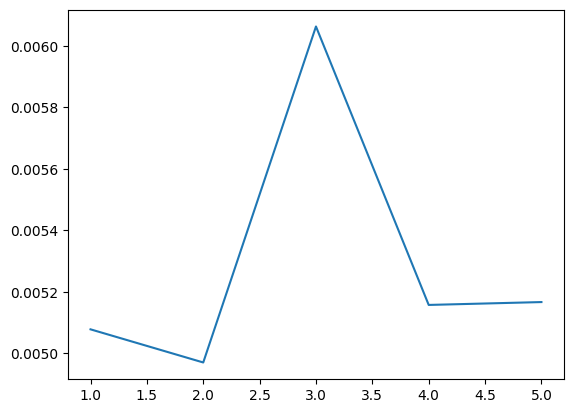

In [237]:
epochs=[1,2,3,4,5]
plt.plot(epochs,train_loss_coher)

In [47]:
print(train_loss)
print(train_loss_coher)

[0.056802120884259545, 0.057595754941304526, 0.057300948897997535, 0.05705527689059575, 0.05717799298961957]
[0.05153884967473225, 0.0794826841680644, 0.0887148520139572, 0.08694868777519234, 0.08714592602049238]


### CREATING DATASET FOR PROMPT RELEVANT SCORE

In [42]:
data = []

# For each essay, combine with a random set of prompts
for index, row in custom_df.iterrows():

    num_prompts = np.random.randint(1, 4)

    sample_prompts = custom_df[custom_df['essay_set'] != row['essay_set']].sample(num_prompts)

    for _, prompt_row in sample_prompts.iterrows():
        new_row = row.copy()
        new_row['essay'] = prompt_row['prompt'] + "." + row['essay']
        new_row['normalized_score'] = 0
        data.append(new_row)

result_df = pd.DataFrame(data).reset_index(drop=True)


In [43]:
prompt_df=custom_df.copy();
prompt_df['essay'] = prompt_df['prompt'] + " " + prompt_df['essay']

final_prompt_df = pd.concat([prompt_df, result_df], ignore_index=True)

In [44]:
final_prompt_df.tail()

,essay_id,essay_set,essay,normalized_score,prompt
36030,21389,8,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0.0,We all understand the benefits of laughter. Fo...
36031,21389,8,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0.0,We all understand the benefits of laughter. Fo...
36032,21619,8,"Based on the excerpt, describe the obstacles t...",0.0,We all understand the benefits of laughter. Fo...
36033,21619,8,"Based on the excerpt, describe the obstacles t...",0.0,We all understand the benefits of laughter. Fo...
36034,21619,8,"My parents, originally from Cuba, arrived in t...",0.0,We all understand the benefits of laughter. Fo...


#### CREATING A DATALOADER FOR PROMPT RELEVANCE MODEL

In [45]:
prompt_dataset = CustomDataset(final_prompt_df['essay_id'], final_prompt_df['essay_set'], final_prompt_df['essay'], final_prompt_df['prompt'], final_prompt_df['normalized_score'])
prompt_dataloader = DataLoader(prompt_dataset, batch_size=32, shuffle=True)

## PROMPT RELEVANCE MODEL TRAINING

In [40]:
model_prompt=PromptScore().to(device)
adam_optimizer_prompt=torch.optim.Adam(model_prompt.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
criteria=torch.nn.MSELoss()

In [48]:
optimizer=adam_optimizer_prompt
batch_size = 32
train_loss_ = []
final_loss=[]


for epoch in range(5):
    out_loss = 0
    batch_loss=[]
    num_samples_processed=0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(prompt_dataloader)):

        num_samples_processed += essay_id.size(0)

        if num_samples_processed >= 12000:
          break
        optimizer.zero_grad()

        essays, lengths_batch = preprocess_essay(essays)
        essays = essays.to(device)
        normalized_score = normalized_score.to(device)
        # print(essays.is_cuda,lengths_batch.is_cuda)

        out = model_prompt(essays, lengths_batch)


        out = out.float()
        normalized_score = normalized_score.float()

        loss = criteria(out, normalized_score)
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
        print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(prompt_dataloader)}], Batch Loss: {loss.item():.4f}")


    # final_loss.append(batch_loss)
    train_loss_.append(out_loss/len(prompt_dataloader))

1it [00:45, 45.62s/it]

Epoch [1/5], Batch [1/1124], Batch Loss: 0.1969


2it [01:40, 51.05s/it]

Epoch [1/5], Batch [2/1124], Batch Loss: 0.1774


3it [02:53, 60.97s/it]

Epoch [1/5], Batch [3/1124], Batch Loss: 0.1518


4it [03:43, 56.85s/it]

Epoch [1/5], Batch [4/1124], Batch Loss: 0.1071


5it [04:48, 59.55s/it]

Epoch [1/5], Batch [5/1124], Batch Loss: 0.1239


6it [05:32, 54.32s/it]

Epoch [1/5], Batch [6/1124], Batch Loss: 0.1951


7it [06:17, 51.36s/it]

Epoch [1/5], Batch [7/1124], Batch Loss: 0.1606


8it [07:20, 54.93s/it]

Epoch [1/5], Batch [8/1124], Batch Loss: 0.1371


9it [08:06, 52.19s/it]

Epoch [1/5], Batch [9/1124], Batch Loss: 0.0800


10it [09:02, 53.45s/it]

Epoch [1/5], Batch [10/1124], Batch Loss: 0.1254


11it [10:01, 55.20s/it]

Epoch [1/5], Batch [11/1124], Batch Loss: 0.1120


12it [10:48, 52.68s/it]

Epoch [1/5], Batch [12/1124], Batch Loss: 0.1390


13it [11:46, 54.31s/it]

Epoch [1/5], Batch [13/1124], Batch Loss: 0.1250


14it [12:53, 57.98s/it]

Epoch [1/5], Batch [14/1124], Batch Loss: 0.1403


15it [14:07, 62.92s/it]

Epoch [1/5], Batch [15/1124], Batch Loss: 0.1541


16it [14:55, 58.34s/it]

Epoch [1/5], Batch [16/1124], Batch Loss: 0.1690


17it [15:49, 57.08s/it]

Epoch [1/5], Batch [17/1124], Batch Loss: 0.1171


18it [16:40, 55.26s/it]

Epoch [1/5], Batch [18/1124], Batch Loss: 0.1487


19it [17:32, 54.26s/it]

Epoch [1/5], Batch [19/1124], Batch Loss: 0.1331


20it [18:44, 59.56s/it]

Epoch [1/5], Batch [20/1124], Batch Loss: 0.1500


21it [19:31, 55.92s/it]

Epoch [1/5], Batch [21/1124], Batch Loss: 0.1713


22it [20:22, 54.25s/it]

Epoch [1/5], Batch [22/1124], Batch Loss: 0.2429


23it [21:15, 54.05s/it]

Epoch [1/5], Batch [23/1124], Batch Loss: 0.1395


24it [22:17, 56.53s/it]

Epoch [1/5], Batch [24/1124], Batch Loss: 0.1862


25it [23:23, 59.15s/it]

Epoch [1/5], Batch [25/1124], Batch Loss: 0.1760


26it [24:22, 59.17s/it]

Epoch [1/5], Batch [26/1124], Batch Loss: 0.1443


27it [25:23, 59.74s/it]

Epoch [1/5], Batch [27/1124], Batch Loss: 0.0838


28it [26:07, 55.11s/it]

Epoch [1/5], Batch [28/1124], Batch Loss: 0.1204


29it [26:52, 51.85s/it]

Epoch [1/5], Batch [29/1124], Batch Loss: 0.0990


30it [27:53, 54.61s/it]

Epoch [1/5], Batch [30/1124], Batch Loss: 0.0913


31it [28:51, 55.87s/it]

Epoch [1/5], Batch [31/1124], Batch Loss: 0.1522


32it [29:40, 53.66s/it]

Epoch [1/5], Batch [32/1124], Batch Loss: 0.0969


33it [30:35, 54.08s/it]

Epoch [1/5], Batch [33/1124], Batch Loss: 0.2985


34it [31:22, 51.97s/it]

Epoch [1/5], Batch [34/1124], Batch Loss: 0.2014


35it [32:20, 53.72s/it]

Epoch [1/5], Batch [35/1124], Batch Loss: 0.1924


36it [33:05, 51.21s/it]

Epoch [1/5], Batch [36/1124], Batch Loss: 0.1292


37it [33:58, 51.69s/it]

Epoch [1/5], Batch [37/1124], Batch Loss: 0.1435


38it [34:50, 51.81s/it]

Epoch [1/5], Batch [38/1124], Batch Loss: 0.1425


39it [35:49, 54.01s/it]

Epoch [1/5], Batch [39/1124], Batch Loss: 0.1077


40it [36:42, 53.69s/it]

Epoch [1/5], Batch [40/1124], Batch Loss: 0.1614


41it [37:47, 57.18s/it]

Epoch [1/5], Batch [41/1124], Batch Loss: 0.1889


42it [38:38, 55.06s/it]

Epoch [1/5], Batch [42/1124], Batch Loss: 0.0600


43it [39:37, 56.26s/it]

Epoch [1/5], Batch [43/1124], Batch Loss: 0.0976


44it [40:43, 59.27s/it]

Epoch [1/5], Batch [44/1124], Batch Loss: 0.0981


45it [41:49, 61.30s/it]

Epoch [1/5], Batch [45/1124], Batch Loss: 0.1631


46it [42:39, 58.02s/it]

Epoch [1/5], Batch [46/1124], Batch Loss: 0.1139


47it [43:34, 57.10s/it]

Epoch [1/5], Batch [47/1124], Batch Loss: 0.0743


48it [44:28, 56.13s/it]

Epoch [1/5], Batch [48/1124], Batch Loss: 0.1570


49it [45:29, 57.40s/it]

Epoch [1/5], Batch [49/1124], Batch Loss: 0.1115


50it [46:30, 58.59s/it]

Epoch [1/5], Batch [50/1124], Batch Loss: 0.1260


51it [47:29, 58.65s/it]

Epoch [1/5], Batch [51/1124], Batch Loss: 0.1715


52it [48:27, 58.40s/it]

Epoch [1/5], Batch [52/1124], Batch Loss: 0.1121


53it [49:15, 55.49s/it]

Epoch [1/5], Batch [53/1124], Batch Loss: 0.1527


54it [50:01, 52.50s/it]

Epoch [1/5], Batch [54/1124], Batch Loss: 0.1298


55it [50:53, 52.37s/it]

Epoch [1/5], Batch [55/1124], Batch Loss: 0.0896


56it [51:50, 53.68s/it]

Epoch [1/5], Batch [56/1124], Batch Loss: 0.1169


57it [52:35, 51.19s/it]

Epoch [1/5], Batch [57/1124], Batch Loss: 0.0453


58it [53:27, 51.42s/it]

Epoch [1/5], Batch [58/1124], Batch Loss: 0.1365


59it [54:16, 50.63s/it]

Epoch [1/5], Batch [59/1124], Batch Loss: 0.0929


60it [55:23, 55.71s/it]

Epoch [1/5], Batch [60/1124], Batch Loss: 0.1311


61it [56:13, 53.80s/it]

Epoch [1/5], Batch [61/1124], Batch Loss: 0.0991


62it [57:17, 57.05s/it]

Epoch [1/5], Batch [62/1124], Batch Loss: 0.1859


63it [58:16, 57.59s/it]

Epoch [1/5], Batch [63/1124], Batch Loss: 0.0605


64it [59:05, 55.04s/it]

Epoch [1/5], Batch [64/1124], Batch Loss: 0.0745


65it [1:00:25, 62.45s/it]

Epoch [1/5], Batch [65/1124], Batch Loss: 0.1782


66it [1:01:30, 63.10s/it]

Epoch [1/5], Batch [66/1124], Batch Loss: 0.0718


67it [1:02:18, 58.72s/it]

Epoch [1/5], Batch [67/1124], Batch Loss: 0.0987


68it [1:03:17, 58.87s/it]

Epoch [1/5], Batch [68/1124], Batch Loss: 0.1389


69it [1:04:10, 56.99s/it]

Epoch [1/5], Batch [69/1124], Batch Loss: 0.1376


70it [1:05:11, 58.30s/it]

Epoch [1/5], Batch [70/1124], Batch Loss: 0.1973


71it [1:06:13, 59.37s/it]

Epoch [1/5], Batch [71/1124], Batch Loss: 0.2759


72it [1:07:17, 60.60s/it]

Epoch [1/5], Batch [72/1124], Batch Loss: 0.2051


73it [1:08:10, 58.33s/it]

Epoch [1/5], Batch [73/1124], Batch Loss: 0.1124


74it [1:08:58, 55.32s/it]

Epoch [1/5], Batch [74/1124], Batch Loss: 0.0975


75it [1:09:54, 55.70s/it]

Epoch [1/5], Batch [75/1124], Batch Loss: 0.1570


76it [1:10:54, 56.76s/it]

Epoch [1/5], Batch [76/1124], Batch Loss: 0.0832


77it [1:11:49, 56.41s/it]

Epoch [1/5], Batch [77/1124], Batch Loss: 0.0836


78it [1:12:50, 57.77s/it]

Epoch [1/5], Batch [78/1124], Batch Loss: 0.0878


79it [1:13:45, 56.94s/it]

Epoch [1/5], Batch [79/1124], Batch Loss: 0.1011


80it [1:14:25, 51.79s/it]

Epoch [1/5], Batch [80/1124], Batch Loss: 0.1566


81it [1:15:16, 51.55s/it]

Epoch [1/5], Batch [81/1124], Batch Loss: 0.2881


82it [1:16:09, 51.98s/it]

Epoch [1/5], Batch [82/1124], Batch Loss: 0.1303


83it [1:17:03, 52.53s/it]

Epoch [1/5], Batch [83/1124], Batch Loss: 0.1792


84it [1:18:05, 55.55s/it]

Epoch [1/5], Batch [84/1124], Batch Loss: 0.2258


85it [1:19:00, 55.30s/it]

Epoch [1/5], Batch [85/1124], Batch Loss: 0.0978


86it [1:19:52, 54.33s/it]

Epoch [1/5], Batch [86/1124], Batch Loss: 0.1395


87it [1:20:38, 51.63s/it]

Epoch [1/5], Batch [87/1124], Batch Loss: 0.0455


88it [1:21:40, 54.96s/it]

Epoch [1/5], Batch [88/1124], Batch Loss: 0.0957


89it [1:22:37, 55.43s/it]

Epoch [1/5], Batch [89/1124], Batch Loss: 0.1049


90it [1:23:35, 56.18s/it]

Epoch [1/5], Batch [90/1124], Batch Loss: 0.1176


91it [1:24:39, 58.75s/it]

Epoch [1/5], Batch [91/1124], Batch Loss: 0.0771


92it [1:25:48, 61.57s/it]

Epoch [1/5], Batch [92/1124], Batch Loss: 0.1541


93it [1:26:49, 61.59s/it]

Epoch [1/5], Batch [93/1124], Batch Loss: 0.1715


94it [1:27:56, 63.26s/it]

Epoch [1/5], Batch [94/1124], Batch Loss: 0.1616


95it [1:28:58, 62.88s/it]

Epoch [1/5], Batch [95/1124], Batch Loss: 0.0954


96it [1:30:05, 64.01s/it]

Epoch [1/5], Batch [96/1124], Batch Loss: 0.0853


97it [1:31:14, 65.52s/it]

Epoch [1/5], Batch [97/1124], Batch Loss: 0.0695


98it [1:32:18, 65.02s/it]

Epoch [1/5], Batch [98/1124], Batch Loss: 0.1495


99it [1:33:24, 65.41s/it]

Epoch [1/5], Batch [99/1124], Batch Loss: 0.0957


100it [1:34:33, 66.49s/it]

Epoch [1/5], Batch [100/1124], Batch Loss: 0.0677


101it [1:35:27, 62.64s/it]

Epoch [1/5], Batch [101/1124], Batch Loss: 0.1516


102it [1:36:29, 62.62s/it]

Epoch [1/5], Batch [102/1124], Batch Loss: 0.0802


103it [1:37:30, 61.88s/it]

Epoch [1/5], Batch [103/1124], Batch Loss: 0.1150


104it [1:38:38, 63.77s/it]

Epoch [1/5], Batch [104/1124], Batch Loss: 0.0649


105it [1:39:38, 62.73s/it]

Epoch [1/5], Batch [105/1124], Batch Loss: 0.1413


106it [1:40:38, 62.02s/it]

Epoch [1/5], Batch [106/1124], Batch Loss: 0.1171


107it [1:41:33, 59.88s/it]

Epoch [1/5], Batch [107/1124], Batch Loss: 0.1601


108it [1:42:30, 58.77s/it]

Epoch [1/5], Batch [108/1124], Batch Loss: 0.1485


109it [1:43:26, 58.16s/it]

Epoch [1/5], Batch [109/1124], Batch Loss: 0.1436


110it [1:44:27, 58.86s/it]

Epoch [1/5], Batch [110/1124], Batch Loss: 0.1518


111it [1:45:35, 61.74s/it]

Epoch [1/5], Batch [111/1124], Batch Loss: 0.1653


112it [1:46:33, 60.54s/it]

Epoch [1/5], Batch [112/1124], Batch Loss: 0.1497


113it [1:47:32, 60.03s/it]

Epoch [1/5], Batch [113/1124], Batch Loss: 0.1843


114it [1:48:27, 58.43s/it]

Epoch [1/5], Batch [114/1124], Batch Loss: 0.1642


115it [1:49:42, 63.57s/it]

Epoch [1/5], Batch [115/1124], Batch Loss: 0.1525


116it [1:50:41, 62.11s/it]

Epoch [1/5], Batch [116/1124], Batch Loss: 0.1478


117it [1:51:41, 61.67s/it]

Epoch [1/5], Batch [117/1124], Batch Loss: 0.1540


118it [1:52:49, 63.46s/it]

Epoch [1/5], Batch [118/1124], Batch Loss: 0.1721


119it [1:53:58, 64.97s/it]

Epoch [1/5], Batch [119/1124], Batch Loss: 0.0755


120it [1:55:05, 65.82s/it]

Epoch [1/5], Batch [120/1124], Batch Loss: 0.1782


121it [1:55:57, 61.47s/it]

Epoch [1/5], Batch [121/1124], Batch Loss: 0.1301


122it [1:56:39, 55.73s/it]

Epoch [1/5], Batch [122/1124], Batch Loss: 0.1300


123it [1:57:40, 57.39s/it]

Epoch [1/5], Batch [123/1124], Batch Loss: 0.1739


124it [1:58:40, 58.23s/it]

Epoch [1/5], Batch [124/1124], Batch Loss: 0.1514


125it [1:59:46, 60.45s/it]

Epoch [1/5], Batch [125/1124], Batch Loss: 0.1371


126it [2:00:37, 57.54s/it]

Epoch [1/5], Batch [126/1124], Batch Loss: 0.1746


127it [2:01:36, 57.91s/it]

Epoch [1/5], Batch [127/1124], Batch Loss: 0.0372


128it [2:02:32, 57.40s/it]

Epoch [1/5], Batch [128/1124], Batch Loss: 0.1474


129it [2:03:27, 56.67s/it]

Epoch [1/5], Batch [129/1124], Batch Loss: 0.1051


130it [2:04:26, 57.51s/it]

Epoch [1/5], Batch [130/1124], Batch Loss: 0.2052


131it [2:05:14, 54.65s/it]

Epoch [1/5], Batch [131/1124], Batch Loss: 0.1721


132it [2:06:02, 52.54s/it]

Epoch [1/5], Batch [132/1124], Batch Loss: 0.1503


133it [2:07:10, 57.08s/it]

Epoch [1/5], Batch [133/1124], Batch Loss: 0.1253


134it [2:08:16, 60.04s/it]

Epoch [1/5], Batch [134/1124], Batch Loss: 0.0850


135it [2:09:22, 61.66s/it]

Epoch [1/5], Batch [135/1124], Batch Loss: 0.1803


136it [2:10:23, 61.57s/it]

Epoch [1/5], Batch [136/1124], Batch Loss: 0.1743


137it [2:11:27, 62.24s/it]

Epoch [1/5], Batch [137/1124], Batch Loss: 0.0723


138it [2:12:39, 65.03s/it]

Epoch [1/5], Batch [138/1124], Batch Loss: 0.1674


139it [2:13:48, 66.28s/it]

Epoch [1/5], Batch [139/1124], Batch Loss: 0.0870


140it [2:15:00, 68.08s/it]

Epoch [1/5], Batch [140/1124], Batch Loss: 0.1713


141it [2:16:02, 66.31s/it]

Epoch [1/5], Batch [141/1124], Batch Loss: 0.1008


142it [2:17:03, 64.74s/it]

Epoch [1/5], Batch [142/1124], Batch Loss: 0.1574


143it [2:18:14, 66.64s/it]

Epoch [1/5], Batch [143/1124], Batch Loss: 0.1045


144it [2:19:12, 63.91s/it]

Epoch [1/5], Batch [144/1124], Batch Loss: 0.2090


145it [2:20:11, 62.39s/it]

Epoch [1/5], Batch [145/1124], Batch Loss: 0.0695


146it [2:20:59, 57.98s/it]

Epoch [1/5], Batch [146/1124], Batch Loss: 0.1228


147it [2:21:57, 58.05s/it]

Epoch [1/5], Batch [147/1124], Batch Loss: 0.2228


148it [2:23:17, 64.83s/it]

Epoch [1/5], Batch [148/1124], Batch Loss: 0.0731


149it [2:24:08, 60.42s/it]

Epoch [1/5], Batch [149/1124], Batch Loss: 0.0672


150it [2:25:02, 58.60s/it]

Epoch [1/5], Batch [150/1124], Batch Loss: 0.1534


151it [2:26:04, 59.66s/it]

Epoch [1/5], Batch [151/1124], Batch Loss: 0.2185


152it [2:27:05, 59.99s/it]

Epoch [1/5], Batch [152/1124], Batch Loss: 0.1848


153it [2:28:09, 61.31s/it]

Epoch [1/5], Batch [153/1124], Batch Loss: 0.1947


154it [2:29:10, 61.21s/it]

Epoch [1/5], Batch [154/1124], Batch Loss: 0.2068


155it [2:30:02, 58.31s/it]

Epoch [1/5], Batch [155/1124], Batch Loss: 0.1995


156it [2:30:48, 54.74s/it]

Epoch [1/5], Batch [156/1124], Batch Loss: 0.0776


157it [2:31:53, 57.89s/it]

Epoch [1/5], Batch [157/1124], Batch Loss: 0.1077


158it [2:32:53, 58.36s/it]

Epoch [1/5], Batch [158/1124], Batch Loss: 0.0945


159it [2:33:45, 56.42s/it]

Epoch [1/5], Batch [159/1124], Batch Loss: 0.0935


160it [2:34:43, 56.89s/it]

Epoch [1/5], Batch [160/1124], Batch Loss: 0.0803


161it [2:35:48, 59.38s/it]

Epoch [1/5], Batch [161/1124], Batch Loss: 0.1581


162it [2:36:40, 57.16s/it]

Epoch [1/5], Batch [162/1124], Batch Loss: 0.1000


163it [2:37:45, 59.57s/it]

Epoch [1/5], Batch [163/1124], Batch Loss: 0.0954


164it [2:38:44, 59.28s/it]

Epoch [1/5], Batch [164/1124], Batch Loss: 0.2104


165it [2:39:49, 61.15s/it]

Epoch [1/5], Batch [165/1124], Batch Loss: 0.0917


166it [2:41:05, 65.69s/it]

Epoch [1/5], Batch [166/1124], Batch Loss: 0.0936


167it [2:42:03, 63.32s/it]

Epoch [1/5], Batch [167/1124], Batch Loss: 0.1633


168it [2:43:14, 65.63s/it]

Epoch [1/5], Batch [168/1124], Batch Loss: 0.1399


169it [2:44:11, 62.84s/it]

Epoch [1/5], Batch [169/1124], Batch Loss: 0.1160


170it [2:45:15, 63.42s/it]

Epoch [1/5], Batch [170/1124], Batch Loss: 0.1009


171it [2:46:19, 63.54s/it]

Epoch [1/5], Batch [171/1124], Batch Loss: 0.1652


172it [2:47:30, 65.85s/it]

Epoch [1/5], Batch [172/1124], Batch Loss: 0.1671


173it [2:48:26, 62.67s/it]

Epoch [1/5], Batch [173/1124], Batch Loss: 0.0962


174it [2:49:25, 61.82s/it]

Epoch [1/5], Batch [174/1124], Batch Loss: 0.1954


175it [2:50:42, 66.11s/it]

Epoch [1/5], Batch [175/1124], Batch Loss: 0.1629


176it [2:51:38, 63.20s/it]

Epoch [1/5], Batch [176/1124], Batch Loss: 0.2096


177it [2:52:44, 64.18s/it]

Epoch [1/5], Batch [177/1124], Batch Loss: 0.1544


178it [2:53:52, 65.28s/it]

Epoch [1/5], Batch [178/1124], Batch Loss: 0.1273


179it [2:54:47, 62.06s/it]

Epoch [1/5], Batch [179/1124], Batch Loss: 0.1508


180it [2:55:53, 63.17s/it]

Epoch [1/5], Batch [180/1124], Batch Loss: 0.1542


181it [2:57:00, 64.54s/it]

Epoch [1/5], Batch [181/1124], Batch Loss: 0.1365


182it [2:57:44, 58.29s/it]

Epoch [1/5], Batch [182/1124], Batch Loss: 0.1542


183it [2:58:44, 58.79s/it]

Epoch [1/5], Batch [183/1124], Batch Loss: 0.2020


184it [2:59:32, 55.54s/it]

Epoch [1/5], Batch [184/1124], Batch Loss: 0.1117


185it [3:00:23, 54.27s/it]

Epoch [1/5], Batch [185/1124], Batch Loss: 0.1339


186it [3:01:20, 54.96s/it]

Epoch [1/5], Batch [186/1124], Batch Loss: 0.0729


187it [3:02:17, 55.48s/it]

Epoch [1/5], Batch [187/1124], Batch Loss: 0.1722


188it [3:03:18, 57.13s/it]

Epoch [1/5], Batch [188/1124], Batch Loss: 0.1852


189it [3:04:03, 53.62s/it]

Epoch [1/5], Batch [189/1124], Batch Loss: 0.1585


190it [3:04:56, 53.37s/it]

Epoch [1/5], Batch [190/1124], Batch Loss: 0.2286


191it [3:05:50, 53.48s/it]

Epoch [1/5], Batch [191/1124], Batch Loss: 0.0800


192it [3:06:43, 53.45s/it]

Epoch [1/5], Batch [192/1124], Batch Loss: 0.1655


193it [3:07:35, 53.17s/it]

Epoch [1/5], Batch [193/1124], Batch Loss: 0.2102


194it [3:08:39, 56.31s/it]

Epoch [1/5], Batch [194/1124], Batch Loss: 0.1487


195it [3:09:46, 59.53s/it]

Epoch [1/5], Batch [195/1124], Batch Loss: 0.1988


196it [3:10:42, 58.56s/it]

Epoch [1/5], Batch [196/1124], Batch Loss: 0.2024


197it [3:11:40, 58.15s/it]

Epoch [1/5], Batch [197/1124], Batch Loss: 0.1701


198it [3:12:46, 60.73s/it]

Epoch [1/5], Batch [198/1124], Batch Loss: 0.1246


199it [3:13:53, 62.53s/it]

Epoch [1/5], Batch [199/1124], Batch Loss: 0.1362


200it [3:14:52, 61.50s/it]

Epoch [1/5], Batch [200/1124], Batch Loss: 0.1604


201it [3:15:54, 61.49s/it]

Epoch [1/5], Batch [201/1124], Batch Loss: 0.1314


202it [3:16:48, 59.46s/it]

Epoch [1/5], Batch [202/1124], Batch Loss: 0.1912


203it [3:17:35, 55.76s/it]

Epoch [1/5], Batch [203/1124], Batch Loss: 0.1322


204it [3:18:31, 55.64s/it]

Epoch [1/5], Batch [204/1124], Batch Loss: 0.0382


205it [3:19:29, 56.31s/it]

Epoch [1/5], Batch [205/1124], Batch Loss: 0.0878


206it [3:20:32, 58.51s/it]

Epoch [1/5], Batch [206/1124], Batch Loss: 0.1936


207it [3:21:38, 60.63s/it]

Epoch [1/5], Batch [207/1124], Batch Loss: 0.1269


208it [3:22:39, 60.80s/it]

Epoch [1/5], Batch [208/1124], Batch Loss: 0.2006


209it [3:23:36, 59.62s/it]

Epoch [1/5], Batch [209/1124], Batch Loss: 0.1295


210it [3:24:42, 61.44s/it]

Epoch [1/5], Batch [210/1124], Batch Loss: 0.2066


211it [3:25:31, 57.92s/it]

Epoch [1/5], Batch [211/1124], Batch Loss: 0.2508


212it [3:26:31, 58.48s/it]

Epoch [1/5], Batch [212/1124], Batch Loss: 0.1327


213it [3:27:29, 58.14s/it]

Epoch [1/5], Batch [213/1124], Batch Loss: 0.1460


214it [3:28:16, 54.89s/it]

Epoch [1/5], Batch [214/1124], Batch Loss: 0.1881


215it [3:29:26, 59.57s/it]

Epoch [1/5], Batch [215/1124], Batch Loss: 0.1595


216it [3:30:23, 58.60s/it]

Epoch [1/5], Batch [216/1124], Batch Loss: 0.1427


217it [3:31:46, 66.00s/it]

Epoch [1/5], Batch [217/1124], Batch Loss: 0.0764


218it [3:32:46, 64.10s/it]

Epoch [1/5], Batch [218/1124], Batch Loss: 0.1530


219it [3:33:49, 63.91s/it]

Epoch [1/5], Batch [219/1124], Batch Loss: 0.1908


220it [3:34:40, 60.07s/it]

Epoch [1/5], Batch [220/1124], Batch Loss: 0.1154


221it [3:35:32, 57.62s/it]

Epoch [1/5], Batch [221/1124], Batch Loss: 0.1468


222it [3:36:41, 61.06s/it]

Epoch [1/5], Batch [222/1124], Batch Loss: 0.1222


223it [3:37:52, 64.08s/it]

Epoch [1/5], Batch [223/1124], Batch Loss: 0.0718


224it [3:38:50, 62.21s/it]

Epoch [1/5], Batch [224/1124], Batch Loss: 0.1255


225it [3:39:58, 64.05s/it]

Epoch [1/5], Batch [225/1124], Batch Loss: 0.1528


226it [3:40:52, 60.75s/it]

Epoch [1/5], Batch [226/1124], Batch Loss: 0.1158


227it [3:41:37, 56.25s/it]

Epoch [1/5], Batch [227/1124], Batch Loss: 0.1183


228it [3:42:41, 58.36s/it]

Epoch [1/5], Batch [228/1124], Batch Loss: 0.1704


229it [3:43:44, 59.87s/it]

Epoch [1/5], Batch [229/1124], Batch Loss: 0.1191


230it [3:44:37, 57.88s/it]

Epoch [1/5], Batch [230/1124], Batch Loss: 0.1751


231it [3:45:36, 58.30s/it]

Epoch [1/5], Batch [231/1124], Batch Loss: 0.0579


232it [3:46:22, 54.57s/it]

Epoch [1/5], Batch [232/1124], Batch Loss: 0.1191


233it [3:47:22, 56.08s/it]

Epoch [1/5], Batch [233/1124], Batch Loss: 0.1699


234it [3:48:31, 60.03s/it]

Epoch [1/5], Batch [234/1124], Batch Loss: 0.1062


235it [3:49:25, 58.16s/it]

Epoch [1/5], Batch [235/1124], Batch Loss: 0.0288


236it [3:50:28, 59.74s/it]

Epoch [1/5], Batch [236/1124], Batch Loss: 0.1548


237it [3:51:42, 63.89s/it]

Epoch [1/5], Batch [237/1124], Batch Loss: 0.0997


238it [3:52:28, 58.45s/it]

Epoch [1/5], Batch [238/1124], Batch Loss: 0.1692


239it [3:53:31, 59.81s/it]

Epoch [1/5], Batch [239/1124], Batch Loss: 0.1001


240it [3:54:29, 59.45s/it]

Epoch [1/5], Batch [240/1124], Batch Loss: 0.1011


241it [3:55:26, 58.52s/it]

Epoch [1/5], Batch [241/1124], Batch Loss: 0.1073


242it [3:56:23, 58.09s/it]

Epoch [1/5], Batch [242/1124], Batch Loss: 0.0602


243it [3:57:22, 58.33s/it]

Epoch [1/5], Batch [243/1124], Batch Loss: 0.1974


244it [3:58:23, 59.26s/it]

Epoch [1/5], Batch [244/1124], Batch Loss: 0.2416


245it [3:59:15, 57.10s/it]

Epoch [1/5], Batch [245/1124], Batch Loss: 0.1884


246it [4:00:12, 57.10s/it]

Epoch [1/5], Batch [246/1124], Batch Loss: 0.1332


247it [4:01:16, 59.14s/it]

Epoch [1/5], Batch [247/1124], Batch Loss: 0.1146


248it [4:02:17, 59.60s/it]

Epoch [1/5], Batch [248/1124], Batch Loss: 0.1376


249it [4:03:13, 58.45s/it]

Epoch [1/5], Batch [249/1124], Batch Loss: 0.2524


250it [4:04:12, 58.78s/it]

Epoch [1/5], Batch [250/1124], Batch Loss: 0.1356


251it [4:05:18, 60.84s/it]

Epoch [1/5], Batch [251/1124], Batch Loss: 0.1145


252it [4:06:22, 61.74s/it]

Epoch [1/5], Batch [252/1124], Batch Loss: 0.1045


253it [4:07:22, 61.23s/it]

Epoch [1/5], Batch [253/1124], Batch Loss: 0.1913


254it [4:08:07, 56.41s/it]

Epoch [1/5], Batch [254/1124], Batch Loss: 0.1111


255it [4:09:14, 59.53s/it]

Epoch [1/5], Batch [255/1124], Batch Loss: 0.0802


256it [4:10:11, 58.96s/it]

Epoch [1/5], Batch [256/1124], Batch Loss: 0.1767


257it [4:11:17, 61.08s/it]

Epoch [1/5], Batch [257/1124], Batch Loss: 0.1578


258it [4:12:13, 59.55s/it]

Epoch [1/5], Batch [258/1124], Batch Loss: 0.0458


259it [4:13:07, 57.82s/it]

Epoch [1/5], Batch [259/1124], Batch Loss: 0.1236


260it [4:14:18, 61.81s/it]

Epoch [1/5], Batch [260/1124], Batch Loss: 0.1124


261it [4:15:35, 66.34s/it]

Epoch [1/5], Batch [261/1124], Batch Loss: 0.1740


262it [4:16:25, 61.44s/it]

Epoch [1/5], Batch [262/1124], Batch Loss: 0.1251


263it [4:17:30, 62.56s/it]

Epoch [1/5], Batch [263/1124], Batch Loss: 0.1723


264it [4:18:13, 56.61s/it]

Epoch [1/5], Batch [264/1124], Batch Loss: 0.1391


265it [4:19:05, 55.27s/it]

Epoch [1/5], Batch [265/1124], Batch Loss: 0.2440


266it [4:20:01, 55.59s/it]

Epoch [1/5], Batch [266/1124], Batch Loss: 0.1653


267it [4:20:59, 56.10s/it]

Epoch [1/5], Batch [267/1124], Batch Loss: 0.1350


268it [4:21:44, 52.84s/it]

Epoch [1/5], Batch [268/1124], Batch Loss: 0.1822


269it [4:22:27, 49.92s/it]

Epoch [1/5], Batch [269/1124], Batch Loss: 0.1624


270it [4:23:22, 51.32s/it]

Epoch [1/5], Batch [270/1124], Batch Loss: 0.1613


271it [4:24:20, 53.39s/it]

Epoch [1/5], Batch [271/1124], Batch Loss: 0.1194


272it [4:25:22, 55.94s/it]

Epoch [1/5], Batch [272/1124], Batch Loss: 0.0770


273it [4:26:11, 53.84s/it]

Epoch [1/5], Batch [273/1124], Batch Loss: 0.1428


274it [4:26:57, 51.62s/it]

Epoch [1/5], Batch [274/1124], Batch Loss: 0.1967


275it [4:27:56, 53.78s/it]

Epoch [1/5], Batch [275/1124], Batch Loss: 0.2220


276it [4:28:49, 53.41s/it]

Epoch [1/5], Batch [276/1124], Batch Loss: 0.1944


277it [4:29:49, 55.49s/it]

Epoch [1/5], Batch [277/1124], Batch Loss: 0.2586


278it [4:30:48, 56.44s/it]

Epoch [1/5], Batch [278/1124], Batch Loss: 0.1459


279it [4:31:42, 55.88s/it]

Epoch [1/5], Batch [279/1124], Batch Loss: 0.0980


280it [4:32:39, 56.32s/it]

Epoch [1/5], Batch [280/1124], Batch Loss: 0.0909


281it [4:33:46, 59.44s/it]

Epoch [1/5], Batch [281/1124], Batch Loss: 0.1193


282it [4:34:57, 62.71s/it]

Epoch [1/5], Batch [282/1124], Batch Loss: 0.1476


283it [4:35:56, 61.64s/it]

Epoch [1/5], Batch [283/1124], Batch Loss: 0.0977


284it [4:36:56, 61.34s/it]

Epoch [1/5], Batch [284/1124], Batch Loss: 0.1387


285it [4:37:41, 56.46s/it]

Epoch [1/5], Batch [285/1124], Batch Loss: 0.1391


286it [4:38:28, 53.63s/it]

Epoch [1/5], Batch [286/1124], Batch Loss: 0.2103


287it [4:39:22, 53.72s/it]

Epoch [1/5], Batch [287/1124], Batch Loss: 0.1618


288it [4:40:14, 52.99s/it]

Epoch [1/5], Batch [288/1124], Batch Loss: 0.1311


289it [4:41:16, 55.94s/it]

Epoch [1/5], Batch [289/1124], Batch Loss: 0.1782


290it [4:42:02, 52.71s/it]

Epoch [1/5], Batch [290/1124], Batch Loss: 0.0705


291it [4:42:59, 54.02s/it]

Epoch [1/5], Batch [291/1124], Batch Loss: 0.2076


292it [4:44:09, 58.91s/it]

Epoch [1/5], Batch [292/1124], Batch Loss: 0.1221


293it [4:45:05, 58.02s/it]

Epoch [1/5], Batch [293/1124], Batch Loss: 0.1430


294it [4:45:59, 56.88s/it]

Epoch [1/5], Batch [294/1124], Batch Loss: 0.1334


295it [4:47:03, 59.02s/it]

Epoch [1/5], Batch [295/1124], Batch Loss: 0.1989


296it [4:48:04, 59.49s/it]

Epoch [1/5], Batch [296/1124], Batch Loss: 0.0444


297it [4:48:55, 56.96s/it]

Epoch [1/5], Batch [297/1124], Batch Loss: 0.1114


298it [4:50:03, 60.46s/it]

Epoch [1/5], Batch [298/1124], Batch Loss: 0.1280


299it [4:50:49, 56.13s/it]

Epoch [1/5], Batch [299/1124], Batch Loss: 0.0937


300it [4:51:44, 55.68s/it]

Epoch [1/5], Batch [300/1124], Batch Loss: 0.1043


301it [4:52:34, 53.99s/it]

Epoch [1/5], Batch [301/1124], Batch Loss: 0.1494


302it [4:53:34, 55.69s/it]

Epoch [1/5], Batch [302/1124], Batch Loss: 0.1218


303it [4:54:35, 57.46s/it]

Epoch [1/5], Batch [303/1124], Batch Loss: 0.1846


304it [4:55:33, 57.53s/it]

Epoch [1/5], Batch [304/1124], Batch Loss: 0.1661


305it [4:56:25, 55.87s/it]

Epoch [1/5], Batch [305/1124], Batch Loss: 0.0671


306it [4:57:16, 54.27s/it]

Epoch [1/5], Batch [306/1124], Batch Loss: 0.0885


307it [4:58:09, 54.13s/it]

Epoch [1/5], Batch [307/1124], Batch Loss: 0.1124


308it [4:59:01, 53.31s/it]

Epoch [1/5], Batch [308/1124], Batch Loss: 0.1305


309it [4:59:54, 53.39s/it]

Epoch [1/5], Batch [309/1124], Batch Loss: 0.1311


310it [5:01:16, 61.79s/it]

Epoch [1/5], Batch [310/1124], Batch Loss: 0.1284


311it [5:02:16, 61.32s/it]

Epoch [1/5], Batch [311/1124], Batch Loss: 0.1697


312it [5:03:26, 63.98s/it]

Epoch [1/5], Batch [312/1124], Batch Loss: 0.0920


313it [5:04:51, 70.37s/it]

Epoch [1/5], Batch [313/1124], Batch Loss: 0.0849


314it [5:05:55, 68.34s/it]

Epoch [1/5], Batch [314/1124], Batch Loss: 0.1700


315it [5:07:16, 72.15s/it]

Epoch [1/5], Batch [315/1124], Batch Loss: 0.1419


316it [5:08:14, 67.81s/it]

Epoch [1/5], Batch [316/1124], Batch Loss: 0.1617


317it [5:09:31, 70.60s/it]

Epoch [1/5], Batch [317/1124], Batch Loss: 0.1811


318it [5:10:39, 69.95s/it]

Epoch [1/5], Batch [318/1124], Batch Loss: 0.1089


319it [5:11:41, 67.56s/it]

Epoch [1/5], Batch [319/1124], Batch Loss: 0.1663


320it [5:12:26, 60.71s/it]

Epoch [1/5], Batch [320/1124], Batch Loss: 0.0827


321it [5:13:38, 63.95s/it]

Epoch [1/5], Batch [321/1124], Batch Loss: 0.0605


322it [5:14:40, 63.47s/it]

Epoch [1/5], Batch [322/1124], Batch Loss: 0.1901


323it [5:15:32, 59.96s/it]

Epoch [1/5], Batch [323/1124], Batch Loss: 0.1270


324it [5:16:51, 65.69s/it]

Epoch [1/5], Batch [324/1124], Batch Loss: 0.1308


325it [5:17:45, 62.35s/it]

Epoch [1/5], Batch [325/1124], Batch Loss: 0.1429


326it [5:18:48, 62.30s/it]

Epoch [1/5], Batch [326/1124], Batch Loss: 0.2108


327it [5:19:52, 63.09s/it]

Epoch [1/5], Batch [327/1124], Batch Loss: 0.1301


328it [5:20:50, 61.43s/it]

Epoch [1/5], Batch [328/1124], Batch Loss: 0.0850


329it [5:21:53, 61.91s/it]

Epoch [1/5], Batch [329/1124], Batch Loss: 0.1341


330it [5:23:02, 64.05s/it]

Epoch [1/5], Batch [330/1124], Batch Loss: 0.2099


331it [5:24:16, 67.06s/it]

Epoch [1/5], Batch [331/1124], Batch Loss: 0.1119


332it [5:25:29, 68.82s/it]

Epoch [1/5], Batch [332/1124], Batch Loss: 0.1923


333it [5:26:38, 68.72s/it]

Epoch [1/5], Batch [333/1124], Batch Loss: 0.1746


334it [5:27:46, 68.49s/it]

Epoch [1/5], Batch [334/1124], Batch Loss: 0.1379


335it [5:28:50, 67.38s/it]

Epoch [1/5], Batch [335/1124], Batch Loss: 0.0941


336it [5:30:04, 69.29s/it]

Epoch [1/5], Batch [336/1124], Batch Loss: 0.0894


337it [5:31:04, 66.61s/it]

Epoch [1/5], Batch [337/1124], Batch Loss: 0.1785


338it [5:31:55, 61.84s/it]

Epoch [1/5], Batch [338/1124], Batch Loss: 0.1391


339it [5:32:52, 60.37s/it]

Epoch [1/5], Batch [339/1124], Batch Loss: 0.1189


340it [5:34:03, 63.53s/it]

Epoch [1/5], Batch [340/1124], Batch Loss: 0.2288


341it [5:35:10, 64.68s/it]

Epoch [1/5], Batch [341/1124], Batch Loss: 0.1452


342it [5:36:03, 61.02s/it]

Epoch [1/5], Batch [342/1124], Batch Loss: 0.2256


343it [5:36:57, 59.04s/it]

Epoch [1/5], Batch [343/1124], Batch Loss: 0.0854


344it [5:37:55, 58.53s/it]

Epoch [1/5], Batch [344/1124], Batch Loss: 0.1457


345it [5:39:06, 62.37s/it]

Epoch [1/5], Batch [345/1124], Batch Loss: 0.1648


346it [5:40:12, 63.38s/it]

Epoch [1/5], Batch [346/1124], Batch Loss: 0.1037


347it [5:41:04, 60.15s/it]

Epoch [1/5], Batch [347/1124], Batch Loss: 0.1165


348it [5:42:00, 58.94s/it]

Epoch [1/5], Batch [348/1124], Batch Loss: 0.1815


349it [5:42:46, 55.04s/it]

Epoch [1/5], Batch [349/1124], Batch Loss: 0.0830


350it [5:43:50, 57.51s/it]

Epoch [1/5], Batch [350/1124], Batch Loss: 0.1854


351it [5:44:57, 60.45s/it]

Epoch [1/5], Batch [351/1124], Batch Loss: 0.1321


352it [5:45:55, 59.85s/it]

Epoch [1/5], Batch [352/1124], Batch Loss: 0.0944


353it [5:46:51, 58.72s/it]

Epoch [1/5], Batch [353/1124], Batch Loss: 0.1787


354it [5:48:10, 64.59s/it]

Epoch [1/5], Batch [354/1124], Batch Loss: 0.1719


355it [5:49:27, 68.46s/it]

Epoch [1/5], Batch [355/1124], Batch Loss: 0.1251


356it [5:50:21, 64.04s/it]

Epoch [1/5], Batch [356/1124], Batch Loss: 0.2321


357it [5:51:32, 66.17s/it]

Epoch [1/5], Batch [357/1124], Batch Loss: 0.1578


358it [5:52:43, 67.68s/it]

Epoch [1/5], Batch [358/1124], Batch Loss: 0.1045


359it [5:53:53, 68.23s/it]

Epoch [1/5], Batch [359/1124], Batch Loss: 0.1928


360it [5:54:48, 64.36s/it]

Epoch [1/5], Batch [360/1124], Batch Loss: 0.0848


361it [5:55:54, 64.77s/it]

Epoch [1/5], Batch [361/1124], Batch Loss: 0.1842


362it [5:56:59, 64.90s/it]

Epoch [1/5], Batch [362/1124], Batch Loss: 0.1107


363it [5:58:06, 65.38s/it]

Epoch [1/5], Batch [363/1124], Batch Loss: 0.1449


364it [5:59:12, 65.64s/it]

Epoch [1/5], Batch [364/1124], Batch Loss: 0.1363


365it [6:00:06, 62.22s/it]

Epoch [1/5], Batch [365/1124], Batch Loss: 0.1827


366it [6:01:09, 62.49s/it]

Epoch [1/5], Batch [366/1124], Batch Loss: 0.1239


367it [6:02:07, 60.98s/it]

Epoch [1/5], Batch [367/1124], Batch Loss: 0.1188


368it [6:03:11, 61.98s/it]

Epoch [1/5], Batch [368/1124], Batch Loss: 0.1547


369it [6:04:04, 59.31s/it]

Epoch [1/5], Batch [369/1124], Batch Loss: 0.0977


370it [6:04:49, 55.14s/it]

Epoch [1/5], Batch [370/1124], Batch Loss: 0.1054


371it [6:05:46, 55.61s/it]

Epoch [1/5], Batch [371/1124], Batch Loss: 0.2374


372it [6:06:37, 54.05s/it]

Epoch [1/5], Batch [372/1124], Batch Loss: 0.1946


373it [6:07:32, 54.60s/it]

Epoch [1/5], Batch [373/1124], Batch Loss: 0.1621


374it [6:08:34, 59.13s/it]


Epoch [1/5], Batch [374/1124], Batch Loss: 0.1219


1it [01:02, 62.39s/it]

Epoch [2/5], Batch [1/1124], Batch Loss: 0.1944


2it [02:03, 61.62s/it]

Epoch [2/5], Batch [2/1124], Batch Loss: 0.1169


3it [03:09, 63.41s/it]

Epoch [2/5], Batch [3/1124], Batch Loss: 0.1039


4it [04:03, 59.96s/it]

Epoch [2/5], Batch [4/1124], Batch Loss: 0.0781


5it [05:35, 71.27s/it]

Epoch [2/5], Batch [5/1124], Batch Loss: 0.1548


6it [06:52, 73.35s/it]

Epoch [2/5], Batch [6/1124], Batch Loss: 0.1096


7it [08:06, 73.63s/it]

Epoch [2/5], Batch [7/1124], Batch Loss: 0.1712


8it [09:13, 71.46s/it]

Epoch [2/5], Batch [8/1124], Batch Loss: 0.1245


9it [10:12, 67.66s/it]

Epoch [2/5], Batch [9/1124], Batch Loss: 0.2458


10it [11:07, 63.58s/it]

Epoch [2/5], Batch [10/1124], Batch Loss: 0.0728


11it [12:20, 66.62s/it]

Epoch [2/5], Batch [11/1124], Batch Loss: 0.1450


12it [13:26, 66.33s/it]

Epoch [2/5], Batch [12/1124], Batch Loss: 0.2068


13it [14:28, 65.00s/it]

Epoch [2/5], Batch [13/1124], Batch Loss: 0.0592


14it [15:34, 65.43s/it]

Epoch [2/5], Batch [14/1124], Batch Loss: 0.2082


15it [16:47, 67.62s/it]

Epoch [2/5], Batch [15/1124], Batch Loss: 0.1011


16it [17:42, 63.82s/it]

Epoch [2/5], Batch [16/1124], Batch Loss: 0.2102


17it [18:43, 63.00s/it]

Epoch [2/5], Batch [17/1124], Batch Loss: 0.2147


18it [19:39, 60.91s/it]

Epoch [2/5], Batch [18/1124], Batch Loss: 0.2154


19it [20:40, 61.07s/it]

Epoch [2/5], Batch [19/1124], Batch Loss: 0.0709


20it [21:40, 60.47s/it]

Epoch [2/5], Batch [20/1124], Batch Loss: 0.0931


21it [22:34, 58.79s/it]

Epoch [2/5], Batch [21/1124], Batch Loss: 0.1693


22it [23:22, 55.51s/it]

Epoch [2/5], Batch [22/1124], Batch Loss: 0.0597


23it [24:26, 58.07s/it]

Epoch [2/5], Batch [23/1124], Batch Loss: 0.1447


24it [25:24, 58.03s/it]

Epoch [2/5], Batch [24/1124], Batch Loss: 0.1260


25it [26:10, 54.49s/it]

Epoch [2/5], Batch [25/1124], Batch Loss: 0.1568


26it [27:10, 56.02s/it]

Epoch [2/5], Batch [26/1124], Batch Loss: 0.1662


27it [28:12, 57.93s/it]

Epoch [2/5], Batch [27/1124], Batch Loss: 0.1895


28it [29:13, 58.78s/it]

Epoch [2/5], Batch [28/1124], Batch Loss: 0.1146


29it [30:12, 58.74s/it]

Epoch [2/5], Batch [29/1124], Batch Loss: 0.1324


30it [31:11, 58.90s/it]

Epoch [2/5], Batch [30/1124], Batch Loss: 0.3028


31it [32:13, 59.87s/it]

Epoch [2/5], Batch [31/1124], Batch Loss: 0.1379


32it [33:16, 60.71s/it]

Epoch [2/5], Batch [32/1124], Batch Loss: 0.1708


33it [34:05, 57.17s/it]

Epoch [2/5], Batch [33/1124], Batch Loss: 0.1131


34it [35:07, 58.53s/it]

Epoch [2/5], Batch [34/1124], Batch Loss: 0.1970


35it [36:01, 57.39s/it]

Epoch [2/5], Batch [35/1124], Batch Loss: 0.1300


36it [37:01, 58.15s/it]

Epoch [2/5], Batch [36/1124], Batch Loss: 0.1705


37it [37:58, 57.89s/it]

Epoch [2/5], Batch [37/1124], Batch Loss: 0.1239


38it [38:52, 56.47s/it]

Epoch [2/5], Batch [38/1124], Batch Loss: 0.1570


39it [39:58, 59.30s/it]

Epoch [2/5], Batch [39/1124], Batch Loss: 0.1840


40it [40:48, 56.67s/it]

Epoch [2/5], Batch [40/1124], Batch Loss: 0.0962


41it [41:45, 56.81s/it]

Epoch [2/5], Batch [41/1124], Batch Loss: 0.0938


42it [42:41, 56.58s/it]

Epoch [2/5], Batch [42/1124], Batch Loss: 0.1600


43it [43:31, 54.48s/it]

Epoch [2/5], Batch [43/1124], Batch Loss: 0.1241


44it [44:26, 54.61s/it]

Epoch [2/5], Batch [44/1124], Batch Loss: 0.0583


45it [45:28, 57.02s/it]

Epoch [2/5], Batch [45/1124], Batch Loss: 0.1573


46it [46:37, 60.36s/it]

Epoch [2/5], Batch [46/1124], Batch Loss: 0.1369


47it [47:26, 57.01s/it]

Epoch [2/5], Batch [47/1124], Batch Loss: 0.1000


48it [48:42, 62.87s/it]

Epoch [2/5], Batch [48/1124], Batch Loss: 0.1365


49it [49:26, 57.25s/it]

Epoch [2/5], Batch [49/1124], Batch Loss: 0.1532


50it [50:19, 55.90s/it]

Epoch [2/5], Batch [50/1124], Batch Loss: 0.0994


51it [51:29, 60.03s/it]

Epoch [2/5], Batch [51/1124], Batch Loss: 0.0732


52it [52:30, 60.32s/it]

Epoch [2/5], Batch [52/1124], Batch Loss: 0.0597


53it [53:34, 61.40s/it]

Epoch [2/5], Batch [53/1124], Batch Loss: 0.1105


54it [54:27, 58.92s/it]

Epoch [2/5], Batch [54/1124], Batch Loss: 0.0903


55it [55:20, 57.13s/it]

Epoch [2/5], Batch [55/1124], Batch Loss: 0.1707


56it [56:14, 56.32s/it]

Epoch [2/5], Batch [56/1124], Batch Loss: 0.1646


57it [57:07, 55.34s/it]

Epoch [2/5], Batch [57/1124], Batch Loss: 0.1344


58it [58:13, 58.41s/it]

Epoch [2/5], Batch [58/1124], Batch Loss: 0.0695


59it [59:17, 60.09s/it]

Epoch [2/5], Batch [59/1124], Batch Loss: 0.0769


60it [1:00:17, 59.96s/it]

Epoch [2/5], Batch [60/1124], Batch Loss: 0.1275


61it [1:01:19, 60.67s/it]

Epoch [2/5], Batch [61/1124], Batch Loss: 0.1570


62it [1:02:21, 61.07s/it]

Epoch [2/5], Batch [62/1124], Batch Loss: 0.1556


63it [1:03:18, 59.88s/it]

Epoch [2/5], Batch [63/1124], Batch Loss: 0.1541


64it [1:04:33, 64.35s/it]

Epoch [2/5], Batch [64/1124], Batch Loss: 0.1252


65it [1:05:46, 67.06s/it]

Epoch [2/5], Batch [65/1124], Batch Loss: 0.1741


66it [1:06:40, 63.00s/it]

Epoch [2/5], Batch [66/1124], Batch Loss: 0.0968


67it [1:07:52, 65.85s/it]

Epoch [2/5], Batch [67/1124], Batch Loss: 0.1256


68it [1:08:43, 61.47s/it]

Epoch [2/5], Batch [68/1124], Batch Loss: 0.1557


69it [1:09:38, 59.38s/it]

Epoch [2/5], Batch [69/1124], Batch Loss: 0.1483


70it [1:10:36, 59.11s/it]

Epoch [2/5], Batch [70/1124], Batch Loss: 0.1969


71it [1:11:33, 58.33s/it]

Epoch [2/5], Batch [71/1124], Batch Loss: 0.1260


72it [1:12:24, 56.07s/it]

Epoch [2/5], Batch [72/1124], Batch Loss: 0.0897


73it [1:13:28, 58.53s/it]

Epoch [2/5], Batch [73/1124], Batch Loss: 0.1670


74it [1:14:11, 53.95s/it]

Epoch [2/5], Batch [74/1124], Batch Loss: 0.1905


75it [1:15:09, 55.11s/it]

Epoch [2/5], Batch [75/1124], Batch Loss: 0.0941


76it [1:16:10, 56.83s/it]

Epoch [2/5], Batch [76/1124], Batch Loss: 0.2208


77it [1:17:10, 57.95s/it]

Epoch [2/5], Batch [77/1124], Batch Loss: 0.1778


78it [1:18:06, 57.28s/it]

Epoch [2/5], Batch [78/1124], Batch Loss: 0.1387


79it [1:18:58, 55.71s/it]

Epoch [2/5], Batch [79/1124], Batch Loss: 0.1277


80it [1:19:52, 55.07s/it]

Epoch [2/5], Batch [80/1124], Batch Loss: 0.1283


81it [1:20:40, 52.94s/it]

Epoch [2/5], Batch [81/1124], Batch Loss: 0.1732


82it [1:21:27, 51.23s/it]

Epoch [2/5], Batch [82/1124], Batch Loss: 0.0907


83it [1:22:26, 53.57s/it]

Epoch [2/5], Batch [83/1124], Batch Loss: 0.2302


84it [1:23:27, 55.65s/it]

Epoch [2/5], Batch [84/1124], Batch Loss: 0.1819


85it [1:24:35, 59.38s/it]

Epoch [2/5], Batch [85/1124], Batch Loss: 0.1185


86it [1:25:34, 59.37s/it]

Epoch [2/5], Batch [86/1124], Batch Loss: 0.1519


87it [1:26:31, 58.69s/it]

Epoch [2/5], Batch [87/1124], Batch Loss: 0.0636


88it [1:27:28, 58.10s/it]

Epoch [2/5], Batch [88/1124], Batch Loss: 0.0332


89it [1:28:35, 60.93s/it]

Epoch [2/5], Batch [89/1124], Batch Loss: 0.1567


90it [1:29:41, 62.46s/it]

Epoch [2/5], Batch [90/1124], Batch Loss: 0.1247


91it [1:30:35, 59.80s/it]

Epoch [2/5], Batch [91/1124], Batch Loss: 0.0750


92it [1:31:17, 54.40s/it]

Epoch [2/5], Batch [92/1124], Batch Loss: 0.1104


93it [1:32:30, 60.05s/it]

Epoch [2/5], Batch [93/1124], Batch Loss: 0.2259


94it [1:33:20, 57.14s/it]

Epoch [2/5], Batch [94/1124], Batch Loss: 0.2582


95it [1:34:18, 57.42s/it]

Epoch [2/5], Batch [95/1124], Batch Loss: 0.1225


96it [1:35:06, 54.38s/it]

Epoch [2/5], Batch [96/1124], Batch Loss: 0.0723


97it [1:35:56, 53.11s/it]

Epoch [2/5], Batch [97/1124], Batch Loss: 0.1959


98it [1:36:35, 48.89s/it]

Epoch [2/5], Batch [98/1124], Batch Loss: 0.1205


99it [1:37:31, 50.91s/it]

Epoch [2/5], Batch [99/1124], Batch Loss: 0.1241


100it [1:38:31, 53.81s/it]

Epoch [2/5], Batch [100/1124], Batch Loss: 0.1580


101it [1:39:33, 56.27s/it]

Epoch [2/5], Batch [101/1124], Batch Loss: 0.1774


102it [1:40:38, 58.85s/it]

Epoch [2/5], Batch [102/1124], Batch Loss: 0.1377


103it [1:41:49, 62.51s/it]

Epoch [2/5], Batch [103/1124], Batch Loss: 0.0804


104it [1:42:53, 62.99s/it]

Epoch [2/5], Batch [104/1124], Batch Loss: 0.0840


105it [1:43:43, 58.90s/it]

Epoch [2/5], Batch [105/1124], Batch Loss: 0.0855


106it [1:44:28, 54.96s/it]

Epoch [2/5], Batch [106/1124], Batch Loss: 0.1124


107it [1:45:16, 52.87s/it]

Epoch [2/5], Batch [107/1124], Batch Loss: 0.1818


108it [1:46:11, 53.53s/it]

Epoch [2/5], Batch [108/1124], Batch Loss: 0.1689


109it [1:46:54, 50.25s/it]

Epoch [2/5], Batch [109/1124], Batch Loss: 0.0968


110it [1:47:50, 52.07s/it]

Epoch [2/5], Batch [110/1124], Batch Loss: 0.1952


111it [1:48:55, 55.99s/it]

Epoch [2/5], Batch [111/1124], Batch Loss: 0.0905


112it [1:49:47, 54.74s/it]

Epoch [2/5], Batch [112/1124], Batch Loss: 0.1406


113it [1:50:37, 53.31s/it]

Epoch [2/5], Batch [113/1124], Batch Loss: 0.0675


114it [1:51:46, 58.03s/it]

Epoch [2/5], Batch [114/1124], Batch Loss: 0.1807


115it [1:52:58, 62.05s/it]

Epoch [2/5], Batch [115/1124], Batch Loss: 0.1109


116it [1:53:57, 61.35s/it]

Epoch [2/5], Batch [116/1124], Batch Loss: 0.1574


117it [1:54:59, 61.52s/it]

Epoch [2/5], Batch [117/1124], Batch Loss: 0.1875


118it [1:55:46, 57.03s/it]

Epoch [2/5], Batch [118/1124], Batch Loss: 0.1170


119it [1:56:35, 54.61s/it]

Epoch [2/5], Batch [119/1124], Batch Loss: 0.1579


120it [1:57:43, 58.62s/it]

Epoch [2/5], Batch [120/1124], Batch Loss: 0.1623


121it [1:58:41, 58.57s/it]

Epoch [2/5], Batch [121/1124], Batch Loss: 0.1582


122it [1:59:42, 59.25s/it]

Epoch [2/5], Batch [122/1124], Batch Loss: 0.1802


123it [2:00:35, 57.47s/it]

Epoch [2/5], Batch [123/1124], Batch Loss: 0.2355


124it [2:01:40, 59.47s/it]

Epoch [2/5], Batch [124/1124], Batch Loss: 0.3195


125it [2:02:32, 57.45s/it]

Epoch [2/5], Batch [125/1124], Batch Loss: 0.1180


126it [2:03:31, 57.82s/it]

Epoch [2/5], Batch [126/1124], Batch Loss: 0.1381


127it [2:04:24, 56.29s/it]

Epoch [2/5], Batch [127/1124], Batch Loss: 0.0819


128it [2:05:33, 60.34s/it]

Epoch [2/5], Batch [128/1124], Batch Loss: 0.0745


129it [2:06:27, 58.37s/it]

Epoch [2/5], Batch [129/1124], Batch Loss: 0.2120


130it [2:07:36, 61.54s/it]

Epoch [2/5], Batch [130/1124], Batch Loss: 0.1097


131it [2:08:43, 63.26s/it]

Epoch [2/5], Batch [131/1124], Batch Loss: 0.1658


132it [2:09:34, 59.46s/it]

Epoch [2/5], Batch [132/1124], Batch Loss: 0.1054


133it [2:10:23, 56.42s/it]

Epoch [2/5], Batch [133/1124], Batch Loss: 0.1567


134it [2:11:32, 60.14s/it]

Epoch [2/5], Batch [134/1124], Batch Loss: 0.1625


135it [2:12:12, 54.02s/it]

Epoch [2/5], Batch [135/1124], Batch Loss: 0.1161


136it [2:13:24, 59.50s/it]

Epoch [2/5], Batch [136/1124], Batch Loss: 0.2185


137it [2:14:14, 56.55s/it]

Epoch [2/5], Batch [137/1124], Batch Loss: 0.1547


138it [2:15:10, 56.32s/it]

Epoch [2/5], Batch [138/1124], Batch Loss: 0.1223


139it [2:16:04, 55.64s/it]

Epoch [2/5], Batch [139/1124], Batch Loss: 0.1683


140it [2:17:00, 55.90s/it]

Epoch [2/5], Batch [140/1124], Batch Loss: 0.1151


141it [2:17:36, 49.77s/it]

Epoch [2/5], Batch [141/1124], Batch Loss: 0.1183


142it [2:18:27, 50.14s/it]

Epoch [2/5], Batch [142/1124], Batch Loss: 0.0417


143it [2:19:29, 53.91s/it]

Epoch [2/5], Batch [143/1124], Batch Loss: 0.1152


144it [2:20:21, 53.24s/it]

Epoch [2/5], Batch [144/1124], Batch Loss: 0.0758


145it [2:21:15, 53.35s/it]

Epoch [2/5], Batch [145/1124], Batch Loss: 0.1210


146it [2:22:00, 50.86s/it]

Epoch [2/5], Batch [146/1124], Batch Loss: 0.1545


147it [2:22:57, 52.76s/it]

Epoch [2/5], Batch [147/1124], Batch Loss: 0.1476


148it [2:23:41, 50.27s/it]

Epoch [2/5], Batch [148/1124], Batch Loss: 0.1459


149it [2:24:46, 54.53s/it]

Epoch [2/5], Batch [149/1124], Batch Loss: 0.1269


150it [2:25:45, 55.95s/it]

Epoch [2/5], Batch [150/1124], Batch Loss: 0.1946


151it [2:26:41, 56.03s/it]

Epoch [2/5], Batch [151/1124], Batch Loss: 0.0822


152it [2:27:47, 58.82s/it]

Epoch [2/5], Batch [152/1124], Batch Loss: 0.1024


153it [2:28:49, 59.84s/it]

Epoch [2/5], Batch [153/1124], Batch Loss: 0.1586


154it [2:29:45, 58.78s/it]

Epoch [2/5], Batch [154/1124], Batch Loss: 0.1763


155it [2:30:47, 59.81s/it]

Epoch [2/5], Batch [155/1124], Batch Loss: 0.0731


156it [2:31:42, 58.12s/it]

Epoch [2/5], Batch [156/1124], Batch Loss: 0.1337


157it [2:32:32, 55.68s/it]

Epoch [2/5], Batch [157/1124], Batch Loss: 0.1464


158it [2:33:23, 54.56s/it]

Epoch [2/5], Batch [158/1124], Batch Loss: 0.1139


159it [2:34:31, 58.58s/it]

Epoch [2/5], Batch [159/1124], Batch Loss: 0.1830


160it [2:35:31, 58.74s/it]

Epoch [2/5], Batch [160/1124], Batch Loss: 0.1694


161it [2:36:21, 56.27s/it]

Epoch [2/5], Batch [161/1124], Batch Loss: 0.1091


162it [2:37:15, 55.54s/it]

Epoch [2/5], Batch [162/1124], Batch Loss: 0.0914


163it [2:38:15, 56.85s/it]

Epoch [2/5], Batch [163/1124], Batch Loss: 0.1651


164it [2:39:09, 56.00s/it]

Epoch [2/5], Batch [164/1124], Batch Loss: 0.0368


165it [2:40:01, 54.75s/it]

Epoch [2/5], Batch [165/1124], Batch Loss: 0.0939


166it [2:41:13, 59.92s/it]

Epoch [2/5], Batch [166/1124], Batch Loss: 0.0915


167it [2:42:04, 57.39s/it]

Epoch [2/5], Batch [167/1124], Batch Loss: 0.1736


168it [2:43:13, 60.73s/it]

Epoch [2/5], Batch [168/1124], Batch Loss: 0.1258


169it [2:44:24, 63.97s/it]

Epoch [2/5], Batch [169/1124], Batch Loss: 0.1024


170it [2:45:42, 68.23s/it]

Epoch [2/5], Batch [170/1124], Batch Loss: 0.1238


171it [2:47:07, 73.27s/it]

Epoch [2/5], Batch [171/1124], Batch Loss: 0.1574


172it [2:48:25, 74.46s/it]

Epoch [2/5], Batch [172/1124], Batch Loss: 0.1851


173it [2:49:34, 73.00s/it]

Epoch [2/5], Batch [173/1124], Batch Loss: 0.1403


174it [2:50:51, 73.98s/it]

Epoch [2/5], Batch [174/1124], Batch Loss: 0.1135


175it [2:51:56, 71.57s/it]

Epoch [2/5], Batch [175/1124], Batch Loss: 0.1343


176it [2:53:08, 71.61s/it]

Epoch [2/5], Batch [176/1124], Batch Loss: 0.1252


177it [2:54:16, 70.44s/it]

Epoch [2/5], Batch [177/1124], Batch Loss: 0.1059


178it [2:55:15, 67.18s/it]

Epoch [2/5], Batch [178/1124], Batch Loss: 0.1736


179it [2:56:12, 64.06s/it]

Epoch [2/5], Batch [179/1124], Batch Loss: 0.1514


180it [2:57:11, 62.48s/it]

Epoch [2/5], Batch [180/1124], Batch Loss: 0.1167


181it [2:58:23, 65.31s/it]

Epoch [2/5], Batch [181/1124], Batch Loss: 0.1740


182it [2:59:20, 62.77s/it]

Epoch [2/5], Batch [182/1124], Batch Loss: 0.1306


183it [3:00:14, 60.14s/it]

Epoch [2/5], Batch [183/1124], Batch Loss: 0.1057


184it [3:01:15, 60.43s/it]

Epoch [2/5], Batch [184/1124], Batch Loss: 0.1076


185it [3:02:00, 55.80s/it]

Epoch [2/5], Batch [185/1124], Batch Loss: 0.1768


186it [3:02:55, 55.63s/it]

Epoch [2/5], Batch [186/1124], Batch Loss: 0.1537


187it [3:04:00, 58.39s/it]

Epoch [2/5], Batch [187/1124], Batch Loss: 0.0598


188it [3:04:50, 55.74s/it]

Epoch [2/5], Batch [188/1124], Batch Loss: 0.1747


189it [3:05:58, 59.71s/it]

Epoch [2/5], Batch [189/1124], Batch Loss: 0.2003


190it [3:06:50, 57.12s/it]

Epoch [2/5], Batch [190/1124], Batch Loss: 0.2000


191it [3:07:55, 59.61s/it]

Epoch [2/5], Batch [191/1124], Batch Loss: 0.1419


192it [3:08:58, 60.72s/it]

Epoch [2/5], Batch [192/1124], Batch Loss: 0.1130


193it [3:10:04, 62.23s/it]

Epoch [2/5], Batch [193/1124], Batch Loss: 0.0701


194it [3:11:04, 61.50s/it]

Epoch [2/5], Batch [194/1124], Batch Loss: 0.1328


195it [3:11:56, 58.85s/it]

Epoch [2/5], Batch [195/1124], Batch Loss: 0.1021


196it [3:12:44, 55.46s/it]

Epoch [2/5], Batch [196/1124], Batch Loss: 0.1658


197it [3:13:46, 57.53s/it]

Epoch [2/5], Batch [197/1124], Batch Loss: 0.1458


198it [3:14:50, 59.38s/it]

Epoch [2/5], Batch [198/1124], Batch Loss: 0.1256


199it [3:15:59, 62.22s/it]

Epoch [2/5], Batch [199/1124], Batch Loss: 0.0886


200it [3:16:56, 60.67s/it]

Epoch [2/5], Batch [200/1124], Batch Loss: 0.1067


201it [3:17:51, 58.99s/it]

Epoch [2/5], Batch [201/1124], Batch Loss: 0.0763


202it [3:18:46, 57.83s/it]

Epoch [2/5], Batch [202/1124], Batch Loss: 0.1940


203it [3:19:42, 57.26s/it]

Epoch [2/5], Batch [203/1124], Batch Loss: 0.1398


204it [3:20:35, 55.89s/it]

Epoch [2/5], Batch [204/1124], Batch Loss: 0.2332


205it [3:21:35, 57.19s/it]

Epoch [2/5], Batch [205/1124], Batch Loss: 0.1068


206it [3:22:20, 53.56s/it]

Epoch [2/5], Batch [206/1124], Batch Loss: 0.0536


207it [3:23:14, 53.57s/it]

Epoch [2/5], Batch [207/1124], Batch Loss: 0.1545


208it [3:24:20, 57.24s/it]

Epoch [2/5], Batch [208/1124], Batch Loss: 0.1792


209it [3:25:22, 58.92s/it]

Epoch [2/5], Batch [209/1124], Batch Loss: 0.1247


210it [3:26:23, 59.53s/it]

Epoch [2/5], Batch [210/1124], Batch Loss: 0.1294


211it [3:27:14, 56.98s/it]

Epoch [2/5], Batch [211/1124], Batch Loss: 0.1882


212it [3:28:18, 58.98s/it]

Epoch [2/5], Batch [212/1124], Batch Loss: 0.1348


213it [3:29:14, 58.20s/it]

Epoch [2/5], Batch [213/1124], Batch Loss: 0.1449


214it [3:30:26, 62.17s/it]

Epoch [2/5], Batch [214/1124], Batch Loss: 0.1007


215it [3:31:43, 66.74s/it]

Epoch [2/5], Batch [215/1124], Batch Loss: 0.2070


216it [3:32:43, 64.53s/it]

Epoch [2/5], Batch [216/1124], Batch Loss: 0.1596


217it [3:33:45, 63.80s/it]

Epoch [2/5], Batch [217/1124], Batch Loss: 0.1556


218it [3:34:40, 61.27s/it]

Epoch [2/5], Batch [218/1124], Batch Loss: 0.3325


219it [3:35:34, 59.17s/it]

Epoch [2/5], Batch [219/1124], Batch Loss: 0.0866


220it [3:36:39, 60.93s/it]

Epoch [2/5], Batch [220/1124], Batch Loss: 0.2056


221it [3:37:37, 59.97s/it]

Epoch [2/5], Batch [221/1124], Batch Loss: 0.1294


222it [3:38:33, 58.73s/it]

Epoch [2/5], Batch [222/1124], Batch Loss: 0.2500


223it [3:39:35, 59.75s/it]

Epoch [2/5], Batch [223/1124], Batch Loss: 0.1918


224it [3:40:37, 60.26s/it]

Epoch [2/5], Batch [224/1124], Batch Loss: 0.1976


225it [3:41:42, 61.75s/it]

Epoch [2/5], Batch [225/1124], Batch Loss: 0.0621


226it [3:42:46, 62.54s/it]

Epoch [2/5], Batch [226/1124], Batch Loss: 0.1077


227it [3:43:46, 61.60s/it]

Epoch [2/5], Batch [227/1124], Batch Loss: 0.1972


228it [3:44:53, 63.25s/it]

Epoch [2/5], Batch [228/1124], Batch Loss: 0.0413


229it [3:45:59, 64.18s/it]

Epoch [2/5], Batch [229/1124], Batch Loss: 0.1060


230it [3:46:56, 61.93s/it]

Epoch [2/5], Batch [230/1124], Batch Loss: 0.0737


231it [3:47:42, 57.28s/it]

Epoch [2/5], Batch [231/1124], Batch Loss: 0.1547


232it [3:48:45, 59.07s/it]

Epoch [2/5], Batch [232/1124], Batch Loss: 0.1367


233it [3:49:44, 59.07s/it]

Epoch [2/5], Batch [233/1124], Batch Loss: 0.1283


234it [3:51:00, 64.03s/it]

Epoch [2/5], Batch [234/1124], Batch Loss: 0.1436


235it [3:52:06, 64.58s/it]

Epoch [2/5], Batch [235/1124], Batch Loss: 0.1951


236it [3:53:08, 63.95s/it]

Epoch [2/5], Batch [236/1124], Batch Loss: 0.1206


237it [3:54:03, 61.12s/it]

Epoch [2/5], Batch [237/1124], Batch Loss: 0.1097


238it [3:54:53, 57.98s/it]

Epoch [2/5], Batch [238/1124], Batch Loss: 0.2026


239it [3:55:54, 58.75s/it]

Epoch [2/5], Batch [239/1124], Batch Loss: 0.0883


240it [3:57:01, 61.23s/it]

Epoch [2/5], Batch [240/1124], Batch Loss: 0.1746


241it [3:57:48, 56.98s/it]

Epoch [2/5], Batch [241/1124], Batch Loss: 0.0888


242it [3:58:44, 56.70s/it]

Epoch [2/5], Batch [242/1124], Batch Loss: 0.1353


243it [3:59:35, 54.82s/it]

Epoch [2/5], Batch [243/1124], Batch Loss: 0.1809


244it [4:00:33, 55.91s/it]

Epoch [2/5], Batch [244/1124], Batch Loss: 0.1257


245it [4:01:25, 54.68s/it]

Epoch [2/5], Batch [245/1124], Batch Loss: 0.1606


246it [4:02:20, 54.69s/it]

Epoch [2/5], Batch [246/1124], Batch Loss: 0.2091


247it [4:03:18, 55.80s/it]

Epoch [2/5], Batch [247/1124], Batch Loss: 0.0955


248it [4:04:28, 60.15s/it]

Epoch [2/5], Batch [248/1124], Batch Loss: 0.1630


249it [4:05:26, 59.37s/it]

Epoch [2/5], Batch [249/1124], Batch Loss: 0.2438


250it [4:06:41, 64.05s/it]

Epoch [2/5], Batch [250/1124], Batch Loss: 0.1447


251it [4:07:38, 61.96s/it]

Epoch [2/5], Batch [251/1124], Batch Loss: 0.1306


252it [4:08:46, 63.85s/it]

Epoch [2/5], Batch [252/1124], Batch Loss: 0.1514


253it [4:09:45, 62.40s/it]

Epoch [2/5], Batch [253/1124], Batch Loss: 0.0624


254it [4:10:40, 60.10s/it]

Epoch [2/5], Batch [254/1124], Batch Loss: 0.1586


255it [4:11:43, 60.93s/it]

Epoch [2/5], Batch [255/1124], Batch Loss: 0.1272


256it [4:12:47, 61.82s/it]

Epoch [2/5], Batch [256/1124], Batch Loss: 0.2375


257it [4:13:46, 61.13s/it]

Epoch [2/5], Batch [257/1124], Batch Loss: 0.0698


258it [4:14:46, 60.88s/it]

Epoch [2/5], Batch [258/1124], Batch Loss: 0.1163


259it [4:15:57, 63.62s/it]

Epoch [2/5], Batch [259/1124], Batch Loss: 0.0901


260it [4:16:51, 60.96s/it]

Epoch [2/5], Batch [260/1124], Batch Loss: 0.1312


261it [4:18:01, 63.67s/it]

Epoch [2/5], Batch [261/1124], Batch Loss: 0.1091


262it [4:19:01, 62.52s/it]

Epoch [2/5], Batch [262/1124], Batch Loss: 0.1185


263it [4:20:02, 62.02s/it]

Epoch [2/5], Batch [263/1124], Batch Loss: 0.1228


264it [4:21:02, 61.34s/it]

Epoch [2/5], Batch [264/1124], Batch Loss: 0.1146


265it [4:21:57, 59.42s/it]

Epoch [2/5], Batch [265/1124], Batch Loss: 0.1251


266it [4:22:48, 56.93s/it]

Epoch [2/5], Batch [266/1124], Batch Loss: 0.1098


267it [4:23:57, 60.62s/it]

Epoch [2/5], Batch [267/1124], Batch Loss: 0.1094


268it [4:24:50, 58.19s/it]

Epoch [2/5], Batch [268/1124], Batch Loss: 0.1150


269it [4:25:53, 59.67s/it]

Epoch [2/5], Batch [269/1124], Batch Loss: 0.1976


270it [4:26:43, 57.02s/it]

Epoch [2/5], Batch [270/1124], Batch Loss: 0.1394


271it [4:27:39, 56.53s/it]

Epoch [2/5], Batch [271/1124], Batch Loss: 0.1332


272it [4:28:30, 54.80s/it]

Epoch [2/5], Batch [272/1124], Batch Loss: 0.1716


273it [4:29:18, 52.79s/it]

Epoch [2/5], Batch [273/1124], Batch Loss: 0.0739


274it [4:30:12, 53.18s/it]

Epoch [2/5], Batch [274/1124], Batch Loss: 0.2010


275it [4:30:51, 48.97s/it]

Epoch [2/5], Batch [275/1124], Batch Loss: 0.1012


276it [4:31:44, 50.13s/it]

Epoch [2/5], Batch [276/1124], Batch Loss: 0.0370


277it [4:32:31, 49.14s/it]

Epoch [2/5], Batch [277/1124], Batch Loss: 0.2002


278it [4:33:35, 53.66s/it]

Epoch [2/5], Batch [278/1124], Batch Loss: 0.0951


279it [4:34:47, 59.07s/it]

Epoch [2/5], Batch [279/1124], Batch Loss: 0.1526


280it [4:35:36, 56.08s/it]

Epoch [2/5], Batch [280/1124], Batch Loss: 0.1629


281it [4:36:30, 55.58s/it]

Epoch [2/5], Batch [281/1124], Batch Loss: 0.1237


282it [4:37:27, 56.04s/it]

Epoch [2/5], Batch [282/1124], Batch Loss: 0.1304


283it [4:38:36, 59.87s/it]

Epoch [2/5], Batch [283/1124], Batch Loss: 0.1525


284it [4:39:37, 60.35s/it]

Epoch [2/5], Batch [284/1124], Batch Loss: 0.1941


285it [4:40:38, 60.27s/it]

Epoch [2/5], Batch [285/1124], Batch Loss: 0.0683


286it [4:41:32, 58.49s/it]

Epoch [2/5], Batch [286/1124], Batch Loss: 0.1150


287it [4:42:13, 53.42s/it]

Epoch [2/5], Batch [287/1124], Batch Loss: 0.1206


288it [4:43:24, 58.46s/it]

Epoch [2/5], Batch [288/1124], Batch Loss: 0.2231


289it [4:44:27, 60.07s/it]

Epoch [2/5], Batch [289/1124], Batch Loss: 0.1229


290it [4:45:24, 59.08s/it]

Epoch [2/5], Batch [290/1124], Batch Loss: 0.1393


291it [4:46:15, 56.71s/it]

Epoch [2/5], Batch [291/1124], Batch Loss: 0.1107


292it [4:47:21, 59.42s/it]

Epoch [2/5], Batch [292/1124], Batch Loss: 0.2078


293it [4:48:10, 56.30s/it]

Epoch [2/5], Batch [293/1124], Batch Loss: 0.1530


294it [4:49:13, 58.24s/it]

Epoch [2/5], Batch [294/1124], Batch Loss: 0.0919


295it [4:50:04, 56.17s/it]

Epoch [2/5], Batch [295/1124], Batch Loss: 0.1723


296it [4:51:09, 58.76s/it]

Epoch [2/5], Batch [296/1124], Batch Loss: 0.0846


297it [4:52:03, 57.37s/it]

Epoch [2/5], Batch [297/1124], Batch Loss: 0.1401


298it [4:53:03, 58.15s/it]

Epoch [2/5], Batch [298/1124], Batch Loss: 0.1423


299it [4:54:04, 59.07s/it]

Epoch [2/5], Batch [299/1124], Batch Loss: 0.0792


300it [4:55:09, 60.80s/it]

Epoch [2/5], Batch [300/1124], Batch Loss: 0.1141


301it [4:55:56, 56.56s/it]

Epoch [2/5], Batch [301/1124], Batch Loss: 0.1429


302it [4:56:57, 57.79s/it]

Epoch [2/5], Batch [302/1124], Batch Loss: 0.0709


303it [4:57:52, 57.19s/it]

Epoch [2/5], Batch [303/1124], Batch Loss: 0.2145


304it [4:58:58, 59.62s/it]

Epoch [2/5], Batch [304/1124], Batch Loss: 0.2409


305it [4:59:53, 58.43s/it]

Epoch [2/5], Batch [305/1124], Batch Loss: 0.1502


306it [5:00:51, 58.07s/it]

Epoch [2/5], Batch [306/1124], Batch Loss: 0.2207


307it [5:01:51, 58.89s/it]

Epoch [2/5], Batch [307/1124], Batch Loss: 0.0414


308it [5:02:44, 57.08s/it]

Epoch [2/5], Batch [308/1124], Batch Loss: 0.1661


309it [5:03:42, 57.32s/it]

Epoch [2/5], Batch [309/1124], Batch Loss: 0.1396


310it [5:04:49, 60.27s/it]

Epoch [2/5], Batch [310/1124], Batch Loss: 0.1214


311it [5:05:44, 58.76s/it]

Epoch [2/5], Batch [311/1124], Batch Loss: 0.1267


312it [5:06:48, 60.08s/it]

Epoch [2/5], Batch [312/1124], Batch Loss: 0.0781


313it [5:07:47, 59.95s/it]

Epoch [2/5], Batch [313/1124], Batch Loss: 0.0864


314it [5:08:50, 60.85s/it]

Epoch [2/5], Batch [314/1124], Batch Loss: 0.2299


315it [5:09:59, 63.34s/it]

Epoch [2/5], Batch [315/1124], Batch Loss: 0.1121


316it [5:11:02, 62.98s/it]

Epoch [2/5], Batch [316/1124], Batch Loss: 0.1233


317it [5:12:04, 62.80s/it]

Epoch [2/5], Batch [317/1124], Batch Loss: 0.1398


318it [5:13:01, 61.05s/it]

Epoch [2/5], Batch [318/1124], Batch Loss: 0.1561


319it [5:14:04, 61.60s/it]

Epoch [2/5], Batch [319/1124], Batch Loss: 0.1031


320it [5:15:03, 60.78s/it]

Epoch [2/5], Batch [320/1124], Batch Loss: 0.1187


321it [5:16:01, 60.03s/it]

Epoch [2/5], Batch [321/1124], Batch Loss: 0.1840


322it [5:16:59, 59.49s/it]

Epoch [2/5], Batch [322/1124], Batch Loss: 0.2335


323it [5:18:00, 59.97s/it]

Epoch [2/5], Batch [323/1124], Batch Loss: 0.1567


324it [5:19:06, 61.58s/it]

Epoch [2/5], Batch [324/1124], Batch Loss: 0.1011


325it [5:20:19, 65.05s/it]

Epoch [2/5], Batch [325/1124], Batch Loss: 0.1584


326it [5:21:19, 63.75s/it]

Epoch [2/5], Batch [326/1124], Batch Loss: 0.1223


327it [5:22:45, 70.33s/it]

Epoch [2/5], Batch [327/1124], Batch Loss: 0.1186


328it [5:23:51, 68.92s/it]

Epoch [2/5], Batch [328/1124], Batch Loss: 0.1416


329it [5:25:00, 69.10s/it]

Epoch [2/5], Batch [329/1124], Batch Loss: 0.1697


330it [5:25:55, 64.85s/it]

Epoch [2/5], Batch [330/1124], Batch Loss: 0.1311


331it [5:27:07, 66.80s/it]

Epoch [2/5], Batch [331/1124], Batch Loss: 0.1545


332it [5:28:17, 67.77s/it]

Epoch [2/5], Batch [332/1124], Batch Loss: 0.0970


333it [5:29:28, 68.85s/it]

Epoch [2/5], Batch [333/1124], Batch Loss: 0.0756


334it [5:30:36, 68.60s/it]

Epoch [2/5], Batch [334/1124], Batch Loss: 0.1540


335it [5:31:45, 68.83s/it]

Epoch [2/5], Batch [335/1124], Batch Loss: 0.1030


336it [5:32:37, 63.72s/it]

Epoch [2/5], Batch [336/1124], Batch Loss: 0.1497


337it [5:33:45, 64.89s/it]

Epoch [2/5], Batch [337/1124], Batch Loss: 0.1536


338it [5:34:39, 61.75s/it]

Epoch [2/5], Batch [338/1124], Batch Loss: 0.1924


339it [5:35:44, 62.56s/it]

Epoch [2/5], Batch [339/1124], Batch Loss: 0.1416


340it [5:36:41, 60.98s/it]

Epoch [2/5], Batch [340/1124], Batch Loss: 0.1019


341it [5:38:02, 66.92s/it]

Epoch [2/5], Batch [341/1124], Batch Loss: 0.0783


342it [5:39:04, 65.55s/it]

Epoch [2/5], Batch [342/1124], Batch Loss: 0.1413


343it [5:40:08, 65.11s/it]

Epoch [2/5], Batch [343/1124], Batch Loss: 0.1313


344it [5:40:56, 59.98s/it]

Epoch [2/5], Batch [344/1124], Batch Loss: 0.0399


345it [5:42:03, 62.05s/it]

Epoch [2/5], Batch [345/1124], Batch Loss: 0.1303


346it [5:43:07, 62.69s/it]

Epoch [2/5], Batch [346/1124], Batch Loss: 0.1582


347it [5:44:01, 59.88s/it]

Epoch [2/5], Batch [347/1124], Batch Loss: 0.1177


348it [5:44:52, 57.24s/it]

Epoch [2/5], Batch [348/1124], Batch Loss: 0.0786


349it [5:46:00, 60.64s/it]

Epoch [2/5], Batch [349/1124], Batch Loss: 0.1596


350it [5:46:55, 58.83s/it]

Epoch [2/5], Batch [350/1124], Batch Loss: 0.1298


351it [5:47:54, 59.02s/it]

Epoch [2/5], Batch [351/1124], Batch Loss: 0.1798


352it [5:48:41, 55.35s/it]

Epoch [2/5], Batch [352/1124], Batch Loss: 0.2026


353it [5:49:38, 55.88s/it]

Epoch [2/5], Batch [353/1124], Batch Loss: 0.0752


354it [5:50:36, 56.49s/it]

Epoch [2/5], Batch [354/1124], Batch Loss: 0.1050


355it [5:51:34, 56.86s/it]

Epoch [2/5], Batch [355/1124], Batch Loss: 0.1393


356it [5:52:47, 61.68s/it]

Epoch [2/5], Batch [356/1124], Batch Loss: 0.1483


357it [5:53:39, 58.84s/it]

Epoch [2/5], Batch [357/1124], Batch Loss: 0.1112


358it [5:54:26, 55.22s/it]

Epoch [2/5], Batch [358/1124], Batch Loss: 0.1251


359it [5:55:39, 60.74s/it]

Epoch [2/5], Batch [359/1124], Batch Loss: 0.1760


360it [5:56:40, 60.87s/it]

Epoch [2/5], Batch [360/1124], Batch Loss: 0.1179


361it [5:57:37, 59.55s/it]

Epoch [2/5], Batch [361/1124], Batch Loss: 0.1156


362it [5:58:28, 57.08s/it]

Epoch [2/5], Batch [362/1124], Batch Loss: 0.2243


363it [5:59:33, 59.45s/it]

Epoch [2/5], Batch [363/1124], Batch Loss: 0.2173


364it [6:00:23, 56.60s/it]

Epoch [2/5], Batch [364/1124], Batch Loss: 0.1334


365it [6:01:24, 57.87s/it]

Epoch [2/5], Batch [365/1124], Batch Loss: 0.1405


366it [6:02:16, 56.19s/it]

Epoch [2/5], Batch [366/1124], Batch Loss: 0.0684


367it [6:03:18, 57.82s/it]

Epoch [2/5], Batch [367/1124], Batch Loss: 0.1919


368it [6:04:19, 58.77s/it]

Epoch [2/5], Batch [368/1124], Batch Loss: 0.0887


369it [6:05:01, 53.63s/it]

Epoch [2/5], Batch [369/1124], Batch Loss: 0.1374


370it [6:06:00, 55.26s/it]

Epoch [2/5], Batch [370/1124], Batch Loss: 0.1393


371it [6:07:13, 60.63s/it]

Epoch [2/5], Batch [371/1124], Batch Loss: 0.1364


372it [6:08:16, 61.46s/it]

Epoch [2/5], Batch [372/1124], Batch Loss: 0.1524


373it [6:09:01, 56.52s/it]

Epoch [2/5], Batch [373/1124], Batch Loss: 0.1639


374it [6:10:13, 59.39s/it]


Epoch [2/5], Batch [374/1124], Batch Loss: 0.1067


1it [01:04, 64.73s/it]

Epoch [3/5], Batch [1/1124], Batch Loss: 0.0636


2it [02:05, 62.57s/it]

Epoch [3/5], Batch [2/1124], Batch Loss: 0.1783


3it [02:58, 58.09s/it]

Epoch [3/5], Batch [3/1124], Batch Loss: 0.1547


4it [03:53, 56.70s/it]

Epoch [3/5], Batch [4/1124], Batch Loss: 0.1178


5it [04:49, 56.55s/it]

Epoch [3/5], Batch [5/1124], Batch Loss: 0.2531


6it [05:45, 56.32s/it]

Epoch [3/5], Batch [6/1124], Batch Loss: 0.1287


7it [06:39, 55.68s/it]

Epoch [3/5], Batch [7/1124], Batch Loss: 0.1718


8it [07:41, 57.77s/it]

Epoch [3/5], Batch [8/1124], Batch Loss: 0.1113


9it [08:39, 57.72s/it]

Epoch [3/5], Batch [9/1124], Batch Loss: 0.0942


10it [09:34, 56.89s/it]

Epoch [3/5], Batch [10/1124], Batch Loss: 0.1329


11it [10:36, 58.48s/it]

Epoch [3/5], Batch [11/1124], Batch Loss: 0.1654


12it [11:37, 59.07s/it]

Epoch [3/5], Batch [12/1124], Batch Loss: 0.1782


13it [12:27, 56.51s/it]

Epoch [3/5], Batch [13/1124], Batch Loss: 0.2031


14it [13:21, 55.67s/it]

Epoch [3/5], Batch [14/1124], Batch Loss: 0.1534


15it [14:16, 55.49s/it]

Epoch [3/5], Batch [15/1124], Batch Loss: 0.0605


16it [15:21, 58.26s/it]

Epoch [3/5], Batch [16/1124], Batch Loss: 0.0439


17it [16:16, 57.32s/it]

Epoch [3/5], Batch [17/1124], Batch Loss: 0.1144


18it [17:15, 57.97s/it]

Epoch [3/5], Batch [18/1124], Batch Loss: 0.1595


19it [18:21, 60.41s/it]

Epoch [3/5], Batch [19/1124], Batch Loss: 0.1047


20it [19:21, 60.06s/it]

Epoch [3/5], Batch [20/1124], Batch Loss: 0.1639


21it [20:15, 58.30s/it]

Epoch [3/5], Batch [21/1124], Batch Loss: 0.0880


22it [21:22, 61.04s/it]

Epoch [3/5], Batch [22/1124], Batch Loss: 0.1029


23it [22:19, 59.82s/it]

Epoch [3/5], Batch [23/1124], Batch Loss: 0.1157


24it [23:21, 60.35s/it]

Epoch [3/5], Batch [24/1124], Batch Loss: 0.1543


25it [24:13, 58.02s/it]

Epoch [3/5], Batch [25/1124], Batch Loss: 0.2045


26it [25:18, 59.91s/it]

Epoch [3/5], Batch [26/1124], Batch Loss: 0.1600


27it [26:18, 60.03s/it]

Epoch [3/5], Batch [27/1124], Batch Loss: 0.1072


28it [27:12, 58.16s/it]

Epoch [3/5], Batch [28/1124], Batch Loss: 0.1291


29it [28:25, 62.66s/it]

Epoch [3/5], Batch [29/1124], Batch Loss: 0.1371


30it [29:31, 63.81s/it]

Epoch [3/5], Batch [30/1124], Batch Loss: 0.1874


31it [30:39, 65.07s/it]

Epoch [3/5], Batch [31/1124], Batch Loss: 0.0894


32it [31:40, 63.69s/it]

Epoch [3/5], Batch [32/1124], Batch Loss: 0.1387


33it [32:25, 57.96s/it]

Epoch [3/5], Batch [33/1124], Batch Loss: 0.1227


34it [33:15, 55.57s/it]

Epoch [3/5], Batch [34/1124], Batch Loss: 0.1020


35it [34:18, 58.06s/it]

Epoch [3/5], Batch [35/1124], Batch Loss: 0.1014


36it [35:24, 60.27s/it]

Epoch [3/5], Batch [36/1124], Batch Loss: 0.1867


37it [36:31, 62.43s/it]

Epoch [3/5], Batch [37/1124], Batch Loss: 0.1582


38it [37:34, 62.50s/it]

Epoch [3/5], Batch [38/1124], Batch Loss: 0.1200


39it [38:48, 65.88s/it]

Epoch [3/5], Batch [39/1124], Batch Loss: 0.1715


40it [39:40, 61.76s/it]

Epoch [3/5], Batch [40/1124], Batch Loss: 0.1292


41it [40:43, 62.15s/it]

Epoch [3/5], Batch [41/1124], Batch Loss: 0.1332


42it [41:51, 63.81s/it]

Epoch [3/5], Batch [42/1124], Batch Loss: 0.2184


43it [42:55, 63.84s/it]

Epoch [3/5], Batch [43/1124], Batch Loss: 0.1803


44it [44:05, 65.78s/it]

Epoch [3/5], Batch [44/1124], Batch Loss: 0.2065


45it [44:48, 58.89s/it]

Epoch [3/5], Batch [45/1124], Batch Loss: 0.2352


46it [45:46, 58.69s/it]

Epoch [3/5], Batch [46/1124], Batch Loss: 0.2285


47it [46:34, 55.47s/it]

Epoch [3/5], Batch [47/1124], Batch Loss: 0.0901


48it [47:31, 56.00s/it]

Epoch [3/5], Batch [48/1124], Batch Loss: 0.1293


49it [48:24, 55.21s/it]

Epoch [3/5], Batch [49/1124], Batch Loss: 0.1278


50it [49:31, 58.61s/it]

Epoch [3/5], Batch [50/1124], Batch Loss: 0.2584


51it [50:24, 57.01s/it]

Epoch [3/5], Batch [51/1124], Batch Loss: 0.0937


52it [51:16, 55.56s/it]

Epoch [3/5], Batch [52/1124], Batch Loss: 0.1324


53it [52:10, 55.09s/it]

Epoch [3/5], Batch [53/1124], Batch Loss: 0.1650


54it [53:12, 57.19s/it]

Epoch [3/5], Batch [54/1124], Batch Loss: 0.0983


55it [54:14, 58.34s/it]

Epoch [3/5], Batch [55/1124], Batch Loss: 0.1001


56it [55:05, 56.34s/it]

Epoch [3/5], Batch [56/1124], Batch Loss: 0.1660


57it [56:04, 57.11s/it]

Epoch [3/5], Batch [57/1124], Batch Loss: 0.0918


58it [57:05, 58.23s/it]

Epoch [3/5], Batch [58/1124], Batch Loss: 0.1680


59it [58:01, 57.64s/it]

Epoch [3/5], Batch [59/1124], Batch Loss: 0.1701


60it [59:02, 58.49s/it]

Epoch [3/5], Batch [60/1124], Batch Loss: 0.0848


61it [59:48, 54.88s/it]

Epoch [3/5], Batch [61/1124], Batch Loss: 0.1438


62it [1:00:56, 58.84s/it]

Epoch [3/5], Batch [62/1124], Batch Loss: 0.1690


63it [1:02:05, 61.97s/it]

Epoch [3/5], Batch [63/1124], Batch Loss: 0.1211


64it [1:03:03, 60.57s/it]

Epoch [3/5], Batch [64/1124], Batch Loss: 0.1192


65it [1:03:56, 58.37s/it]

Epoch [3/5], Batch [65/1124], Batch Loss: 0.1451


66it [1:05:02, 60.66s/it]

Epoch [3/5], Batch [66/1124], Batch Loss: 0.0983


67it [1:06:05, 61.50s/it]

Epoch [3/5], Batch [67/1124], Batch Loss: 0.1314


68it [1:07:14, 63.66s/it]

Epoch [3/5], Batch [68/1124], Batch Loss: 0.2102


69it [1:07:55, 56.87s/it]

Epoch [3/5], Batch [69/1124], Batch Loss: 0.0953


70it [1:08:49, 55.98s/it]

Epoch [3/5], Batch [70/1124], Batch Loss: 0.2271


71it [1:09:52, 58.18s/it]

Epoch [3/5], Batch [71/1124], Batch Loss: 0.0703


72it [1:10:41, 55.40s/it]

Epoch [3/5], Batch [72/1124], Batch Loss: 0.0889


73it [1:11:36, 55.11s/it]

Epoch [3/5], Batch [73/1124], Batch Loss: 0.1656


74it [1:12:29, 54.49s/it]

Epoch [3/5], Batch [74/1124], Batch Loss: 0.0843


75it [1:13:26, 55.24s/it]

Epoch [3/5], Batch [75/1124], Batch Loss: 0.0742


76it [1:14:38, 60.42s/it]

Epoch [3/5], Batch [76/1124], Batch Loss: 0.2319


77it [1:16:02, 67.54s/it]

Epoch [3/5], Batch [77/1124], Batch Loss: 0.0939


78it [1:17:23, 71.43s/it]

Epoch [3/5], Batch [78/1124], Batch Loss: 0.1712


79it [1:18:30, 70.02s/it]

Epoch [3/5], Batch [79/1124], Batch Loss: 0.0557


80it [1:19:29, 66.80s/it]

Epoch [3/5], Batch [80/1124], Batch Loss: 0.2085


81it [1:20:37, 67.24s/it]

Epoch [3/5], Batch [81/1124], Batch Loss: 0.1353


82it [1:21:44, 67.19s/it]

Epoch [3/5], Batch [82/1124], Batch Loss: 0.1958


83it [1:22:40, 63.61s/it]

Epoch [3/5], Batch [83/1124], Batch Loss: 0.1280


84it [1:23:43, 63.46s/it]

Epoch [3/5], Batch [84/1124], Batch Loss: 0.1629


85it [1:24:47, 63.73s/it]

Epoch [3/5], Batch [85/1124], Batch Loss: 0.1138


86it [1:26:01, 66.74s/it]

Epoch [3/5], Batch [86/1124], Batch Loss: 0.1224


87it [1:27:19, 70.03s/it]

Epoch [3/5], Batch [87/1124], Batch Loss: 0.1417


88it [1:28:31, 70.75s/it]

Epoch [3/5], Batch [88/1124], Batch Loss: 0.1770


89it [1:29:21, 64.49s/it]

Epoch [3/5], Batch [89/1124], Batch Loss: 0.0995


90it [1:30:31, 66.09s/it]

Epoch [3/5], Batch [90/1124], Batch Loss: 0.0762


91it [1:31:40, 66.92s/it]

Epoch [3/5], Batch [91/1124], Batch Loss: 0.0388


92it [1:32:30, 62.09s/it]

Epoch [3/5], Batch [92/1124], Batch Loss: 0.1255


93it [1:33:32, 61.83s/it]

Epoch [3/5], Batch [93/1124], Batch Loss: 0.1148


94it [1:34:34, 62.06s/it]

Epoch [3/5], Batch [94/1124], Batch Loss: 0.1830


95it [1:35:54, 67.42s/it]

Epoch [3/5], Batch [95/1124], Batch Loss: 0.1852


96it [1:37:09, 69.66s/it]

Epoch [3/5], Batch [96/1124], Batch Loss: 0.1804


97it [1:38:15, 68.46s/it]

Epoch [3/5], Batch [97/1124], Batch Loss: 0.1658


98it [1:39:25, 68.98s/it]

Epoch [3/5], Batch [98/1124], Batch Loss: 0.0959


99it [1:40:27, 66.95s/it]

Epoch [3/5], Batch [99/1124], Batch Loss: 0.1636


100it [1:41:25, 64.12s/it]

Epoch [3/5], Batch [100/1124], Batch Loss: 0.1214


101it [1:42:22, 61.99s/it]

Epoch [3/5], Batch [101/1124], Batch Loss: 0.0664


102it [1:43:17, 60.08s/it]

Epoch [3/5], Batch [102/1124], Batch Loss: 0.1246


103it [1:44:33, 64.79s/it]

Epoch [3/5], Batch [103/1124], Batch Loss: 0.2454


104it [1:45:47, 67.52s/it]

Epoch [3/5], Batch [104/1124], Batch Loss: 0.1433


105it [1:47:19, 74.91s/it]

Epoch [3/5], Batch [105/1124], Batch Loss: 0.1018


106it [1:48:16, 69.41s/it]

Epoch [3/5], Batch [106/1124], Batch Loss: 0.1369


107it [1:49:37, 72.93s/it]

Epoch [3/5], Batch [107/1124], Batch Loss: 0.1625


108it [1:50:38, 69.53s/it]

Epoch [3/5], Batch [108/1124], Batch Loss: 0.1675


109it [1:51:54, 71.36s/it]

Epoch [3/5], Batch [109/1124], Batch Loss: 0.1685


110it [1:52:53, 67.73s/it]

Epoch [3/5], Batch [110/1124], Batch Loss: 0.1367


111it [1:53:54, 65.59s/it]

Epoch [3/5], Batch [111/1124], Batch Loss: 0.1654


112it [1:54:56, 64.60s/it]

Epoch [3/5], Batch [112/1124], Batch Loss: 0.0490


113it [1:56:10, 67.34s/it]

Epoch [3/5], Batch [113/1124], Batch Loss: 0.1498


114it [1:57:06, 63.83s/it]

Epoch [3/5], Batch [114/1124], Batch Loss: 0.1381


115it [1:58:21, 67.23s/it]

Epoch [3/5], Batch [115/1124], Batch Loss: 0.1525


116it [1:59:05, 60.27s/it]

Epoch [3/5], Batch [116/1124], Batch Loss: 0.1205


117it [2:00:31, 68.07s/it]

Epoch [3/5], Batch [117/1124], Batch Loss: 0.1929


118it [2:01:45, 69.89s/it]

Epoch [3/5], Batch [118/1124], Batch Loss: 0.1662


119it [2:02:53, 69.18s/it]

Epoch [3/5], Batch [119/1124], Batch Loss: 0.3027


120it [2:04:03, 69.67s/it]

Epoch [3/5], Batch [120/1124], Batch Loss: 0.1726


121it [2:05:16, 70.49s/it]

Epoch [3/5], Batch [121/1124], Batch Loss: 0.2692


122it [2:06:36, 73.39s/it]

Epoch [3/5], Batch [122/1124], Batch Loss: 0.1827


123it [2:07:26, 66.31s/it]

Epoch [3/5], Batch [123/1124], Batch Loss: 0.1319


124it [2:08:32, 66.18s/it]

Epoch [3/5], Batch [124/1124], Batch Loss: 0.2484


125it [2:09:34, 64.93s/it]

Epoch [3/5], Batch [125/1124], Batch Loss: 0.1144


126it [2:10:46, 67.02s/it]

Epoch [3/5], Batch [126/1124], Batch Loss: 0.1008


127it [2:11:51, 66.61s/it]

Epoch [3/5], Batch [127/1124], Batch Loss: 0.0714


128it [2:12:57, 66.36s/it]

Epoch [3/5], Batch [128/1124], Batch Loss: 0.0972


129it [2:13:57, 64.32s/it]

Epoch [3/5], Batch [129/1124], Batch Loss: 0.1527


130it [2:14:54, 62.23s/it]

Epoch [3/5], Batch [130/1124], Batch Loss: 0.0634


131it [2:15:45, 58.99s/it]

Epoch [3/5], Batch [131/1124], Batch Loss: 0.1543


132it [2:16:50, 60.77s/it]

Epoch [3/5], Batch [132/1124], Batch Loss: 0.1229


133it [2:18:20, 69.31s/it]

Epoch [3/5], Batch [133/1124], Batch Loss: 0.0481


134it [2:19:40, 72.74s/it]

Epoch [3/5], Batch [134/1124], Batch Loss: 0.1090


135it [2:20:46, 70.72s/it]

Epoch [3/5], Batch [135/1124], Batch Loss: 0.2218


136it [2:21:39, 65.21s/it]

Epoch [3/5], Batch [136/1124], Batch Loss: 0.1069


137it [2:22:51, 67.29s/it]

Epoch [3/5], Batch [137/1124], Batch Loss: 0.0824


138it [2:23:51, 65.30s/it]

Epoch [3/5], Batch [138/1124], Batch Loss: 0.0627


139it [2:25:06, 68.05s/it]

Epoch [3/5], Batch [139/1124], Batch Loss: 0.1899


140it [2:26:21, 70.13s/it]

Epoch [3/5], Batch [140/1124], Batch Loss: 0.1642


141it [2:27:21, 67.16s/it]

Epoch [3/5], Batch [141/1124], Batch Loss: 0.1351


142it [2:28:17, 63.77s/it]

Epoch [3/5], Batch [142/1124], Batch Loss: 0.0952


143it [2:29:06, 59.35s/it]

Epoch [3/5], Batch [143/1124], Batch Loss: 0.1035


144it [2:30:00, 57.74s/it]

Epoch [3/5], Batch [144/1124], Batch Loss: 0.1024


145it [2:31:12, 62.00s/it]

Epoch [3/5], Batch [145/1124], Batch Loss: 0.0973


146it [2:32:17, 62.82s/it]

Epoch [3/5], Batch [146/1124], Batch Loss: 0.0272


147it [2:33:19, 62.64s/it]

Epoch [3/5], Batch [147/1124], Batch Loss: 0.0579


148it [2:34:27, 64.24s/it]

Epoch [3/5], Batch [148/1124], Batch Loss: 0.1724


149it [2:35:40, 66.77s/it]

Epoch [3/5], Batch [149/1124], Batch Loss: 0.1792


150it [2:36:46, 66.59s/it]

Epoch [3/5], Batch [150/1124], Batch Loss: 0.1521


151it [2:38:08, 71.43s/it]

Epoch [3/5], Batch [151/1124], Batch Loss: 0.1803


152it [2:39:30, 74.55s/it]

Epoch [3/5], Batch [152/1124], Batch Loss: 0.1289


153it [2:40:42, 73.59s/it]

Epoch [3/5], Batch [153/1124], Batch Loss: 0.0492


154it [8:50:18, 6704.36s/it]

Epoch [3/5], Batch [154/1124], Batch Loss: 0.1619


155it [8:51:08, 4708.25s/it]

Epoch [3/5], Batch [155/1124], Batch Loss: 0.0898


156it [8:51:59, 3310.88s/it]

Epoch [3/5], Batch [156/1124], Batch Loss: 0.1043


157it [8:53:00, 2336.07s/it]

Epoch [3/5], Batch [157/1124], Batch Loss: 0.1074


158it [8:53:38, 1646.50s/it]

Epoch [3/5], Batch [158/1124], Batch Loss: 0.0970


159it [8:54:27, 1167.29s/it]

Epoch [3/5], Batch [159/1124], Batch Loss: 0.1585


160it [8:55:42, 839.64s/it] 

Epoch [3/5], Batch [160/1124], Batch Loss: 0.1939


161it [8:56:37, 604.32s/it]

Epoch [3/5], Batch [161/1124], Batch Loss: 0.1334


162it [8:57:39, 441.60s/it]

Epoch [3/5], Batch [162/1124], Batch Loss: 0.1142


163it [8:58:35, 325.72s/it]

Epoch [3/5], Batch [163/1124], Batch Loss: 0.1965


164it [8:59:40, 247.51s/it]

Epoch [3/5], Batch [164/1124], Batch Loss: 0.1232


165it [9:00:26, 187.30s/it]

Epoch [3/5], Batch [165/1124], Batch Loss: 0.1516


166it [9:01:30, 150.20s/it]

Epoch [3/5], Batch [166/1124], Batch Loss: 0.1717


167it [9:02:19, 119.70s/it]

Epoch [3/5], Batch [167/1124], Batch Loss: 0.1450


168it [9:03:12, 99.94s/it] 

Epoch [3/5], Batch [168/1124], Batch Loss: 0.1410


169it [9:04:13, 88.20s/it]

Epoch [3/5], Batch [169/1124], Batch Loss: 0.2058


170it [9:05:18, 81.09s/it]

Epoch [3/5], Batch [170/1124], Batch Loss: 0.0388


171it [9:06:09, 72.13s/it]

Epoch [3/5], Batch [171/1124], Batch Loss: 0.1100


172it [9:07:08, 68.12s/it]

Epoch [3/5], Batch [172/1124], Batch Loss: 0.1653


173it [9:08:02, 63.91s/it]

Epoch [3/5], Batch [173/1124], Batch Loss: 0.1330


174it [9:08:57, 61.37s/it]

Epoch [3/5], Batch [174/1124], Batch Loss: 0.1782


175it [9:09:49, 58.50s/it]

Epoch [3/5], Batch [175/1124], Batch Loss: 0.2038


176it [9:10:43, 57.06s/it]

Epoch [3/5], Batch [176/1124], Batch Loss: 0.2056


177it [9:11:43, 58.04s/it]

Epoch [3/5], Batch [177/1124], Batch Loss: 0.1930


178it [9:12:39, 57.56s/it]

Epoch [3/5], Batch [178/1124], Batch Loss: 0.0690


179it [9:13:34, 56.66s/it]

Epoch [3/5], Batch [179/1124], Batch Loss: 0.0251


180it [9:14:16, 52.23s/it]

Epoch [3/5], Batch [180/1124], Batch Loss: 0.1158


181it [9:15:00, 49.79s/it]

Epoch [3/5], Batch [181/1124], Batch Loss: 0.1678


182it [9:15:46, 48.64s/it]

Epoch [3/5], Batch [182/1124], Batch Loss: 0.1453


183it [9:16:52, 53.81s/it]

Epoch [3/5], Batch [183/1124], Batch Loss: 0.0971


184it [9:17:57, 57.15s/it]

Epoch [3/5], Batch [184/1124], Batch Loss: 0.1146


185it [9:18:43, 53.90s/it]

Epoch [3/5], Batch [185/1124], Batch Loss: 0.1602


186it [9:19:43, 55.84s/it]

Epoch [3/5], Batch [186/1124], Batch Loss: 0.0893


187it [9:20:35, 54.55s/it]

Epoch [3/5], Batch [187/1124], Batch Loss: 0.0939


188it [9:21:45, 59.05s/it]

Epoch [3/5], Batch [188/1124], Batch Loss: 0.1973


189it [9:22:37, 56.98s/it]

Epoch [3/5], Batch [189/1124], Batch Loss: 0.0913


190it [9:23:17, 51.95s/it]

Epoch [3/5], Batch [190/1124], Batch Loss: 0.2189


191it [9:24:01, 49.52s/it]

Epoch [3/5], Batch [191/1124], Batch Loss: 0.0774


192it [9:24:48, 48.90s/it]

Epoch [3/5], Batch [192/1124], Batch Loss: 0.1460


193it [9:25:38, 49.12s/it]

Epoch [3/5], Batch [193/1124], Batch Loss: 0.1334


194it [9:26:31, 50.24s/it]

Epoch [3/5], Batch [194/1124], Batch Loss: 0.0892


195it [9:27:27, 51.95s/it]

Epoch [3/5], Batch [195/1124], Batch Loss: 0.1521


196it [9:28:28, 54.90s/it]

Epoch [3/5], Batch [196/1124], Batch Loss: 0.1601


197it [9:29:28, 56.45s/it]

Epoch [3/5], Batch [197/1124], Batch Loss: 0.1995


198it [9:30:18, 54.52s/it]

Epoch [3/5], Batch [198/1124], Batch Loss: 0.1392


199it [9:31:07, 52.84s/it]

Epoch [3/5], Batch [199/1124], Batch Loss: 0.1196


200it [9:32:06, 54.50s/it]

Epoch [3/5], Batch [200/1124], Batch Loss: 0.2534


201it [9:33:10, 57.51s/it]

Epoch [3/5], Batch [201/1124], Batch Loss: 0.2466


202it [9:33:52, 52.89s/it]

Epoch [3/5], Batch [202/1124], Batch Loss: 0.1151


203it [9:34:56, 56.17s/it]

Epoch [3/5], Batch [203/1124], Batch Loss: 0.2467


204it [9:36:07, 60.51s/it]

Epoch [3/5], Batch [204/1124], Batch Loss: 0.1527


205it [9:36:46, 54.19s/it]

Epoch [3/5], Batch [205/1124], Batch Loss: 0.1801


206it [9:37:41, 54.43s/it]

Epoch [3/5], Batch [206/1124], Batch Loss: 0.1769


207it [9:38:47, 57.91s/it]

Epoch [3/5], Batch [207/1124], Batch Loss: 0.1692


208it [9:39:49, 59.14s/it]

Epoch [3/5], Batch [208/1124], Batch Loss: 0.0868


209it [9:40:36, 55.49s/it]

Epoch [3/5], Batch [209/1124], Batch Loss: 0.1156


210it [9:41:48, 60.37s/it]

Epoch [3/5], Batch [210/1124], Batch Loss: 0.1792


211it [9:42:43, 58.85s/it]

Epoch [3/5], Batch [211/1124], Batch Loss: 0.0962


212it [9:43:35, 56.56s/it]

Epoch [3/5], Batch [212/1124], Batch Loss: 0.1616


213it [9:44:32, 56.76s/it]

Epoch [3/5], Batch [213/1124], Batch Loss: 0.1475


214it [9:45:34, 58.24s/it]

Epoch [3/5], Batch [214/1124], Batch Loss: 0.1448


215it [9:46:27, 56.79s/it]

Epoch [3/5], Batch [215/1124], Batch Loss: 0.1639


216it [9:47:22, 56.24s/it]

Epoch [3/5], Batch [216/1124], Batch Loss: 0.1004


217it [9:48:13, 54.81s/it]

Epoch [3/5], Batch [217/1124], Batch Loss: 0.1432


218it [9:49:12, 55.98s/it]

Epoch [3/5], Batch [218/1124], Batch Loss: 0.0335


219it [9:50:17, 58.72s/it]

Epoch [3/5], Batch [219/1124], Batch Loss: 0.0447


220it [9:51:22, 60.53s/it]

Epoch [3/5], Batch [220/1124], Batch Loss: 0.1239


221it [9:52:20, 59.69s/it]

Epoch [3/5], Batch [221/1124], Batch Loss: 0.0851


222it [9:53:23, 60.65s/it]

Epoch [3/5], Batch [222/1124], Batch Loss: 0.1307


223it [9:54:16, 58.48s/it]

Epoch [3/5], Batch [223/1124], Batch Loss: 0.1274


224it [9:55:18, 59.51s/it]

Epoch [3/5], Batch [224/1124], Batch Loss: 0.1207


225it [9:56:18, 59.65s/it]

Epoch [3/5], Batch [225/1124], Batch Loss: 0.2438


226it [9:56:59, 53.97s/it]

Epoch [3/5], Batch [226/1124], Batch Loss: 0.0863


227it [9:58:01, 56.46s/it]

Epoch [3/5], Batch [227/1124], Batch Loss: 0.1805


228it [9:58:45, 52.71s/it]

Epoch [3/5], Batch [228/1124], Batch Loss: 0.0481


229it [9:59:39, 53.09s/it]

Epoch [3/5], Batch [229/1124], Batch Loss: 0.1809


230it [10:00:33, 53.40s/it]

Epoch [3/5], Batch [230/1124], Batch Loss: 0.1016


231it [10:01:27, 53.69s/it]

Epoch [3/5], Batch [231/1124], Batch Loss: 0.0922


232it [10:02:27, 55.53s/it]

Epoch [3/5], Batch [232/1124], Batch Loss: 0.1169


233it [10:03:11, 52.04s/it]

Epoch [3/5], Batch [233/1124], Batch Loss: 0.1212


234it [10:04:10, 54.24s/it]

Epoch [3/5], Batch [234/1124], Batch Loss: 0.1571


235it [10:05:02, 53.46s/it]

Epoch [3/5], Batch [235/1124], Batch Loss: 0.1635


236it [10:06:12, 58.46s/it]

Epoch [3/5], Batch [236/1124], Batch Loss: 0.1226


237it [10:07:12, 58.77s/it]

Epoch [3/5], Batch [237/1124], Batch Loss: 0.1454


238it [10:08:08, 58.01s/it]

Epoch [3/5], Batch [238/1124], Batch Loss: 0.1765


239it [10:08:53, 54.17s/it]

Epoch [3/5], Batch [239/1124], Batch Loss: 0.1668


240it [10:09:55, 56.63s/it]

Epoch [3/5], Batch [240/1124], Batch Loss: 0.1904


241it [10:10:49, 55.68s/it]

Epoch [3/5], Batch [241/1124], Batch Loss: 0.1044


242it [10:11:49, 56.87s/it]

Epoch [3/5], Batch [242/1124], Batch Loss: 0.0994


243it [10:12:40, 55.20s/it]

Epoch [3/5], Batch [243/1124], Batch Loss: 0.1685


244it [10:13:52, 60.32s/it]

Epoch [3/5], Batch [244/1124], Batch Loss: 0.1728


245it [10:14:59, 62.17s/it]

Epoch [3/5], Batch [245/1124], Batch Loss: 0.0492


246it [10:16:02, 62.46s/it]

Epoch [3/5], Batch [246/1124], Batch Loss: 0.2296


247it [10:16:44, 56.28s/it]

Epoch [3/5], Batch [247/1124], Batch Loss: 0.1014


248it [10:17:50, 59.33s/it]

Epoch [3/5], Batch [248/1124], Batch Loss: 0.1566


249it [10:18:42, 57.05s/it]

Epoch [3/5], Batch [249/1124], Batch Loss: 0.1071


250it [10:19:47, 59.56s/it]

Epoch [3/5], Batch [250/1124], Batch Loss: 0.1391


251it [10:20:52, 61.20s/it]

Epoch [3/5], Batch [251/1124], Batch Loss: 0.0734


252it [10:21:45, 58.55s/it]

Epoch [3/5], Batch [252/1124], Batch Loss: 0.1216


253it [10:22:45, 58.97s/it]

Epoch [3/5], Batch [253/1124], Batch Loss: 0.1909


254it [10:23:33, 55.78s/it]

Epoch [3/5], Batch [254/1124], Batch Loss: 0.0973


255it [10:24:28, 55.68s/it]

Epoch [3/5], Batch [255/1124], Batch Loss: 0.2146


256it [10:25:02, 49.10s/it]

Epoch [3/5], Batch [256/1124], Batch Loss: 0.1536


257it [10:25:59, 51.44s/it]

Epoch [3/5], Batch [257/1124], Batch Loss: 0.1453


258it [10:27:01, 54.68s/it]

Epoch [3/5], Batch [258/1124], Batch Loss: 0.2643


259it [10:28:00, 55.77s/it]

Epoch [3/5], Batch [259/1124], Batch Loss: 0.1535


260it [10:29:00, 57.22s/it]

Epoch [3/5], Batch [260/1124], Batch Loss: 0.0840


261it [10:30:01, 58.40s/it]

Epoch [3/5], Batch [261/1124], Batch Loss: 0.1558


262it [10:30:59, 58.19s/it]

Epoch [3/5], Batch [262/1124], Batch Loss: 0.1079


263it [10:31:55, 57.42s/it]

Epoch [3/5], Batch [263/1124], Batch Loss: 0.1640


264it [10:32:57, 59.00s/it]

Epoch [3/5], Batch [264/1124], Batch Loss: 0.0465


265it [10:33:57, 59.19s/it]

Epoch [3/5], Batch [265/1124], Batch Loss: 0.0976


266it [10:34:57, 59.61s/it]

Epoch [3/5], Batch [266/1124], Batch Loss: 0.0566


267it [10:35:46, 56.27s/it]

Epoch [3/5], Batch [267/1124], Batch Loss: 0.0944


268it [10:36:34, 53.92s/it]

Epoch [3/5], Batch [268/1124], Batch Loss: 0.1465


269it [10:37:39, 57.14s/it]

Epoch [3/5], Batch [269/1124], Batch Loss: 0.2053


270it [10:38:41, 58.73s/it]

Epoch [3/5], Batch [270/1124], Batch Loss: 0.1745


271it [10:39:38, 58.08s/it]

Epoch [3/5], Batch [271/1124], Batch Loss: 0.1016


272it [10:40:34, 57.55s/it]

Epoch [3/5], Batch [272/1124], Batch Loss: 0.2838


273it [10:41:42, 60.66s/it]

Epoch [3/5], Batch [273/1124], Batch Loss: 0.1095


274it [10:42:29, 56.46s/it]

Epoch [3/5], Batch [274/1124], Batch Loss: 0.1576


275it [10:43:10, 51.83s/it]

Epoch [3/5], Batch [275/1124], Batch Loss: 0.0863


276it [10:44:02, 51.88s/it]

Epoch [3/5], Batch [276/1124], Batch Loss: 0.2361


277it [10:45:05, 55.18s/it]

Epoch [3/5], Batch [277/1124], Batch Loss: 0.1583


278it [10:46:07, 57.20s/it]

Epoch [3/5], Batch [278/1124], Batch Loss: 0.2207


279it [10:46:48, 52.32s/it]

Epoch [3/5], Batch [279/1124], Batch Loss: 0.1494


280it [10:47:56, 57.12s/it]

Epoch [3/5], Batch [280/1124], Batch Loss: 0.0921


281it [10:48:51, 56.48s/it]

Epoch [3/5], Batch [281/1124], Batch Loss: 0.1490


282it [10:49:29, 51.02s/it]

Epoch [3/5], Batch [282/1124], Batch Loss: 0.0490


283it [10:50:20, 50.96s/it]

Epoch [3/5], Batch [283/1124], Batch Loss: 0.1544


284it [10:51:13, 51.53s/it]

Epoch [3/5], Batch [284/1124], Batch Loss: 0.1219


285it [10:52:13, 54.18s/it]

Epoch [3/5], Batch [285/1124], Batch Loss: 0.1658


286it [10:53:09, 54.70s/it]

Epoch [3/5], Batch [286/1124], Batch Loss: 0.1647


287it [10:54:06, 55.30s/it]

Epoch [3/5], Batch [287/1124], Batch Loss: 0.1528


288it [10:55:19, 60.75s/it]

Epoch [3/5], Batch [288/1124], Batch Loss: 0.2395


289it [10:56:06, 56.52s/it]

Epoch [3/5], Batch [289/1124], Batch Loss: 0.1175


290it [10:56:57, 54.81s/it]

Epoch [3/5], Batch [290/1124], Batch Loss: 0.1399


291it [10:57:53, 55.30s/it]

Epoch [3/5], Batch [291/1124], Batch Loss: 0.1127


292it [10:59:00, 58.69s/it]

Epoch [3/5], Batch [292/1124], Batch Loss: 0.0837


293it [10:59:53, 57.08s/it]

Epoch [3/5], Batch [293/1124], Batch Loss: 0.1039


294it [11:01:06, 61.80s/it]

Epoch [3/5], Batch [294/1124], Batch Loss: 0.1727


295it [11:02:04, 60.69s/it]

Epoch [3/5], Batch [295/1124], Batch Loss: 0.0991


296it [11:03:08, 61.51s/it]

Epoch [3/5], Batch [296/1124], Batch Loss: 0.1504


297it [11:03:50, 55.85s/it]

Epoch [3/5], Batch [297/1124], Batch Loss: 0.0919


298it [11:04:47, 56.16s/it]

Epoch [3/5], Batch [298/1124], Batch Loss: 0.1067


299it [11:05:54, 59.23s/it]

Epoch [3/5], Batch [299/1124], Batch Loss: 0.2147


300it [11:06:47, 57.54s/it]

Epoch [3/5], Batch [300/1124], Batch Loss: 0.1686


301it [11:07:39, 55.86s/it]

Epoch [3/5], Batch [301/1124], Batch Loss: 0.1277


302it [11:08:32, 55.06s/it]

Epoch [3/5], Batch [302/1124], Batch Loss: 0.0849


303it [11:09:24, 53.95s/it]

Epoch [3/5], Batch [303/1124], Batch Loss: 0.1265


304it [11:10:27, 56.63s/it]

Epoch [3/5], Batch [304/1124], Batch Loss: 0.1769


305it [11:11:29, 58.46s/it]

Epoch [3/5], Batch [305/1124], Batch Loss: 0.1646


306it [11:12:21, 56.57s/it]

Epoch [3/5], Batch [306/1124], Batch Loss: 0.1721


307it [11:13:20, 57.25s/it]

Epoch [3/5], Batch [307/1124], Batch Loss: 0.1275


308it [11:14:21, 58.43s/it]

Epoch [3/5], Batch [308/1124], Batch Loss: 0.1322


309it [11:15:31, 61.88s/it]

Epoch [3/5], Batch [309/1124], Batch Loss: 0.1271


310it [11:16:18, 57.25s/it]

Epoch [3/5], Batch [310/1124], Batch Loss: 0.1846


311it [11:17:17, 57.96s/it]

Epoch [3/5], Batch [311/1124], Batch Loss: 0.0501


312it [11:18:02, 53.97s/it]

Epoch [3/5], Batch [312/1124], Batch Loss: 0.2009


313it [11:18:54, 53.29s/it]

Epoch [3/5], Batch [313/1124], Batch Loss: 0.1035


314it [11:19:40, 51.06s/it]

Epoch [3/5], Batch [314/1124], Batch Loss: 0.2143


315it [11:20:22, 48.56s/it]

Epoch [3/5], Batch [315/1124], Batch Loss: 0.1193


316it [11:21:10, 48.33s/it]

Epoch [3/5], Batch [316/1124], Batch Loss: 0.1358


317it [11:22:09, 51.56s/it]

Epoch [3/5], Batch [317/1124], Batch Loss: 0.1853


318it [11:23:10, 54.26s/it]

Epoch [3/5], Batch [318/1124], Batch Loss: 0.1707


319it [11:24:08, 55.30s/it]

Epoch [3/5], Batch [319/1124], Batch Loss: 0.1376


320it [11:25:03, 55.43s/it]

Epoch [3/5], Batch [320/1124], Batch Loss: 0.1302


321it [11:25:53, 53.65s/it]

Epoch [3/5], Batch [321/1124], Batch Loss: 0.1527


322it [11:27:09, 60.50s/it]

Epoch [3/5], Batch [322/1124], Batch Loss: 0.0826


323it [11:28:04, 58.92s/it]

Epoch [3/5], Batch [323/1124], Batch Loss: 0.0761


324it [11:28:57, 57.03s/it]

Epoch [3/5], Batch [324/1124], Batch Loss: 0.1526


325it [11:29:53, 56.84s/it]

Epoch [3/5], Batch [325/1124], Batch Loss: 0.0925


326it [11:30:51, 56.97s/it]

Epoch [3/5], Batch [326/1124], Batch Loss: 0.1463


327it [11:31:39, 54.35s/it]

Epoch [3/5], Batch [327/1124], Batch Loss: 0.1429


328it [11:32:34, 54.49s/it]

Epoch [3/5], Batch [328/1124], Batch Loss: 0.0546


329it [11:33:27, 54.08s/it]

Epoch [3/5], Batch [329/1124], Batch Loss: 0.1482


330it [11:34:28, 56.08s/it]

Epoch [3/5], Batch [330/1124], Batch Loss: 0.1370


331it [11:35:33, 58.92s/it]

Epoch [3/5], Batch [331/1124], Batch Loss: 0.1063


332it [11:36:20, 55.15s/it]

Epoch [3/5], Batch [332/1124], Batch Loss: 0.1937


333it [11:37:13, 54.75s/it]

Epoch [3/5], Batch [333/1124], Batch Loss: 0.1475


334it [11:38:07, 54.37s/it]

Epoch [3/5], Batch [334/1124], Batch Loss: 0.1623


335it [11:39:01, 54.29s/it]

Epoch [3/5], Batch [335/1124], Batch Loss: 0.2098


336it [11:39:57, 54.75s/it]

Epoch [3/5], Batch [336/1124], Batch Loss: 0.0830


337it [11:40:47, 53.39s/it]

Epoch [3/5], Batch [337/1124], Batch Loss: 0.0933


338it [11:41:48, 55.58s/it]

Epoch [3/5], Batch [338/1124], Batch Loss: 0.2520


339it [11:42:44, 55.83s/it]

Epoch [3/5], Batch [339/1124], Batch Loss: 0.1867


340it [11:43:26, 51.71s/it]

Epoch [3/5], Batch [340/1124], Batch Loss: 0.1513


341it [11:44:21, 52.66s/it]

Epoch [3/5], Batch [341/1124], Batch Loss: 0.1244


342it [11:45:17, 53.75s/it]

Epoch [3/5], Batch [342/1124], Batch Loss: 0.0796


343it [11:46:28, 58.82s/it]

Epoch [3/5], Batch [343/1124], Batch Loss: 0.1630


344it [11:47:26, 58.43s/it]

Epoch [3/5], Batch [344/1124], Batch Loss: 0.1060


345it [11:48:14, 55.29s/it]

Epoch [3/5], Batch [345/1124], Batch Loss: 0.2268


346it [11:49:08, 54.95s/it]

Epoch [3/5], Batch [346/1124], Batch Loss: 0.1324


347it [11:50:15, 58.60s/it]

Epoch [3/5], Batch [347/1124], Batch Loss: 0.1617


348it [11:50:50, 51.50s/it]

Epoch [3/5], Batch [348/1124], Batch Loss: 0.0656


349it [11:51:43, 51.98s/it]

Epoch [3/5], Batch [349/1124], Batch Loss: 0.1634


350it [11:52:31, 50.88s/it]

Epoch [3/5], Batch [350/1124], Batch Loss: 0.2011


351it [11:53:35, 54.69s/it]

Epoch [3/5], Batch [351/1124], Batch Loss: 0.1539


352it [11:54:36, 56.68s/it]

Epoch [3/5], Batch [352/1124], Batch Loss: 0.1980


353it [11:55:23, 53.64s/it]

Epoch [3/5], Batch [353/1124], Batch Loss: 0.2584


354it [11:56:23, 55.65s/it]

Epoch [3/5], Batch [354/1124], Batch Loss: 0.1863


355it [11:57:18, 55.43s/it]

Epoch [3/5], Batch [355/1124], Batch Loss: 0.0874


356it [11:58:11, 54.72s/it]

Epoch [3/5], Batch [356/1124], Batch Loss: 0.1602


357it [11:59:15, 57.51s/it]

Epoch [3/5], Batch [357/1124], Batch Loss: 0.0621


358it [12:00:12, 57.47s/it]

Epoch [3/5], Batch [358/1124], Batch Loss: 0.1165


359it [12:01:13, 58.29s/it]

Epoch [3/5], Batch [359/1124], Batch Loss: 0.0596


360it [12:02:02, 55.61s/it]

Epoch [3/5], Batch [360/1124], Batch Loss: 0.1142


361it [12:03:06, 58.17s/it]

Epoch [3/5], Batch [361/1124], Batch Loss: 0.1408


362it [12:04:14, 61.06s/it]

Epoch [3/5], Batch [362/1124], Batch Loss: 0.1327


363it [12:05:14, 60.65s/it]

Epoch [3/5], Batch [363/1124], Batch Loss: 0.0860


364it [12:06:07, 58.57s/it]

Epoch [3/5], Batch [364/1124], Batch Loss: 0.1739


365it [12:07:10, 59.81s/it]

Epoch [3/5], Batch [365/1124], Batch Loss: 0.0664


366it [12:08:16, 61.70s/it]

Epoch [3/5], Batch [366/1124], Batch Loss: 0.0786


367it [12:09:20, 62.49s/it]

Epoch [3/5], Batch [367/1124], Batch Loss: 0.1702


368it [12:10:14, 59.83s/it]

Epoch [3/5], Batch [368/1124], Batch Loss: 0.1613


369it [12:11:11, 58.97s/it]

Epoch [3/5], Batch [369/1124], Batch Loss: 0.1196


370it [12:12:19, 61.76s/it]

Epoch [3/5], Batch [370/1124], Batch Loss: 0.1246


371it [12:13:22, 62.07s/it]

Epoch [3/5], Batch [371/1124], Batch Loss: 0.2258


372it [12:14:23, 61.83s/it]

Epoch [3/5], Batch [372/1124], Batch Loss: 0.1286


373it [12:15:35, 64.67s/it]

Epoch [3/5], Batch [373/1124], Batch Loss: 0.1233


374it [12:16:18, 118.12s/it]


Epoch [3/5], Batch [374/1124], Batch Loss: 0.1362


1it [01:17, 77.46s/it]

Epoch [4/5], Batch [1/1124], Batch Loss: 0.1651


2it [02:08, 61.73s/it]

Epoch [4/5], Batch [2/1124], Batch Loss: 0.2181


3it [03:05, 59.70s/it]

Epoch [4/5], Batch [3/1124], Batch Loss: 0.1794


4it [04:11, 62.15s/it]

Epoch [4/5], Batch [4/1124], Batch Loss: 0.1773


5it [05:09, 60.62s/it]

Epoch [4/5], Batch [5/1124], Batch Loss: 0.1341


6it [06:16, 62.88s/it]

Epoch [4/5], Batch [6/1124], Batch Loss: 0.1770


7it [07:02, 57.44s/it]

Epoch [4/5], Batch [7/1124], Batch Loss: 0.1081


8it [08:07, 59.66s/it]

Epoch [4/5], Batch [8/1124], Batch Loss: 0.1005


9it [09:07, 59.96s/it]

Epoch [4/5], Batch [9/1124], Batch Loss: 0.1998


10it [09:53, 55.41s/it]

Epoch [4/5], Batch [10/1124], Batch Loss: 0.0983


11it [10:35, 51.35s/it]

Epoch [4/5], Batch [11/1124], Batch Loss: 0.0336


12it [11:41, 55.96s/it]

Epoch [4/5], Batch [12/1124], Batch Loss: 0.1588


13it [12:30, 53.93s/it]

Epoch [4/5], Batch [13/1124], Batch Loss: 0.0803


14it [13:24, 53.90s/it]

Epoch [4/5], Batch [14/1124], Batch Loss: 0.1339


15it [14:26, 56.15s/it]

Epoch [4/5], Batch [15/1124], Batch Loss: 0.1562


16it [15:16, 54.53s/it]

Epoch [4/5], Batch [16/1124], Batch Loss: 0.1889


17it [16:14, 55.39s/it]

Epoch [4/5], Batch [17/1124], Batch Loss: 0.1421


18it [17:11, 55.89s/it]

Epoch [4/5], Batch [18/1124], Batch Loss: 0.1671


19it [18:07, 55.86s/it]

Epoch [4/5], Batch [19/1124], Batch Loss: 0.0679


20it [19:21, 61.48s/it]

Epoch [4/5], Batch [20/1124], Batch Loss: 0.1535


21it [20:34, 64.77s/it]

Epoch [4/5], Batch [21/1124], Batch Loss: 0.2474


22it [21:29, 62.07s/it]

Epoch [4/5], Batch [22/1124], Batch Loss: 0.1442


23it [22:27, 60.60s/it]

Epoch [4/5], Batch [23/1124], Batch Loss: 0.1244


24it [23:43, 65.24s/it]

Epoch [4/5], Batch [24/1124], Batch Loss: 0.0780


25it [24:41, 63.07s/it]

Epoch [4/5], Batch [25/1124], Batch Loss: 0.1096


26it [25:41, 62.15s/it]

Epoch [4/5], Batch [26/1124], Batch Loss: 0.0733


27it [26:34, 59.54s/it]

Epoch [4/5], Batch [27/1124], Batch Loss: 0.0680


28it [27:29, 58.01s/it]

Epoch [4/5], Batch [28/1124], Batch Loss: 0.1143


29it [28:35, 60.54s/it]

Epoch [4/5], Batch [29/1124], Batch Loss: 0.1172


30it [29:34, 60.16s/it]

Epoch [4/5], Batch [30/1124], Batch Loss: 0.1368


31it [30:35, 60.20s/it]

Epoch [4/5], Batch [31/1124], Batch Loss: 0.1085


32it [31:31, 58.96s/it]

Epoch [4/5], Batch [32/1124], Batch Loss: 0.0504


33it [32:27, 58.18s/it]

Epoch [4/5], Batch [33/1124], Batch Loss: 0.1491


34it [33:19, 56.43s/it]

Epoch [4/5], Batch [34/1124], Batch Loss: 0.1738


35it [34:21, 58.10s/it]

Epoch [4/5], Batch [35/1124], Batch Loss: 0.1252


36it [35:26, 59.97s/it]

Epoch [4/5], Batch [36/1124], Batch Loss: 0.1217


37it [36:34, 62.56s/it]

Epoch [4/5], Batch [37/1124], Batch Loss: 0.1133


38it [37:30, 60.46s/it]

Epoch [4/5], Batch [38/1124], Batch Loss: 0.1396


39it [38:27, 59.50s/it]

Epoch [4/5], Batch [39/1124], Batch Loss: 0.2276


40it [39:21, 57.96s/it]

Epoch [4/5], Batch [40/1124], Batch Loss: 0.0907


41it [40:15, 56.71s/it]

Epoch [4/5], Batch [41/1124], Batch Loss: 0.0692


42it [41:18, 58.57s/it]

Epoch [4/5], Batch [42/1124], Batch Loss: 0.1731


43it [42:11, 56.95s/it]

Epoch [4/5], Batch [43/1124], Batch Loss: 0.1357


44it [43:09, 57.27s/it]

Epoch [4/5], Batch [44/1124], Batch Loss: 0.1767


45it [44:14, 59.36s/it]

Epoch [4/5], Batch [45/1124], Batch Loss: 0.1312


46it [45:08, 57.98s/it]

Epoch [4/5], Batch [46/1124], Batch Loss: 0.2082


47it [46:06, 58.01s/it]

Epoch [4/5], Batch [47/1124], Batch Loss: 0.1033


48it [47:05, 58.21s/it]

Epoch [4/5], Batch [48/1124], Batch Loss: 0.0851


49it [48:04, 58.39s/it]

Epoch [4/5], Batch [49/1124], Batch Loss: 0.0893


50it [49:11, 60.97s/it]

Epoch [4/5], Batch [50/1124], Batch Loss: 0.1994


51it [50:03, 58.21s/it]

Epoch [4/5], Batch [51/1124], Batch Loss: 0.0447


52it [50:58, 57.44s/it]

Epoch [4/5], Batch [52/1124], Batch Loss: 0.1194


53it [51:44, 54.03s/it]

Epoch [4/5], Batch [53/1124], Batch Loss: 0.1005


54it [52:57, 59.59s/it]

Epoch [4/5], Batch [54/1124], Batch Loss: 0.1938


55it [53:55, 59.17s/it]

Epoch [4/5], Batch [55/1124], Batch Loss: 0.1113


56it [55:13, 64.68s/it]

Epoch [4/5], Batch [56/1124], Batch Loss: 0.1725


57it [56:16, 64.25s/it]

Epoch [4/5], Batch [57/1124], Batch Loss: 0.0872


58it [57:21, 64.56s/it]

Epoch [4/5], Batch [58/1124], Batch Loss: 0.1111


59it [58:24, 63.88s/it]

Epoch [4/5], Batch [59/1124], Batch Loss: 0.1806


60it [59:21, 61.90s/it]

Epoch [4/5], Batch [60/1124], Batch Loss: 0.1561


61it [1:00:21, 61.30s/it]

Epoch [4/5], Batch [61/1124], Batch Loss: 0.1610


62it [1:01:29, 63.47s/it]

Epoch [4/5], Batch [62/1124], Batch Loss: 0.1607


63it [1:02:18, 58.94s/it]

Epoch [4/5], Batch [63/1124], Batch Loss: 0.1508


64it [1:03:18, 59.48s/it]

Epoch [4/5], Batch [64/1124], Batch Loss: 0.0579


65it [1:04:30, 63.12s/it]

Epoch [4/5], Batch [65/1124], Batch Loss: 0.2458


66it [1:05:38, 64.70s/it]

Epoch [4/5], Batch [66/1124], Batch Loss: 0.2196


67it [1:06:50, 66.77s/it]

Epoch [4/5], Batch [67/1124], Batch Loss: 0.1758


68it [1:08:03, 68.74s/it]

Epoch [4/5], Batch [68/1124], Batch Loss: 0.1322


69it [1:09:05, 66.60s/it]

Epoch [4/5], Batch [69/1124], Batch Loss: 0.0683


70it [1:10:09, 65.89s/it]

Epoch [4/5], Batch [70/1124], Batch Loss: 0.1748


71it [1:11:29, 70.06s/it]

Epoch [4/5], Batch [71/1124], Batch Loss: 0.1167


72it [1:12:31, 67.76s/it]

Epoch [4/5], Batch [72/1124], Batch Loss: 0.1386


73it [1:13:31, 65.32s/it]

Epoch [4/5], Batch [73/1124], Batch Loss: 0.0511


74it [1:14:37, 65.48s/it]

Epoch [4/5], Batch [74/1124], Batch Loss: 0.1778


75it [1:15:49, 67.43s/it]

Epoch [4/5], Batch [75/1124], Batch Loss: 0.0792


76it [1:16:57, 67.65s/it]

Epoch [4/5], Batch [76/1124], Batch Loss: 0.0758


77it [1:17:59, 66.07s/it]

Epoch [4/5], Batch [77/1124], Batch Loss: 0.1428


78it [1:18:56, 63.25s/it]

Epoch [4/5], Batch [78/1124], Batch Loss: 0.1206


79it [1:19:59, 63.08s/it]

Epoch [4/5], Batch [79/1124], Batch Loss: 0.1506


80it [1:21:02, 63.09s/it]

Epoch [4/5], Batch [80/1124], Batch Loss: 0.1047


81it [1:22:07, 63.70s/it]

Epoch [4/5], Batch [81/1124], Batch Loss: 0.1336


82it [1:23:11, 63.85s/it]

Epoch [4/5], Batch [82/1124], Batch Loss: 0.2054


83it [1:24:22, 66.10s/it]

Epoch [4/5], Batch [83/1124], Batch Loss: 0.0839


84it [1:25:23, 64.50s/it]

Epoch [4/5], Batch [84/1124], Batch Loss: 0.1998


85it [1:26:35, 66.70s/it]

Epoch [4/5], Batch [85/1124], Batch Loss: 0.1629


86it [1:27:50, 69.31s/it]

Epoch [4/5], Batch [86/1124], Batch Loss: 0.0362


87it [1:29:09, 72.15s/it]

Epoch [4/5], Batch [87/1124], Batch Loss: 0.1985


88it [1:30:15, 70.17s/it]

Epoch [4/5], Batch [88/1124], Batch Loss: 0.1513


89it [1:31:00, 62.64s/it]

Epoch [4/5], Batch [89/1124], Batch Loss: 0.1212


90it [1:31:54, 60.22s/it]

Epoch [4/5], Batch [90/1124], Batch Loss: 0.1745


91it [1:32:39, 55.42s/it]

Epoch [4/5], Batch [91/1124], Batch Loss: 0.1634


92it [1:33:28, 53.70s/it]

Epoch [4/5], Batch [92/1124], Batch Loss: 0.0731


93it [1:34:18, 52.39s/it]

Epoch [4/5], Batch [93/1124], Batch Loss: 0.1787


94it [1:35:23, 56.35s/it]

Epoch [4/5], Batch [94/1124], Batch Loss: 0.1817


95it [1:36:31, 59.72s/it]

Epoch [4/5], Batch [95/1124], Batch Loss: 0.1005


96it [1:37:50, 65.57s/it]

Epoch [4/5], Batch [96/1124], Batch Loss: 0.0893


97it [1:38:56, 65.75s/it]

Epoch [4/5], Batch [97/1124], Batch Loss: 0.1751


98it [1:39:51, 62.34s/it]

Epoch [4/5], Batch [98/1124], Batch Loss: 0.0988


99it [1:40:48, 61.00s/it]

Epoch [4/5], Batch [99/1124], Batch Loss: 0.1668


100it [1:41:48, 60.69s/it]

Epoch [4/5], Batch [100/1124], Batch Loss: 0.1208


101it [1:43:13, 67.73s/it]

Epoch [4/5], Batch [101/1124], Batch Loss: 0.1899


102it [1:44:45, 75.19s/it]

Epoch [4/5], Batch [102/1124], Batch Loss: 0.1236


103it [1:46:27, 83.09s/it]

Epoch [4/5], Batch [103/1124], Batch Loss: 0.0910


104it [1:48:28, 94.51s/it]

Epoch [4/5], Batch [104/1124], Batch Loss: 0.1528


105it [1:50:25, 101.33s/it]

Epoch [4/5], Batch [105/1124], Batch Loss: 0.1229


106it [1:52:19, 105.06s/it]

Epoch [4/5], Batch [106/1124], Batch Loss: 0.1233


107it [1:53:51, 101.10s/it]

Epoch [4/5], Batch [107/1124], Batch Loss: 0.1855


108it [1:55:08, 93.86s/it] 

Epoch [4/5], Batch [108/1124], Batch Loss: 0.1128


109it [1:56:42, 94.06s/it]

Epoch [4/5], Batch [109/1124], Batch Loss: 0.0684


110it [1:57:48, 85.70s/it]

Epoch [4/5], Batch [110/1124], Batch Loss: 0.1862


111it [1:59:07, 83.57s/it]

Epoch [4/5], Batch [111/1124], Batch Loss: 0.0867


112it [1:59:59, 74.21s/it]

Epoch [4/5], Batch [112/1124], Batch Loss: 0.1209


113it [2:01:04, 71.38s/it]

Epoch [4/5], Batch [113/1124], Batch Loss: 0.1025


114it [2:02:14, 70.87s/it]

Epoch [4/5], Batch [114/1124], Batch Loss: 0.1376


115it [2:03:38, 74.78s/it]

Epoch [4/5], Batch [115/1124], Batch Loss: 0.2284


116it [2:04:42, 71.60s/it]

Epoch [4/5], Batch [116/1124], Batch Loss: 0.1399


117it [2:05:32, 65.19s/it]

Epoch [4/5], Batch [117/1124], Batch Loss: 0.1395


118it [2:06:23, 61.00s/it]

Epoch [4/5], Batch [118/1124], Batch Loss: 0.1265


119it [2:07:18, 59.11s/it]

Epoch [4/5], Batch [119/1124], Batch Loss: 0.1595


120it [2:08:34, 64.12s/it]

Epoch [4/5], Batch [120/1124], Batch Loss: 0.2426


121it [2:09:49, 67.33s/it]

Epoch [4/5], Batch [121/1124], Batch Loss: 0.2066


122it [2:10:47, 64.47s/it]

Epoch [4/5], Batch [122/1124], Batch Loss: 0.1869


123it [2:11:46, 62.93s/it]

Epoch [4/5], Batch [123/1124], Batch Loss: 0.1438


124it [2:12:42, 60.75s/it]

Epoch [4/5], Batch [124/1124], Batch Loss: 0.0666


125it [2:14:02, 66.73s/it]

Epoch [4/5], Batch [125/1124], Batch Loss: 0.1364


126it [2:15:35, 74.43s/it]

Epoch [4/5], Batch [126/1124], Batch Loss: 0.1612


127it [2:17:01, 77.99s/it]

Epoch [4/5], Batch [127/1124], Batch Loss: 0.2617


128it [2:18:07, 74.29s/it]

Epoch [4/5], Batch [128/1124], Batch Loss: 0.1137


129it [2:19:17, 73.04s/it]

Epoch [4/5], Batch [129/1124], Batch Loss: 0.1645


130it [2:20:09, 66.80s/it]

Epoch [4/5], Batch [130/1124], Batch Loss: 0.1885


131it [2:20:59, 61.70s/it]

Epoch [4/5], Batch [131/1124], Batch Loss: 0.1497


132it [2:21:57, 60.63s/it]

Epoch [4/5], Batch [132/1124], Batch Loss: 0.1146


133it [2:23:05, 62.95s/it]

Epoch [4/5], Batch [133/1124], Batch Loss: 0.0579


134it [2:24:08, 62.97s/it]

Epoch [4/5], Batch [134/1124], Batch Loss: 0.1786


135it [2:24:56, 58.53s/it]

Epoch [4/5], Batch [135/1124], Batch Loss: 0.1211


136it [2:25:56, 58.90s/it]

Epoch [4/5], Batch [136/1124], Batch Loss: 0.1693


137it [2:27:05, 61.85s/it]

Epoch [4/5], Batch [137/1124], Batch Loss: 0.0889


138it [2:27:47, 55.96s/it]

Epoch [4/5], Batch [138/1124], Batch Loss: 0.0999


139it [2:28:56, 59.77s/it]

Epoch [4/5], Batch [139/1124], Batch Loss: 0.1048


140it [2:29:50, 58.24s/it]

Epoch [4/5], Batch [140/1124], Batch Loss: 0.1065


141it [2:30:41, 55.97s/it]

Epoch [4/5], Batch [141/1124], Batch Loss: 0.1830


142it [2:31:36, 55.64s/it]

Epoch [4/5], Batch [142/1124], Batch Loss: 0.1638


143it [2:32:32, 55.90s/it]

Epoch [4/5], Batch [143/1124], Batch Loss: 0.1568


144it [2:33:32, 56.99s/it]

Epoch [4/5], Batch [144/1124], Batch Loss: 0.1581


145it [2:34:30, 57.24s/it]

Epoch [4/5], Batch [145/1124], Batch Loss: 0.1707


146it [2:35:24, 56.43s/it]

Epoch [4/5], Batch [146/1124], Batch Loss: 0.1909


147it [2:36:18, 55.74s/it]

Epoch [4/5], Batch [147/1124], Batch Loss: 0.1130


148it [2:37:06, 53.26s/it]

Epoch [4/5], Batch [148/1124], Batch Loss: 0.1162


149it [2:37:57, 52.58s/it]

Epoch [4/5], Batch [149/1124], Batch Loss: 0.1247


150it [2:38:52, 53.45s/it]

Epoch [4/5], Batch [150/1124], Batch Loss: 0.1493


151it [2:39:34, 49.95s/it]

Epoch [4/5], Batch [151/1124], Batch Loss: 0.1474


152it [2:40:34, 53.00s/it]

Epoch [4/5], Batch [152/1124], Batch Loss: 0.2565


153it [2:41:33, 54.83s/it]

Epoch [4/5], Batch [153/1124], Batch Loss: 0.0991


154it [2:42:27, 54.48s/it]

Epoch [4/5], Batch [154/1124], Batch Loss: 0.1093


155it [2:43:24, 55.11s/it]

Epoch [4/5], Batch [155/1124], Batch Loss: 0.1153


156it [2:44:13, 53.28s/it]

Epoch [4/5], Batch [156/1124], Batch Loss: 0.1662


157it [2:45:10, 54.62s/it]

Epoch [4/5], Batch [157/1124], Batch Loss: 0.1295


158it [2:45:55, 51.68s/it]

Epoch [4/5], Batch [158/1124], Batch Loss: 0.1145


159it [2:46:55, 54.19s/it]

Epoch [4/5], Batch [159/1124], Batch Loss: 0.1689


160it [2:47:42, 52.09s/it]

Epoch [4/5], Batch [160/1124], Batch Loss: 0.1745


161it [2:48:34, 51.93s/it]

Epoch [4/5], Batch [161/1124], Batch Loss: 0.2348


162it [2:49:21, 50.47s/it]

Epoch [4/5], Batch [162/1124], Batch Loss: 0.1096


163it [2:50:12, 50.49s/it]

Epoch [4/5], Batch [163/1124], Batch Loss: 0.1161


164it [2:51:01, 50.28s/it]

Epoch [4/5], Batch [164/1124], Batch Loss: 0.1251


165it [2:52:02, 53.32s/it]

Epoch [4/5], Batch [165/1124], Batch Loss: 0.0981


166it [2:53:00, 54.70s/it]

Epoch [4/5], Batch [166/1124], Batch Loss: 0.1596


167it [2:53:49, 53.16s/it]

Epoch [4/5], Batch [167/1124], Batch Loss: 0.1307


168it [2:54:44, 53.62s/it]

Epoch [4/5], Batch [168/1124], Batch Loss: 0.0987


169it [2:55:45, 55.81s/it]

Epoch [4/5], Batch [169/1124], Batch Loss: 0.2439


170it [2:56:25, 51.19s/it]

Epoch [4/5], Batch [170/1124], Batch Loss: 0.1844


171it [2:57:24, 53.50s/it]

Epoch [4/5], Batch [171/1124], Batch Loss: 0.0937


172it [2:58:21, 54.59s/it]

Epoch [4/5], Batch [172/1124], Batch Loss: 0.1630


173it [2:59:31, 59.00s/it]

Epoch [4/5], Batch [173/1124], Batch Loss: 0.2250


174it [3:00:21, 56.53s/it]

Epoch [4/5], Batch [174/1124], Batch Loss: 0.1157


175it [3:01:20, 57.10s/it]

Epoch [4/5], Batch [175/1124], Batch Loss: 0.0940


176it [3:02:29, 60.57s/it]

Epoch [4/5], Batch [176/1124], Batch Loss: 0.1741


177it [3:03:21, 58.00s/it]

Epoch [4/5], Batch [177/1124], Batch Loss: 0.1354


178it [3:04:26, 60.38s/it]

Epoch [4/5], Batch [178/1124], Batch Loss: 0.1653


179it [3:05:31, 61.50s/it]

Epoch [4/5], Batch [179/1124], Batch Loss: 0.2032


180it [3:06:23, 58.73s/it]

Epoch [4/5], Batch [180/1124], Batch Loss: 0.1520


181it [3:07:20, 58.32s/it]

Epoch [4/5], Batch [181/1124], Batch Loss: 0.1986


182it [3:08:12, 56.28s/it]

Epoch [4/5], Batch [182/1124], Batch Loss: 0.1883


183it [3:09:04, 55.15s/it]

Epoch [4/5], Batch [183/1124], Batch Loss: 0.1350


184it [3:10:05, 56.94s/it]

Epoch [4/5], Batch [184/1124], Batch Loss: 0.1269


185it [3:11:01, 56.67s/it]

Epoch [4/5], Batch [185/1124], Batch Loss: 0.2556


186it [3:12:01, 57.69s/it]

Epoch [4/5], Batch [186/1124], Batch Loss: 0.2048


187it [3:13:06, 59.80s/it]

Epoch [4/5], Batch [187/1124], Batch Loss: 0.0666


188it [3:13:54, 56.14s/it]

Epoch [4/5], Batch [188/1124], Batch Loss: 0.0738


189it [3:14:48, 55.52s/it]

Epoch [4/5], Batch [189/1124], Batch Loss: 0.1965


190it [3:15:49, 57.09s/it]

Epoch [4/5], Batch [190/1124], Batch Loss: 0.1690


191it [3:16:48, 57.73s/it]

Epoch [4/5], Batch [191/1124], Batch Loss: 0.1397


192it [3:17:36, 54.75s/it]

Epoch [4/5], Batch [192/1124], Batch Loss: 0.1120


193it [3:18:48, 60.01s/it]

Epoch [4/5], Batch [193/1124], Batch Loss: 0.1030


194it [3:20:01, 63.84s/it]

Epoch [4/5], Batch [194/1124], Batch Loss: 0.1376


195it [3:21:01, 62.63s/it]

Epoch [4/5], Batch [195/1124], Batch Loss: 0.0904


196it [3:22:19, 67.28s/it]

Epoch [4/5], Batch [196/1124], Batch Loss: 0.1925


197it [3:23:03, 60.52s/it]

Epoch [4/5], Batch [197/1124], Batch Loss: 0.1334


198it [3:24:03, 60.25s/it]

Epoch [4/5], Batch [198/1124], Batch Loss: 0.1800


199it [3:24:59, 59.05s/it]

Epoch [4/5], Batch [199/1124], Batch Loss: 0.2183


200it [3:25:45, 55.04s/it]

Epoch [4/5], Batch [200/1124], Batch Loss: 0.1407


201it [3:26:45, 56.66s/it]

Epoch [4/5], Batch [201/1124], Batch Loss: 0.1480


202it [3:27:43, 56.86s/it]

Epoch [4/5], Batch [202/1124], Batch Loss: 0.1103


203it [3:28:49, 59.58s/it]

Epoch [4/5], Batch [203/1124], Batch Loss: 0.1482


204it [3:30:04, 64.43s/it]

Epoch [4/5], Batch [204/1124], Batch Loss: 0.1391


205it [3:30:59, 61.35s/it]

Epoch [4/5], Batch [205/1124], Batch Loss: 0.1484


206it [3:32:06, 63.18s/it]

Epoch [4/5], Batch [206/1124], Batch Loss: 0.2088


207it [3:32:59, 60.21s/it]

Epoch [4/5], Batch [207/1124], Batch Loss: 0.0393


208it [3:34:01, 60.57s/it]

Epoch [4/5], Batch [208/1124], Batch Loss: 0.1317


209it [3:35:17, 65.42s/it]

Epoch [4/5], Batch [209/1124], Batch Loss: 0.2159


210it [3:36:27, 66.54s/it]

Epoch [4/5], Batch [210/1124], Batch Loss: 0.1945


211it [3:37:39, 68.41s/it]

Epoch [4/5], Batch [211/1124], Batch Loss: 0.0751


212it [3:38:40, 66.13s/it]

Epoch [4/5], Batch [212/1124], Batch Loss: 0.1205


213it [3:39:27, 60.47s/it]

Epoch [4/5], Batch [213/1124], Batch Loss: 0.1038


214it [3:40:40, 64.15s/it]

Epoch [4/5], Batch [214/1124], Batch Loss: 0.1278


215it [3:41:53, 66.64s/it]

Epoch [4/5], Batch [215/1124], Batch Loss: 0.1835


216it [3:42:51, 64.16s/it]

Epoch [4/5], Batch [216/1124], Batch Loss: 0.1601


217it [3:43:42, 60.12s/it]

Epoch [4/5], Batch [217/1124], Batch Loss: 0.1566


218it [3:44:41, 60.01s/it]

Epoch [4/5], Batch [218/1124], Batch Loss: 0.0720


219it [3:45:37, 58.66s/it]

Epoch [4/5], Batch [219/1124], Batch Loss: 0.1437


220it [6:50:20, 3365.91s/it]

Epoch [4/5], Batch [220/1124], Batch Loss: 0.0741


221it [6:51:11, 2371.52s/it]

Epoch [4/5], Batch [221/1124], Batch Loss: 0.1798


222it [6:51:52, 1672.35s/it]

Epoch [4/5], Batch [222/1124], Batch Loss: 0.1548


223it [6:52:36, 1183.98s/it]

Epoch [4/5], Batch [223/1124], Batch Loss: 0.1905


224it [6:53:15, 840.27s/it] 

Epoch [4/5], Batch [224/1124], Batch Loss: 0.1365


225it [6:54:16, 606.65s/it]

Epoch [4/5], Batch [225/1124], Batch Loss: 0.1920


226it [6:55:05, 439.29s/it]

Epoch [4/5], Batch [226/1124], Batch Loss: 0.1566


227it [6:56:14, 328.15s/it]

Epoch [4/5], Batch [227/1124], Batch Loss: 0.1618


228it [6:57:06, 245.38s/it]

Epoch [4/5], Batch [228/1124], Batch Loss: 0.0720


229it [6:57:51, 185.23s/it]

Epoch [4/5], Batch [229/1124], Batch Loss: 0.0788


230it [6:58:40, 144.46s/it]

Epoch [4/5], Batch [230/1124], Batch Loss: 0.1504


231it [6:59:28, 115.53s/it]

Epoch [4/5], Batch [231/1124], Batch Loss: 0.0725


232it [7:00:16, 95.20s/it] 

Epoch [4/5], Batch [232/1124], Batch Loss: 0.0604


233it [7:01:23, 86.71s/it]

Epoch [4/5], Batch [233/1124], Batch Loss: 0.0441


234it [7:02:22, 78.37s/it]

Epoch [4/5], Batch [234/1124], Batch Loss: 0.0969


235it [7:03:07, 68.30s/it]

Epoch [4/5], Batch [235/1124], Batch Loss: 0.1358


236it [7:04:12, 67.28s/it]

Epoch [4/5], Batch [236/1124], Batch Loss: 0.1864


237it [7:04:55, 60.05s/it]

Epoch [4/5], Batch [237/1124], Batch Loss: 0.2123


238it [7:05:53, 59.61s/it]

Epoch [4/5], Batch [238/1124], Batch Loss: 0.0759


239it [7:06:42, 56.44s/it]

Epoch [4/5], Batch [239/1124], Batch Loss: 0.1738


240it [7:07:43, 57.70s/it]

Epoch [4/5], Batch [240/1124], Batch Loss: 0.0881


241it [7:08:33, 55.50s/it]

Epoch [4/5], Batch [241/1124], Batch Loss: 0.1557


242it [7:09:31, 56.27s/it]

Epoch [4/5], Batch [242/1124], Batch Loss: 0.1834


243it [7:10:28, 56.21s/it]

Epoch [4/5], Batch [243/1124], Batch Loss: 0.1685


244it [7:11:22, 55.73s/it]

Epoch [4/5], Batch [244/1124], Batch Loss: 0.0652


245it [7:12:22, 57.09s/it]

Epoch [4/5], Batch [245/1124], Batch Loss: 0.1451


246it [7:13:32, 60.74s/it]

Epoch [4/5], Batch [246/1124], Batch Loss: 0.1305


247it [7:14:28, 59.45s/it]

Epoch [4/5], Batch [247/1124], Batch Loss: 0.1330


248it [7:15:25, 58.73s/it]

Epoch [4/5], Batch [248/1124], Batch Loss: 0.1119


249it [7:16:16, 56.45s/it]

Epoch [4/5], Batch [249/1124], Batch Loss: 0.0280


250it [7:17:04, 53.88s/it]

Epoch [4/5], Batch [250/1124], Batch Loss: 0.2199


251it [7:17:54, 52.58s/it]

Epoch [4/5], Batch [251/1124], Batch Loss: 0.1894


252it [7:18:58, 56.10s/it]

Epoch [4/5], Batch [252/1124], Batch Loss: 0.1311


253it [7:19:50, 54.92s/it]

Epoch [4/5], Batch [253/1124], Batch Loss: 0.2396


254it [7:20:50, 56.33s/it]

Epoch [4/5], Batch [254/1124], Batch Loss: 0.0705


255it [7:22:01, 60.71s/it]

Epoch [4/5], Batch [255/1124], Batch Loss: 0.1051


256it [7:23:01, 60.67s/it]

Epoch [4/5], Batch [256/1124], Batch Loss: 0.1224


257it [7:24:00, 60.19s/it]

Epoch [4/5], Batch [257/1124], Batch Loss: 0.1495


258it [7:24:52, 57.74s/it]

Epoch [4/5], Batch [258/1124], Batch Loss: 0.1005


259it [7:25:56, 59.46s/it]

Epoch [4/5], Batch [259/1124], Batch Loss: 0.1969


260it [7:27:05, 62.35s/it]

Epoch [4/5], Batch [260/1124], Batch Loss: 0.1666


261it [7:28:01, 60.31s/it]

Epoch [4/5], Batch [261/1124], Batch Loss: 0.1628


262it [7:28:54, 58.21s/it]

Epoch [4/5], Batch [262/1124], Batch Loss: 0.1423


263it [7:29:51, 57.78s/it]

Epoch [4/5], Batch [263/1124], Batch Loss: 0.2039


264it [7:30:58, 60.55s/it]

Epoch [4/5], Batch [264/1124], Batch Loss: 0.1092


265it [7:31:55, 59.67s/it]

Epoch [4/5], Batch [265/1124], Batch Loss: 0.1644


266it [7:33:00, 61.29s/it]

Epoch [4/5], Batch [266/1124], Batch Loss: 0.1064


267it [7:33:50, 57.85s/it]

Epoch [4/5], Batch [267/1124], Batch Loss: 0.0456


268it [7:34:52, 58.92s/it]

Epoch [4/5], Batch [268/1124], Batch Loss: 0.2198


269it [7:35:45, 57.32s/it]

Epoch [4/5], Batch [269/1124], Batch Loss: 0.2422


270it [7:36:39, 56.17s/it]

Epoch [4/5], Batch [270/1124], Batch Loss: 0.1880


271it [7:37:45, 59.22s/it]

Epoch [4/5], Batch [271/1124], Batch Loss: 0.1745


272it [7:38:34, 56.06s/it]

Epoch [4/5], Batch [272/1124], Batch Loss: 0.1103


273it [7:39:28, 55.51s/it]

Epoch [4/5], Batch [273/1124], Batch Loss: 0.1385


274it [7:40:21, 54.68s/it]

Epoch [4/5], Batch [274/1124], Batch Loss: 0.1826


275it [7:41:32, 59.61s/it]

Epoch [4/5], Batch [275/1124], Batch Loss: 0.1191


276it [7:42:31, 59.36s/it]

Epoch [4/5], Batch [276/1124], Batch Loss: 0.1426


277it [7:43:28, 58.82s/it]

Epoch [4/5], Batch [277/1124], Batch Loss: 0.0819


278it [7:44:07, 52.83s/it]

Epoch [4/5], Batch [278/1124], Batch Loss: 0.1313


279it [7:44:55, 51.51s/it]

Epoch [4/5], Batch [279/1124], Batch Loss: 0.1141


280it [7:46:05, 56.97s/it]

Epoch [4/5], Batch [280/1124], Batch Loss: 0.2445


281it [7:46:55, 54.91s/it]

Epoch [4/5], Batch [281/1124], Batch Loss: 0.1093


282it [7:48:04, 58.94s/it]

Epoch [4/5], Batch [282/1124], Batch Loss: 0.1236


283it [7:49:05, 59.69s/it]

Epoch [4/5], Batch [283/1124], Batch Loss: 0.1128


284it [7:50:13, 62.07s/it]

Epoch [4/5], Batch [284/1124], Batch Loss: 0.2534


285it [7:51:04, 58.86s/it]

Epoch [4/5], Batch [285/1124], Batch Loss: 0.0684


286it [7:52:04, 59.11s/it]

Epoch [4/5], Batch [286/1124], Batch Loss: 0.0900


287it [7:53:10, 61.36s/it]

Epoch [4/5], Batch [287/1124], Batch Loss: 0.0876


288it [7:54:05, 59.27s/it]

Epoch [4/5], Batch [288/1124], Batch Loss: 0.0820


289it [7:55:04, 59.38s/it]

Epoch [4/5], Batch [289/1124], Batch Loss: 0.1576


290it [7:55:48, 54.61s/it]

Epoch [4/5], Batch [290/1124], Batch Loss: 0.1294


291it [7:56:56, 58.76s/it]

Epoch [4/5], Batch [291/1124], Batch Loss: 0.0886


292it [7:57:54, 58.58s/it]

Epoch [4/5], Batch [292/1124], Batch Loss: 0.1999


293it [7:58:48, 57.23s/it]

Epoch [4/5], Batch [293/1124], Batch Loss: 0.1212


294it [7:59:46, 57.32s/it]

Epoch [4/5], Batch [294/1124], Batch Loss: 0.0970


295it [8:00:47, 58.42s/it]

Epoch [4/5], Batch [295/1124], Batch Loss: 0.1619


296it [8:01:32, 54.50s/it]

Epoch [4/5], Batch [296/1124], Batch Loss: 0.1460


297it [8:02:17, 51.49s/it]

Epoch [4/5], Batch [297/1124], Batch Loss: 0.2049


298it [8:03:36, 59.72s/it]

Epoch [4/5], Batch [298/1124], Batch Loss: 0.0899


299it [8:04:35, 59.59s/it]

Epoch [4/5], Batch [299/1124], Batch Loss: 0.1618


300it [8:05:36, 59.85s/it]

Epoch [4/5], Batch [300/1124], Batch Loss: 0.1776


301it [8:06:41, 61.48s/it]

Epoch [4/5], Batch [301/1124], Batch Loss: 0.0961


302it [8:07:40, 60.79s/it]

Epoch [4/5], Batch [302/1124], Batch Loss: 0.0942


303it [8:08:35, 59.15s/it]

Epoch [4/5], Batch [303/1124], Batch Loss: 0.0976


304it [8:09:30, 57.74s/it]

Epoch [4/5], Batch [304/1124], Batch Loss: 0.1851


305it [8:10:40, 61.51s/it]

Epoch [4/5], Batch [305/1124], Batch Loss: 0.1265


306it [8:11:59, 66.89s/it]

Epoch [4/5], Batch [306/1124], Batch Loss: 0.1418


307it [8:12:59, 64.65s/it]

Epoch [4/5], Batch [307/1124], Batch Loss: 0.1678


308it [8:14:05, 65.05s/it]

Epoch [4/5], Batch [308/1124], Batch Loss: 0.0687


309it [8:15:06, 63.78s/it]

Epoch [4/5], Batch [309/1124], Batch Loss: 0.1001


310it [8:16:19, 66.48s/it]

Epoch [4/5], Batch [310/1124], Batch Loss: 0.1758


311it [8:17:23, 65.87s/it]

Epoch [4/5], Batch [311/1124], Batch Loss: 0.1721


312it [8:18:29, 65.91s/it]

Epoch [4/5], Batch [312/1124], Batch Loss: 0.1197


313it [8:19:30, 64.30s/it]

Epoch [4/5], Batch [313/1124], Batch Loss: 0.2603


314it [8:20:33, 64.12s/it]

Epoch [4/5], Batch [314/1124], Batch Loss: 0.1143


315it [8:21:42, 65.44s/it]

Epoch [4/5], Batch [315/1124], Batch Loss: 0.1525


316it [8:22:40, 63.17s/it]

Epoch [4/5], Batch [316/1124], Batch Loss: 0.1724


317it [8:23:38, 61.76s/it]

Epoch [4/5], Batch [317/1124], Batch Loss: 0.2284


318it [8:24:34, 60.10s/it]

Epoch [4/5], Batch [318/1124], Batch Loss: 0.1982


319it [8:25:23, 56.66s/it]

Epoch [4/5], Batch [319/1124], Batch Loss: 0.0972


320it [8:26:28, 59.05s/it]

Epoch [4/5], Batch [320/1124], Batch Loss: 0.2054


321it [8:27:25, 58.58s/it]

Epoch [4/5], Batch [321/1124], Batch Loss: 0.1450


322it [8:28:36, 62.25s/it]

Epoch [4/5], Batch [322/1124], Batch Loss: 0.1646


323it [8:29:37, 61.86s/it]

Epoch [4/5], Batch [323/1124], Batch Loss: 0.1157


324it [8:30:40, 62.38s/it]

Epoch [4/5], Batch [324/1124], Batch Loss: 0.2116


325it [8:31:40, 61.69s/it]

Epoch [4/5], Batch [325/1124], Batch Loss: 0.1591


326it [8:32:54, 65.19s/it]

Epoch [4/5], Batch [326/1124], Batch Loss: 0.0756


327it [8:33:55, 64.02s/it]

Epoch [4/5], Batch [327/1124], Batch Loss: 0.1091


328it [8:35:00, 64.33s/it]

Epoch [4/5], Batch [328/1124], Batch Loss: 0.0669


329it [8:36:02, 63.53s/it]

Epoch [4/5], Batch [329/1124], Batch Loss: 0.1163


330it [8:36:58, 61.33s/it]

Epoch [4/5], Batch [330/1124], Batch Loss: 0.1716


331it [8:38:01, 61.88s/it]

Epoch [4/5], Batch [331/1124], Batch Loss: 0.2046


332it [8:39:16, 65.71s/it]

Epoch [4/5], Batch [332/1124], Batch Loss: 0.1466


333it [8:40:16, 63.93s/it]

Epoch [4/5], Batch [333/1124], Batch Loss: 0.1924


334it [8:41:35, 68.61s/it]

Epoch [4/5], Batch [334/1124], Batch Loss: 0.1732


335it [8:42:38, 66.97s/it]

Epoch [4/5], Batch [335/1124], Batch Loss: 0.1480


336it [8:43:49, 68.19s/it]

Epoch [4/5], Batch [336/1124], Batch Loss: 0.1597


337it [8:44:50, 65.84s/it]

Epoch [4/5], Batch [337/1124], Batch Loss: 0.2191


338it [8:46:00, 67.30s/it]

Epoch [4/5], Batch [338/1124], Batch Loss: 0.1465


339it [8:47:14, 69.18s/it]

Epoch [4/5], Batch [339/1124], Batch Loss: 0.1352


340it [8:48:13, 66.09s/it]

Epoch [4/5], Batch [340/1124], Batch Loss: 0.1142


341it [8:49:05, 61.90s/it]

Epoch [4/5], Batch [341/1124], Batch Loss: 0.1535


342it [8:50:19, 65.43s/it]

Epoch [4/5], Batch [342/1124], Batch Loss: 0.1817


343it [8:51:12, 61.78s/it]

Epoch [4/5], Batch [343/1124], Batch Loss: 0.1359


344it [8:52:29, 66.37s/it]

Epoch [4/5], Batch [344/1124], Batch Loss: 0.1752


345it [8:53:31, 64.96s/it]

Epoch [4/5], Batch [345/1124], Batch Loss: 0.1288


346it [8:54:32, 63.99s/it]

Epoch [4/5], Batch [346/1124], Batch Loss: 0.0910


347it [8:55:25, 60.72s/it]

Epoch [4/5], Batch [347/1124], Batch Loss: 0.1018


348it [8:56:35, 63.47s/it]

Epoch [4/5], Batch [348/1124], Batch Loss: 0.2071


349it [8:57:38, 63.33s/it]

Epoch [4/5], Batch [349/1124], Batch Loss: 0.1076


350it [8:58:30, 59.92s/it]

Epoch [4/5], Batch [350/1124], Batch Loss: 0.1430


351it [8:59:39, 62.56s/it]

Epoch [4/5], Batch [351/1124], Batch Loss: 0.1577


352it [9:00:44, 63.40s/it]

Epoch [4/5], Batch [352/1124], Batch Loss: 0.0095


353it [9:01:34, 59.11s/it]

Epoch [4/5], Batch [353/1124], Batch Loss: 0.1153


354it [9:02:52, 65.07s/it]

Epoch [4/5], Batch [354/1124], Batch Loss: 0.1430


355it [9:03:52, 63.26s/it]

Epoch [4/5], Batch [355/1124], Batch Loss: 0.1051


356it [9:04:57, 63.87s/it]

Epoch [4/5], Batch [356/1124], Batch Loss: 0.1308


357it [9:06:05, 65.12s/it]

Epoch [4/5], Batch [357/1124], Batch Loss: 0.2364


358it [9:07:19, 67.87s/it]

Epoch [4/5], Batch [358/1124], Batch Loss: 0.1738


359it [9:08:32, 69.36s/it]

Epoch [4/5], Batch [359/1124], Batch Loss: 0.1075


360it [9:09:29, 65.80s/it]

Epoch [4/5], Batch [360/1124], Batch Loss: 0.1610


361it [9:10:42, 67.83s/it]

Epoch [4/5], Batch [361/1124], Batch Loss: 0.1037


362it [9:11:42, 65.37s/it]

Epoch [4/5], Batch [362/1124], Batch Loss: 0.1905


363it [9:12:44, 64.51s/it]

Epoch [4/5], Batch [363/1124], Batch Loss: 0.1647


364it [9:13:51, 65.13s/it]

Epoch [4/5], Batch [364/1124], Batch Loss: 0.2025


365it [9:14:52, 64.05s/it]

Epoch [4/5], Batch [365/1124], Batch Loss: 0.0872


366it [9:15:51, 62.53s/it]

Epoch [4/5], Batch [366/1124], Batch Loss: 0.1392


367it [9:16:41, 58.82s/it]

Epoch [4/5], Batch [367/1124], Batch Loss: 0.1775


368it [9:17:45, 60.39s/it]

Epoch [4/5], Batch [368/1124], Batch Loss: 0.1542


369it [9:19:29, 73.36s/it]

Epoch [4/5], Batch [369/1124], Batch Loss: 0.0747


370it [9:20:54, 76.77s/it]

Epoch [4/5], Batch [370/1124], Batch Loss: 0.1036


371it [9:22:02, 74.13s/it]

Epoch [4/5], Batch [371/1124], Batch Loss: 0.1965


372it [9:23:01, 69.62s/it]

Epoch [4/5], Batch [372/1124], Batch Loss: 0.1065


373it [9:24:06, 68.24s/it]

Epoch [4/5], Batch [373/1124], Batch Loss: 0.1742


374it [9:25:12, 90.67s/it]


Epoch [4/5], Batch [374/1124], Batch Loss: 0.1476


1it [01:08, 68.31s/it]

Epoch [5/5], Batch [1/1124], Batch Loss: 0.1627


2it [02:29, 75.61s/it]

Epoch [5/5], Batch [2/1124], Batch Loss: 0.1428


3it [03:19, 64.34s/it]

Epoch [5/5], Batch [3/1124], Batch Loss: 0.1257


4it [04:15, 60.79s/it]

Epoch [5/5], Batch [4/1124], Batch Loss: 0.0982


5it [05:10, 58.70s/it]

Epoch [5/5], Batch [5/1124], Batch Loss: 0.1293


6it [06:17, 61.47s/it]

Epoch [5/5], Batch [6/1124], Batch Loss: 0.1357


7it [07:30, 65.34s/it]

Epoch [5/5], Batch [7/1124], Batch Loss: 0.2043


8it [08:29, 63.27s/it]

Epoch [5/5], Batch [8/1124], Batch Loss: 0.1682


9it [09:27, 61.80s/it]

Epoch [5/5], Batch [9/1124], Batch Loss: 0.1789


10it [2:30:00, 2646.15s/it]

Epoch [5/5], Batch [10/1124], Batch Loss: 0.1501


11it [2:31:05, 1856.04s/it]

Epoch [5/5], Batch [11/1124], Batch Loss: 0.1293


12it [2:32:03, 1309.04s/it]

Epoch [5/5], Batch [12/1124], Batch Loss: 0.0169


13it [2:33:12, 933.48s/it] 

Epoch [5/5], Batch [13/1124], Batch Loss: 0.1220


14it [2:34:19, 671.62s/it]

Epoch [5/5], Batch [14/1124], Batch Loss: 0.1415


15it [2:35:06, 483.38s/it]

Epoch [5/5], Batch [15/1124], Batch Loss: 0.1370


16it [2:35:59, 353.76s/it]

Epoch [5/5], Batch [16/1124], Batch Loss: 0.1734


17it [2:37:06, 267.61s/it]

Epoch [5/5], Batch [17/1124], Batch Loss: 0.1308


18it [2:37:58, 202.96s/it]

Epoch [5/5], Batch [18/1124], Batch Loss: 0.1682


19it [2:38:52, 158.11s/it]

Epoch [5/5], Batch [19/1124], Batch Loss: 0.1889


20it [2:39:50, 128.24s/it]

Epoch [5/5], Batch [20/1124], Batch Loss: 0.1838


21it [2:40:50, 107.64s/it]

Epoch [5/5], Batch [21/1124], Batch Loss: 0.1677


22it [2:41:48, 92.81s/it] 

Epoch [5/5], Batch [22/1124], Batch Loss: 0.1107


23it [2:42:51, 83.86s/it]

Epoch [5/5], Batch [23/1124], Batch Loss: 0.1928


24it [2:43:48, 75.82s/it]

Epoch [5/5], Batch [24/1124], Batch Loss: 0.1521


25it [2:45:05, 76.15s/it]

Epoch [5/5], Batch [25/1124], Batch Loss: 0.2144


26it [2:45:48, 66.06s/it]

Epoch [5/5], Batch [26/1124], Batch Loss: 0.1469


27it [2:46:52, 65.56s/it]

Epoch [5/5], Batch [27/1124], Batch Loss: 0.1677


28it [2:47:57, 65.28s/it]

Epoch [5/5], Batch [28/1124], Batch Loss: 0.1840


29it [2:48:52, 62.27s/it]

Epoch [5/5], Batch [29/1124], Batch Loss: 0.1705


30it [2:49:53, 61.91s/it]

Epoch [5/5], Batch [30/1124], Batch Loss: 0.1661


31it [2:51:04, 64.67s/it]

Epoch [5/5], Batch [31/1124], Batch Loss: 0.1119


32it [2:52:08, 64.36s/it]

Epoch [5/5], Batch [32/1124], Batch Loss: 0.1193


33it [2:53:04, 61.96s/it]

Epoch [5/5], Batch [33/1124], Batch Loss: 0.1935


34it [2:53:53, 58.08s/it]

Epoch [5/5], Batch [34/1124], Batch Loss: 0.1734


35it [2:54:34, 52.79s/it]

Epoch [5/5], Batch [35/1124], Batch Loss: 0.1031


36it [2:55:26, 52.70s/it]

Epoch [5/5], Batch [36/1124], Batch Loss: 0.1095


37it [2:56:21, 53.26s/it]

Epoch [5/5], Batch [37/1124], Batch Loss: 0.1310


38it [2:57:24, 56.26s/it]

Epoch [5/5], Batch [38/1124], Batch Loss: 0.1543


39it [2:58:18, 55.57s/it]

Epoch [5/5], Batch [39/1124], Batch Loss: 0.0714


40it [2:59:17, 56.59s/it]

Epoch [5/5], Batch [40/1124], Batch Loss: 0.1085


41it [3:00:06, 54.29s/it]

Epoch [5/5], Batch [41/1124], Batch Loss: 0.1199


42it [3:00:52, 51.86s/it]

Epoch [5/5], Batch [42/1124], Batch Loss: 0.1597


43it [3:01:56, 55.49s/it]

Epoch [5/5], Batch [43/1124], Batch Loss: 0.0933


44it [3:02:50, 55.11s/it]

Epoch [5/5], Batch [44/1124], Batch Loss: 0.1237


45it [3:03:48, 55.75s/it]

Epoch [5/5], Batch [45/1124], Batch Loss: 0.1415


46it [3:04:36, 53.70s/it]

Epoch [5/5], Batch [46/1124], Batch Loss: 0.1630


47it [3:05:31, 53.83s/it]

Epoch [5/5], Batch [47/1124], Batch Loss: 0.1703


48it [3:06:31, 55.75s/it]

Epoch [5/5], Batch [48/1124], Batch Loss: 0.1272


49it [3:07:27, 55.81s/it]

Epoch [5/5], Batch [49/1124], Batch Loss: 0.1505


50it [3:08:29, 57.71s/it]

Epoch [5/5], Batch [50/1124], Batch Loss: 0.1235


51it [3:09:29, 58.33s/it]

Epoch [5/5], Batch [51/1124], Batch Loss: 0.1635


52it [3:10:23, 57.15s/it]

Epoch [5/5], Batch [52/1124], Batch Loss: 0.1019


53it [3:11:16, 55.82s/it]

Epoch [5/5], Batch [53/1124], Batch Loss: 0.1311


54it [3:12:21, 58.67s/it]

Epoch [5/5], Batch [54/1124], Batch Loss: 0.2197


55it [3:13:26, 60.63s/it]

Epoch [5/5], Batch [55/1124], Batch Loss: 0.2091


56it [3:14:20, 58.51s/it]

Epoch [5/5], Batch [56/1124], Batch Loss: 0.1526


57it [3:15:20, 59.05s/it]

Epoch [5/5], Batch [57/1124], Batch Loss: 0.1873


58it [3:16:09, 55.84s/it]

Epoch [5/5], Batch [58/1124], Batch Loss: 0.2130


59it [3:17:11, 57.86s/it]

Epoch [5/5], Batch [59/1124], Batch Loss: 0.1246


60it [3:18:15, 59.72s/it]

Epoch [5/5], Batch [60/1124], Batch Loss: 0.2247


61it [3:19:17, 60.30s/it]

Epoch [5/5], Batch [61/1124], Batch Loss: 0.0600


62it [3:20:19, 60.91s/it]

Epoch [5/5], Batch [62/1124], Batch Loss: 0.2149


63it [3:21:10, 58.01s/it]

Epoch [5/5], Batch [63/1124], Batch Loss: 0.1595


64it [3:22:07, 57.48s/it]

Epoch [5/5], Batch [64/1124], Batch Loss: 0.1446


65it [3:22:59, 55.82s/it]

Epoch [5/5], Batch [65/1124], Batch Loss: 0.1449


66it [3:23:53, 55.44s/it]

Epoch [5/5], Batch [66/1124], Batch Loss: 0.1465


67it [3:24:35, 51.49s/it]

Epoch [5/5], Batch [67/1124], Batch Loss: 0.1153


68it [3:25:38, 54.75s/it]

Epoch [5/5], Batch [68/1124], Batch Loss: 0.1911


69it [3:26:38, 56.27s/it]

Epoch [5/5], Batch [69/1124], Batch Loss: 0.1351


70it [3:27:41, 58.38s/it]

Epoch [5/5], Batch [70/1124], Batch Loss: 0.1891


71it [3:28:32, 56.06s/it]

Epoch [5/5], Batch [71/1124], Batch Loss: 0.0670


72it [3:29:33, 57.57s/it]

Epoch [5/5], Batch [72/1124], Batch Loss: 0.1375


73it [3:30:19, 54.24s/it]

Epoch [5/5], Batch [73/1124], Batch Loss: 0.0695


74it [3:31:01, 50.62s/it]

Epoch [5/5], Batch [74/1124], Batch Loss: 0.1568


75it [3:32:09, 55.71s/it]

Epoch [5/5], Batch [75/1124], Batch Loss: 0.0919


76it [3:33:08, 56.74s/it]

Epoch [5/5], Batch [76/1124], Batch Loss: 0.1087


77it [3:34:19, 61.15s/it]

Epoch [5/5], Batch [77/1124], Batch Loss: 0.1061


78it [3:35:19, 60.59s/it]

Epoch [5/5], Batch [78/1124], Batch Loss: 0.1148


79it [3:36:16, 59.72s/it]

Epoch [5/5], Batch [79/1124], Batch Loss: 0.2061


80it [3:37:15, 59.36s/it]

Epoch [5/5], Batch [80/1124], Batch Loss: 0.0496


81it [3:38:02, 55.72s/it]

Epoch [5/5], Batch [81/1124], Batch Loss: 0.2176


82it [3:39:17, 61.36s/it]

Epoch [5/5], Batch [82/1124], Batch Loss: 0.1844


83it [3:40:38, 67.34s/it]

Epoch [5/5], Batch [83/1124], Batch Loss: 0.1318


84it [3:41:46, 67.67s/it]

Epoch [5/5], Batch [84/1124], Batch Loss: 0.1506


85it [3:42:27, 59.58s/it]

Epoch [5/5], Batch [85/1124], Batch Loss: 0.0944


86it [3:43:29, 60.31s/it]

Epoch [5/5], Batch [86/1124], Batch Loss: 0.1437


87it [3:44:22, 57.96s/it]

Epoch [5/5], Batch [87/1124], Batch Loss: 0.1511


88it [3:45:19, 57.74s/it]

Epoch [5/5], Batch [88/1124], Batch Loss: 0.1244


89it [3:46:14, 56.95s/it]

Epoch [5/5], Batch [89/1124], Batch Loss: 0.1830


90it [3:47:22, 60.23s/it]

Epoch [5/5], Batch [90/1124], Batch Loss: 0.1471


91it [3:48:30, 62.71s/it]

Epoch [5/5], Batch [91/1124], Batch Loss: 0.1695


92it [3:49:34, 62.95s/it]

Epoch [5/5], Batch [92/1124], Batch Loss: 0.1803


93it [3:50:37, 62.89s/it]

Epoch [5/5], Batch [93/1124], Batch Loss: 0.1473


94it [3:51:43, 63.83s/it]

Epoch [5/5], Batch [94/1124], Batch Loss: 0.0956


95it [3:52:47, 64.04s/it]

Epoch [5/5], Batch [95/1124], Batch Loss: 0.1878


96it [3:53:47, 62.70s/it]

Epoch [5/5], Batch [96/1124], Batch Loss: 0.1424


97it [3:54:43, 60.63s/it]

Epoch [5/5], Batch [97/1124], Batch Loss: 0.2203


98it [3:56:00, 65.71s/it]

Epoch [5/5], Batch [98/1124], Batch Loss: 0.0652


99it [3:57:04, 65.18s/it]

Epoch [5/5], Batch [99/1124], Batch Loss: 0.0816


100it [3:58:00, 62.37s/it]

Epoch [5/5], Batch [100/1124], Batch Loss: 0.1552


101it [3:58:50, 58.84s/it]

Epoch [5/5], Batch [101/1124], Batch Loss: 0.1519


102it [3:59:49, 58.77s/it]

Epoch [5/5], Batch [102/1124], Batch Loss: 0.0872


103it [4:00:51, 59.86s/it]

Epoch [5/5], Batch [103/1124], Batch Loss: 0.1076


104it [4:01:42, 56.95s/it]

Epoch [5/5], Batch [104/1124], Batch Loss: 0.0850


105it [4:02:41, 57.71s/it]

Epoch [5/5], Batch [105/1124], Batch Loss: 0.1835


106it [4:03:38, 57.44s/it]

Epoch [5/5], Batch [106/1124], Batch Loss: 0.1491


107it [4:04:35, 57.25s/it]

Epoch [5/5], Batch [107/1124], Batch Loss: 0.1377


108it [4:05:44, 60.98s/it]

Epoch [5/5], Batch [108/1124], Batch Loss: 0.1236


109it [4:06:43, 60.33s/it]

Epoch [5/5], Batch [109/1124], Batch Loss: 0.1089


110it [4:07:48, 61.69s/it]

Epoch [5/5], Batch [110/1124], Batch Loss: 0.1773


111it [4:08:52, 62.39s/it]

Epoch [5/5], Batch [111/1124], Batch Loss: 0.2108


112it [4:09:58, 63.43s/it]

Epoch [5/5], Batch [112/1124], Batch Loss: 0.1834


113it [4:10:44, 58.21s/it]

Epoch [5/5], Batch [113/1124], Batch Loss: 0.1019


114it [4:12:02, 64.15s/it]

Epoch [5/5], Batch [114/1124], Batch Loss: 0.1846


115it [4:12:59, 61.97s/it]

Epoch [5/5], Batch [115/1124], Batch Loss: 0.1901


116it [4:13:55, 60.25s/it]

Epoch [5/5], Batch [116/1124], Batch Loss: 0.1222


117it [4:14:40, 55.61s/it]

Epoch [5/5], Batch [117/1124], Batch Loss: 0.1984


118it [4:15:43, 57.71s/it]

Epoch [5/5], Batch [118/1124], Batch Loss: 0.1417


119it [4:16:47, 59.65s/it]

Epoch [5/5], Batch [119/1124], Batch Loss: 0.0792


120it [4:17:40, 57.81s/it]

Epoch [5/5], Batch [120/1124], Batch Loss: 0.1239


121it [4:18:45, 59.87s/it]

Epoch [5/5], Batch [121/1124], Batch Loss: 0.2243


122it [4:19:56, 63.09s/it]

Epoch [5/5], Batch [122/1124], Batch Loss: 0.1721


123it [4:20:49, 60.30s/it]

Epoch [5/5], Batch [123/1124], Batch Loss: 0.0702


124it [4:22:04, 64.58s/it]

Epoch [5/5], Batch [124/1124], Batch Loss: 0.1531


125it [4:23:02, 62.69s/it]

Epoch [5/5], Batch [125/1124], Batch Loss: 0.2094


126it [4:24:12, 64.90s/it]

Epoch [5/5], Batch [126/1124], Batch Loss: 0.0569


127it [4:25:20, 65.87s/it]

Epoch [5/5], Batch [127/1124], Batch Loss: 0.1849


128it [4:26:35, 68.49s/it]

Epoch [5/5], Batch [128/1124], Batch Loss: 0.1604


129it [4:27:20, 61.32s/it]

Epoch [5/5], Batch [129/1124], Batch Loss: 0.1548


130it [4:28:11, 58.22s/it]

Epoch [5/5], Batch [130/1124], Batch Loss: 0.0993


131it [4:29:06, 57.30s/it]

Epoch [5/5], Batch [131/1124], Batch Loss: 0.1320


132it [4:30:08, 58.69s/it]

Epoch [5/5], Batch [132/1124], Batch Loss: 0.2723


133it [4:30:56, 55.53s/it]

Epoch [5/5], Batch [133/1124], Batch Loss: 0.1119


134it [4:31:59, 57.82s/it]

Epoch [5/5], Batch [134/1124], Batch Loss: 0.1834


135it [4:32:59, 58.64s/it]

Epoch [5/5], Batch [135/1124], Batch Loss: 0.1100


136it [4:33:58, 58.52s/it]

Epoch [5/5], Batch [136/1124], Batch Loss: 0.2207


137it [4:34:58, 59.13s/it]

Epoch [5/5], Batch [137/1124], Batch Loss: 0.1641


138it [4:36:05, 61.45s/it]

Epoch [5/5], Batch [138/1124], Batch Loss: 0.0762


139it [4:37:13, 63.33s/it]

Epoch [5/5], Batch [139/1124], Batch Loss: 0.1398


140it [4:38:12, 62.06s/it]

Epoch [5/5], Batch [140/1124], Batch Loss: 0.1491


141it [4:39:13, 61.83s/it]

Epoch [5/5], Batch [141/1124], Batch Loss: 0.1295


142it [4:40:04, 58.40s/it]

Epoch [5/5], Batch [142/1124], Batch Loss: 0.1077


143it [4:41:19, 63.63s/it]

Epoch [5/5], Batch [143/1124], Batch Loss: 0.1495


144it [4:42:18, 62.16s/it]

Epoch [5/5], Batch [144/1124], Batch Loss: 0.1055


145it [4:43:25, 63.46s/it]

Epoch [5/5], Batch [145/1124], Batch Loss: 0.1214


146it [4:44:41, 67.18s/it]

Epoch [5/5], Batch [146/1124], Batch Loss: 0.1241


147it [4:45:29, 61.58s/it]

Epoch [5/5], Batch [147/1124], Batch Loss: 0.2339


148it [4:46:31, 61.79s/it]

Epoch [5/5], Batch [148/1124], Batch Loss: 0.1487


149it [4:47:42, 64.36s/it]

Epoch [5/5], Batch [149/1124], Batch Loss: 0.0540


150it [4:48:47, 64.62s/it]

Epoch [5/5], Batch [150/1124], Batch Loss: 0.1983


151it [4:49:51, 64.49s/it]

Epoch [5/5], Batch [151/1124], Batch Loss: 0.1485


152it [4:50:52, 63.37s/it]

Epoch [5/5], Batch [152/1124], Batch Loss: 0.1519


153it [10:32:29, 6193.40s/it]

Epoch [5/5], Batch [153/1124], Batch Loss: 0.0942


154it [10:33:33, 4354.79s/it]

Epoch [5/5], Batch [154/1124], Batch Loss: 0.0949


155it [10:34:36, 3067.23s/it]

Epoch [5/5], Batch [155/1124], Batch Loss: 0.2026


156it [10:35:29, 2162.74s/it]

Epoch [5/5], Batch [156/1124], Batch Loss: 0.1347


157it [10:36:24, 1530.41s/it]

Epoch [5/5], Batch [157/1124], Batch Loss: 0.0602


158it [10:37:16, 1087.01s/it]

Epoch [5/5], Batch [158/1124], Batch Loss: 0.1332


159it [10:38:30, 783.10s/it] 

Epoch [5/5], Batch [159/1124], Batch Loss: 0.1570


160it [10:39:27, 565.16s/it]

Epoch [5/5], Batch [160/1124], Batch Loss: 0.1176


161it [10:40:29, 414.20s/it]

Epoch [5/5], Batch [161/1124], Batch Loss: 0.1210


162it [10:41:18, 304.90s/it]

Epoch [5/5], Batch [162/1124], Batch Loss: 0.0900


163it [10:42:17, 231.05s/it]

Epoch [5/5], Batch [163/1124], Batch Loss: 0.1176


164it [10:43:10, 177.74s/it]

Epoch [5/5], Batch [164/1124], Batch Loss: 0.1076


165it [10:44:20, 145.19s/it]

Epoch [5/5], Batch [165/1124], Batch Loss: 0.0987


166it [10:45:25, 121.11s/it]

Epoch [5/5], Batch [166/1124], Batch Loss: 0.1031


167it [10:46:23, 102.14s/it]

Epoch [5/5], Batch [167/1124], Batch Loss: 0.1253


168it [10:47:21, 89.10s/it] 

Epoch [5/5], Batch [168/1124], Batch Loss: 0.0770


169it [10:48:20, 79.91s/it]

Epoch [5/5], Batch [169/1124], Batch Loss: 0.1119


170it [10:49:23, 74.96s/it]

Epoch [5/5], Batch [170/1124], Batch Loss: 0.0632


171it [10:50:26, 71.41s/it]

Epoch [5/5], Batch [171/1124], Batch Loss: 0.1384


172it [10:51:17, 65.10s/it]

Epoch [5/5], Batch [172/1124], Batch Loss: 0.1357


173it [10:52:22, 65.29s/it]

Epoch [5/5], Batch [173/1124], Batch Loss: 0.1353


174it [10:53:17, 62.10s/it]

Epoch [5/5], Batch [174/1124], Batch Loss: 0.1502


175it [10:54:07, 58.44s/it]

Epoch [5/5], Batch [175/1124], Batch Loss: 0.2294


176it [10:54:54, 54.99s/it]

Epoch [5/5], Batch [176/1124], Batch Loss: 0.2000


177it [10:55:47, 54.60s/it]

Epoch [5/5], Batch [177/1124], Batch Loss: 0.1493


178it [10:57:01, 60.25s/it]

Epoch [5/5], Batch [178/1124], Batch Loss: 0.1054


179it [10:57:46, 55.75s/it]

Epoch [5/5], Batch [179/1124], Batch Loss: 0.1165


180it [10:58:43, 56.01s/it]

Epoch [5/5], Batch [180/1124], Batch Loss: 0.2140


181it [10:59:45, 57.73s/it]

Epoch [5/5], Batch [181/1124], Batch Loss: 0.1447


182it [11:00:55, 61.42s/it]

Epoch [5/5], Batch [182/1124], Batch Loss: 0.0960


183it [11:01:50, 59.50s/it]

Epoch [5/5], Batch [183/1124], Batch Loss: 0.1366


184it [11:02:42, 57.32s/it]

Epoch [5/5], Batch [184/1124], Batch Loss: 0.0937


185it [11:03:44, 58.74s/it]

Epoch [5/5], Batch [185/1124], Batch Loss: 0.1656


186it [11:04:44, 59.22s/it]

Epoch [5/5], Batch [186/1124], Batch Loss: 0.1741


187it [11:05:40, 58.28s/it]

Epoch [5/5], Batch [187/1124], Batch Loss: 0.2123


188it [11:06:29, 55.47s/it]

Epoch [5/5], Batch [188/1124], Batch Loss: 0.1889


189it [11:07:29, 56.77s/it]

Epoch [5/5], Batch [189/1124], Batch Loss: 0.0965


190it [11:08:20, 55.01s/it]

Epoch [5/5], Batch [190/1124], Batch Loss: 0.0695


191it [11:09:17, 55.67s/it]

Epoch [5/5], Batch [191/1124], Batch Loss: 0.1309


192it [11:10:13, 55.82s/it]

Epoch [5/5], Batch [192/1124], Batch Loss: 0.0870


193it [11:10:53, 51.01s/it]

Epoch [5/5], Batch [193/1124], Batch Loss: 0.1260


194it [11:11:51, 53.04s/it]

Epoch [5/5], Batch [194/1124], Batch Loss: 0.2174


195it [11:12:48, 54.31s/it]

Epoch [5/5], Batch [195/1124], Batch Loss: 0.2148


196it [11:13:37, 52.68s/it]

Epoch [5/5], Batch [196/1124], Batch Loss: 0.1508


197it [11:14:32, 53.28s/it]

Epoch [5/5], Batch [197/1124], Batch Loss: 0.1171


198it [11:15:28, 54.08s/it]

Epoch [5/5], Batch [198/1124], Batch Loss: 0.1779


199it [11:16:21, 53.96s/it]

Epoch [5/5], Batch [199/1124], Batch Loss: 0.0628


200it [11:17:14, 53.46s/it]

Epoch [5/5], Batch [200/1124], Batch Loss: 0.1788


201it [11:18:08, 53.79s/it]

Epoch [5/5], Batch [201/1124], Batch Loss: 0.1241


202it [11:19:02, 53.68s/it]

Epoch [5/5], Batch [202/1124], Batch Loss: 0.1596


203it [11:19:55, 53.73s/it]

Epoch [5/5], Batch [203/1124], Batch Loss: 0.1185


204it [11:20:39, 50.70s/it]

Epoch [5/5], Batch [204/1124], Batch Loss: 0.1676


205it [11:21:39, 53.61s/it]

Epoch [5/5], Batch [205/1124], Batch Loss: 0.1236


206it [11:22:38, 54.96s/it]

Epoch [5/5], Batch [206/1124], Batch Loss: 0.1780


207it [11:23:41, 57.59s/it]

Epoch [5/5], Batch [207/1124], Batch Loss: 0.1447


208it [11:24:37, 57.18s/it]

Epoch [5/5], Batch [208/1124], Batch Loss: 0.1490


209it [11:25:32, 56.33s/it]

Epoch [5/5], Batch [209/1124], Batch Loss: 0.1388


210it [11:26:43, 60.67s/it]

Epoch [5/5], Batch [210/1124], Batch Loss: 0.1764


211it [11:27:43, 60.62s/it]

Epoch [5/5], Batch [211/1124], Batch Loss: 0.2244


212it [11:28:33, 57.45s/it]

Epoch [5/5], Batch [212/1124], Batch Loss: 0.0755


213it [11:29:34, 58.39s/it]

Epoch [5/5], Batch [213/1124], Batch Loss: 0.2411


214it [11:30:34, 59.08s/it]

Epoch [5/5], Batch [214/1124], Batch Loss: 0.1783


215it [11:31:22, 55.76s/it]

Epoch [5/5], Batch [215/1124], Batch Loss: 0.2299


216it [11:32:15, 54.78s/it]

Epoch [5/5], Batch [216/1124], Batch Loss: 0.1681


217it [11:33:08, 54.37s/it]

Epoch [5/5], Batch [217/1124], Batch Loss: 0.1226


218it [11:34:06, 55.25s/it]

Epoch [5/5], Batch [218/1124], Batch Loss: 0.1812


219it [11:34:50, 52.02s/it]

Epoch [5/5], Batch [219/1124], Batch Loss: 0.1763


220it [11:35:45, 52.88s/it]

Epoch [5/5], Batch [220/1124], Batch Loss: 0.2047


221it [11:36:36, 52.30s/it]

Epoch [5/5], Batch [221/1124], Batch Loss: 0.0767


222it [11:37:47, 57.92s/it]

Epoch [5/5], Batch [222/1124], Batch Loss: 0.1726


223it [11:38:37, 55.67s/it]

Epoch [5/5], Batch [223/1124], Batch Loss: 0.0605


224it [11:39:35, 56.17s/it]

Epoch [5/5], Batch [224/1124], Batch Loss: 0.1480


225it [11:40:36, 57.70s/it]

Epoch [5/5], Batch [225/1124], Batch Loss: 0.1313


226it [11:41:51, 62.80s/it]

Epoch [5/5], Batch [226/1124], Batch Loss: 0.2295


227it [11:42:50, 61.60s/it]

Epoch [5/5], Batch [227/1124], Batch Loss: 0.1561


228it [11:43:43, 59.05s/it]

Epoch [5/5], Batch [228/1124], Batch Loss: 0.1865


229it [11:44:51, 61.95s/it]

Epoch [5/5], Batch [229/1124], Batch Loss: 0.1418


230it [11:45:37, 56.98s/it]

Epoch [5/5], Batch [230/1124], Batch Loss: 0.1336


231it [11:46:35, 57.36s/it]

Epoch [5/5], Batch [231/1124], Batch Loss: 0.1163


232it [11:47:28, 56.00s/it]

Epoch [5/5], Batch [232/1124], Batch Loss: 0.1787


233it [11:48:30, 57.76s/it]

Epoch [5/5], Batch [233/1124], Batch Loss: 0.2515


234it [11:49:27, 57.66s/it]

Epoch [5/5], Batch [234/1124], Batch Loss: 0.1609


235it [11:50:24, 57.50s/it]

Epoch [5/5], Batch [235/1124], Batch Loss: 0.2280


236it [11:51:21, 57.32s/it]

Epoch [5/5], Batch [236/1124], Batch Loss: 0.0876


237it [11:52:22, 58.31s/it]

Epoch [5/5], Batch [237/1124], Batch Loss: 0.1645


238it [11:53:14, 56.43s/it]

Epoch [5/5], Batch [238/1124], Batch Loss: 0.1579


239it [11:54:02, 54.09s/it]

Epoch [5/5], Batch [239/1124], Batch Loss: 0.1345


240it [11:54:58, 54.53s/it]

Epoch [5/5], Batch [240/1124], Batch Loss: 0.2066


241it [11:55:51, 54.10s/it]

Epoch [5/5], Batch [241/1124], Batch Loss: 0.0731


242it [11:56:35, 51.06s/it]

Epoch [5/5], Batch [242/1124], Batch Loss: 0.1255


243it [11:57:45, 56.85s/it]

Epoch [5/5], Batch [243/1124], Batch Loss: 0.0651


244it [11:58:39, 55.76s/it]

Epoch [5/5], Batch [244/1124], Batch Loss: 0.1176


245it [11:59:52, 61.18s/it]

Epoch [5/5], Batch [245/1124], Batch Loss: 0.1253


246it [12:00:58, 62.46s/it]

Epoch [5/5], Batch [246/1124], Batch Loss: 0.0842


247it [12:01:49, 59.13s/it]

Epoch [5/5], Batch [247/1124], Batch Loss: 0.0490


248it [12:02:46, 58.31s/it]

Epoch [5/5], Batch [248/1124], Batch Loss: 0.1183


249it [12:03:50, 60.06s/it]

Epoch [5/5], Batch [249/1124], Batch Loss: 0.1481


250it [12:04:59, 62.64s/it]

Epoch [5/5], Batch [250/1124], Batch Loss: 0.1548


251it [12:06:00, 62.39s/it]

Epoch [5/5], Batch [251/1124], Batch Loss: 0.0998


252it [12:06:49, 58.18s/it]

Epoch [5/5], Batch [252/1124], Batch Loss: 0.1399


253it [12:07:45, 57.52s/it]

Epoch [5/5], Batch [253/1124], Batch Loss: 0.1350


254it [12:08:32, 54.46s/it]

Epoch [5/5], Batch [254/1124], Batch Loss: 0.1428


255it [12:09:42, 59.27s/it]

Epoch [5/5], Batch [255/1124], Batch Loss: 0.1066


256it [12:10:41, 59.11s/it]

Epoch [5/5], Batch [256/1124], Batch Loss: 0.1754


257it [12:11:25, 54.66s/it]

Epoch [5/5], Batch [257/1124], Batch Loss: 0.0977


258it [12:12:23, 55.59s/it]

Epoch [5/5], Batch [258/1124], Batch Loss: 0.1567


259it [12:13:18, 55.40s/it]

Epoch [5/5], Batch [259/1124], Batch Loss: 0.1406


260it [12:14:18, 56.78s/it]

Epoch [5/5], Batch [260/1124], Batch Loss: 0.1306


261it [12:15:25, 59.88s/it]

Epoch [5/5], Batch [261/1124], Batch Loss: 0.1652


262it [12:16:28, 60.84s/it]

Epoch [5/5], Batch [262/1124], Batch Loss: 0.1224


263it [12:17:26, 60.01s/it]

Epoch [5/5], Batch [263/1124], Batch Loss: 0.0881


264it [12:18:29, 60.82s/it]

Epoch [5/5], Batch [264/1124], Batch Loss: 0.1531


265it [12:19:29, 60.47s/it]

Epoch [5/5], Batch [265/1124], Batch Loss: 0.1264


266it [12:20:29, 60.50s/it]

Epoch [5/5], Batch [266/1124], Batch Loss: 0.1104


267it [12:21:25, 59.03s/it]

Epoch [5/5], Batch [267/1124], Batch Loss: 0.0840


268it [12:22:24, 59.17s/it]

Epoch [5/5], Batch [268/1124], Batch Loss: 0.0994


269it [12:23:30, 61.20s/it]

Epoch [5/5], Batch [269/1124], Batch Loss: 0.1609


270it [12:24:32, 61.40s/it]

Epoch [5/5], Batch [270/1124], Batch Loss: 0.0999


271it [12:25:32, 60.95s/it]

Epoch [5/5], Batch [271/1124], Batch Loss: 0.0748


272it [12:26:31, 60.29s/it]

Epoch [5/5], Batch [272/1124], Batch Loss: 0.1050


273it [12:27:25, 58.55s/it]

Epoch [5/5], Batch [273/1124], Batch Loss: 0.1711


274it [12:28:41, 63.74s/it]

Epoch [5/5], Batch [274/1124], Batch Loss: 0.1166


275it [12:29:37, 61.28s/it]

Epoch [5/5], Batch [275/1124], Batch Loss: 0.0612


276it [12:30:41, 62.26s/it]

Epoch [5/5], Batch [276/1124], Batch Loss: 0.1463


277it [12:31:36, 59.94s/it]

Epoch [5/5], Batch [277/1124], Batch Loss: 0.1202


278it [12:32:40, 61.34s/it]

Epoch [5/5], Batch [278/1124], Batch Loss: 0.1469


279it [12:33:41, 61.06s/it]

Epoch [5/5], Batch [279/1124], Batch Loss: 0.2181


280it [12:34:35, 58.90s/it]

Epoch [5/5], Batch [280/1124], Batch Loss: 0.2418


281it [12:35:28, 57.08s/it]

Epoch [5/5], Batch [281/1124], Batch Loss: 0.0712


282it [12:36:29, 58.51s/it]

Epoch [5/5], Batch [282/1124], Batch Loss: 0.1079


283it [12:37:34, 60.37s/it]

Epoch [5/5], Batch [283/1124], Batch Loss: 0.1039


284it [12:38:30, 58.93s/it]

Epoch [5/5], Batch [284/1124], Batch Loss: 0.0889


285it [12:39:16, 55.21s/it]

Epoch [5/5], Batch [285/1124], Batch Loss: 0.0646


286it [12:40:28, 60.31s/it]

Epoch [5/5], Batch [286/1124], Batch Loss: 0.1225


287it [12:41:31, 60.88s/it]

Epoch [5/5], Batch [287/1124], Batch Loss: 0.3440


288it [12:42:37, 62.39s/it]

Epoch [5/5], Batch [288/1124], Batch Loss: 0.2325


289it [12:43:32, 60.34s/it]

Epoch [5/5], Batch [289/1124], Batch Loss: 0.0663


290it [12:44:31, 60.02s/it]

Epoch [5/5], Batch [290/1124], Batch Loss: 0.1427


291it [12:45:24, 57.90s/it]

Epoch [5/5], Batch [291/1124], Batch Loss: 0.1677


292it [12:46:18, 56.68s/it]

Epoch [5/5], Batch [292/1124], Batch Loss: 0.1286


293it [12:47:24, 59.32s/it]

Epoch [5/5], Batch [293/1124], Batch Loss: 0.2095


294it [12:48:22, 58.94s/it]

Epoch [5/5], Batch [294/1124], Batch Loss: 0.1029


295it [12:49:31, 62.18s/it]

Epoch [5/5], Batch [295/1124], Batch Loss: 0.0971


296it [12:50:35, 62.46s/it]

Epoch [5/5], Batch [296/1124], Batch Loss: 0.2621


297it [12:51:41, 63.73s/it]

Epoch [5/5], Batch [297/1124], Batch Loss: 0.0952


298it [12:52:38, 61.49s/it]

Epoch [5/5], Batch [298/1124], Batch Loss: 0.1840


299it [12:53:42, 62.24s/it]

Epoch [5/5], Batch [299/1124], Batch Loss: 0.0529


300it [12:54:54, 65.25s/it]

Epoch [5/5], Batch [300/1124], Batch Loss: 0.1599


301it [12:55:45, 60.89s/it]

Epoch [5/5], Batch [301/1124], Batch Loss: 0.1556


302it [12:56:42, 59.92s/it]

Epoch [5/5], Batch [302/1124], Batch Loss: 0.1391


303it [12:57:46, 61.17s/it]

Epoch [5/5], Batch [303/1124], Batch Loss: 0.1292


304it [12:58:49, 61.68s/it]

Epoch [5/5], Batch [304/1124], Batch Loss: 0.1562


305it [12:59:34, 56.72s/it]

Epoch [5/5], Batch [305/1124], Batch Loss: 0.1929


306it [13:00:25, 54.80s/it]

Epoch [5/5], Batch [306/1124], Batch Loss: 0.0886


307it [13:01:27, 57.19s/it]

Epoch [5/5], Batch [307/1124], Batch Loss: 0.1519


308it [13:02:28, 58.23s/it]

Epoch [5/5], Batch [308/1124], Batch Loss: 0.2271


309it [13:03:30, 59.28s/it]

Epoch [5/5], Batch [309/1124], Batch Loss: 0.0644


310it [13:04:23, 57.44s/it]

Epoch [5/5], Batch [310/1124], Batch Loss: 0.0787


311it [13:05:10, 54.33s/it]

Epoch [5/5], Batch [311/1124], Batch Loss: 0.1057


312it [13:06:11, 56.26s/it]

Epoch [5/5], Batch [312/1124], Batch Loss: 0.0677


313it [13:06:58, 53.50s/it]

Epoch [5/5], Batch [313/1124], Batch Loss: 0.2127


314it [13:07:58, 55.50s/it]

Epoch [5/5], Batch [314/1124], Batch Loss: 0.0931


315it [13:09:08, 59.93s/it]

Epoch [5/5], Batch [315/1124], Batch Loss: 0.1497


316it [13:09:56, 56.22s/it]

Epoch [5/5], Batch [316/1124], Batch Loss: 0.0654


317it [13:10:48, 55.03s/it]

Epoch [5/5], Batch [317/1124], Batch Loss: 0.0690


318it [13:11:45, 55.48s/it]

Epoch [5/5], Batch [318/1124], Batch Loss: 0.2259


319it [13:12:52, 59.16s/it]

Epoch [5/5], Batch [319/1124], Batch Loss: 0.1478


320it [13:13:46, 57.64s/it]

Epoch [5/5], Batch [320/1124], Batch Loss: 0.1562


321it [13:14:41, 56.60s/it]

Epoch [5/5], Batch [321/1124], Batch Loss: 0.1160


322it [13:15:33, 55.44s/it]

Epoch [5/5], Batch [322/1124], Batch Loss: 0.2115


323it [13:16:28, 55.35s/it]

Epoch [5/5], Batch [323/1124], Batch Loss: 0.2406


324it [13:17:27, 56.32s/it]

Epoch [5/5], Batch [324/1124], Batch Loss: 0.1171


325it [13:18:29, 57.94s/it]

Epoch [5/5], Batch [325/1124], Batch Loss: 0.1507


326it [13:19:26, 57.86s/it]

Epoch [5/5], Batch [326/1124], Batch Loss: 0.2161


327it [13:20:29, 59.42s/it]

Epoch [5/5], Batch [327/1124], Batch Loss: 0.0961


328it [13:21:20, 56.80s/it]

Epoch [5/5], Batch [328/1124], Batch Loss: 0.0998


329it [13:22:07, 53.67s/it]

Epoch [5/5], Batch [329/1124], Batch Loss: 0.0920


330it [13:23:06, 55.38s/it]

Epoch [5/5], Batch [330/1124], Batch Loss: 0.1773


331it [13:23:56, 53.87s/it]

Epoch [5/5], Batch [331/1124], Batch Loss: 0.1115


332it [13:24:56, 55.57s/it]

Epoch [5/5], Batch [332/1124], Batch Loss: 0.1733


333it [13:25:55, 56.56s/it]

Epoch [5/5], Batch [333/1124], Batch Loss: 0.0897


334it [13:26:44, 54.25s/it]

Epoch [5/5], Batch [334/1124], Batch Loss: 0.1085


335it [13:27:48, 57.24s/it]

Epoch [5/5], Batch [335/1124], Batch Loss: 0.0980


336it [13:28:50, 58.64s/it]

Epoch [5/5], Batch [336/1124], Batch Loss: 0.1392


337it [13:29:50, 59.27s/it]

Epoch [5/5], Batch [337/1124], Batch Loss: 0.1844


338it [13:30:37, 55.33s/it]

Epoch [5/5], Batch [338/1124], Batch Loss: 0.0901


339it [13:31:33, 55.77s/it]

Epoch [5/5], Batch [339/1124], Batch Loss: 0.1318


340it [13:32:33, 56.81s/it]

Epoch [5/5], Batch [340/1124], Batch Loss: 0.2229


341it [13:33:11, 51.45s/it]

Epoch [5/5], Batch [341/1124], Batch Loss: 0.1042


342it [13:34:08, 53.00s/it]

Epoch [5/5], Batch [342/1124], Batch Loss: 0.1807


343it [13:34:59, 52.23s/it]

Epoch [5/5], Batch [343/1124], Batch Loss: 0.1723


344it [13:35:45, 50.39s/it]

Epoch [5/5], Batch [344/1124], Batch Loss: 0.1558


345it [13:36:41, 52.16s/it]

Epoch [5/5], Batch [345/1124], Batch Loss: 0.1865


346it [13:37:59, 59.91s/it]

Epoch [5/5], Batch [346/1124], Batch Loss: 0.1090


347it [13:39:09, 62.83s/it]

Epoch [5/5], Batch [347/1124], Batch Loss: 0.1566


348it [13:40:10, 62.49s/it]

Epoch [5/5], Batch [348/1124], Batch Loss: 0.1534


349it [13:41:07, 60.64s/it]

Epoch [5/5], Batch [349/1124], Batch Loss: 0.1657


350it [13:42:01, 58.78s/it]

Epoch [5/5], Batch [350/1124], Batch Loss: 0.0649


351it [13:42:45, 54.26s/it]

Epoch [5/5], Batch [351/1124], Batch Loss: 0.0784


352it [13:43:43, 55.53s/it]

Epoch [5/5], Batch [352/1124], Batch Loss: 0.1134


353it [13:44:32, 53.49s/it]

Epoch [5/5], Batch [353/1124], Batch Loss: 0.1650


354it [13:45:29, 54.46s/it]

Epoch [5/5], Batch [354/1124], Batch Loss: 0.0972


355it [13:46:17, 52.49s/it]

Epoch [5/5], Batch [355/1124], Batch Loss: 0.1261


356it [13:47:18, 55.18s/it]

Epoch [5/5], Batch [356/1124], Batch Loss: 0.0805


357it [13:48:29, 59.84s/it]

Epoch [5/5], Batch [357/1124], Batch Loss: 0.1319


358it [13:49:27, 59.40s/it]

Epoch [5/5], Batch [358/1124], Batch Loss: 0.1021


359it [13:50:38, 62.93s/it]

Epoch [5/5], Batch [359/1124], Batch Loss: 0.3179


360it [13:51:33, 60.43s/it]

Epoch [5/5], Batch [360/1124], Batch Loss: 0.1626


361it [13:52:21, 56.74s/it]

Epoch [5/5], Batch [361/1124], Batch Loss: 0.0855


362it [13:53:16, 56.25s/it]

Epoch [5/5], Batch [362/1124], Batch Loss: 0.1218


363it [13:54:14, 56.63s/it]

Epoch [5/5], Batch [363/1124], Batch Loss: 0.1088


364it [13:55:20, 59.70s/it]

Epoch [5/5], Batch [364/1124], Batch Loss: 0.0852


365it [13:56:33, 63.45s/it]

Epoch [5/5], Batch [365/1124], Batch Loss: 0.1744


366it [13:57:46, 66.30s/it]

Epoch [5/5], Batch [366/1124], Batch Loss: 0.1588


367it [13:58:44, 63.87s/it]

Epoch [5/5], Batch [367/1124], Batch Loss: 0.1085


368it [13:59:45, 62.91s/it]

Epoch [5/5], Batch [368/1124], Batch Loss: 0.0677


369it [14:00:38, 60.00s/it]

Epoch [5/5], Batch [369/1124], Batch Loss: 0.0967


370it [14:01:53, 64.47s/it]

Epoch [5/5], Batch [370/1124], Batch Loss: 0.1368


371it [14:02:45, 60.79s/it]

Epoch [5/5], Batch [371/1124], Batch Loss: 0.1942


372it [14:03:36, 57.92s/it]

Epoch [5/5], Batch [372/1124], Batch Loss: 0.1257


373it [14:04:33, 57.65s/it]

Epoch [5/5], Batch [373/1124], Batch Loss: 0.1871


374it [14:05:44, 135.68s/it]

Epoch [5/5], Batch [374/1124], Batch Loss: 0.1125


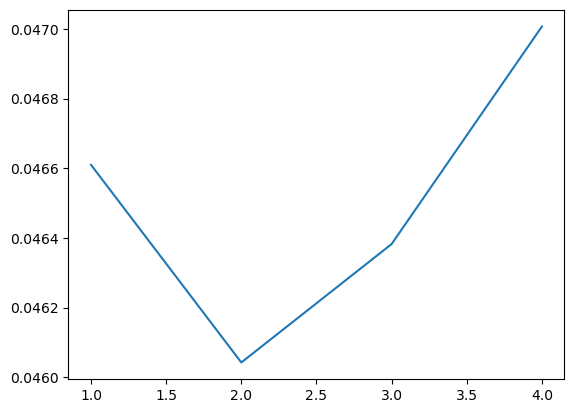

In [49]:
epochs=[1,2,3,4]
plt.plot(epochs,train_loss_[:4])

In [50]:
torch.save(model_semantic.state_dict(),  "semantic_model.pth")
torch.save(model_coher.state_dict(),  "cohernce_model.pth")
torch.save(model_prompt.state_dict(),  "prompt_model.pth")


## HANDCRAFTED FEATURES (WORD COUNT,CHARACTER COUNT,MEAN LENGTH ,VARIANCE SCORE,GRAMMATICAL SCORE)

---



In [34]:
text = "Your the best but their are allso. good abvfgc!"
text = ['dear local newspaper i think effects computers have on people are great learning skillsaffects because they give us time to chat with friendsnew people helps us learn about the globeastronomy and keeps us out of troble thing about dont you think so how would you feel if your teenager is always on the phone with friends do you ever time to chat with your friends or buisness partner about things. well now theres a new way to chat the computer theirs plenty of sites on the internet to do so organization1 organization2 caps1 facebook myspace ect. just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it. how did you learn about other countrysstates outside of yours well i have by computerinternet its a new way to learn about what going on in our time you might think your child spends a lot of time on the computer but ask them so question about the economy sea floor spreading or even about the date1s youll be surprise at how much heshe knows. believe it or not the computer is much interesting then in class all day reading out of books. if your child is home on your computer or at a local library its better than being out with friends being fresh or being perpressured to doing something they know isnt right. you might not know where your child is caps2 forbidde in a hospital bed because of a driveby. rather than your child on the computer learning chatting or just playing games safe and sound in your home or community place. now i hope you have reached a point to understand and agree with me because computers can have great effects on you or child because it gives us time to chat with friendsnew people helps us learn about the globe and believe or not keeps us out of troble. thank you for listening.']
text = text[0]
def get_grammatical_score(text, tool=tool):
    size = len(text.split())
    num = len(tool.check(text))
    # print(size, num)
    return (size - num) / size

def get_word_count(text):
    return len(text.split())

def get_char_count(text):
    return len(text)

def get_mean_score(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    mean_word_length = sum(word_lengths) / len(word_lengths)
    return mean_word_length

def get_variance_score(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    mean_word_length = sum(word_lengths) / len(word_lengths)
    variance_word_length = sum((length - mean_word_length) ** 2 for length in word_lengths) / len(word_lengths)
    return variance_word_length

print(get_mean_score(text))
print(get_variance_score(text))
print(get_grammatical_score(text))
print(get_word_count(text) )
print(get_char_count(text))

4.43026706231454
5.924662539953674
0.8783382789317508
337
1829


In [51]:
main_data = pd.DataFrame()

total_rows_123=0

for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):
    # num_samples_processed += essay_id.size(0)

    total_rows_123 += essay_id.size(0)

    if total_rows_123 >= 5000:
          break
    
    means, variances, grammaticals, word_counts, char_counts = [], [], [], [], []
    for i in range(essay_id.size(0)):
        means.append(get_mean_score(essays[i]))
        variances.append(get_variance_score(essays[i]))
        grammaticals.append(get_grammatical_score(essays[i]))
        word_counts.append(get_word_count(essays[i]))
        char_counts.append(get_char_count(essays[i]))


    val = []
    for i in range(essay_id.size(0)):
        # print(prompt[i])
        # print(essays[i])
        val.append(prompt[i]+"."+essays[i])

    # val = prompt+"."+essays
    val, lengths_batch = preprocess_essay(val)
    # val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    # essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)
    # normalized_score = normalized_score.to(device)

    out_prompt = model_prompt(val, lengths_batch)

    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()
    normalized_score = normalized_score.cpu().detach().numpy()

    # print(normalized_score_np.is_cuda, word_counts.is_cuda)
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic,
        'out_coher': out_coher,
        'out_prompt': out_prompt,
        'normalized_score': normalized_score
      })

    main_data = pd.concat([main_data, temp_df], ignore_index=True)

    # break
    # print(type(out_semantic), out_semantic.shape)

156it [3:29:09, 80.45s/it]


In [69]:
device

pandas.core.frame.DataFrame

In [68]:

main_data.head()

,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt,normalized_score
0,4.137662,4.383646,0.924675,385,1977,0.511704,4.201965e-12,5.215611e-13,0.600000
1,4.515873,5.837050,0.984127,126,694,0.514121,6.076936e-15,5.634179e-15,0.750000
2,3.561856,2.833803,0.974227,194,884,0.511484,1.272336e-11,3.495861e-14,0.833333
3,4.840000,6.244400,0.960000,200,1167,0.514639,1.433105e-13,2.015071e-12,1.000000
4,5.002740,6.726020,0.969863,365,2190,0.508918,7.095239e-13,6.466111e-12,0.600000


In [46]:

from sklearn.model_selection import train_test_split

X = main_data[['means', 'variances', 'grammaticals', 'word_counts', 'char_counts', 'out_semantic', 'out_coher', 'out_prompt']]
y = main_data['normalized_score']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'main_data' is not defined

In [53]:
pip install xgboost


     -------------------------------------- 99.7/99.7 MB 550.6 kB/s eta 0:00:00


### XG BOOST MODEL (SECOND STAGE)

In [70]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}
num_round = 100

bst = xgb.train(param, dtrain, num_round, [(dtrain, 'train'), (dvalid, 'valid')])


[0]	train-rmse:0.24776	valid-rmse:0.24008
[1]	train-rmse:0.24686	valid-rmse:0.23921
[2]	train-rmse:0.24596	valid-rmse:0.23835
[3]	train-rmse:0.24509	valid-rmse:0.23751
[4]	train-rmse:0.24422	valid-rmse:0.23668
[5]	train-rmse:0.24337	valid-rmse:0.23588
[6]	train-rmse:0.24254	valid-rmse:0.23508
[7]	train-rmse:0.24171	valid-rmse:0.23431
[8]	train-rmse:0.24090	valid-rmse:0.23353
[9]	train-rmse:0.24011	valid-rmse:0.23278
[10]	train-rmse:0.23932	valid-rmse:0.23204
[11]	train-rmse:0.23855	valid-rmse:0.23131
[12]	train-rmse:0.23780	valid-rmse:0.23059
[13]	train-rmse:0.23705	valid-rmse:0.22989
[14]	train-rmse:0.23632	valid-rmse:0.22920
[15]	train-rmse:0.23560	valid-rmse:0.22851
[16]	train-rmse:0.23488	valid-rmse:0.22781
[17]	train-rmse:0.23418	valid-rmse:0.22715
[18]	train-rmse:0.23349	valid-rmse:0.22647
[19]	train-rmse:0.23281	valid-rmse:0.22580
[20]	train-rmse:0.23214	valid-rmse:0.22514
[21]	train-rmse:0.23148	valid-rmse:0.22448
[22]	train-rmse:0.23083	valid-rmse:0.22384
[23]	train-rmse:0.230

[28]	train-rmse:0.22713	valid-rmse:0.22024
[29]	train-rmse:0.22655	valid-rmse:0.21969
[30]	train-rmse:0.22598	valid-rmse:0.21913
[31]	train-rmse:0.22542	valid-rmse:0.21857
[32]	train-rmse:0.22486	valid-rmse:0.21802
[33]	train-rmse:0.22432	valid-rmse:0.21749
[34]	train-rmse:0.22379	valid-rmse:0.21697
[35]	train-rmse:0.22325	valid-rmse:0.21647
[36]	train-rmse:0.22273	valid-rmse:0.21596
[37]	train-rmse:0.22223	valid-rmse:0.21546
[38]	train-rmse:0.22172	valid-rmse:0.21496
[39]	train-rmse:0.22123	valid-rmse:0.21447
[40]	train-rmse:0.22075	valid-rmse:0.21399
[41]	train-rmse:0.22026	valid-rmse:0.21353
[42]	train-rmse:0.21979	valid-rmse:0.21307
[43]	train-rmse:0.21933	valid-rmse:0.21263
[44]	train-rmse:0.21888	valid-rmse:0.21218
[45]	train-rmse:0.21843	valid-rmse:0.21176
[46]	train-rmse:0.21799	valid-rmse:0.21132
[47]	train-rmse:0.21754	valid-rmse:0.21088
[48]	train-rmse:0.21711	valid-rmse:0.21049
[49]	train-rmse:0.21668	valid-rmse:0.21007
[50]	train-rmse:0.21624	valid-rmse:0.20964
[51]	train-

c:\Users\pchhl\anaconda3\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [71]:
(X_valid)

,means,variances,grammaticals,word_counts,char_counts,out_semantic,out_coher,out_prompt
676,4.695652,6.048677,0.945652,184,1048,0.509086,7.653992e-14,7.362812e-13
4712,4.087591,4.036123,0.963504,137,696,0.509898,2.635015e-12,3.844525e-13
3456,4.202247,3.307411,0.932584,89,462,0.511480,3.823450e-13,2.688762e-14
1558,4.088889,4.080988,0.977778,45,228,0.511655,3.334287e-13,7.461647e-13
2634,4.365079,4.263542,1.000000,126,675,0.515232,2.279110e-13,1.659713e-12
...,...,...,...,...,...,...,...,...
2480,4.010811,4.280964,0.913514,185,926,0.512771,1.010883e-12,3.683781e-15
3396,4.691943,5.815054,0.976303,211,1200,0.507837,3.543858e-13,1.557526e-14
2505,4.725926,4.317476,0.940741,135,774,0.512706,1.192763e-13,3.504886e-15
4169,4.870968,6.918835,1.000000,62,363,0.514056,1.339890e-15,1.355819e-11


In [67]:
dpredict = xgb.DMatrix(X_valid)
y_pred = bst.predict(dpredict)
print(y_pred.shape)
print(y_valid.shape)

(999,)
(999,)


In [57]:
def get_final_score(essays, prompt):
    main_data = pd.DataFrame()
 
    means, variances, grammaticals, word_counts, char_counts = get_mean_score(essays[0]), get_variance_score(essays[0]), get_grammatical_score(essays[0]),get_word_count(essays[0]), get_char_count(essays[0])

    val = []
    for i in range(1):
        val.append(prompt[i]+"."+essays[i])

    val, lengths_batch = preprocess_essay(val)
    val = val.to(device)
    essays, lengths_batch = preprocess_essay(essays)
    essays = essays.to(device)
    out_semantic = model_semantic(essays, lengths_batch)
    out_coher = model_coher(essays, lengths_batch)

    out_prompt = model_prompt(val, lengths_batch)
    out_semantic = out_semantic.cpu().detach().numpy()
    out_coher = out_coher.cpu().detach().numpy()
    out_prompt = out_prompt.cpu().detach().numpy()

    main_data = pd.DataFrame()
    temp_df = pd.DataFrame({
        'means': means,
        'variances': variances,
        'grammaticals': grammaticals,
        'word_counts': word_counts,
        'char_counts': char_counts,
        'out_semantic': out_semantic[0],
        'out_coher': out_coher[0],
        'out_prompt': out_prompt[0],
        # 'normalized_score': normalized_score
      }, index=[0])

    main_data = pd.concat([main_data, temp_df], ignore_index=True)
    return main_data


In [64]:
idx = 5
ess = [custom_df['essay'].iloc[idx]]
prp = [custom_df['prompt'].iloc[idx]]

print(ess)
print(prp)
output = get_final_score(ess, prp)
# print("OUTPUT : ", output.shape)
dpredict = xgb.DMatrix(output)
y_pred = bst.predict(dpredict)
print(np.round(y_pred*10))

['Dear @LOCATION1, I think that computers have a negative affect on us! How many people have acess to a camputer daily in america.. @NUM1 and how many people go on at least an hour a @NUM2. That means that @NUM3 people cant exercise are wasting many are have the posibility of physical @CAPS1 that sound good to you? Think of everything you done when you write a letter. I got up and got all the materials and sit back down. After In done writing have to put all the materials away and then put the letter in the mailbox and walk all the way back. Well this is what I had to do. Now think how you write an email sitdown and move your fingers. Do you see the difference? @CAPS2 instead of getting a good walk to your friends house to talk to you just in him/er. Did you know that you can literally but from on your computer. Instead of around with this that can add anything you your computer gives away information they information lead to that and then everthing you have wouldbe gone. All this so y

In [59]:
dpredict = xgb.DMatrix(X_valid)
y_pred = bst.predict(dpredict)
print(y_pred.shape)
print(y_valid.shape)

(999,)
(999,)


In [73]:
import numpy as np

def compute_qwk(y_true, y_pred, max_rating=1, min_rating=0):
    # Construct confusion matrix
    conf_mat = np.zeros((max_rating + 1, max_rating + 1))
    for a, p in zip(y_true, y_pred):
        conf_mat[a][p] += 1

    # Compute observed and expected agreement
    num_ratings = max_rating - min_rating + 1
    O = 0.0
    E = 0.0
    for i in range(num_ratings):
        for j in range(num_ratings):
            # Calculate weight
            w = ((i - j) ** 2) / ((max_rating - min_rating) ** 2)
            O += w * conf_mat[i][j]
            E += w * (np.sum(conf_mat[i, :]) * np.sum(conf_mat[:, j])) / np.sum(conf_mat)

    # Compute QWK
    return 1.0 - O / E

# Example usage
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
y_true = np.round(y_true).astype(int)
y_pred = np.round(y_pred).astype(int)


print(compute_qwk(y_true, y_pred))


0.33647251295173775


In [72]:
y_true = np.array(y_valid)
y_pred = np.array(y_pred)
for i in range(len(y_pred)):
    print(f"Predicted Score : {y_pred[i]} -> Real Score :  {y_true[i]}")

Predicted Score : 0.6578749418258667 -> Real Score :  1.0
Predicted Score : 0.6656742691993713 -> Real Score :  0.5
Predicted Score : 0.5301254987716675 -> Real Score :  0.6666666666666666
Predicted Score : 0.3999359905719757 -> Real Score :  0.3333333333333333
Predicted Score : 0.6656742691993713 -> Real Score :  0.75
Predicted Score : 0.5717069506645203 -> Real Score :  0.5555555555555556
Predicted Score : 0.5323837399482727 -> Real Score :  0.6666666666666666
Predicted Score : 0.580234169960022 -> Real Score :  0.6666666666666666
Predicted Score : 0.628146231174469 -> Real Score :  0.2
Predicted Score : 0.558481752872467 -> Real Score :  0.4444444444444444
Predicted Score : 0.6523956656455994 -> Real Score :  0.75
Predicted Score : 0.673156201839447 -> Real Score :  0.6
Predicted Score : 0.5769361257553101 -> Real Score :  0.5
Predicted Score : 0.6509238481521606 -> Real Score :  0.6666666666666666
Predicted Score : 0.6835922598838806 -> Real Score :  0.75
Predicted Score : 0.677412

### NOVELITY

#### Document and token LEVEL REPRESENTATION

In [78]:
# class EssayBERTModel(nn.Module):
#     def __init__(self, bert_model_name='bert-base-uncased', regression_output_size=1):
#         super(EssayBERTModel, self).__init__()

#         # BERT model and tokenizer
#         self.bert = BertModel.from_pretrained(bert_model_name)
#         self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

#         # Regression layer with dropout
#         self.regression_layer = nn.Sequential(
#             nn.Linear(2 * self.bert.config.hidden_size, 512),  # Adjust the size as needed
#             nn.ReLU(),
#             nn.Dropout(0.1),
#             nn.Linear(512, regression_output_size)
#         )

#     def forward(self, input_text):
#         # Tokenize input essay
#         tokens = self.tokenizer.encode_plus(input_text, add_special_tokens=True, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
#         input_ids = tokens['input_ids']
#         token_type_ids = tokens['token_type_ids']
#         attention_mask = tokens['attention_mask']

#         # Obtain token-scale and document-scale representations
#         outputs = self.bert(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)

#         # Max pooling over the sequence outputs for token-scale representation
#         token_representation, _ = torch.max(outputs.last_hidden_state, dim=1)

#         # Document-scale representation (pooler output)
#         document_representation = outputs.pooler_output

#         # Concatenate the two representations
#         concatenated_representation = torch.cat([document_representation, token_representation], dim=1)

#         # Pass through the regression layer
#         output_scores = self.regression_layer(concatenated_representation)

#         return output_scores

# # Example usage
# model = EssayBERTModel(regression_output_size=1)

# # Input essay text
# input_text = "Your essay text goes here."

# # Obtain output scores
# output_scores = model(input_text)

# # Print the output scores
# print("Output Scores:", output_scores)


#### SEGEMENT SCALE REPRESENTATION

In [77]:
# class SegmentScaleEssayModel(nn.Module):
#     def __init__(self, bert_model, lstm_hidden_size, segment_scales):
#         super(SegmentScaleEssayModel, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_model)
#         self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, batch_first=True, dropout=0.1)
#         self.attention_pooling = nn.Linear(lstm_hidden_size, 1)
#         self.tanh = nn.Tanh()
#         self.softmax = nn.Softmax(dim=1)
#         self.segment_scales = segment_scales

#         # Create dense regression layers for each segment-scale with dropout
#         self.regression_layers = nn.ModuleList([nn.Sequential(
#             nn.Linear(lstm_hidden_size, 512),  # Adjust the size as needed
#             nn.ReLU(),
#             nn.Dropout(0.1),
#             nn.Linear(512, 1)
#         ) for _ in segment_scales])

#     def forward(self, input_ids, attention_mask):
#         # Step 1: BERT Processing
#         print(input_ids.shape)
#         outputs = self.bert(input_ids, attention_mask=attention_mask)
#         sequence_outputs = outputs.last_hidden_state

#         print(sequence_outputs.shape)
#         sequence_outputs = sequence_outputs.view(1, -1, 768)

#         # Step 2: LSTM Processing
#         lstm_outputs, _ = self.lstm(sequence_outputs)

#         # Step 3: Attention Pooling
#         attention_scores = self.tanh(self.attention_pooling(lstm_outputs))
#         attention_weights = self.softmax(attention_scores)
#         segment_scale_representation = torch.sum(attention_weights * lstm_outputs, dim=1)

#         return segment_scale_representation

#     def segment_scale_representation(self, input_text, max_tokens):
#         # Tokenize and obtain input_ids, attention_mask
#         tokenized_input = tokenizer(input_text, return_tensors='pt', max_length=max_tokens, truncation=True, padding='max_length')

#         input_ids = tokenized_input['input_ids']
#         attention_mask = tokenized_input['attention_mask']

#         # Initialize a list to store segment representations and scores
#         segment_representations = []
#         segment_scores = []

#         for scale in self.segment_scales:
#             # Calculate the number of segments for each scale
#             num_segments = (input_ids.size(1) + scale - 1) // scale

#             # Pad the input_ids and attention_mask to fit the segments
#             pad_tokens = num_segments * scale - input_ids.size(1)
#             input_ids_padded = F.pad(input_ids, (0, pad_tokens), value=tokenizer.pad_token_id)
#             attention_mask_padded = F.pad(attention_mask, (0, pad_tokens), value=0)

#             # Reshape input_ids and attention_mask into segments
#             segment_input_ids = input_ids_padded.view(-1, scale)
#             segment_attention_mask = attention_mask_padded.view(-1, scale)

#             # Forward pass through the model for each segment-scale
#             segment_output = self.forward(segment_input_ids, segment_attention_mask)

#             # print(segment_output.shape)
#             segment_representations.append(segment_output)

#             # Apply dense regression layer for each segment-scale
#             segment_score = self.regression_layers[self.segment_scales.index(scale)](segment_output)
#             # print(segment_score)
#             segment_scores.append(segment_score)

#         # Concatenate segment scores
#         final_scores = torch.cat(segment_scores, dim=1)

#         # Sum scores across segment-scales to get the final score
#         final_score = torch.sum(final_scores, dim=1)

#         return final_score

# # Example usage:
# model = SegmentScaleEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25])
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Example essay
# essay = "Your essay text goes here."

# # Set the maximum number of tokens
# max_tokens = 50

# # Get the segment-scale essay representation
# final_score = model.segment_scale_representation(essay, max_tokens)

# print("Final essay score:", final_score)


#### Combined Representation

In [76]:
# class CombinedEssayModel(nn.Module):
#     def __init__(self, bert_model, lstm_hidden_size, segment_scales, regression_output_size=1):
#         super(CombinedEssayModel, self).__init__()

#         # Segment-scale model
#         self.segment_scale_model = SegmentScaleEssayModel(bert_model, lstm_hidden_size, segment_scales)

#         # Document-scale and Token-scale model
#         self.essay_bert_model = EssayBERTModel(bert_model, regression_output_size)

#     def forward(self, input_text, max_tokens):
#         # Get segment-scale representation
#         segment_scale_representation_score = self.segment_scale_model.segment_scale_representation(input_text, max_tokens)

#         # Get document-scale and token-scale representation
#         essay_representation_score = self.essay_bert_model(input_text)

#         score=essay_representation_score+segment_scale_representation_score
#         # Combine the representations (you can use any operation that suits your task)
        
#         return score

# # Example usage:
# combined_model = CombinedEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25], regression_output_size=1)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Example essay
# essay = "Your essay text goes here."

# # Set the maximum number of tokens
# max_tokens = 50

# # Get the final combined essay representation
# final_representation = combined_model(essay, max_tokens)

# print("Final combined essay score:", final_representation)


#### LOSS FUNCTION CONSISTING OF MSE,SIM,MRR

In [51]:
class CustomLoss(nn.Module):
    def __init__(self, alpha, beta, gamma):
        super(CustomLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def forward(self, predicted_scores, labels):
        # Convert predicted_scores and labels to 1D tensors
        predicted_scores = predicted_scores.view(-1)
        labels = labels.view(-1)

        # SIM loss
        sim_loss = 1 - F.cosine_similarity(predicted_scores, labels, dim=0)

        # MR loss
        mr_loss = F.mse_loss(predicted_scores, labels)

        # Coherence loss
        coherence_loss = torch.mean(torch.abs(predicted_scores - labels))

        # Combine losses
        loss = self.alpha * sim_loss + self.beta * mr_loss + self.gamma * coherence_loss

        return loss


In [40]:
from tqdm import tqdm

In [95]:
# model_combined = CombinedEssayModel(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[20,50,100], regression_output_size=1)
# criterion = CustomLoss(0.5, 0.5, 0.2)

# max_tokens = 120

# learning_rate = 6e-5
# beta1 = 0.9
# beta2 = 0.999
# weight_decay = 0.005

# # Set up the optimizer
# optimizer_model = optim.Adam(model_combined.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=weight_decay)

# for epoch in range(1):
#     out_loss = 0

#     num_samples_processed_1=0

#     for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):

#         # if torch.cuda.is_available():
#         #     essay_id, essay_set, essays, prompt, normalized_score = essay_id.cuda(), essay_set.cuda(), essays.cuda(), prompt.cuda(), normalized_score.cuda()
#         # normalized_score = normalized_score.to(device)

      
        
#         num_samples_processed_1 += essay_id.size(0)

#         if num_samples_processed_1 >= 1000:
#           break

#         optimizer_model.zero_grad()

#         # essays, lengths_batch = preprocess_essay(essays)
#         # essays = essays.to(device)
#         normalized_score = normalized_score.to(device)
#         normalized_score = normalized_score.view(1, -1)

#         # print(lengths_batch.dtype)
#         # print(essays.dtype)
#         # print(essays)

#         out = model_combined(essays, max_tokens)

#         # print(out)


#         out = out.float()
#         out = out.view(1, -1)

#         normalized_score = normalized_score.float()

#         loss = criterion(out, normalized_score)
#         loss.backward()
#         optimizer.step()

#         out_loss += loss.item()

        
#         print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(dataloader)}], Batch Loss: {loss.item():.4f}")


#     # train_loss.append(out_loss/len(dataloader))


# # Save the best model
# # torch.save(model.state_dict(), 'best_model.pth')


In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer

class SegmentScaleEssayModelo(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales):
        super(SegmentScaleEssayModelo, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, batch_first=True, dropout=0.1)
        self.attention_pooling = nn.Linear(lstm_hidden_size, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        self.segment_scales = segment_scales
        self.lstm_hidden=lstm_hidden_size

        for param in self.bert.parameters():
             param.requires_grad = False
        # Create dense regression layers for each segment-scale with dropout
        self.regression_layers = nn.ModuleList([nn.Sequential(
            nn.Linear(lstm_hidden_size, 512),  # Adjust the size as needed
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 1)
        ) for _ in segment_scales])

    def forward(self, input_ids, attention_mask):

        batch_size, num_segments, max_tokens = input_ids.size()

        # Reshape input_ids and attention_mask for BERT processing
        input_ids_flat = input_ids.view(batch_size * num_segments, max_tokens)
        attention_mask_flat = attention_mask.view(batch_size * num_segments, max_tokens)

        # Step 1: BERT Processing
        outputs = self.bert(input_ids_flat, attention_mask=attention_mask_flat)
        sequence_outputs = outputs.last_hidden_state

        # Reshape sequence_outputs back to 3D
        sequence_outputs = sequence_outputs.view(batch_size, num_segments, max_tokens, -1)

        # Initialize a list to store segment outputs
        segment_outputs = []

        for segment_index in range(num_segments):
            # Select the current segment from the 3D tensor
            current_segment = sequence_outputs[:, segment_index, :, :]

            # Step 2: LSTM Processing for the current segment
            lstm_outputs, _ = self.lstm(current_segment)

            # Step 3: Attention Pooling for the current segment
            attention_scores = self.tanh(self.attention_pooling(lstm_outputs))
            attention_weights = self.softmax(attention_scores)
            segment_scale_representation = torch.sum(attention_weights * lstm_outputs, dim=1)

            # Append the segment representation to the list
            segment_outputs.append(segment_scale_representation)

        # Concatenate segment outputs to get the final representation

        final_representation = torch.cat(segment_outputs, dim=1)

        final_representation=final_representation.reshape(batch_size,num_segments,self.lstm_hidden)

        # print(final_representation.shape)

        return final_representation
    
    def segment_scale_representation(self, input_ids, attention_mask):
        # Forward pass through the model for each segment-scale

        segment_outputs = []
        for scale in self.segment_scales:
            # Calculate the number of segments for each scale
            num_segments = (input_ids.size(1) + scale - 1) // scale
            
            # Pad the input_ids and attention_mask to fit the segments
            pad_tokens = num_segments * scale - input_ids.size(1)
            input_ids_padded = F.pad(input_ids, (0, pad_tokens), value=tokenizer.pad_token_id)
            attention_mask_padded = F.pad(attention_mask, (0, pad_tokens), value=0)

            # Reshape input_ids and attention_mask into segments
            segment_input_ids = input_ids_padded.view(-1, num_segments, scale)  # Updated this line
            # print(scale)
            # print(segment_input_ids.shape)
            segment_attention_mask = attention_mask_padded.view(-1, num_segments, scale)  # Updated this line


            # Forward pass through the model for each segment-scale
            segment_output = self.forward(segment_input_ids, segment_attention_mask)
            segment_outputs.append(segment_output)

        # Concatenate segment outputs along the sequence dimension
        final_representation = torch.cat(segment_outputs, dim=1)

        # Apply dense regression layer for each segment-scale
        segment_scores = [layer(final_representation) for layer in self.regression_layers]

        # Concatenate segment scores
        final_scores = torch.cat(segment_scores, dim=1)

        # Sum scores across segment-scales to get the final score
        final_score = torch.mean(final_scores, dim=1)


        return final_score

# Example usage with batched input:
model = SegmentScaleEssayModelo(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25])
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essays
essays = ["Your essay text goes here.", "Another essay text."]

# Tokenize and obtain input_ids, attention_mask
tokenized_input = tokenizer(essays, return_tensors='pt', max_length=50, truncation=True, padding='max_length')

input_ids = tokenized_input['input_ids']
attention_mask = tokenized_input['attention_mask']

# Get the segment-scale essay representation for the batch
final_scores_batch = model.segment_scale_representation(input_ids, attention_mask)

print("Final essay scores (batch):", final_scores_batch)


Final essay scores (batch): tensor([[-0.0164],
        [-0.0129]], grad_fn=<MeanBackward1>)


In [56]:
class EssayBERTModel_(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', regression_output_size=1):
        super(EssayBERTModel_, self).__init__()

        # BERT model and tokenizer
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)
        
        for param in self.bert.parameters():
            param.requires_grad = False

        # Regression layer with dropout
        self.regression_layer = nn.Sequential(
            nn.Linear(2 * self.bert.config.hidden_size, 512),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Linear(512, regression_output_size)
        )

    def forward(self,essays):
        # Tokenize input essay

        tokenized_input = tokenizer(essays, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']

        batch_size, max_tokens = input_ids.size()

        # Add an extra dimension for num_segments
        input_ids = input_ids.unsqueeze(1)
        attention_mask = attention_mask.unsqueeze(1)

        # Reshape input_ids and attention_mask for BERT processing
        input_ids_flat = input_ids.view(batch_size * 1, max_tokens)
        attention_mask_flat = attention_mask.view(batch_size * 1, max_tokens)

        # Step 1: BERT Processing
        outputs = self.bert(input_ids_flat, attention_mask=attention_mask_flat)

        # Max pooling over the sequence outputs for token-scale representation
        token_representation, _ = torch.max(outputs.last_hidden_state, dim=1)

        # Document-scale representation (pooler output)
        document_representation = outputs.pooler_output

        # Concatenate the two representations
        concatenated_representation = torch.cat([document_representation, token_representation], dim=1)

        # Pass through the regression layer
        output_scores = self.regression_layer(concatenated_representation)

        return output_scores


model_essay = EssayBERTModel_(regression_output_size=1)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essays in a batch
essays = ["Your essay text goes here.", "Another essay text."]


# Get the model predictions for the batch
output_scores_batch = model_essay.forward(essays)

print("Output Scores (Batch):", output_scores_batch)

Output Scores (Batch): tensor([[0.3402],
        [0.2253]], grad_fn=<AddmmBackward0>)


In [57]:
class CombinedEssayModel_(nn.Module):
    def __init__(self, bert_model, lstm_hidden_size, segment_scales, regression_output_size=1):
        super(CombinedEssayModel_, self).__init__()

        self.tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
        
        # Segment-scale model
        self.segment_scale_model = SegmentScaleEssayModelo(bert_model, lstm_hidden_size, segment_scales)

        # Document-scale and Token-scale model
        self.essay_bert_model = EssayBERTModel_(bert_model, regression_output_size)

    def forward(self, input_text, max_tokens):

        tokenized_input = tokenizer(input_text, return_tensors='pt', max_length=max_tokens, truncation=True, padding='max_length')

        input_ids = tokenized_input['input_ids']
        attention_mask = tokenized_input['attention_mask']
        # Get segment-scale representation
        segment_scale_representation_score = self.segment_scale_model.segment_scale_representation(input_ids, attention_mask)

        # print(segment_scale_representation_score)
        # Get document-scale and token-scale representation
        essay_representation_score = self.essay_bert_model(input_text)
        
        # print(essay_representation_score)
        score=essay_representation_score+segment_scale_representation_score
        
        return score

In [58]:
combined_model = CombinedEssayModel_(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[5, 10, 25], regression_output_size=1)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example essay
essays = ["Your essay text goes here.", "Another essay text."]

# Set the maximum number of tokens
max_tokens = 50

# Get the final combined essay representation
final_representation = combined_model(essays, max_tokens)

print("Final combined essay score:", final_representation)


Final combined essay score: tensor([[-0.1086],
        [-0.1034]], grad_fn=<AddBackward0>)


In [95]:
# Initialize the model, criterion, and optimizer
model_combined = CombinedEssayModel_(bert_model='bert-base-uncased', lstm_hidden_size=256, segment_scales=[90,30,130,10], regression_output_size=1)
criterion = CustomLoss(0.33, 0.33, 0.34)

learning_rate = 6e-5
beta1 = 0.9
beta2 = 0.999
weight_decay = 0.005


train_loss_combine=[]
# Set up the optimizer
optimizer_model = optim.Adam(model_combined.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=weight_decay)

# Training loop
for epoch in range(4):  

    out_loss = 0
    num_samples_processed_1 = 0

    for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):

        num_samples_processed_1 += essay_id.size(0)

        if num_samples_processed_1 >= 5000:
            break

        optimizer_model.zero_grad()

        # normalized_score = normalized_score.to(device)
        # normalized_score = normalized_score.view(1, -1)

        out = model_combined(essays, 1000)

        out=out.squeeze()

        # print(out)
        # print(normalized_score)
        out = out.float()
        # out = out.view(1, -1)

        normalized_score = normalized_score.float()

        loss = criterion(out, normalized_score)
        loss.backward()
        optimizer_model.step()

        out_loss += loss.item()

        # break
        print(f"Epoch [{epoch + 1}/5], Batch [{batch_idx + 1}/{len(dataloader)}], Batch Loss: {loss.item():.4f}")

    train_loss_combine.append(out_loss)
    # Save the model after every iteration
    torch.save(model_combined.state_dict(), f'model_epoch_{epoch + 1}.pt')

    # Save the final model after training
    if epoch == 3:  # Assuming you want to save the model after the last epoch
        torch.save(model_combined.state_dict(), 'final_model.pt')

# Save the entire model (including optimizer and other state)
torch.save({
    'epoch': 4,  # Assuming you trained for 5 epochs
    'model_state_dict': model_combined.state_dict(),
    'optimizer_state_dict': optimizer_model.state_dict(),
    'loss': out_loss / len(dataloader),
}, 'entire_model.pt')


c:\Users\pchhl\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
1it [00:58, 58.25s/it]

Epoch [1/5], Batch [1/1498], Batch Loss: 0.9932


2it [01:59, 59.83s/it]

Epoch [1/5], Batch [2/1498], Batch Loss: 0.1416


3it [03:01, 60.87s/it]

Epoch [1/5], Batch [3/1498], Batch Loss: 0.1488


4it [04:02, 60.86s/it]

Epoch [1/5], Batch [4/1498], Batch Loss: 0.2225


5it [05:06, 62.18s/it]

Epoch [1/5], Batch [5/1498], Batch Loss: 0.3691


6it [06:06, 61.42s/it]

Epoch [1/5], Batch [6/1498], Batch Loss: 0.2265


7it [07:10, 62.08s/it]

Epoch [1/5], Batch [7/1498], Batch Loss: 0.3639


8it [08:10, 61.66s/it]

Epoch [1/5], Batch [8/1498], Batch Loss: 0.3973


9it [09:11, 61.33s/it]

Epoch [1/5], Batch [9/1498], Batch Loss: 0.1707


10it [10:13, 61.45s/it]

Epoch [1/5], Batch [10/1498], Batch Loss: 0.1235


11it [11:15, 61.87s/it]

Epoch [1/5], Batch [11/1498], Batch Loss: 0.2180


12it [12:16, 61.38s/it]

Epoch [1/5], Batch [12/1498], Batch Loss: 0.1193


13it [13:18, 61.50s/it]

Epoch [1/5], Batch [13/1498], Batch Loss: 0.1307


14it [14:18, 61.08s/it]

Epoch [1/5], Batch [14/1498], Batch Loss: 0.0698


15it [15:21, 61.72s/it]

Epoch [1/5], Batch [15/1498], Batch Loss: 0.1763


16it [16:20, 60.89s/it]

Epoch [1/5], Batch [16/1498], Batch Loss: 0.1785


17it [17:23, 61.62s/it]

Epoch [1/5], Batch [17/1498], Batch Loss: 0.1379


18it [18:24, 61.38s/it]

Epoch [1/5], Batch [18/1498], Batch Loss: 0.1964


19it [19:24, 61.09s/it]

Epoch [1/5], Batch [19/1498], Batch Loss: 0.1039


20it [20:26, 61.28s/it]

Epoch [1/5], Batch [20/1498], Batch Loss: 0.0755


21it [21:29, 61.73s/it]

Epoch [1/5], Batch [21/1498], Batch Loss: 0.0899


22it [22:29, 61.30s/it]

Epoch [1/5], Batch [22/1498], Batch Loss: 0.1483


23it [23:32, 61.76s/it]

Epoch [1/5], Batch [23/1498], Batch Loss: 0.0824


24it [24:34, 61.73s/it]

Epoch [1/5], Batch [24/1498], Batch Loss: 0.2214


25it [25:34, 61.39s/it]

Epoch [1/5], Batch [25/1498], Batch Loss: 0.1225


26it [26:36, 61.43s/it]

Epoch [1/5], Batch [26/1498], Batch Loss: 0.1153


27it [27:37, 61.51s/it]

Epoch [1/5], Batch [27/1498], Batch Loss: 0.1551


28it [28:40, 61.76s/it]

Epoch [1/5], Batch [28/1498], Batch Loss: 0.1132


29it [29:39, 61.12s/it]

Epoch [1/5], Batch [29/1498], Batch Loss: 0.0915


30it [30:42, 61.56s/it]

Epoch [1/5], Batch [30/1498], Batch Loss: 0.1044


31it [31:42, 61.20s/it]

Epoch [1/5], Batch [31/1498], Batch Loss: 0.0564


32it [32:43, 61.17s/it]

Epoch [1/5], Batch [32/1498], Batch Loss: 0.0658


33it [33:45, 61.24s/it]

Epoch [1/5], Batch [33/1498], Batch Loss: 0.1019


34it [34:45, 60.96s/it]

Epoch [1/5], Batch [34/1498], Batch Loss: 0.0559


35it [35:49, 61.75s/it]

Epoch [1/5], Batch [35/1498], Batch Loss: 0.0743


36it [36:50, 61.51s/it]

Epoch [1/5], Batch [36/1498], Batch Loss: 0.1137


37it [37:50, 61.17s/it]

Epoch [1/5], Batch [37/1498], Batch Loss: 0.0865


38it [38:52, 61.39s/it]

Epoch [1/5], Batch [38/1498], Batch Loss: 0.1108


39it [39:53, 61.34s/it]

Epoch [1/5], Batch [39/1498], Batch Loss: 0.0533


40it [40:55, 61.34s/it]

Epoch [1/5], Batch [40/1498], Batch Loss: 0.1131


41it [41:57, 61.70s/it]

Epoch [1/5], Batch [41/1498], Batch Loss: 0.1171


42it [42:57, 61.24s/it]

Epoch [1/5], Batch [42/1498], Batch Loss: 0.0727


43it [44:00, 61.78s/it]

Epoch [1/5], Batch [43/1498], Batch Loss: 0.0824


44it [45:01, 61.45s/it]

Epoch [1/5], Batch [44/1498], Batch Loss: 0.1223


45it [46:01, 61.02s/it]

Epoch [1/5], Batch [45/1498], Batch Loss: 0.0964


46it [47:03, 61.19s/it]

Epoch [1/5], Batch [46/1498], Batch Loss: 0.0701


47it [48:03, 60.87s/it]

Epoch [1/5], Batch [47/1498], Batch Loss: 0.1687


48it [49:04, 60.91s/it]

Epoch [1/5], Batch [48/1498], Batch Loss: 0.1786


49it [50:07, 61.49s/it]

Epoch [1/5], Batch [49/1498], Batch Loss: 0.1134


50it [51:06, 60.94s/it]

Epoch [1/5], Batch [50/1498], Batch Loss: 0.0825


51it [52:08, 61.34s/it]

Epoch [1/5], Batch [51/1498], Batch Loss: 0.0493


52it [53:09, 61.02s/it]

Epoch [1/5], Batch [52/1498], Batch Loss: 0.1218


53it [54:10, 60.97s/it]

Epoch [1/5], Batch [53/1498], Batch Loss: 0.1135


54it [55:13, 61.78s/it]

Epoch [1/5], Batch [54/1498], Batch Loss: 0.1754


55it [56:13, 61.24s/it]

Epoch [1/5], Batch [55/1498], Batch Loss: 0.0732


56it [57:15, 61.33s/it]

Epoch [1/5], Batch [56/1498], Batch Loss: 0.0809


57it [58:16, 61.41s/it]

Epoch [1/5], Batch [57/1498], Batch Loss: 0.0680


58it [59:16, 60.98s/it]

Epoch [1/5], Batch [58/1498], Batch Loss: 0.0564


59it [1:00:18, 61.29s/it]

Epoch [1/5], Batch [59/1498], Batch Loss: 0.0795


60it [1:01:21, 61.78s/it]

Epoch [1/5], Batch [60/1498], Batch Loss: 0.1011


61it [1:02:21, 61.27s/it]

Epoch [1/5], Batch [61/1498], Batch Loss: 0.1080


62it [1:03:23, 61.50s/it]

Epoch [1/5], Batch [62/1498], Batch Loss: 0.1138


63it [1:04:26, 61.91s/it]

Epoch [1/5], Batch [63/1498], Batch Loss: 0.0771


64it [1:05:26, 61.25s/it]

Epoch [1/5], Batch [64/1498], Batch Loss: 0.1132


65it [1:06:28, 61.54s/it]

Epoch [1/5], Batch [65/1498], Batch Loss: 0.1074


66it [1:07:30, 61.56s/it]

Epoch [1/5], Batch [66/1498], Batch Loss: 0.0879


67it [1:08:29, 60.90s/it]

Epoch [1/5], Batch [67/1498], Batch Loss: 0.0890


68it [1:09:31, 61.30s/it]

Epoch [1/5], Batch [68/1498], Batch Loss: 0.0787


69it [1:10:32, 61.03s/it]

Epoch [1/5], Batch [69/1498], Batch Loss: 0.1011


70it [1:11:35, 61.62s/it]

Epoch [1/5], Batch [70/1498], Batch Loss: 0.1310


71it [1:12:35, 61.21s/it]

Epoch [1/5], Batch [71/1498], Batch Loss: 0.0813


72it [1:13:37, 61.46s/it]

Epoch [1/5], Batch [72/1498], Batch Loss: 0.0870


73it [1:14:37, 61.10s/it]

Epoch [1/5], Batch [73/1498], Batch Loss: 0.0678


74it [1:15:39, 61.15s/it]

Epoch [1/5], Batch [74/1498], Batch Loss: 0.0727


75it [1:16:41, 61.54s/it]

Epoch [1/5], Batch [75/1498], Batch Loss: 0.0871


76it [1:17:41, 61.02s/it]

Epoch [1/5], Batch [76/1498], Batch Loss: 0.0521


77it [1:18:44, 61.50s/it]

Epoch [1/5], Batch [77/1498], Batch Loss: 0.0873


78it [1:19:44, 61.23s/it]

Epoch [1/5], Batch [78/1498], Batch Loss: 0.0687


79it [1:20:45, 60.99s/it]

Epoch [1/5], Batch [79/1498], Batch Loss: 0.0838


80it [1:21:48, 61.60s/it]

Epoch [1/5], Batch [80/1498], Batch Loss: 0.1117


81it [1:22:48, 61.22s/it]

Epoch [1/5], Batch [81/1498], Batch Loss: 0.0583


82it [1:23:49, 61.11s/it]

Epoch [1/5], Batch [82/1498], Batch Loss: 0.1088


83it [1:24:50, 61.11s/it]

Epoch [1/5], Batch [83/1498], Batch Loss: 0.0918


84it [1:25:49, 60.52s/it]

Epoch [1/5], Batch [84/1498], Batch Loss: 0.0789


85it [1:26:51, 60.85s/it]

Epoch [1/5], Batch [85/1498], Batch Loss: 0.0687


86it [1:27:53, 61.31s/it]

Epoch [1/5], Batch [86/1498], Batch Loss: 0.1244


87it [1:28:53, 60.87s/it]

Epoch [1/5], Batch [87/1498], Batch Loss: 0.1111


88it [1:29:54, 61.03s/it]

Epoch [1/5], Batch [88/1498], Batch Loss: 0.0913


89it [1:30:56, 61.37s/it]

Epoch [1/5], Batch [89/1498], Batch Loss: 0.0908


90it [1:31:56, 60.81s/it]

Epoch [1/5], Batch [90/1498], Batch Loss: 0.0751


91it [1:32:58, 61.27s/it]

Epoch [1/5], Batch [91/1498], Batch Loss: 0.0922


92it [1:34:01, 61.74s/it]

Epoch [1/5], Batch [92/1498], Batch Loss: 0.0846


93it [1:35:01, 61.05s/it]

Epoch [1/5], Batch [93/1498], Batch Loss: 0.1014


94it [1:36:03, 61.35s/it]

Epoch [1/5], Batch [94/1498], Batch Loss: 0.0966


95it [1:37:05, 61.79s/it]

Epoch [1/5], Batch [95/1498], Batch Loss: 0.0656


96it [1:38:05, 61.11s/it]

Epoch [1/5], Batch [96/1498], Batch Loss: 0.1056


97it [1:39:08, 61.66s/it]

Epoch [1/5], Batch [97/1498], Batch Loss: 0.0668


98it [1:40:07, 61.05s/it]

Epoch [1/5], Batch [98/1498], Batch Loss: 0.0436


99it [1:41:10, 61.35s/it]

Epoch [1/5], Batch [99/1498], Batch Loss: 0.0626


100it [1:42:09, 60.91s/it]

Epoch [1/5], Batch [100/1498], Batch Loss: 0.1039


101it [1:43:13, 61.59s/it]

Epoch [1/5], Batch [101/1498], Batch Loss: 0.0530


102it [1:44:13, 61.31s/it]

Epoch [1/5], Batch [102/1498], Batch Loss: 0.1257


103it [1:45:15, 61.40s/it]

Epoch [1/5], Batch [103/1498], Batch Loss: 0.0730


104it [1:46:16, 61.20s/it]

Epoch [1/5], Batch [104/1498], Batch Loss: 0.0902


105it [1:47:18, 61.60s/it]

Epoch [1/5], Batch [105/1498], Batch Loss: 0.0532


106it [1:48:20, 61.80s/it]

Epoch [1/5], Batch [106/1498], Batch Loss: 0.0854


107it [1:49:21, 61.58s/it]

Epoch [1/5], Batch [107/1498], Batch Loss: 0.0600


108it [1:50:23, 61.58s/it]

Epoch [1/5], Batch [108/1498], Batch Loss: 0.0907


109it [1:51:26, 61.93s/it]

Epoch [1/5], Batch [109/1498], Batch Loss: 0.1599


110it [1:52:25, 61.21s/it]

Epoch [1/5], Batch [110/1498], Batch Loss: 0.0490


111it [1:53:25, 60.69s/it]

Epoch [1/5], Batch [111/1498], Batch Loss: 0.1178


112it [1:54:23, 60.07s/it]

Epoch [1/5], Batch [112/1498], Batch Loss: 0.0519


113it [1:55:25, 60.42s/it]

Epoch [1/5], Batch [113/1498], Batch Loss: 0.1144


114it [1:56:25, 60.37s/it]

Epoch [1/5], Batch [114/1498], Batch Loss: 0.0846


115it [1:57:27, 60.81s/it]

Epoch [1/5], Batch [115/1498], Batch Loss: 0.0645


116it [1:58:28, 61.07s/it]

Epoch [1/5], Batch [116/1498], Batch Loss: 0.0620


117it [1:59:30, 61.15s/it]

Epoch [1/5], Batch [117/1498], Batch Loss: 0.0924


118it [2:00:29, 60.59s/it]

Epoch [1/5], Batch [118/1498], Batch Loss: 0.0810


119it [2:01:31, 60.92s/it]

Epoch [1/5], Batch [119/1498], Batch Loss: 0.0636


120it [2:02:34, 61.53s/it]

Epoch [1/5], Batch [120/1498], Batch Loss: 0.1189


121it [2:03:35, 61.47s/it]

Epoch [1/5], Batch [121/1498], Batch Loss: 0.1162


122it [2:04:36, 61.27s/it]

Epoch [1/5], Batch [122/1498], Batch Loss: 0.0652


123it [2:05:37, 61.28s/it]

Epoch [1/5], Batch [123/1498], Batch Loss: 0.0650


124it [2:06:37, 60.89s/it]

Epoch [1/5], Batch [124/1498], Batch Loss: 0.0802


125it [2:07:41, 61.68s/it]

Epoch [1/5], Batch [125/1498], Batch Loss: 0.0721


126it [2:08:42, 61.50s/it]

Epoch [1/5], Batch [126/1498], Batch Loss: 0.1613


127it [2:09:44, 61.62s/it]

Epoch [1/5], Batch [127/1498], Batch Loss: 0.1162


128it [2:10:46, 61.84s/it]

Epoch [1/5], Batch [128/1498], Batch Loss: 0.1495


129it [2:11:46, 61.33s/it]

Epoch [1/5], Batch [129/1498], Batch Loss: 0.1037


130it [2:12:49, 61.82s/it]

Epoch [1/5], Batch [130/1498], Batch Loss: 0.0714


131it [2:13:51, 61.85s/it]

Epoch [1/5], Batch [131/1498], Batch Loss: 0.1301


132it [2:14:51, 61.40s/it]

Epoch [1/5], Batch [132/1498], Batch Loss: 0.0613


133it [2:15:52, 61.17s/it]

Epoch [1/5], Batch [133/1498], Batch Loss: 0.0746


134it [2:16:53, 61.23s/it]

Epoch [1/5], Batch [134/1498], Batch Loss: 0.0524


135it [2:17:57, 61.95s/it]

Epoch [1/5], Batch [135/1498], Batch Loss: 0.1261


136it [2:18:57, 61.29s/it]

Epoch [1/5], Batch [136/1498], Batch Loss: 0.1055


137it [2:19:58, 61.44s/it]

Epoch [1/5], Batch [137/1498], Batch Loss: 0.0574


138it [2:20:59, 61.20s/it]

Epoch [1/5], Batch [138/1498], Batch Loss: 0.0449


139it [2:22:02, 61.69s/it]

Epoch [1/5], Batch [139/1498], Batch Loss: 0.0775


140it [2:23:02, 61.16s/it]

Epoch [1/5], Batch [140/1498], Batch Loss: 0.0854


141it [2:24:04, 61.33s/it]

Epoch [1/5], Batch [141/1498], Batch Loss: 0.0759


142it [2:25:07, 61.83s/it]

Epoch [1/5], Batch [142/1498], Batch Loss: 0.1215


143it [2:26:07, 61.49s/it]

Epoch [1/5], Batch [143/1498], Batch Loss: 0.1033


144it [2:27:08, 61.27s/it]

Epoch [1/5], Batch [144/1498], Batch Loss: 0.0952


145it [2:28:10, 61.46s/it]

Epoch [1/5], Batch [145/1498], Batch Loss: 0.1171


146it [2:29:10, 61.12s/it]

Epoch [1/5], Batch [146/1498], Batch Loss: 0.0746


147it [2:30:11, 61.15s/it]

Epoch [1/5], Batch [147/1498], Batch Loss: 0.1023


148it [2:31:15, 61.73s/it]

Epoch [1/5], Batch [148/1498], Batch Loss: 0.0612


149it [2:32:16, 61.78s/it]

Epoch [1/5], Batch [149/1498], Batch Loss: 0.1056


150it [2:33:14, 60.57s/it]

Epoch [1/5], Batch [150/1498], Batch Loss: 0.0626


151it [2:34:16, 60.80s/it]

Epoch [1/5], Batch [151/1498], Batch Loss: 0.0717


152it [2:35:19, 61.49s/it]

Epoch [1/5], Batch [152/1498], Batch Loss: 0.1003


153it [2:36:14, 59.57s/it]

Epoch [1/5], Batch [153/1498], Batch Loss: 0.0726


154it [2:37:10, 58.53s/it]

Epoch [1/5], Batch [154/1498], Batch Loss: 0.0957


155it [2:38:11, 59.31s/it]

Epoch [1/5], Batch [155/1498], Batch Loss: 0.1147


156it [2:39:04, 57.32s/it]

Epoch [1/5], Batch [156/1498], Batch Loss: 0.1137


157it [2:39:57, 56.25s/it]

Epoch [1/5], Batch [157/1498], Batch Loss: 0.0550


158it [2:40:54, 56.37s/it]

Epoch [1/5], Batch [158/1498], Batch Loss: 0.0388


159it [2:41:57, 58.46s/it]

Epoch [1/5], Batch [159/1498], Batch Loss: 0.0830


160it [2:42:59, 59.31s/it]

Epoch [1/5], Batch [160/1498], Batch Loss: 0.0482


161it [2:43:58, 59.33s/it]

Epoch [1/5], Batch [161/1498], Batch Loss: 0.0803


162it [2:44:59, 59.82s/it]

Epoch [1/5], Batch [162/1498], Batch Loss: 0.0969


163it [2:46:00, 60.19s/it]

Epoch [1/5], Batch [163/1498], Batch Loss: 0.1085


164it [2:47:00, 59.98s/it]

Epoch [1/5], Batch [164/1498], Batch Loss: 0.0933


165it [2:47:54, 58.46s/it]

Epoch [1/5], Batch [165/1498], Batch Loss: 0.0895


166it [2:48:45, 56.19s/it]

Epoch [1/5], Batch [166/1498], Batch Loss: 0.1238


167it [2:49:40, 55.59s/it]

Epoch [1/5], Batch [167/1498], Batch Loss: 0.1099


168it [2:50:34, 55.11s/it]

Epoch [1/5], Batch [168/1498], Batch Loss: 0.1731


169it [2:51:31, 55.87s/it]

Epoch [1/5], Batch [169/1498], Batch Loss: 0.0887


170it [2:52:30, 56.82s/it]

Epoch [1/5], Batch [170/1498], Batch Loss: 0.1226


171it [2:53:29, 57.36s/it]

Epoch [1/5], Batch [171/1498], Batch Loss: 0.1032


172it [2:54:25, 56.97s/it]

Epoch [1/5], Batch [172/1498], Batch Loss: 0.0803


173it [2:55:19, 56.19s/it]

Epoch [1/5], Batch [173/1498], Batch Loss: 0.0683


174it [2:56:13, 55.37s/it]

Epoch [1/5], Batch [174/1498], Batch Loss: 0.0522


175it [2:57:09, 55.61s/it]

Epoch [1/5], Batch [175/1498], Batch Loss: 0.0535


176it [2:58:02, 55.00s/it]

Epoch [1/5], Batch [176/1498], Batch Loss: 0.0855


177it [2:58:58, 55.18s/it]

Epoch [1/5], Batch [177/1498], Batch Loss: 0.0898


178it [2:59:55, 55.59s/it]

Epoch [1/5], Batch [178/1498], Batch Loss: 0.0522


179it [3:00:51, 55.76s/it]

Epoch [1/5], Batch [179/1498], Batch Loss: 0.1017


180it [3:01:45, 55.31s/it]

Epoch [1/5], Batch [180/1498], Batch Loss: 0.0639


181it [3:02:42, 55.69s/it]

Epoch [1/5], Batch [181/1498], Batch Loss: 0.0858


182it [3:03:38, 55.80s/it]

Epoch [1/5], Batch [182/1498], Batch Loss: 0.0703


183it [3:04:37, 56.75s/it]

Epoch [1/5], Batch [183/1498], Batch Loss: 0.1194


184it [3:05:36, 57.46s/it]

Epoch [1/5], Batch [184/1498], Batch Loss: 0.1082


185it [3:06:33, 57.51s/it]

Epoch [1/5], Batch [185/1498], Batch Loss: 0.1006


186it [3:07:30, 57.15s/it]

Epoch [1/5], Batch [186/1498], Batch Loss: 0.0603


187it [3:08:32, 58.62s/it]

Epoch [1/5], Batch [187/1498], Batch Loss: 0.0780


188it [3:09:34, 59.60s/it]

Epoch [1/5], Batch [188/1498], Batch Loss: 0.1191


189it [3:10:30, 58.62s/it]

Epoch [1/5], Batch [189/1498], Batch Loss: 0.1365


190it [3:11:30, 59.19s/it]

Epoch [1/5], Batch [190/1498], Batch Loss: 0.0635


191it [3:12:31, 59.53s/it]

Epoch [1/5], Batch [191/1498], Batch Loss: 0.0551


192it [3:13:33, 60.44s/it]

Epoch [1/5], Batch [192/1498], Batch Loss: 0.0981


193it [3:14:24, 57.59s/it]

Epoch [1/5], Batch [193/1498], Batch Loss: 0.0745


194it [3:15:13, 54.85s/it]

Epoch [1/5], Batch [194/1498], Batch Loss: 0.0331


195it [3:16:09, 55.39s/it]

Epoch [1/5], Batch [195/1498], Batch Loss: 0.0980


196it [3:17:04, 55.14s/it]

Epoch [1/5], Batch [196/1498], Batch Loss: 0.0480


197it [3:18:05, 56.77s/it]

Epoch [1/5], Batch [197/1498], Batch Loss: 0.0243


198it [3:19:08, 58.90s/it]

Epoch [1/5], Batch [198/1498], Batch Loss: 0.0778


199it [3:20:08, 59.14s/it]

Epoch [1/5], Batch [199/1498], Batch Loss: 0.0694


200it [3:21:08, 59.36s/it]

Epoch [1/5], Batch [200/1498], Batch Loss: 0.1169


201it [3:22:12, 60.80s/it]

Epoch [1/5], Batch [201/1498], Batch Loss: 0.0982


202it [3:23:13, 60.81s/it]

Epoch [1/5], Batch [202/1498], Batch Loss: 0.0662


203it [3:24:11, 59.97s/it]

Epoch [1/5], Batch [203/1498], Batch Loss: 0.0422


204it [3:25:16, 61.53s/it]

Epoch [1/5], Batch [204/1498], Batch Loss: 0.0655


205it [3:26:11, 59.58s/it]

Epoch [1/5], Batch [205/1498], Batch Loss: 0.0682


206it [3:27:10, 59.32s/it]

Epoch [1/5], Batch [206/1498], Batch Loss: 0.1117


207it [3:28:09, 59.22s/it]

Epoch [1/5], Batch [207/1498], Batch Loss: 0.0888


208it [3:29:10, 59.64s/it]

Epoch [1/5], Batch [208/1498], Batch Loss: 0.0863


209it [3:30:10, 59.80s/it]

Epoch [1/5], Batch [209/1498], Batch Loss: 0.1330


210it [3:31:05, 58.43s/it]

Epoch [1/5], Batch [210/1498], Batch Loss: 0.0838


211it [3:31:58, 56.74s/it]

Epoch [1/5], Batch [211/1498], Batch Loss: 0.0763


212it [3:32:48, 54.78s/it]

Epoch [1/5], Batch [212/1498], Batch Loss: 0.1071


213it [3:33:39, 53.78s/it]

Epoch [1/5], Batch [213/1498], Batch Loss: 0.1015


214it [3:34:33, 53.87s/it]

Epoch [1/5], Batch [214/1498], Batch Loss: 0.0458


215it [3:35:25, 53.28s/it]

Epoch [1/5], Batch [215/1498], Batch Loss: 0.0694


216it [3:36:21, 54.08s/it]

Epoch [1/5], Batch [216/1498], Batch Loss: 0.0476


217it [3:37:14, 53.66s/it]

Epoch [1/5], Batch [217/1498], Batch Loss: 0.1306


218it [3:38:04, 52.50s/it]

Epoch [1/5], Batch [218/1498], Batch Loss: 0.1489


219it [3:38:55, 52.24s/it]

Epoch [1/5], Batch [219/1498], Batch Loss: 0.0635


220it [3:39:46, 51.86s/it]

Epoch [1/5], Batch [220/1498], Batch Loss: 0.0965


221it [3:40:43, 53.17s/it]

Epoch [1/5], Batch [221/1498], Batch Loss: 0.0954


222it [3:41:40, 54.35s/it]

Epoch [1/5], Batch [222/1498], Batch Loss: 0.1251


223it [3:42:38, 55.44s/it]

Epoch [1/5], Batch [223/1498], Batch Loss: 0.1180


224it [3:43:36, 56.34s/it]

Epoch [1/5], Batch [224/1498], Batch Loss: 0.0760


225it [3:44:34, 56.85s/it]

Epoch [1/5], Batch [225/1498], Batch Loss: 0.0275


226it [3:45:31, 56.83s/it]

Epoch [1/5], Batch [226/1498], Batch Loss: 0.0914


227it [3:46:26, 56.26s/it]

Epoch [1/5], Batch [227/1498], Batch Loss: 0.1093


228it [3:47:23, 56.58s/it]

Epoch [1/5], Batch [228/1498], Batch Loss: 0.0880


229it [3:48:21, 57.03s/it]

Epoch [1/5], Batch [229/1498], Batch Loss: 0.1078


230it [3:49:23, 58.28s/it]

Epoch [1/5], Batch [230/1498], Batch Loss: 0.0652


231it [3:50:14, 56.39s/it]

Epoch [1/5], Batch [231/1498], Batch Loss: 0.0931


232it [3:51:09, 55.69s/it]

Epoch [1/5], Batch [232/1498], Batch Loss: 0.0912


233it [3:52:00, 54.30s/it]

Epoch [1/5], Batch [233/1498], Batch Loss: 0.1346


234it [3:52:55, 54.61s/it]

Epoch [1/5], Batch [234/1498], Batch Loss: 0.1120


235it [3:53:54, 55.87s/it]

Epoch [1/5], Batch [235/1498], Batch Loss: 0.1449


236it [3:54:52, 56.74s/it]

Epoch [1/5], Batch [236/1498], Batch Loss: 0.0689


237it [3:55:52, 57.70s/it]

Epoch [1/5], Batch [237/1498], Batch Loss: 0.0773


238it [3:56:52, 58.36s/it]

Epoch [1/5], Batch [238/1498], Batch Loss: 0.0778


239it [3:57:50, 58.15s/it]

Epoch [1/5], Batch [239/1498], Batch Loss: 0.0967


240it [3:58:52, 59.27s/it]

Epoch [1/5], Batch [240/1498], Batch Loss: 0.0922


241it [3:59:53, 59.70s/it]

Epoch [1/5], Batch [241/1498], Batch Loss: 0.1009


242it [4:00:52, 59.59s/it]

Epoch [1/5], Batch [242/1498], Batch Loss: 0.0507


243it [4:01:52, 59.61s/it]

Epoch [1/5], Batch [243/1498], Batch Loss: 0.0854


244it [4:02:46, 58.10s/it]

Epoch [1/5], Batch [244/1498], Batch Loss: 0.0364


245it [4:03:43, 57.64s/it]

Epoch [1/5], Batch [245/1498], Batch Loss: 0.1022


246it [4:04:40, 57.67s/it]

Epoch [1/5], Batch [246/1498], Batch Loss: 0.0373


247it [4:05:39, 57.95s/it]

Epoch [1/5], Batch [247/1498], Batch Loss: 0.1184


248it [4:06:36, 57.79s/it]

Epoch [1/5], Batch [248/1498], Batch Loss: 0.1156


249it [4:07:32, 57.20s/it]

Epoch [1/5], Batch [249/1498], Batch Loss: 0.0741


250it [4:08:33, 58.21s/it]

Epoch [1/5], Batch [250/1498], Batch Loss: 0.0858


251it [4:09:30, 57.97s/it]

Epoch [1/5], Batch [251/1498], Batch Loss: 0.0507


252it [4:10:29, 58.28s/it]

Epoch [1/5], Batch [252/1498], Batch Loss: 0.0776


253it [4:11:28, 58.43s/it]

Epoch [1/5], Batch [253/1498], Batch Loss: 0.0463


254it [4:12:27, 58.52s/it]

Epoch [1/5], Batch [254/1498], Batch Loss: 0.1009


255it [4:13:27, 59.07s/it]

Epoch [1/5], Batch [255/1498], Batch Loss: 0.0678


256it [4:14:28, 59.71s/it]

Epoch [1/5], Batch [256/1498], Batch Loss: 0.1255


257it [4:15:29, 60.02s/it]

Epoch [1/5], Batch [257/1498], Batch Loss: 0.1342


258it [4:16:32, 60.94s/it]

Epoch [1/5], Batch [258/1498], Batch Loss: 0.0632


259it [4:17:31, 60.40s/it]

Epoch [1/5], Batch [259/1498], Batch Loss: 0.0845


260it [4:18:26, 58.55s/it]

Epoch [1/5], Batch [260/1498], Batch Loss: 0.0640


261it [4:19:20, 57.33s/it]

Epoch [1/5], Batch [261/1498], Batch Loss: 0.0469


262it [4:20:14, 56.24s/it]

Epoch [1/5], Batch [262/1498], Batch Loss: 0.0534


263it [4:21:07, 55.24s/it]

Epoch [1/5], Batch [263/1498], Batch Loss: 0.1226


264it [4:22:02, 55.20s/it]

Epoch [1/5], Batch [264/1498], Batch Loss: 0.0333


265it [4:22:54, 54.33s/it]

Epoch [1/5], Batch [265/1498], Batch Loss: 0.1116


266it [4:23:47, 53.98s/it]

Epoch [1/5], Batch [266/1498], Batch Loss: 0.1578


267it [4:24:39, 53.23s/it]

Epoch [1/5], Batch [267/1498], Batch Loss: 0.0668


268it [4:25:32, 53.41s/it]

Epoch [1/5], Batch [268/1498], Batch Loss: 0.0274


269it [4:26:24, 52.91s/it]

Epoch [1/5], Batch [269/1498], Batch Loss: 0.0494


270it [4:27:15, 52.29s/it]

Epoch [1/5], Batch [270/1498], Batch Loss: 0.0884


271it [4:28:06, 51.94s/it]

Epoch [1/5], Batch [271/1498], Batch Loss: 0.0726


272it [4:29:00, 52.46s/it]

Epoch [1/5], Batch [272/1498], Batch Loss: 0.1044


273it [4:29:52, 52.23s/it]

Epoch [1/5], Batch [273/1498], Batch Loss: 0.0763


274it [4:30:44, 52.20s/it]

Epoch [1/5], Batch [274/1498], Batch Loss: 0.0629


275it [4:31:36, 52.10s/it]

Epoch [1/5], Batch [275/1498], Batch Loss: 0.1162


276it [4:32:28, 52.27s/it]

Epoch [1/5], Batch [276/1498], Batch Loss: 0.0916


277it [4:33:23, 53.16s/it]

Epoch [1/5], Batch [277/1498], Batch Loss: 0.1120


278it [4:34:18, 53.49s/it]

Epoch [1/5], Batch [278/1498], Batch Loss: 0.0737


279it [4:35:11, 53.39s/it]

Epoch [1/5], Batch [279/1498], Batch Loss: 0.0869


280it [4:36:04, 53.38s/it]

Epoch [1/5], Batch [280/1498], Batch Loss: 0.0797


281it [4:36:58, 53.39s/it]

Epoch [1/5], Batch [281/1498], Batch Loss: 0.0700


282it [4:37:49, 52.90s/it]

Epoch [1/5], Batch [282/1498], Batch Loss: 0.0946


283it [4:38:41, 52.39s/it]

Epoch [1/5], Batch [283/1498], Batch Loss: 0.1166


284it [4:39:32, 52.15s/it]

Epoch [1/5], Batch [284/1498], Batch Loss: 0.0678


285it [4:40:26, 52.60s/it]

Epoch [1/5], Batch [285/1498], Batch Loss: 0.0433


286it [4:41:18, 52.35s/it]

Epoch [1/5], Batch [286/1498], Batch Loss: 0.0665


287it [4:42:09, 52.04s/it]

Epoch [1/5], Batch [287/1498], Batch Loss: 0.0633


288it [4:43:00, 51.80s/it]

Epoch [1/5], Batch [288/1498], Batch Loss: 0.0891


289it [4:43:51, 51.57s/it]

Epoch [1/5], Batch [289/1498], Batch Loss: 0.0324


290it [4:44:45, 52.22s/it]

Epoch [1/5], Batch [290/1498], Batch Loss: 0.1300


291it [4:45:38, 52.48s/it]

Epoch [1/5], Batch [291/1498], Batch Loss: 0.1072


292it [4:46:32, 52.98s/it]

Epoch [1/5], Batch [292/1498], Batch Loss: 0.0837


293it [4:47:25, 52.84s/it]

Epoch [1/5], Batch [293/1498], Batch Loss: 0.0963


294it [4:48:15, 52.19s/it]

Epoch [1/5], Batch [294/1498], Batch Loss: 0.1589


295it [4:49:08, 52.37s/it]

Epoch [1/5], Batch [295/1498], Batch Loss: 0.1821


296it [4:50:00, 52.34s/it]

Epoch [1/5], Batch [296/1498], Batch Loss: 0.0977


297it [4:50:54, 52.59s/it]

Epoch [1/5], Batch [297/1498], Batch Loss: 0.0654


298it [4:51:46, 52.61s/it]

Epoch [1/5], Batch [298/1498], Batch Loss: 0.0592


299it [4:52:39, 52.76s/it]

Epoch [1/5], Batch [299/1498], Batch Loss: 0.0828


300it [4:53:32, 52.69s/it]

Epoch [1/5], Batch [300/1498], Batch Loss: 0.0969


301it [4:54:22, 52.05s/it]

Epoch [1/5], Batch [301/1498], Batch Loss: 0.1339


302it [4:55:15, 52.12s/it]

Epoch [1/5], Batch [302/1498], Batch Loss: 0.0977


303it [4:56:08, 52.37s/it]

Epoch [1/5], Batch [303/1498], Batch Loss: 0.0476


304it [4:57:00, 52.45s/it]

Epoch [1/5], Batch [304/1498], Batch Loss: 0.0315


305it [4:57:53, 52.47s/it]

Epoch [1/5], Batch [305/1498], Batch Loss: 0.1036


306it [4:58:45, 52.23s/it]

Epoch [1/5], Batch [306/1498], Batch Loss: 0.0673


307it [4:59:37, 52.41s/it]

Epoch [1/5], Batch [307/1498], Batch Loss: 0.0696


308it [5:00:28, 51.76s/it]

Epoch [1/5], Batch [308/1498], Batch Loss: 0.0439


309it [5:01:20, 51.95s/it]

Epoch [1/5], Batch [309/1498], Batch Loss: 0.0799


310it [5:02:13, 52.31s/it]

Epoch [1/5], Batch [310/1498], Batch Loss: 0.0773


311it [5:03:06, 52.44s/it]

Epoch [1/5], Batch [311/1498], Batch Loss: 0.0928


312it [5:03:59, 52.74s/it]

Epoch [1/5], Batch [312/1498], Batch Loss: 0.0681


313it [5:04:53, 53.06s/it]

Epoch [1/5], Batch [313/1498], Batch Loss: 0.0550


314it [5:05:46, 53.10s/it]

Epoch [1/5], Batch [314/1498], Batch Loss: 0.0784


315it [5:06:39, 53.04s/it]

Epoch [1/5], Batch [315/1498], Batch Loss: 0.0836


316it [5:07:30, 52.28s/it]

Epoch [1/5], Batch [316/1498], Batch Loss: 0.0894


317it [5:08:24, 52.89s/it]

Epoch [1/5], Batch [317/1498], Batch Loss: 0.0670


318it [5:09:15, 52.40s/it]

Epoch [1/5], Batch [318/1498], Batch Loss: 0.0914


319it [5:10:07, 52.24s/it]

Epoch [1/5], Batch [319/1498], Batch Loss: 0.0868


320it [5:11:02, 52.88s/it]

Epoch [1/5], Batch [320/1498], Batch Loss: 0.0669


321it [5:11:53, 52.57s/it]

Epoch [1/5], Batch [321/1498], Batch Loss: 0.1042


322it [5:12:45, 52.27s/it]

Epoch [1/5], Batch [322/1498], Batch Loss: 0.0848


323it [5:13:46, 54.90s/it]

Epoch [1/5], Batch [323/1498], Batch Loss: 0.0877


324it [5:14:45, 56.15s/it]

Epoch [1/5], Batch [324/1498], Batch Loss: 0.0476


325it [5:15:42, 56.48s/it]

Epoch [1/5], Batch [325/1498], Batch Loss: 0.0623


326it [5:16:33, 54.87s/it]

Epoch [1/5], Batch [326/1498], Batch Loss: 0.0181


327it [5:17:25, 53.89s/it]

Epoch [1/5], Batch [327/1498], Batch Loss: 0.0563


328it [5:18:16, 52.96s/it]

Epoch [1/5], Batch [328/1498], Batch Loss: 0.0721


329it [5:19:05, 51.98s/it]

Epoch [1/5], Batch [329/1498], Batch Loss: 0.1197


330it [5:20:02, 53.26s/it]

Epoch [1/5], Batch [330/1498], Batch Loss: 0.1078


331it [5:21:01, 55.15s/it]

Epoch [1/5], Batch [331/1498], Batch Loss: 0.0715


332it [5:22:03, 56.99s/it]

Epoch [1/5], Batch [332/1498], Batch Loss: 0.0728


333it [5:23:02, 57.62s/it]

Epoch [1/5], Batch [333/1498], Batch Loss: 0.0852


334it [5:24:00, 57.73s/it]

Epoch [1/5], Batch [334/1498], Batch Loss: 0.0963


335it [5:25:01, 58.86s/it]

Epoch [1/5], Batch [335/1498], Batch Loss: 0.0757


336it [5:26:00, 58.89s/it]

Epoch [1/5], Batch [336/1498], Batch Loss: 0.1069


337it [5:27:00, 59.31s/it]

Epoch [1/5], Batch [337/1498], Batch Loss: 0.0566


338it [5:28:00, 59.28s/it]

Epoch [1/5], Batch [338/1498], Batch Loss: 0.0384


339it [5:28:57, 58.79s/it]

Epoch [1/5], Batch [339/1498], Batch Loss: 0.0718


340it [5:29:58, 59.47s/it]

Epoch [1/5], Batch [340/1498], Batch Loss: 0.1025


341it [5:30:58, 59.49s/it]

Epoch [1/5], Batch [341/1498], Batch Loss: 0.0682


342it [5:31:57, 59.35s/it]

Epoch [1/5], Batch [342/1498], Batch Loss: 0.0843


343it [5:32:58, 59.76s/it]

Epoch [1/5], Batch [343/1498], Batch Loss: 0.1233


344it [5:33:57, 59.54s/it]

Epoch [1/5], Batch [344/1498], Batch Loss: 0.0374


345it [5:34:58, 60.11s/it]

Epoch [1/5], Batch [345/1498], Batch Loss: 0.0420


346it [5:35:58, 60.09s/it]

Epoch [1/5], Batch [346/1498], Batch Loss: 0.0482


347it [5:36:57, 59.74s/it]

Epoch [1/5], Batch [347/1498], Batch Loss: 0.0749


348it [5:37:58, 59.97s/it]

Epoch [1/5], Batch [348/1498], Batch Loss: 0.1079


349it [5:38:56, 59.65s/it]

Epoch [1/5], Batch [349/1498], Batch Loss: 0.0744


350it [5:39:56, 59.72s/it]

Epoch [1/5], Batch [350/1498], Batch Loss: 0.0784


351it [5:40:56, 59.67s/it]

Epoch [1/5], Batch [351/1498], Batch Loss: 0.1250


352it [5:41:57, 60.21s/it]

Epoch [1/5], Batch [352/1498], Batch Loss: 0.1353


353it [5:42:55, 59.48s/it]

Epoch [1/5], Batch [353/1498], Batch Loss: 0.1348


354it [5:43:56, 59.97s/it]

Epoch [1/5], Batch [354/1498], Batch Loss: 0.0951


355it [5:44:57, 60.11s/it]

Epoch [1/5], Batch [355/1498], Batch Loss: 0.0524


356it [5:45:57, 60.04s/it]

Epoch [1/5], Batch [356/1498], Batch Loss: 0.0961


357it [5:46:57, 60.19s/it]

Epoch [1/5], Batch [357/1498], Batch Loss: 0.0573


358it [5:47:56, 59.74s/it]

Epoch [1/5], Batch [358/1498], Batch Loss: 0.0806


359it [5:48:55, 59.52s/it]

Epoch [1/5], Batch [359/1498], Batch Loss: 0.0985


360it [5:49:55, 59.69s/it]

Epoch [1/5], Batch [360/1498], Batch Loss: 0.0527


361it [5:50:56, 60.21s/it]

Epoch [1/5], Batch [361/1498], Batch Loss: 0.0412


362it [5:51:55, 59.82s/it]

Epoch [1/5], Batch [362/1498], Batch Loss: 0.0970


363it [5:52:55, 59.95s/it]

Epoch [1/5], Batch [363/1498], Batch Loss: 0.0580


364it [5:53:54, 59.66s/it]

Epoch [1/5], Batch [364/1498], Batch Loss: 0.1132


365it [5:54:55, 59.88s/it]

Epoch [1/5], Batch [365/1498], Batch Loss: 0.0910


366it [5:55:54, 59.80s/it]

Epoch [1/5], Batch [366/1498], Batch Loss: 0.0701


367it [5:56:56, 60.41s/it]

Epoch [1/5], Batch [367/1498], Batch Loss: 0.0521


368it [5:57:54, 59.71s/it]

Epoch [1/5], Batch [368/1498], Batch Loss: 0.0590


369it [5:58:54, 59.66s/it]

Epoch [1/5], Batch [369/1498], Batch Loss: 0.0525


370it [5:59:54, 59.65s/it]

Epoch [1/5], Batch [370/1498], Batch Loss: 0.0323


371it [6:00:55, 60.09s/it]

Epoch [1/5], Batch [371/1498], Batch Loss: 0.0527


372it [6:01:54, 59.88s/it]

Epoch [1/5], Batch [372/1498], Batch Loss: 0.0657


373it [6:02:52, 59.35s/it]

Epoch [1/5], Batch [373/1498], Batch Loss: 0.0776


374it [6:03:53, 59.89s/it]

Epoch [1/5], Batch [374/1498], Batch Loss: 0.1019


375it [6:04:53, 59.93s/it]

Epoch [1/5], Batch [375/1498], Batch Loss: 0.1139


376it [6:05:53, 59.75s/it]

Epoch [1/5], Batch [376/1498], Batch Loss: 0.0602


377it [6:06:52, 59.69s/it]

Epoch [1/5], Batch [377/1498], Batch Loss: 0.0678


378it [6:07:50, 59.13s/it]

Epoch [1/5], Batch [378/1498], Batch Loss: 0.0733


379it [6:08:51, 59.56s/it]

Epoch [1/5], Batch [379/1498], Batch Loss: 0.0584


380it [6:09:52, 60.11s/it]

Epoch [1/5], Batch [380/1498], Batch Loss: 0.0761


381it [6:10:51, 59.78s/it]

Epoch [1/5], Batch [381/1498], Batch Loss: 0.0519


382it [6:11:50, 59.61s/it]

Epoch [1/5], Batch [382/1498], Batch Loss: 0.1241


383it [6:12:50, 59.60s/it]

Epoch [1/5], Batch [383/1498], Batch Loss: 0.0454


384it [6:13:51, 60.23s/it]

Epoch [1/5], Batch [384/1498], Batch Loss: 0.0664


385it [6:14:51, 59.97s/it]

Epoch [1/5], Batch [385/1498], Batch Loss: 0.0786


386it [6:15:47, 58.77s/it]

Epoch [1/5], Batch [386/1498], Batch Loss: 0.0940


387it [6:16:51, 60.47s/it]

Epoch [1/5], Batch [387/1498], Batch Loss: 0.1199


388it [6:17:53, 60.85s/it]

Epoch [1/5], Batch [388/1498], Batch Loss: 0.0702


389it [6:18:56, 61.42s/it]

Epoch [1/5], Batch [389/1498], Batch Loss: 0.0377


390it [6:19:57, 61.41s/it]

Epoch [1/5], Batch [390/1498], Batch Loss: 0.0540


391it [6:21:01, 62.19s/it]

Epoch [1/5], Batch [391/1498], Batch Loss: 0.0624


392it [6:22:03, 62.23s/it]

Epoch [1/5], Batch [392/1498], Batch Loss: 0.0721


393it [6:23:05, 61.89s/it]

Epoch [1/5], Batch [393/1498], Batch Loss: 0.0483


394it [6:24:06, 61.67s/it]

Epoch [1/5], Batch [394/1498], Batch Loss: 0.0587


395it [6:25:09, 62.29s/it]

Epoch [1/5], Batch [395/1498], Batch Loss: 0.0766


396it [6:26:13, 62.64s/it]

Epoch [1/5], Batch [396/1498], Batch Loss: 0.0579


397it [6:27:15, 62.42s/it]

Epoch [1/5], Batch [397/1498], Batch Loss: 0.0903


398it [6:28:17, 62.37s/it]

Epoch [1/5], Batch [398/1498], Batch Loss: 0.0820


399it [6:29:19, 62.15s/it]

Epoch [1/5], Batch [399/1498], Batch Loss: 0.1082


400it [6:30:20, 61.97s/it]

Epoch [1/5], Batch [400/1498], Batch Loss: 0.0981


401it [6:31:23, 62.27s/it]

Epoch [1/5], Batch [401/1498], Batch Loss: 0.0790


402it [6:32:27, 62.77s/it]

Epoch [1/5], Batch [402/1498], Batch Loss: 0.0641


403it [6:33:28, 62.18s/it]

Epoch [1/5], Batch [403/1498], Batch Loss: 0.0626


404it [6:34:27, 61.34s/it]

Epoch [1/5], Batch [404/1498], Batch Loss: 0.0674


405it [6:35:28, 61.28s/it]

Epoch [1/5], Batch [405/1498], Batch Loss: 0.0802


406it [6:36:32, 61.86s/it]

Epoch [1/5], Batch [406/1498], Batch Loss: 0.0852


407it [6:37:33, 61.57s/it]

Epoch [1/5], Batch [407/1498], Batch Loss: 0.0370


408it [6:38:34, 61.43s/it]

Epoch [1/5], Batch [408/1498], Batch Loss: 0.0747


409it [6:39:33, 60.87s/it]

Epoch [1/5], Batch [409/1498], Batch Loss: 0.0575


410it [6:40:33, 60.62s/it]

Epoch [1/5], Batch [410/1498], Batch Loss: 0.0870


411it [6:41:35, 60.94s/it]

Epoch [1/5], Batch [411/1498], Batch Loss: 0.0660


412it [6:42:35, 60.81s/it]

Epoch [1/5], Batch [412/1498], Batch Loss: 0.0404


413it [6:43:35, 60.36s/it]

Epoch [1/5], Batch [413/1498], Batch Loss: 0.0686


414it [6:44:36, 60.48s/it]

Epoch [1/5], Batch [414/1498], Batch Loss: 0.0987


415it [6:45:35, 60.24s/it]

Epoch [1/5], Batch [415/1498], Batch Loss: 0.0801


416it [6:46:36, 60.44s/it]

Epoch [1/5], Batch [416/1498], Batch Loss: 0.0772


417it [6:47:37, 60.47s/it]

Epoch [1/5], Batch [417/1498], Batch Loss: 0.0562


418it [6:48:38, 60.79s/it]

Epoch [1/5], Batch [418/1498], Batch Loss: 0.0658


419it [6:49:39, 60.92s/it]

Epoch [1/5], Batch [419/1498], Batch Loss: 0.0959


420it [6:50:38, 60.29s/it]

Epoch [1/5], Batch [420/1498], Batch Loss: 0.0915


421it [6:51:39, 60.49s/it]

Epoch [1/5], Batch [421/1498], Batch Loss: 0.0414


422it [6:52:39, 60.20s/it]

Epoch [1/5], Batch [422/1498], Batch Loss: 0.0423


423it [6:53:39, 60.34s/it]

Epoch [1/5], Batch [423/1498], Batch Loss: 0.0799


424it [6:54:42, 60.90s/it]

Epoch [1/5], Batch [424/1498], Batch Loss: 0.1035


425it [6:55:42, 60.62s/it]

Epoch [1/5], Batch [425/1498], Batch Loss: 0.0433


426it [6:56:42, 60.51s/it]

Epoch [1/5], Batch [426/1498], Batch Loss: 0.0514


427it [6:57:43, 60.62s/it]

Epoch [1/5], Batch [427/1498], Batch Loss: 0.0721


428it [6:58:42, 60.31s/it]

Epoch [1/5], Batch [428/1498], Batch Loss: 0.0405


429it [6:59:43, 60.51s/it]

Epoch [1/5], Batch [429/1498], Batch Loss: 0.0562


430it [7:00:44, 60.46s/it]

Epoch [1/5], Batch [430/1498], Batch Loss: 0.0689


431it [7:01:45, 60.82s/it]

Epoch [1/5], Batch [431/1498], Batch Loss: 0.0590


432it [7:02:45, 60.44s/it]

Epoch [1/5], Batch [432/1498], Batch Loss: 0.0962


433it [7:03:46, 60.78s/it]

Epoch [1/5], Batch [433/1498], Batch Loss: 0.0817


434it [7:04:47, 60.71s/it]

Epoch [1/5], Batch [434/1498], Batch Loss: 0.0842


435it [7:05:49, 61.10s/it]

Epoch [1/5], Batch [435/1498], Batch Loss: 0.1032


436it [7:06:50, 60.99s/it]

Epoch [1/5], Batch [436/1498], Batch Loss: 0.0565


437it [7:07:48, 60.33s/it]

Epoch [1/5], Batch [437/1498], Batch Loss: 0.1116


438it [7:08:50, 60.56s/it]

Epoch [1/5], Batch [438/1498], Batch Loss: 0.0935


439it [7:09:48, 60.07s/it]

Epoch [1/5], Batch [439/1498], Batch Loss: 0.0975


440it [7:10:49, 60.28s/it]

Epoch [1/5], Batch [440/1498], Batch Loss: 0.1134


441it [7:11:50, 60.56s/it]

Epoch [1/5], Batch [441/1498], Batch Loss: 0.0625


442it [7:12:50, 60.18s/it]

Epoch [1/5], Batch [442/1498], Batch Loss: 0.0796


443it [7:13:52, 60.85s/it]

Epoch [1/5], Batch [443/1498], Batch Loss: 0.0485


444it [7:14:51, 60.31s/it]

Epoch [1/5], Batch [444/1498], Batch Loss: 0.0968


445it [7:15:53, 60.64s/it]

Epoch [1/5], Batch [445/1498], Batch Loss: 0.1099


446it [7:16:54, 60.83s/it]

Epoch [1/5], Batch [446/1498], Batch Loss: 0.0687


447it [7:17:55, 60.98s/it]

Epoch [1/5], Batch [447/1498], Batch Loss: 0.0377


448it [7:18:55, 60.69s/it]

Epoch [1/5], Batch [448/1498], Batch Loss: 0.0808


449it [7:19:56, 60.85s/it]

Epoch [1/5], Batch [449/1498], Batch Loss: 0.1630


450it [7:20:55, 60.25s/it]

Epoch [1/5], Batch [450/1498], Batch Loss: 0.0782


451it [7:21:56, 60.41s/it]

Epoch [1/5], Batch [451/1498], Batch Loss: 0.0705


452it [7:22:56, 60.24s/it]

Epoch [1/5], Batch [452/1498], Batch Loss: 0.0484


453it [7:23:57, 60.55s/it]

Epoch [1/5], Batch [453/1498], Batch Loss: 0.0609


454it [7:24:58, 60.48s/it]

Epoch [1/5], Batch [454/1498], Batch Loss: 0.0609


455it [7:25:59, 60.85s/it]

Epoch [1/5], Batch [455/1498], Batch Loss: 0.0616


456it [7:27:01, 61.02s/it]

Epoch [1/5], Batch [456/1498], Batch Loss: 0.1301


457it [7:28:00, 60.43s/it]

Epoch [1/5], Batch [457/1498], Batch Loss: 0.0676


458it [7:29:01, 60.73s/it]

Epoch [1/5], Batch [458/1498], Batch Loss: 0.0412


459it [7:30:00, 60.24s/it]

Epoch [1/5], Batch [459/1498], Batch Loss: 0.0541


460it [7:31:02, 60.55s/it]

Epoch [1/5], Batch [460/1498], Batch Loss: 0.0409


461it [7:32:03, 60.80s/it]

Epoch [1/5], Batch [461/1498], Batch Loss: 0.0559


462it [7:33:03, 60.65s/it]

Epoch [1/5], Batch [462/1498], Batch Loss: 0.0959


463it [7:34:05, 60.89s/it]

Epoch [1/5], Batch [463/1498], Batch Loss: 0.0464


464it [7:35:06, 60.94s/it]

Epoch [1/5], Batch [464/1498], Batch Loss: 0.0681


465it [7:36:05, 60.57s/it]

Epoch [1/5], Batch [465/1498], Batch Loss: 0.1032


466it [7:37:06, 60.65s/it]

Epoch [1/5], Batch [466/1498], Batch Loss: 0.0976


467it [7:38:06, 60.36s/it]

Epoch [1/5], Batch [467/1498], Batch Loss: 0.0507


468it [7:39:08, 61.01s/it]

Epoch [1/5], Batch [468/1498], Batch Loss: 0.0477


469it [7:40:09, 60.86s/it]

Epoch [1/5], Batch [469/1498], Batch Loss: 0.1073


470it [7:41:09, 60.54s/it]

Epoch [1/5], Batch [470/1498], Batch Loss: 0.0457


471it [7:42:10, 60.80s/it]

Epoch [1/5], Batch [471/1498], Batch Loss: 0.0648


472it [7:43:10, 60.55s/it]

Epoch [1/5], Batch [472/1498], Batch Loss: 0.0409


473it [7:44:12, 60.84s/it]

Epoch [1/5], Batch [473/1498], Batch Loss: 0.0288


474it [7:45:13, 61.03s/it]

Epoch [1/5], Batch [474/1498], Batch Loss: 0.0390


475it [7:46:13, 60.64s/it]

Epoch [1/5], Batch [475/1498], Batch Loss: 0.0351


476it [7:47:14, 60.91s/it]

Epoch [1/5], Batch [476/1498], Batch Loss: 0.0996


477it [7:48:14, 60.38s/it]

Epoch [1/5], Batch [477/1498], Batch Loss: 0.0584


478it [7:49:15, 60.66s/it]

Epoch [1/5], Batch [478/1498], Batch Loss: 0.0540


479it [7:50:15, 60.61s/it]

Epoch [1/5], Batch [479/1498], Batch Loss: 0.0672


480it [7:51:15, 60.38s/it]

Epoch [1/5], Batch [480/1498], Batch Loss: 0.0994


481it [7:52:17, 60.91s/it]

Epoch [1/5], Batch [481/1498], Batch Loss: 0.0588


482it [7:53:18, 60.83s/it]

Epoch [1/5], Batch [482/1498], Batch Loss: 0.0447


483it [7:54:18, 60.71s/it]

Epoch [1/5], Batch [483/1498], Batch Loss: 0.0460


484it [7:55:20, 60.98s/it]

Epoch [1/5], Batch [484/1498], Batch Loss: 0.1333


485it [7:56:21, 60.93s/it]

Epoch [1/5], Batch [485/1498], Batch Loss: 0.0893


486it [7:57:24, 61.67s/it]

Epoch [1/5], Batch [486/1498], Batch Loss: 0.0746


487it [7:58:25, 61.31s/it]

Epoch [1/5], Batch [487/1498], Batch Loss: 0.0875


488it [7:59:24, 60.83s/it]

Epoch [1/5], Batch [488/1498], Batch Loss: 0.0503


489it [8:00:25, 60.70s/it]

Epoch [1/5], Batch [489/1498], Batch Loss: 0.0427


490it [8:01:24, 60.28s/it]

Epoch [1/5], Batch [490/1498], Batch Loss: 0.0548


491it [8:02:24, 60.24s/it]

Epoch [1/5], Batch [491/1498], Batch Loss: 0.0961


492it [8:03:24, 60.13s/it]

Epoch [1/5], Batch [492/1498], Batch Loss: 0.0550


493it [8:04:26, 60.68s/it]

Epoch [1/5], Batch [493/1498], Batch Loss: 0.0629


494it [8:05:27, 60.86s/it]

Epoch [1/5], Batch [494/1498], Batch Loss: 0.0583


495it [8:06:27, 60.39s/it]

Epoch [1/5], Batch [495/1498], Batch Loss: 0.0605


496it [8:07:28, 60.58s/it]

Epoch [1/5], Batch [496/1498], Batch Loss: 0.0735


497it [8:08:27, 60.09s/it]

Epoch [1/5], Batch [497/1498], Batch Loss: 0.1390


498it [8:09:27, 60.24s/it]

Epoch [1/5], Batch [498/1498], Batch Loss: 0.0221


499it [8:10:28, 60.47s/it]

Epoch [1/5], Batch [499/1498], Batch Loss: 0.0513


500it [8:11:27, 60.11s/it]

Epoch [1/5], Batch [500/1498], Batch Loss: 0.0867


501it [8:12:30, 60.69s/it]

Epoch [1/5], Batch [501/1498], Batch Loss: 0.0764


502it [8:13:30, 60.59s/it]

Epoch [1/5], Batch [502/1498], Batch Loss: 0.0773


503it [8:14:30, 60.32s/it]

Epoch [1/5], Batch [503/1498], Batch Loss: 0.0555


504it [8:15:31, 60.58s/it]

Epoch [1/5], Batch [504/1498], Batch Loss: 0.0626


505it [8:16:31, 60.39s/it]

Epoch [1/5], Batch [505/1498], Batch Loss: 0.1229


506it [8:17:32, 60.54s/it]

Epoch [1/5], Batch [506/1498], Batch Loss: 0.1097


507it [8:18:33, 60.79s/it]

Epoch [1/5], Batch [507/1498], Batch Loss: 0.0418


508it [8:19:32, 60.35s/it]

Epoch [1/5], Batch [508/1498], Batch Loss: 0.0782


509it [8:20:34, 60.63s/it]

Epoch [1/5], Batch [509/1498], Batch Loss: 0.0909


510it [8:21:33, 60.41s/it]

Epoch [1/5], Batch [510/1498], Batch Loss: 0.0534


511it [8:22:36, 61.07s/it]

Epoch [1/5], Batch [511/1498], Batch Loss: 0.1048


512it [8:23:37, 61.16s/it]

Epoch [1/5], Batch [512/1498], Batch Loss: 0.0527


513it [8:24:33, 59.59s/it]

Epoch [1/5], Batch [513/1498], Batch Loss: 0.0917


514it [8:25:29, 58.40s/it]

Epoch [1/5], Batch [514/1498], Batch Loss: 0.0459


515it [8:26:23, 57.18s/it]

Epoch [1/5], Batch [515/1498], Batch Loss: 0.0201


516it [8:27:16, 55.97s/it]

Epoch [1/5], Batch [516/1498], Batch Loss: 0.0689


517it [8:28:08, 54.68s/it]

Epoch [1/5], Batch [517/1498], Batch Loss: 0.0438


518it [8:29:09, 56.42s/it]

Epoch [1/5], Batch [518/1498], Batch Loss: 0.1332


519it [8:30:11, 58.11s/it]

Epoch [1/5], Batch [519/1498], Batch Loss: 0.0986


520it [8:31:11, 58.90s/it]

Epoch [1/5], Batch [520/1498], Batch Loss: 0.0779


521it [8:32:12, 59.32s/it]

Epoch [1/5], Batch [521/1498], Batch Loss: 0.0291


522it [8:33:13, 60.05s/it]

Epoch [1/5], Batch [522/1498], Batch Loss: 0.0652


523it [8:34:14, 60.34s/it]

Epoch [1/5], Batch [523/1498], Batch Loss: 0.0418


524it [8:35:14, 60.06s/it]

Epoch [1/5], Batch [524/1498], Batch Loss: 0.1294


525it [8:36:15, 60.41s/it]

Epoch [1/5], Batch [525/1498], Batch Loss: 0.0574


526it [8:37:14, 59.90s/it]

Epoch [1/5], Batch [526/1498], Batch Loss: 0.0689


527it [8:38:15, 60.38s/it]

Epoch [1/5], Batch [527/1498], Batch Loss: 0.0621


528it [8:39:15, 60.07s/it]

Epoch [1/5], Batch [528/1498], Batch Loss: 0.1089


529it [8:40:16, 60.35s/it]

Epoch [1/5], Batch [529/1498], Batch Loss: 0.1001


530it [8:41:17, 60.52s/it]

Epoch [1/5], Batch [530/1498], Batch Loss: 0.0515


531it [8:42:17, 60.57s/it]

Epoch [1/5], Batch [531/1498], Batch Loss: 0.0625


532it [8:43:15, 59.84s/it]

Epoch [1/5], Batch [532/1498], Batch Loss: 0.0788


533it [8:44:07, 57.27s/it]

Epoch [1/5], Batch [533/1498], Batch Loss: 0.0331


534it [8:44:57, 55.19s/it]

Epoch [1/5], Batch [534/1498], Batch Loss: 0.1039


535it [8:45:49, 54.35s/it]

Epoch [1/5], Batch [535/1498], Batch Loss: 0.0586


536it [8:46:39, 52.78s/it]

Epoch [1/5], Batch [536/1498], Batch Loss: 0.0730


537it [8:47:31, 52.77s/it]

Epoch [1/5], Batch [537/1498], Batch Loss: 0.0825


538it [8:48:28, 53.83s/it]

Epoch [1/5], Batch [538/1498], Batch Loss: 0.0770


539it [8:49:20, 53.50s/it]

Epoch [1/5], Batch [539/1498], Batch Loss: 0.0703


540it [8:50:12, 53.00s/it]

Epoch [1/5], Batch [540/1498], Batch Loss: 0.0644


541it [8:51:04, 52.76s/it]

Epoch [1/5], Batch [541/1498], Batch Loss: 0.1350


542it [8:51:57, 52.59s/it]

Epoch [1/5], Batch [542/1498], Batch Loss: 0.1044


543it [8:52:48, 52.23s/it]

Epoch [1/5], Batch [543/1498], Batch Loss: 0.0572


544it [8:53:42, 52.76s/it]

Epoch [1/5], Batch [544/1498], Batch Loss: 0.0805


545it [8:54:32, 52.01s/it]

Epoch [1/5], Batch [545/1498], Batch Loss: 0.1563


546it [8:55:23, 51.55s/it]

Epoch [1/5], Batch [546/1498], Batch Loss: 0.0703


547it [8:56:14, 51.35s/it]

Epoch [1/5], Batch [547/1498], Batch Loss: 0.0757


548it [8:57:03, 50.85s/it]

Epoch [1/5], Batch [548/1498], Batch Loss: 0.0867


549it [8:57:55, 51.20s/it]

Epoch [1/5], Batch [549/1498], Batch Loss: 0.0389


550it [8:58:55, 53.69s/it]

Epoch [1/5], Batch [550/1498], Batch Loss: 0.0320


551it [8:59:52, 54.87s/it]

Epoch [1/5], Batch [551/1498], Batch Loss: 0.1120


552it [9:00:46, 54.51s/it]

Epoch [1/5], Batch [552/1498], Batch Loss: 0.0660


553it [9:01:37, 53.54s/it]

Epoch [1/5], Batch [553/1498], Batch Loss: 0.0691


554it [9:02:30, 53.30s/it]

Epoch [1/5], Batch [554/1498], Batch Loss: 0.0531


555it [9:03:22, 52.81s/it]

Epoch [1/5], Batch [555/1498], Batch Loss: 0.1089


556it [9:04:13, 52.22s/it]

Epoch [1/5], Batch [556/1498], Batch Loss: 0.0699


557it [9:05:04, 52.03s/it]

Epoch [1/5], Batch [557/1498], Batch Loss: 0.0608


558it [9:05:56, 52.02s/it]

Epoch [1/5], Batch [558/1498], Batch Loss: 0.1088


559it [9:06:48, 51.92s/it]

Epoch [1/5], Batch [559/1498], Batch Loss: 0.0403


560it [9:07:40, 51.94s/it]

Epoch [1/5], Batch [560/1498], Batch Loss: 0.1076


561it [9:08:32, 51.91s/it]

Epoch [1/5], Batch [561/1498], Batch Loss: 0.0478


562it [9:09:24, 51.92s/it]

Epoch [1/5], Batch [562/1498], Batch Loss: 0.0894


563it [9:10:15, 51.85s/it]

Epoch [1/5], Batch [563/1498], Batch Loss: 0.0604


564it [9:11:07, 51.94s/it]

Epoch [1/5], Batch [564/1498], Batch Loss: 0.1050


565it [9:11:59, 51.80s/it]

Epoch [1/5], Batch [565/1498], Batch Loss: 0.1290


566it [9:12:50, 51.57s/it]

Epoch [1/5], Batch [566/1498], Batch Loss: 0.0310


567it [9:13:42, 51.83s/it]

Epoch [1/5], Batch [567/1498], Batch Loss: 0.1127


568it [9:14:33, 51.52s/it]

Epoch [1/5], Batch [568/1498], Batch Loss: 0.0916


569it [9:15:25, 51.70s/it]

Epoch [1/5], Batch [569/1498], Batch Loss: 0.0741


570it [9:16:17, 51.56s/it]

Epoch [1/5], Batch [570/1498], Batch Loss: 0.1439


571it [9:17:09, 51.90s/it]

Epoch [1/5], Batch [571/1498], Batch Loss: 0.0310


572it [9:18:01, 51.90s/it]

Epoch [1/5], Batch [572/1498], Batch Loss: 0.0767


573it [9:18:54, 52.30s/it]

Epoch [1/5], Batch [573/1498], Batch Loss: 0.1385


574it [9:19:45, 51.92s/it]

Epoch [1/5], Batch [574/1498], Batch Loss: 0.1145


575it [9:20:39, 52.28s/it]

Epoch [1/5], Batch [575/1498], Batch Loss: 0.0801


576it [9:21:33, 52.83s/it]

Epoch [1/5], Batch [576/1498], Batch Loss: 0.1446


577it [9:22:27, 53.33s/it]

Epoch [1/5], Batch [577/1498], Batch Loss: 0.0553


578it [9:23:17, 52.39s/it]

Epoch [1/5], Batch [578/1498], Batch Loss: 0.1255


579it [9:24:07, 51.47s/it]

Epoch [1/5], Batch [579/1498], Batch Loss: 0.1956


580it [9:24:58, 51.32s/it]

Epoch [1/5], Batch [580/1498], Batch Loss: 0.0915


581it [9:25:52, 52.37s/it]

Epoch [1/5], Batch [581/1498], Batch Loss: 0.0888


582it [9:26:49, 53.65s/it]

Epoch [1/5], Batch [582/1498], Batch Loss: 0.0585


583it [9:27:40, 52.78s/it]

Epoch [1/5], Batch [583/1498], Batch Loss: 0.0469


584it [9:28:29, 51.61s/it]

Epoch [1/5], Batch [584/1498], Batch Loss: 0.0693


585it [9:29:18, 50.98s/it]

Epoch [1/5], Batch [585/1498], Batch Loss: 0.0716


586it [9:30:10, 51.23s/it]

Epoch [1/5], Batch [586/1498], Batch Loss: 0.0348


587it [9:30:59, 50.64s/it]

Epoch [1/5], Batch [587/1498], Batch Loss: 0.0796


588it [9:31:49, 50.24s/it]

Epoch [1/5], Batch [588/1498], Batch Loss: 0.1001


589it [9:32:38, 50.10s/it]

Epoch [1/5], Batch [589/1498], Batch Loss: 0.0426


590it [9:33:31, 50.85s/it]

Epoch [1/5], Batch [590/1498], Batch Loss: 0.0671


591it [9:34:31, 53.62s/it]

Epoch [1/5], Batch [591/1498], Batch Loss: 0.0675


592it [9:35:34, 56.29s/it]

Epoch [1/5], Batch [592/1498], Batch Loss: 0.0363


593it [9:36:36, 58.05s/it]

Epoch [1/5], Batch [593/1498], Batch Loss: 0.0650


594it [9:37:35, 58.42s/it]

Epoch [1/5], Batch [594/1498], Batch Loss: 0.0939


595it [9:38:37, 59.47s/it]

Epoch [1/5], Batch [595/1498], Batch Loss: 0.0594


596it [9:39:37, 59.68s/it]

Epoch [1/5], Batch [596/1498], Batch Loss: 0.0593


597it [9:40:38, 59.99s/it]

Epoch [1/5], Batch [597/1498], Batch Loss: 0.0840


598it [9:41:38, 60.11s/it]

Epoch [1/5], Batch [598/1498], Batch Loss: 0.1572


599it [9:42:41, 61.03s/it]

Epoch [1/5], Batch [599/1498], Batch Loss: 0.0943


600it [9:43:42, 60.82s/it]

Epoch [1/5], Batch [600/1498], Batch Loss: 0.0704


601it [9:44:40, 60.21s/it]

Epoch [1/5], Batch [601/1498], Batch Loss: 0.1096


602it [9:45:42, 60.54s/it]

Epoch [1/5], Batch [602/1498], Batch Loss: 0.1149


603it [9:46:42, 60.36s/it]

Epoch [1/5], Batch [603/1498], Batch Loss: 0.1082


604it [9:47:41, 60.13s/it]

Epoch [1/5], Batch [604/1498], Batch Loss: 0.0874


605it [9:48:46, 61.42s/it]

Epoch [1/5], Batch [605/1498], Batch Loss: 0.0963


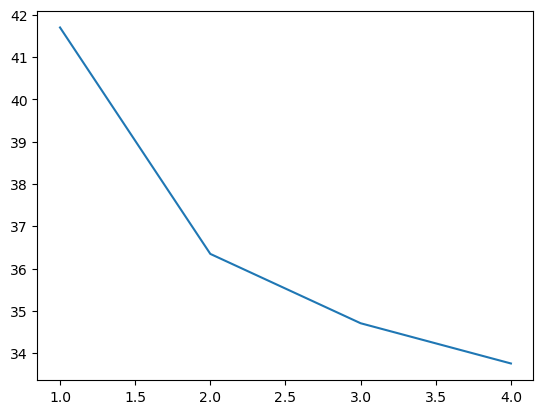

In [94]:
plt.plot([1,2,3,4],train_loss_combine)

In [72]:
model_combined(essays,300)

tensor([[0.3685],
        [0.7910],
        [0.8421],
        [0.6560],
        [0.5051],
        [0.8336],
        [0.4134],
        [0.6502]], grad_fn=<AddBackward0>)

In [86]:
def find_total(essays):
    sum=0;
    for i in range(min(8,len(essays))):
        sum=sum+len(essays[i])
    return sum

In [88]:
total_iter=0
sum=0

for batch_idx, (essay_id, essay_set, essays, prompt, normalized_score) in tqdm(enumerate(dataloader)):
    total_iter=total_iter+1

    sum=sum+find_total(essays)


1498it [00:00, 4622.08it/s]


In [91]:
average_length=sum/(11500)